In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import IPython.display as ipd
from librosa import display
import librosa

In [6]:
dir1="C:\\Users\\tlsck\\IMPRESS\\Data\\UrbanSound8K\\metadata\\UrbanSound8K.csv"
dir2="C:\\Users\\tlsck\\IMPRESS\\Data\\UrbanSound8K"
data=pd.read_csv(dir1)
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [8]:
#feature set
#This file is of a dog bark
y,sr=librosa.load(dir2+"\\audio\\fold5\\100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

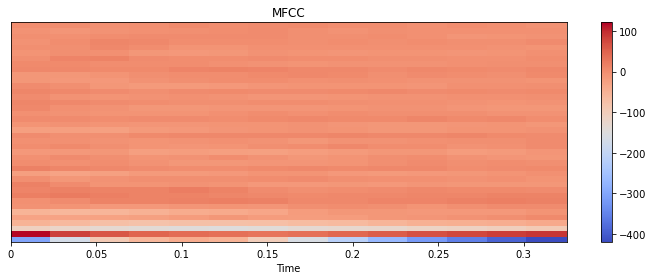

In [9]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tlsck\Anaconda3\envs\study\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


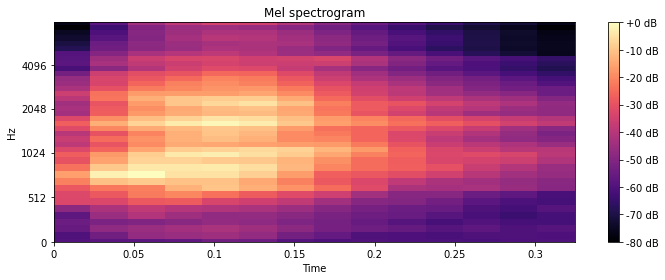

In [10]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

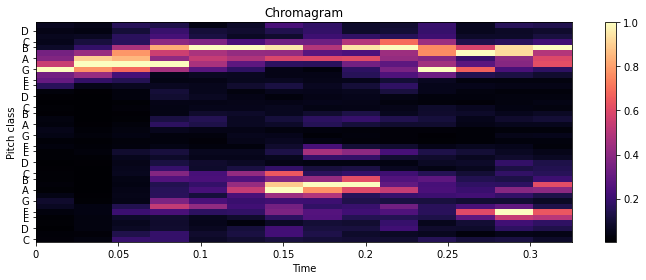

In [11]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

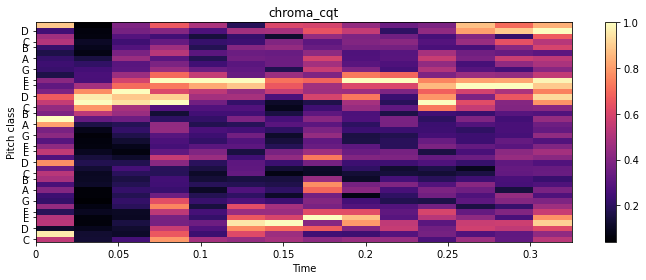

In [12]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

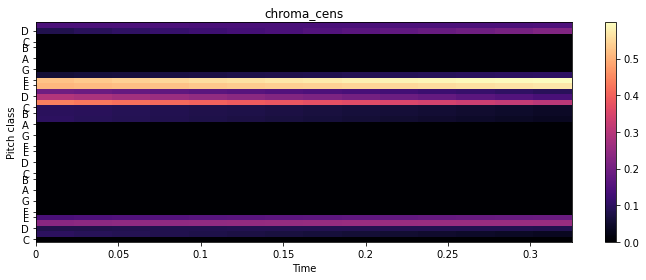

In [13]:

#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [14]:
#feature set
y,sr=librosa.load(dir2+"\\audio\\fold5\\100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape
ipd.Audio(y,rate=sr)

In [22]:

#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [15]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    a=fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    print(file)
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)
      


  0%|                                                                                 | 2/8732 [00:00<10:11, 14.27it/s]

100032-3-0-0.wav
100263-2-0-117.wav
100263-2-0-121.wav


  0%|                                                                                 | 4/8732 [00:00<14:14, 10.22it/s]

100263-2-0-126.wav
100263-2-0-137.wav


  0%|                                                                                 | 6/8732 [00:00<15:56,  9.12it/s]

100263-2-0-143.wav
100263-2-0-161.wav


  0%|                                                                                 | 8/8732 [00:00<16:53,  8.60it/s]

100263-2-0-3.wav
100263-2-0-36.wav


  0%|                                                                                | 12/8732 [00:01<13:23, 10.85it/s]

100648-1-0-0.wav
100648-1-1-0.wav
100648-1-2-0.wav
100648-1-3-0.wav
100648-1-4-0.wav


  0%|▏                                                                               | 14/8732 [00:01<11:57, 12.16it/s]

100652-3-0-0.wav
100652-3-0-1.wav


  0%|▏                                                                               | 16/8732 [00:01<14:03, 10.34it/s]

100652-3-0-2.wav
100652-3-0-3.wav


  0%|▏                                                                               | 18/8732 [00:01<15:18,  9.49it/s]

100795-3-0-0.wav
100795-3-1-0.wav


  0%|▏                                                                               | 20/8732 [00:01<16:07,  9.01it/s]

100795-3-1-1.wav
100795-3-1-2.wav


  0%|▏                                                                               | 23/8732 [00:02<17:01,  8.52it/s]

100852-0-0-0.wav
100852-0-0-1.wav


  0%|▏                                                                               | 25/8732 [00:02<18:14,  7.95it/s]

100852-0-0-10.wav
100852-0-0-11.wav


  0%|▏                                                                               | 27/8732 [00:02<18:08,  8.00it/s]

100852-0-0-12.wav
100852-0-0-13.wav


  0%|▎                                                                               | 29/8732 [00:03<18:22,  7.89it/s]

100852-0-0-14.wav
100852-0-0-15.wav


  0%|▎                                                                               | 31/8732 [00:03<18:23,  7.89it/s]

100852-0-0-16.wav
100852-0-0-17.wav


  0%|▎                                                                               | 33/8732 [00:03<18:15,  7.94it/s]

100852-0-0-18.wav
100852-0-0-19.wav


  0%|▎                                                                               | 35/8732 [00:03<19:16,  7.52it/s]

100852-0-0-2.wav
100852-0-0-20.wav


  0%|▎                                                                               | 37/8732 [00:04<18:58,  7.64it/s]

100852-0-0-21.wav
100852-0-0-22.wav


  0%|▎                                                                               | 39/8732 [00:04<18:45,  7.73it/s]

100852-0-0-23.wav
100852-0-0-24.wav


  0%|▍                                                                               | 41/8732 [00:04<18:31,  7.82it/s]

100852-0-0-25.wav
100852-0-0-26.wav


  0%|▍                                                                               | 43/8732 [00:04<18:29,  7.83it/s]

100852-0-0-27.wav
100852-0-0-28.wav


  1%|▍                                                                               | 45/8732 [00:05<18:09,  7.98it/s]

100852-0-0-29.wav
100852-0-0-3.wav


  1%|▍                                                                               | 47/8732 [00:05<18:09,  7.97it/s]

100852-0-0-30.wav
100852-0-0-4.wav


  1%|▍                                                                               | 49/8732 [00:05<18:40,  7.75it/s]

100852-0-0-5.wav
100852-0-0-6.wav


  1%|▍                                                                               | 51/8732 [00:05<18:17,  7.91it/s]

100852-0-0-7.wav
100852-0-0-8.wav


  1%|▍                                                                               | 53/8732 [00:06<19:00,  7.61it/s]

100852-0-0-9.wav
101281-3-0-0.wav


  1%|▌                                                                               | 55/8732 [00:06<18:28,  7.82it/s]

101281-3-0-14.wav
101281-3-0-5.wav


  1%|▌                                                                               | 57/8732 [00:06<18:55,  7.64it/s]

101382-2-0-10.wav
101382-2-0-12.wav


  1%|▌                                                                               | 59/8732 [00:07<19:59,  7.23it/s]

101382-2-0-20.wav
101382-2-0-21.wav


  1%|▌                                                                               | 61/8732 [00:07<19:58,  7.23it/s]

101382-2-0-29.wav
101382-2-0-33.wav


  1%|▌                                                                               | 63/8732 [00:07<19:43,  7.33it/s]

101382-2-0-42.wav
101382-2-0-45.wav


  1%|▌                                                                               | 65/8732 [00:07<19:33,  7.39it/s]

101415-3-0-2.wav
101415-3-0-3.wav


  1%|▌                                                                               | 67/8732 [00:08<19:26,  7.43it/s]

101415-3-0-8.wav
101729-0-0-1.wav


  1%|▋                                                                               | 69/8732 [00:08<19:23,  7.45it/s]

101729-0-0-11.wav
101729-0-0-12.wav


  1%|▋                                                                               | 71/8732 [00:08<19:26,  7.42it/s]

101729-0-0-13.wav
101729-0-0-14.wav


  1%|▋                                                                               | 73/8732 [00:08<19:52,  7.26it/s]

101729-0-0-16.wav
101729-0-0-17.wav


  1%|▋                                                                               | 75/8732 [00:09<19:33,  7.38it/s]

101729-0-0-18.wav
101729-0-0-19.wav


  1%|▋                                                                               | 77/8732 [00:09<19:15,  7.49it/s]

101729-0-0-21.wav
101729-0-0-22.wav


  1%|▋                                                                               | 79/8732 [00:09<19:43,  7.31it/s]

101729-0-0-23.wav
101729-0-0-24.wav


  1%|▋                                                                               | 81/8732 [00:10<19:48,  7.28it/s]

101729-0-0-26.wav
101729-0-0-28.wav


  1%|▊                                                                               | 83/8732 [00:10<19:47,  7.28it/s]

101729-0-0-29.wav
101729-0-0-3.wav


  1%|▊                                                                               | 85/8732 [00:10<20:04,  7.18it/s]

101729-0-0-32.wav
101729-0-0-33.wav


  1%|▊                                                                               | 87/8732 [00:10<19:58,  7.21it/s]

101729-0-0-36.wav
101729-0-0-37.wav


  1%|▊                                                                               | 89/8732 [00:11<19:39,  7.33it/s]

101729-0-0-38.wav
101729-0-0-39.wav


  1%|▊                                                                               | 91/8732 [00:11<19:57,  7.22it/s]

101729-0-0-4.wav
101729-0-0-40.wav


  1%|▊                                                                               | 93/8732 [00:11<19:39,  7.33it/s]

101729-0-0-6.wav
101729-0-0-9.wav


  1%|▊                                                                               | 95/8732 [00:11<19:11,  7.50it/s]

101848-9-0-0.wav
101848-9-0-1.wav


  1%|▉                                                                               | 97/8732 [00:12<18:50,  7.64it/s]

101848-9-0-2.wav
101848-9-0-3.wav


  1%|▉                                                                               | 99/8732 [00:12<18:39,  7.71it/s]

101848-9-0-8.wav
101848-9-0-9.wav


  1%|▉                                                                              | 101/8732 [00:12<17:24,  8.27it/s]

102102-3-0-0.wav
102103-3-0-0.wav
102103-3-1-0.wav
102104-3-0-0.wav
102105-3-0-0.wav

  1%|▉                                                                              | 105/8732 [00:12<14:24,  9.98it/s]


102106-3-0-0.wav
102305-6-0-0.wav


  1%|▉                                                                              | 107/8732 [00:13<13:10, 10.91it/s]

102547-3-0-2.wav
102547-3-0-7.wav


  1%|▉                                                                              | 109/8732 [00:13<14:54,  9.64it/s]

102547-3-0-8.wav
102842-3-0-1.wav


  1%|█                                                                              | 112/8732 [00:13<16:39,  8.62it/s]

102842-3-1-0.wav
102842-3-1-5.wav


  1%|█                                                                              | 114/8732 [00:13<17:29,  8.21it/s]

102842-3-1-6.wav
102853-8-0-0.wav


  1%|█                                                                              | 116/8732 [00:14<18:13,  7.88it/s]

102853-8-0-1.wav
102853-8-0-2.wav


  1%|█                                                                              | 118/8732 [00:14<18:00,  7.97it/s]

102853-8-0-3.wav
102853-8-0-4.wav


  1%|█                                                                              | 120/8732 [00:14<17:48,  8.06it/s]

102853-8-0-5.wav
102853-8-0-6.wav


  1%|█                                                                              | 122/8732 [00:14<17:54,  8.01it/s]

102853-8-1-0.wav
102857-5-0-0.wav


  1%|█                                                                              | 124/8732 [00:15<18:08,  7.91it/s]

102857-5-0-1.wav
102857-5-0-10.wav


  1%|█▏                                                                             | 126/8732 [00:15<18:25,  7.79it/s]

102857-5-0-11.wav
102857-5-0-12.wav


  1%|█▏                                                                             | 128/8732 [00:15<18:24,  7.79it/s]

102857-5-0-13.wav
102857-5-0-14.wav


  1%|█▏                                                                             | 130/8732 [00:15<18:13,  7.87it/s]

102857-5-0-15.wav
102857-5-0-16.wav


  2%|█▏                                                                             | 132/8732 [00:16<18:22,  7.80it/s]

102857-5-0-17.wav
102857-5-0-18.wav


  2%|█▏                                                                             | 134/8732 [00:16<18:18,  7.82it/s]

102857-5-0-19.wav
102857-5-0-2.wav


  2%|█▏                                                                             | 136/8732 [00:16<18:21,  7.81it/s]

102857-5-0-20.wav
102857-5-0-21.wav


  2%|█▏                                                                             | 138/8732 [00:17<18:31,  7.73it/s]

102857-5-0-22.wav
102857-5-0-23.wav


  2%|█▎                                                                             | 140/8732 [00:17<19:12,  7.45it/s]

102857-5-0-24.wav
102857-5-0-25.wav


  2%|█▎                                                                             | 142/8732 [00:17<19:52,  7.20it/s]

102857-5-0-26.wav
102857-5-0-27.wav


  2%|█▎                                                                             | 144/8732 [00:17<20:44,  6.90it/s]

102857-5-0-28.wav
102857-5-0-29.wav


  2%|█▎                                                                             | 146/8732 [00:18<21:40,  6.60it/s]

102857-5-0-3.wav
102857-5-0-30.wav


  2%|█▎                                                                             | 148/8732 [00:18<21:15,  6.73it/s]

102857-5-0-4.wav
102857-5-0-5.wav


  2%|█▎                                                                             | 150/8732 [00:18<19:32,  7.32it/s]

102857-5-0-6.wav
102857-5-0-7.wav


  2%|█▍                                                                             | 152/8732 [00:18<18:51,  7.58it/s]

102857-5-0-8.wav
102857-5-0-9.wav


  2%|█▍                                                                             | 154/8732 [00:19<18:27,  7.75it/s]

102858-5-0-0.wav
102858-5-0-1.wav


  2%|█▍                                                                             | 156/8732 [00:19<18:22,  7.78it/s]

102871-8-0-0.wav
102871-8-0-1.wav


  2%|█▍                                                                             | 158/8732 [00:19<18:08,  7.88it/s]

102871-8-0-10.wav
102871-8-0-11.wav


  2%|█▍                                                                             | 160/8732 [00:19<18:05,  7.90it/s]

102871-8-0-12.wav
102871-8-0-13.wav


  2%|█▍                                                                             | 162/8732 [00:20<17:51,  8.00it/s]

102871-8-0-14.wav
102871-8-0-15.wav


  2%|█▍                                                                             | 164/8732 [00:20<18:23,  7.77it/s]

102871-8-0-2.wav
102871-8-0-3.wav


  2%|█▌                                                                             | 166/8732 [00:20<18:23,  7.76it/s]

102871-8-0-4.wav
102871-8-0-5.wav


  2%|█▌                                                                             | 168/8732 [00:21<18:14,  7.83it/s]

102871-8-0-6.wav
102871-8-0-7.wav


  2%|█▌                                                                             | 170/8732 [00:21<19:22,  7.36it/s]

102871-8-0-8.wav
102871-8-0-9.wav


  2%|█▌                                                                             | 172/8732 [00:21<19:52,  7.18it/s]

103074-7-0-0.wav
103074-7-0-1.wav


  2%|█▌                                                                             | 174/8732 [00:21<20:00,  7.13it/s]

103074-7-0-2.wav
103074-7-1-0.wav


  2%|█▌                                                                             | 176/8732 [00:22<20:45,  6.87it/s]

103074-7-1-1.wav
103074-7-1-2.wav


  2%|█▌                                                                             | 178/8732 [00:22<20:18,  7.02it/s]

103074-7-1-3.wav
103074-7-1-4.wav


  2%|█▋                                                                             | 180/8732 [00:22<19:59,  7.13it/s]

103074-7-1-5.wav
103074-7-1-6.wav


  2%|█▋                                                                             | 181/8732 [00:22<21:10,  6.73it/s]

103074-7-2-0.wav
103074-7-3-0.wav


  2%|█▋                                                                             | 184/8732 [00:23<19:27,  7.32it/s]

103074-7-3-1.wav
103074-7-3-2.wav


  2%|█▋                                                                             | 186/8732 [00:23<19:31,  7.29it/s]

103074-7-3-3.wav
103074-7-4-0.wav


  2%|█▋                                                                             | 188/8732 [00:23<19:34,  7.27it/s]

103074-7-4-1.wav
103074-7-4-2.wav


  2%|█▋                                                                             | 190/8732 [00:24<19:47,  7.20it/s]

103074-7-4-3.wav
103074-7-4-4.wav


  2%|█▋                                                                             | 192/8732 [00:24<20:24,  6.97it/s]

103074-7-4-5.wav
103074-7-4-6.wav


  2%|█▊                                                                             | 195/8732 [00:24<17:12,  8.26it/s]

103076-3-0-0.wav
103076-3-1-0.wav
103076-3-2-0.wav
103199-4-0-0.wav


  2%|█▊                                                                             | 197/8732 [00:24<15:13,  9.34it/s]

103199-4-0-3.wav
103199-4-0-4.wav


  2%|█▊                                                                             | 200/8732 [00:25<16:49,  8.45it/s]

103199-4-0-5.wav
103199-4-0-6.wav


  2%|█▊                                                                             | 203/8732 [00:25<15:53,  8.94it/s]

103199-4-1-0.wav
103199-4-2-0.wav
103199-4-2-1.wav


  2%|█▊                                                                             | 205/8732 [00:25<16:50,  8.44it/s]

103199-4-2-10.wav
103199-4-2-11.wav


  2%|█▊                                                                             | 207/8732 [00:26<17:36,  8.07it/s]

103199-4-2-2.wav
103199-4-2-3.wav


  2%|█▉                                                                             | 209/8732 [00:26<17:43,  8.02it/s]

103199-4-2-4.wav
103199-4-2-5.wav


  2%|█▉                                                                             | 211/8732 [00:26<18:03,  7.86it/s]

103199-4-2-6.wav
103199-4-2-7.wav


  2%|█▉                                                                             | 213/8732 [00:26<18:05,  7.85it/s]

103199-4-2-8.wav
103199-4-2-9.wav


  2%|█▉                                                                             | 216/8732 [00:27<15:46,  9.00it/s]

103199-4-4-0.wav
103199-4-6-0.wav
103199-4-7-2.wav


  2%|█▉                                                                             | 218/8732 [00:27<17:00,  8.34it/s]

103249-5-0-0.wav
103249-5-0-1.wav


  3%|█▉                                                                             | 220/8732 [00:27<18:04,  7.85it/s]

103249-5-0-10.wav
103249-5-0-11.wav


  3%|██                                                                             | 222/8732 [00:27<18:37,  7.61it/s]

103249-5-0-12.wav
103249-5-0-13.wav


  3%|██                                                                             | 224/8732 [00:28<19:16,  7.36it/s]

103249-5-0-14.wav
103249-5-0-15.wav


  3%|██                                                                             | 226/8732 [00:28<19:14,  7.37it/s]

103249-5-0-16.wav
103249-5-0-17.wav


  3%|██                                                                             | 228/8732 [00:28<19:32,  7.25it/s]

103249-5-0-18.wav
103249-5-0-19.wav


  3%|██                                                                             | 230/8732 [00:28<19:27,  7.28it/s]

103249-5-0-2.wav
103249-5-0-3.wav


  3%|██                                                                             | 232/8732 [00:29<19:16,  7.35it/s]

103249-5-0-4.wav
103249-5-0-5.wav


  3%|██                                                                             | 234/8732 [00:29<19:01,  7.45it/s]

103249-5-0-6.wav
103249-5-0-7.wav


  3%|██▏                                                                            | 236/8732 [00:29<18:56,  7.48it/s]

103249-5-0-8.wav
103249-5-0-9.wav


  3%|██▏                                                                            | 238/8732 [00:30<19:08,  7.39it/s]

103258-5-0-0.wav
103258-5-0-1.wav


  3%|██▏                                                                            | 240/8732 [00:30<19:10,  7.38it/s]

103258-5-0-10.wav
103258-5-0-11.wav


  3%|██▏                                                                            | 242/8732 [00:30<19:17,  7.34it/s]

103258-5-0-12.wav
103258-5-0-13.wav


  3%|██▏                                                                            | 244/8732 [00:30<19:16,  7.34it/s]

103258-5-0-14.wav
103258-5-0-15.wav


  3%|██▏                                                                            | 246/8732 [00:31<19:10,  7.38it/s]

103258-5-0-16.wav
103258-5-0-17.wav


  3%|██▏                                                                            | 248/8732 [00:31<19:09,  7.38it/s]

103258-5-0-18.wav
103258-5-0-19.wav


  3%|██▎                                                                            | 250/8732 [00:31<19:07,  7.39it/s]

103258-5-0-2.wav
103258-5-0-3.wav


  3%|██▎                                                                            | 252/8732 [00:31<19:17,  7.32it/s]

103258-5-0-4.wav
103258-5-0-5.wav


  3%|██▎                                                                            | 254/8732 [00:32<19:08,  7.38it/s]

103258-5-0-6.wav
103258-5-0-7.wav


  3%|██▎                                                                            | 256/8732 [00:32<18:51,  7.49it/s]

103258-5-0-8.wav
103258-5-0-9.wav


  3%|██▎                                                                            | 258/8732 [00:32<18:43,  7.54it/s]

103357-4-0-0.wav
103357-4-0-1.wav


  3%|██▎                                                                            | 260/8732 [00:32<18:08,  7.78it/s]

103438-5-0-0.wav
103438-5-0-1.wav


  3%|██▎                                                                            | 262/8732 [00:33<17:57,  7.86it/s]

103438-5-0-2.wav
104327-2-0-15.wav


  3%|██▍                                                                            | 264/8732 [00:33<18:31,  7.62it/s]

104327-2-0-19.wav
104327-2-0-26.wav


  3%|██▍                                                                            | 266/8732 [00:33<18:18,  7.70it/s]

104327-2-0-28.wav
104327-2-0-3.wav


  3%|██▍                                                                            | 268/8732 [00:34<18:34,  7.59it/s]

104327-2-0-30.wav
104327-2-0-34.wav


  3%|██▍                                                                            | 270/8732 [00:34<18:28,  7.63it/s]

104327-2-0-4.wav
104421-2-0-1.wav


  3%|██▍                                                                            | 272/8732 [00:34<18:07,  7.78it/s]

104421-2-0-15.wav
104421-2-0-20.wav


  3%|██▍                                                                            | 274/8732 [00:34<17:51,  7.90it/s]

104421-2-0-29.wav
104421-2-0-3.wav


  3%|██▍                                                                            | 276/8732 [00:35<17:46,  7.93it/s]

104421-2-0-5.wav
104421-2-0-7.wav


  3%|██▌                                                                            | 278/8732 [00:35<17:44,  7.94it/s]

104421-2-1-3.wav
104625-4-0-15.wav


  3%|██▌                                                                            | 279/8732 [00:35<23:07,  6.09it/s]

104625-4-0-21.wav


  3%|██▌                                                                            | 280/8732 [00:35<26:52,  5.24it/s]

104625-4-0-27.wav


  3%|██▌                                                                            | 281/8732 [00:36<29:18,  4.81it/s]

104625-4-0-29.wav


  3%|██▌                                                                            | 282/8732 [00:36<31:12,  4.51it/s]

104625-4-0-3.wav


  3%|██▌                                                                            | 283/8732 [00:36<32:27,  4.34it/s]

104625-4-0-35.wav


  3%|██▌                                                                            | 284/8732 [00:36<33:14,  4.24it/s]

104625-4-0-40.wav


  3%|██▌                                                                            | 285/8732 [00:37<33:42,  4.18it/s]

104625-4-0-41.wav


  3%|██▌                                                                            | 286/8732 [00:37<34:32,  4.08it/s]

104625-4-0-45.wav


  3%|██▌                                                                            | 287/8732 [00:37<34:52,  4.04it/s]

104625-4-0-48.wav


  3%|██▌                                                                            | 288/8732 [00:37<35:03,  4.01it/s]

104625-4-0-51.wav


  3%|██▌                                                                            | 289/8732 [00:38<35:08,  4.00it/s]

104625-4-0-52.wav


  3%|██▌                                                                            | 290/8732 [00:38<35:09,  4.00it/s]

104625-4-0-53.wav


  3%|██▋                                                                            | 291/8732 [00:38<35:05,  4.01it/s]

104625-4-0-55.wav


  3%|██▋                                                                            | 292/8732 [00:38<35:12,  4.00it/s]

104625-4-0-57.wav


  3%|██▋                                                                            | 293/8732 [00:39<35:04,  4.01it/s]

104625-4-0-66.wav


  3%|██▋                                                                            | 294/8732 [00:39<35:06,  4.01it/s]

104625-4-1-20.wav


  3%|██▋                                                                            | 295/8732 [00:39<34:57,  4.02it/s]

104625-4-1-8.wav


  3%|██▋                                                                            | 297/8732 [00:39<30:12,  4.65it/s]

104817-4-0-0.wav
104817-4-0-1.wav


  3%|██▋                                                                            | 299/8732 [00:40<25:20,  5.55it/s]

104817-4-0-10.wav
104817-4-0-11.wav


  3%|██▋                                                                            | 301/8732 [00:40<22:05,  6.36it/s]

104817-4-0-2.wav
104817-4-0-3.wav


  3%|██▋                                                                            | 303/8732 [00:40<20:32,  6.84it/s]

104817-4-0-4.wav
104817-4-0-5.wav


  3%|██▊                                                                            | 305/8732 [00:41<19:44,  7.11it/s]

104817-4-0-6.wav
104817-4-0-7.wav


  4%|██▊                                                                            | 307/8732 [00:41<19:25,  7.23it/s]

104817-4-0-8.wav
104817-4-0-9.wav


  4%|██▊                                                                            | 309/8732 [00:41<18:59,  7.39it/s]

104998-7-0-5.wav
104998-7-10-1.wav


  4%|██▊                                                                            | 311/8732 [00:41<18:09,  7.73it/s]

104998-7-10-10.wav
104998-7-10-13.wav


  4%|██▊                                                                            | 313/8732 [00:42<17:44,  7.91it/s]

104998-7-10-15.wav
104998-7-10-8.wav


  4%|██▊                                                                            | 315/8732 [00:42<17:45,  7.90it/s]

104998-7-10-9.wav
104998-7-11-0.wav


  4%|██▊                                                                            | 317/8732 [00:42<17:41,  7.93it/s]

104998-7-11-2.wav
104998-7-12-2.wav


  4%|██▉                                                                            | 319/8732 [00:42<17:35,  7.97it/s]

104998-7-14-1.wav
104998-7-14-5.wav


  4%|██▉                                                                            | 321/8732 [00:43<17:36,  7.96it/s]

104998-7-14-6.wav
104998-7-15-1.wav


  4%|██▉                                                                            | 323/8732 [00:43<18:02,  7.77it/s]

104998-7-15-3.wav
104998-7-15-5.wav


  4%|██▉                                                                            | 325/8732 [00:43<17:53,  7.83it/s]

104998-7-15-9.wav
104998-7-16-0.wav


  4%|██▉                                                                            | 327/8732 [00:43<17:35,  7.97it/s]

104998-7-16-10.wav
104998-7-16-11.wav


  4%|██▉                                                                            | 329/8732 [00:44<17:34,  7.97it/s]

104998-7-16-5.wav
104998-7-16-6.wav


  4%|██▉                                                                            | 331/8732 [00:44<17:39,  7.93it/s]

104998-7-16-7.wav
104998-7-17-0.wav


  4%|███                                                                            | 333/8732 [00:44<17:38,  7.94it/s]

104998-7-17-1.wav
104998-7-17-12.wav


  4%|███                                                                            | 335/8732 [00:44<17:43,  7.89it/s]

104998-7-17-14.wav
104998-7-17-4.wav


  4%|███                                                                            | 337/8732 [00:45<17:23,  8.04it/s]

104998-7-17-7.wav
104998-7-17-8.wav


  4%|███                                                                            | 339/8732 [00:45<17:27,  8.01it/s]

104998-7-18-12.wav
104998-7-18-13.wav


  4%|███                                                                            | 341/8732 [00:45<17:20,  8.07it/s]

104998-7-18-3.wav
104998-7-18-9.wav


  4%|███                                                                            | 343/8732 [00:45<18:08,  7.71it/s]

104998-7-19-0.wav
104998-7-19-3.wav


  4%|███                                                                            | 345/8732 [00:46<17:34,  7.95it/s]

104998-7-19-6.wav
104998-7-19-7.wav


  4%|███▏                                                                           | 347/8732 [00:46<17:36,  7.94it/s]

104998-7-19-8.wav
104998-7-19-9.wav


  4%|███▏                                                                           | 349/8732 [00:46<17:30,  7.98it/s]

104998-7-2-4.wav
104998-7-2-5.wav


  4%|███▏                                                                           | 351/8732 [00:46<17:25,  8.02it/s]

104998-7-2-6.wav
104998-7-3-1.wav


  4%|███▏                                                                           | 353/8732 [00:47<17:34,  7.95it/s]

104998-7-7-0.wav
104998-7-7-1.wav


  4%|███▏                                                                           | 355/8732 [00:47<18:02,  7.74it/s]

104998-7-7-4.wav
104998-7-7-7.wav


  4%|███▏                                                                           | 357/8732 [00:47<18:24,  7.58it/s]

104998-7-7-9.wav
104998-7-8-13.wav


  4%|███▏                                                                           | 359/8732 [00:47<18:25,  7.58it/s]

104998-7-8-14.wav
104998-7-8-15.wav


  4%|███▎                                                                           | 361/8732 [00:48<19:10,  7.27it/s]

104998-7-8-17.wav
104998-7-8-4.wav


  4%|███▎                                                                           | 363/8732 [00:48<18:33,  7.51it/s]

104998-7-8-6.wav
104998-7-8-7.wav


  4%|███▎                                                                           | 365/8732 [00:48<18:06,  7.70it/s]

104998-7-9-0.wav
104998-7-9-13.wav


  4%|███▎                                                                           | 367/8732 [00:48<17:57,  7.77it/s]

104998-7-9-9.wav
105029-7-0-0.wav


  4%|███▎                                                                           | 369/8732 [00:49<17:46,  7.84it/s]

105029-7-0-1.wav
105029-7-0-2.wav


  4%|███▎                                                                           | 371/8732 [00:49<18:44,  7.44it/s]

105029-7-0-3.wav
105029-7-0-4.wav


  4%|███▎                                                                           | 373/8732 [00:49<18:15,  7.63it/s]

105029-7-0-5.wav
105029-7-0-6.wav


  4%|███▍                                                                           | 375/8732 [00:49<17:54,  7.78it/s]

105029-7-1-0.wav
105029-7-1-1.wav


  4%|███▍                                                                           | 377/8732 [00:50<17:53,  7.79it/s]

105029-7-1-10.wav
105029-7-1-11.wav


  4%|███▍                                                                           | 379/8732 [00:50<18:09,  7.66it/s]

105029-7-1-12.wav
105029-7-1-13.wav


  4%|███▍                                                                           | 381/8732 [00:50<18:00,  7.73it/s]

105029-7-1-2.wav
105029-7-1-3.wav


  4%|███▍                                                                           | 383/8732 [00:51<18:00,  7.73it/s]

105029-7-1-4.wav
105029-7-1-5.wav


  4%|███▍                                                                           | 385/8732 [00:51<17:43,  7.85it/s]

105029-7-1-6.wav
105029-7-1-7.wav


  4%|███▌                                                                           | 387/8732 [00:51<17:51,  7.79it/s]

105029-7-1-8.wav
105029-7-1-9.wav


  4%|███▌                                                                           | 389/8732 [00:51<18:15,  7.62it/s]

105029-7-2-0.wav
105029-7-2-1.wav


  4%|███▌                                                                           | 391/8732 [00:52<17:59,  7.72it/s]

105029-7-2-10.wav
105029-7-2-11.wav


  5%|███▌                                                                           | 393/8732 [00:52<17:36,  7.89it/s]

105029-7-2-12.wav
105029-7-2-13.wav


  5%|███▌                                                                           | 395/8732 [00:52<17:31,  7.93it/s]

105029-7-2-14.wav
105029-7-2-15.wav


  5%|███▌                                                                           | 397/8732 [00:52<17:35,  7.90it/s]

105029-7-2-16.wav
105029-7-2-2.wav


  5%|███▌                                                                           | 399/8732 [00:53<17:22,  7.99it/s]

105029-7-2-3.wav
105029-7-2-4.wav


  5%|███▋                                                                           | 401/8732 [00:53<17:22,  7.99it/s]

105029-7-2-5.wav
105029-7-2-6.wav


  5%|███▋                                                                           | 403/8732 [00:53<17:43,  7.83it/s]

105029-7-2-7.wav
105029-7-2-8.wav


  5%|███▋                                                                           | 405/8732 [00:53<17:38,  7.86it/s]

105029-7-2-9.wav
105029-7-3-0.wav


  5%|███▋                                                                           | 407/8732 [00:54<18:03,  7.69it/s]

105029-7-3-1.wav
105029-7-3-2.wav


  5%|███▋                                                                           | 409/8732 [00:54<17:59,  7.71it/s]

105029-7-3-3.wav
105029-7-3-4.wav


  5%|███▋                                                                           | 411/8732 [00:54<18:03,  7.68it/s]

105029-7-3-5.wav
105029-7-3-6.wav


  5%|███▋                                                                           | 413/8732 [00:54<17:39,  7.85it/s]

105029-7-3-7.wav
105029-7-4-0.wav


  5%|███▊                                                                           | 415/8732 [00:55<17:33,  7.89it/s]

105029-7-4-1.wav
105029-7-4-2.wav


  5%|███▊                                                                           | 417/8732 [00:55<17:45,  7.81it/s]

105029-7-4-3.wav
105088-3-0-10.wav


  5%|███▊                                                                           | 419/8732 [00:55<17:31,  7.91it/s]

105088-3-0-11.wav
105088-3-0-19.wav


  5%|███▊                                                                           | 421/8732 [00:55<17:21,  7.98it/s]

105088-3-0-8.wav
105289-8-0-0.wav


  5%|███▊                                                                           | 423/8732 [00:56<17:23,  7.96it/s]

105289-8-0-1.wav
105289-8-0-2.wav


  5%|███▊                                                                           | 425/8732 [00:56<17:22,  7.97it/s]

105289-8-0-3.wav
105289-8-0-4.wav


  5%|███▊                                                                           | 427/8732 [00:56<17:17,  8.00it/s]

105289-8-0-5.wav
105289-8-1-0.wav


  5%|███▉                                                                           | 429/8732 [00:56<17:20,  7.98it/s]

105289-8-1-1.wav
105289-8-1-2.wav


  5%|███▉                                                                           | 431/8732 [00:57<17:20,  7.98it/s]

105289-8-1-3.wav
105289-8-1-4.wav


  5%|███▉                                                                           | 433/8732 [00:57<17:19,  7.98it/s]

105289-8-2-0.wav
105289-8-2-1.wav


  5%|███▉                                                                           | 435/8732 [00:57<17:29,  7.91it/s]

105289-8-2-2.wav
105289-8-2-3.wav


  5%|███▉                                                                           | 437/8732 [00:57<17:29,  7.90it/s]

105289-8-2-4.wav
105289-8-2-5.wav


  5%|███▉                                                                           | 439/8732 [00:58<17:23,  7.95it/s]

105289-8-2-6.wav
105289-8-2-7.wav


  5%|███▉                                                                           | 441/8732 [00:58<17:58,  7.69it/s]

105319-3-0-22.wav
105319-3-0-29.wav


  5%|████                                                                           | 443/8732 [00:58<17:29,  7.90it/s]

105319-3-0-39.wav
105415-2-0-1.wav


  5%|████                                                                           | 445/8732 [00:58<18:03,  7.65it/s]

105415-2-0-15.wav
105415-2-0-19.wav


  5%|████                                                                           | 447/8732 [00:59<18:30,  7.46it/s]

105415-2-0-21.wav
105415-2-0-24.wav


  5%|████                                                                           | 449/8732 [00:59<18:17,  7.55it/s]

105415-2-0-4.wav
105415-2-0-6.wav


  5%|████                                                                           | 451/8732 [00:59<18:24,  7.50it/s]

105415-2-0-8.wav
105425-9-0-1.wav


  5%|████                                                                           | 453/8732 [00:59<17:58,  7.68it/s]

105425-9-0-10.wav
105425-9-0-12.wav


  5%|████                                                                           | 455/8732 [01:00<18:10,  7.59it/s]

105425-9-0-13.wav
105425-9-0-14.wav


  5%|████▏                                                                          | 457/8732 [01:00<17:57,  7.68it/s]

105425-9-0-23.wav
106014-5-0-0.wav


  5%|████▏                                                                          | 459/8732 [01:00<18:00,  7.65it/s]

106014-5-0-1.wav
106014-5-0-2.wav


  5%|████▏                                                                          | 461/8732 [01:01<18:01,  7.65it/s]

106014-5-0-3.wav
106014-5-0-4.wav


  5%|████▏                                                                          | 463/8732 [01:01<18:03,  7.63it/s]

106015-5-0-0.wav
106015-5-0-1.wav


  5%|████▏                                                                          | 465/8732 [01:01<18:03,  7.63it/s]

106015-5-0-10.wav
106015-5-0-11.wav


  5%|████▏                                                                          | 467/8732 [01:01<18:01,  7.64it/s]

106015-5-0-12.wav
106015-5-0-13.wav


  5%|████▏                                                                          | 469/8732 [01:02<18:38,  7.38it/s]

106015-5-0-14.wav
106015-5-0-15.wav


  5%|████▎                                                                          | 471/8732 [01:02<18:18,  7.52it/s]

106015-5-0-16.wav
106015-5-0-17.wav


  5%|████▎                                                                          | 473/8732 [01:02<18:14,  7.54it/s]

106015-5-0-18.wav
106015-5-0-19.wav


  5%|████▎                                                                          | 475/8732 [01:02<18:51,  7.29it/s]

106015-5-0-2.wav
106015-5-0-20.wav


  5%|████▎                                                                          | 477/8732 [01:03<18:57,  7.26it/s]

106015-5-0-3.wav
106015-5-0-4.wav


  5%|████▎                                                                          | 479/8732 [01:03<18:46,  7.33it/s]

106015-5-0-5.wav
106015-5-0-6.wav


  6%|████▎                                                                          | 481/8732 [01:03<19:11,  7.17it/s]

106015-5-0-7.wav
106015-5-0-8.wav


  6%|████▎                                                                          | 483/8732 [01:03<18:39,  7.37it/s]

106015-5-0-9.wav
106486-5-0-0.wav


  6%|████▍                                                                          | 485/8732 [01:04<18:02,  7.62it/s]

106486-5-0-1.wav
106486-5-0-2.wav


  6%|████▍                                                                          | 487/8732 [01:04<17:56,  7.66it/s]

106487-5-0-0.wav
106487-5-0-1.wav


  6%|████▍                                                                          | 489/8732 [01:04<17:34,  7.82it/s]

106487-5-0-2.wav
106905-5-0-0.wav


  6%|████▍                                                                          | 491/8732 [01:05<17:27,  7.87it/s]

106905-5-0-1.wav
106905-5-0-2.wav


  6%|████▍                                                                          | 493/8732 [01:05<17:16,  7.95it/s]

106905-8-0-0.wav
106905-8-0-1.wav


  6%|████▍                                                                          | 495/8732 [01:05<17:12,  7.98it/s]

106905-8-0-2.wav
106905-8-0-3.wav


  6%|████▌                                                                          | 499/8732 [01:05<13:42, 10.01it/s]

106955-6-0-0.wav
107090-1-0-0.wav
107090-1-1-0.wav
107190-3-0-0.wav
107228-5-0-0.wav


  6%|████▌                                                                          | 501/8732 [01:05<12:47, 10.73it/s]

107228-5-0-1.wav
107228-5-0-2.wav


  6%|████▌                                                                          | 503/8732 [01:06<14:09,  9.69it/s]

107228-5-0-3.wav
107228-5-0-4.wav


  6%|████▌                                                                          | 505/8732 [01:06<15:06,  9.08it/s]

107228-5-0-5.wav
107228-5-0-6.wav


  6%|████▌                                                                          | 508/8732 [01:06<16:22,  8.37it/s]

107228-5-0-7.wav
107357-8-0-0.wav


  6%|████▌                                                                          | 510/8732 [01:07<17:41,  7.75it/s]

107357-8-0-1.wav
107357-8-0-2.wav


  6%|████▋                                                                          | 512/8732 [01:07<17:40,  7.75it/s]

107357-8-0-3.wav
107357-8-0-4.wav


  6%|████▋                                                                          | 514/8732 [01:07<17:36,  7.78it/s]

107357-8-0-5.wav
107357-8-0-6.wav


  6%|████▋                                                                          | 516/8732 [01:07<17:28,  7.84it/s]

107357-8-0-7.wav
107357-8-0-8.wav


  6%|████▋                                                                          | 518/8732 [01:08<17:59,  7.61it/s]

107357-8-1-0.wav
107357-8-1-1.wav


  6%|████▋                                                                          | 520/8732 [01:08<18:08,  7.54it/s]

107357-8-1-10.wav
107357-8-1-11.wav


  6%|████▋                                                                          | 522/8732 [01:08<17:52,  7.66it/s]

107357-8-1-12.wav
107357-8-1-13.wav


  6%|████▋                                                                          | 524/8732 [01:08<17:42,  7.72it/s]

107357-8-1-14.wav
107357-8-1-15.wav


  6%|████▊                                                                          | 526/8732 [01:09<18:07,  7.54it/s]

107357-8-1-16.wav
107357-8-1-17.wav


  6%|████▊                                                                          | 528/8732 [01:09<17:31,  7.81it/s]

107357-8-1-18.wav
107357-8-1-2.wav


  6%|████▊                                                                          | 530/8732 [01:09<17:20,  7.88it/s]

107357-8-1-3.wav
107357-8-1-4.wav


  6%|████▊                                                                          | 532/8732 [01:09<17:07,  7.98it/s]

107357-8-1-5.wav
107357-8-1-6.wav


  6%|████▊                                                                          | 534/8732 [01:10<17:13,  7.93it/s]

107357-8-1-7.wav
107357-8-1-8.wav


  6%|████▊                                                                          | 536/8732 [01:10<17:20,  7.87it/s]

107357-8-1-9.wav
107653-9-0-12.wav


  6%|████▊                                                                          | 538/8732 [01:10<17:26,  7.83it/s]

107653-9-0-14.wav
107653-9-0-18.wav


  6%|████▉                                                                          | 540/8732 [01:10<17:47,  7.67it/s]

107653-9-0-3.wav
107653-9-0-5.wav


  6%|████▉                                                                          | 542/8732 [01:11<17:38,  7.74it/s]

107653-9-0-7.wav
107842-4-0-0.wav


  6%|████▉                                                                          | 544/8732 [01:11<18:20,  7.44it/s]

107842-4-0-1.wav
107842-4-0-2.wav


  6%|████▉                                                                          | 547/8732 [01:11<17:24,  7.83it/s]

107842-4-1-0.wav
107842-4-2-0.wav


  6%|████▉                                                                          | 548/8732 [01:11<17:57,  7.59it/s]

107842-4-2-1.wav
107842-4-2-2.wav


  6%|████▉                                                                          | 550/8732 [01:12<17:38,  7.73it/s]

107842-4-2-3.wav
107842-4-2-4.wav


  6%|█████                                                                          | 553/8732 [01:12<15:55,  8.56it/s]

107842-4-3-0.wav
108041-9-0-11.wav
108041-9-0-2.wav


  6%|█████                                                                          | 555/8732 [01:12<17:10,  7.93it/s]

108041-9-0-4.wav
108041-9-0-5.wav


  6%|█████                                                                          | 557/8732 [01:13<18:04,  7.54it/s]

108041-9-0-6.wav
108041-9-0-7.wav


  6%|█████                                                                          | 559/8732 [01:13<18:22,  7.41it/s]

108041-9-0-9.wav
108187-3-2-0.wav
108187-3-3-0.wav


  6%|█████                                                                          | 562/8732 [01:13<14:36,  9.32it/s]

108187-3-4-0.wav
108187-3-6-0.wav
108357-9-0-15.wav


  6%|█████                                                                          | 564/8732 [01:13<14:22,  9.47it/s]

108357-9-0-2.wav
108357-9-0-27.wav


  6%|█████                                                                          | 566/8732 [01:13<15:42,  8.67it/s]

108357-9-0-30.wav
108357-9-0-44.wav


  7%|█████▏                                                                         | 569/8732 [01:14<17:37,  7.72it/s]

108357-9-0-49.wav
108362-2-0-11.wav


  7%|█████▏                                                                         | 571/8732 [01:14<18:22,  7.40it/s]

108362-2-0-12.wav
108362-2-0-21.wav


  7%|█████▏                                                                         | 573/8732 [01:15<21:29,  6.33it/s]

108362-2-0-23.wav


  7%|█████▏                                                                         | 574/8732 [01:15<21:34,  6.30it/s]

108362-2-0-29.wav
108362-2-0-30.wav


  7%|█████▏                                                                         | 576/8732 [01:15<22:05,  6.15it/s]

108362-2-0-7.wav
108362-2-0-9.wav


  7%|█████▏                                                                         | 578/8732 [01:15<20:08,  6.75it/s]

108638-9-0-0.wav
108638-9-0-1.wav


  7%|█████▏                                                                         | 580/8732 [01:16<19:02,  7.13it/s]

108638-9-0-2.wav
108638-9-0-4.wav


  7%|█████▎                                                                         | 582/8732 [01:16<18:21,  7.40it/s]

108638-9-0-5.wav
108638-9-0-6.wav


  7%|█████▎                                                                         | 584/8732 [01:16<18:22,  7.39it/s]

109233-3-0-3.wav
109233-3-0-4.wav


  7%|█████▎                                                                         | 586/8732 [01:16<18:28,  7.35it/s]

109233-3-0-5.wav
109233-3-0-6.wav


  7%|█████▎                                                                         | 588/8732 [01:17<19:12,  7.07it/s]

109263-9-0-34.wav
109263-9-0-39.wav


  7%|█████▎                                                                         | 590/8732 [01:17<19:29,  6.96it/s]

109263-9-0-54.wav
109263-9-0-61.wav


  7%|█████▎                                                                         | 592/8732 [01:17<19:37,  6.91it/s]

109263-9-0-78.wav
109703-2-0-134.wav


  7%|█████▎                                                                         | 594/8732 [01:18<19:39,  6.90it/s]

109703-2-0-14.wav
109703-2-0-153.wav


  7%|█████▍                                                                         | 596/8732 [01:18<19:38,  6.90it/s]

109703-2-0-29.wav
109703-2-0-32.wav


  7%|█████▍                                                                         | 598/8732 [01:18<19:49,  6.84it/s]

109703-2-0-48.wav
109703-2-0-50.wav


  7%|█████▍                                                                         | 599/8732 [01:18<19:19,  7.01it/s]

109711-3-1-0.wav
109711-3-2-4.wav


  7%|█████▍                                                                         | 602/8732 [01:19<18:06,  7.49it/s]

109711-3-2-6.wav
110134-3-0-0.wav
110371-3-0-1.wav


  7%|█████▍                                                                         | 605/8732 [01:19<18:15,  7.42it/s]

110371-3-1-0.wav
110371-3-1-1.wav


  7%|█████▌                                                                         | 608/8732 [01:19<16:09,  8.38it/s]

110389-3-0-0.wav
110621-7-0-0.wav
110621-7-0-1.wav


  7%|█████▌                                                                         | 610/8732 [01:20<16:57,  7.99it/s]

110621-7-0-2.wav
110621-7-0-3.wav


  7%|█████▌                                                                         | 613/8732 [01:20<16:32,  8.18it/s]

110622-6-0-0.wav
110688-3-0-11.wav


  7%|█████▌                                                                         | 614/8732 [01:20<16:36,  8.14it/s]

110688-3-0-17.wav
110688-3-0-2.wav


  7%|█████▌                                                                         | 616/8732 [01:20<16:57,  7.98it/s]

110688-3-0-32.wav
110868-9-0-11.wav


  7%|█████▌                                                                         | 618/8732 [01:21<17:07,  7.89it/s]

110868-9-0-13.wav
110868-9-0-14.wav


  7%|█████▌                                                                         | 620/8732 [01:21<17:36,  7.68it/s]

110868-9-0-15.wav
110868-9-0-6.wav


  7%|█████▋                                                                         | 622/8732 [01:21<17:22,  7.78it/s]

110868-9-0-8.wav
110918-3-0-1.wav


  7%|█████▋                                                                         | 624/8732 [01:21<17:44,  7.62it/s]

110918-3-0-26.wav
110918-3-0-40.wav


  7%|█████▋                                                                         | 626/8732 [01:22<17:51,  7.57it/s]

110918-3-0-9.wav
111048-6-0-0.wav
111386-5-0-0.wav


  7%|█████▋                                                                         | 629/8732 [01:22<15:50,  8.53it/s]

111386-5-0-1.wav
111386-5-0-2.wav


  7%|█████▋                                                                         | 631/8732 [01:22<16:22,  8.25it/s]

111386-5-0-3.wav
111386-5-0-4.wav


  7%|█████▋                                                                         | 633/8732 [01:22<16:39,  8.10it/s]

111386-5-0-5.wav
111386-5-0-6.wav


  7%|█████▋                                                                         | 635/8732 [01:23<17:09,  7.86it/s]

111386-5-0-7.wav
111386-5-1-0.wav


  7%|█████▊                                                                         | 637/8732 [01:23<17:00,  7.94it/s]

111386-5-1-1.wav
111386-5-1-10.wav


  7%|█████▊                                                                         | 639/8732 [01:23<17:02,  7.91it/s]

111386-5-1-11.wav
111386-5-1-12.wav


  7%|█████▊                                                                         | 641/8732 [01:23<17:40,  7.63it/s]

111386-5-1-13.wav
111386-5-1-14.wav


  7%|█████▊                                                                         | 643/8732 [01:24<17:41,  7.62it/s]

111386-5-1-2.wav
111386-5-1-3.wav


  7%|█████▊                                                                         | 645/8732 [01:24<17:16,  7.80it/s]

111386-5-1-4.wav
111386-5-1-5.wav


  7%|█████▊                                                                         | 647/8732 [01:24<17:35,  7.66it/s]

111386-5-1-6.wav
111386-5-1-7.wav


  7%|█████▊                                                                         | 649/8732 [01:24<17:28,  7.71it/s]

111386-5-1-8.wav
111386-5-1-9.wav


  7%|█████▉                                                                         | 651/8732 [01:25<17:37,  7.65it/s]

111671-8-0-0.wav
111671-8-0-1.wav


  7%|█████▉                                                                         | 653/8732 [01:25<17:53,  7.52it/s]

111671-8-0-10.wav
111671-8-0-11.wav


  8%|█████▉                                                                         | 655/8732 [01:25<18:02,  7.46it/s]

111671-8-0-12.wav
111671-8-0-13.wav


  8%|█████▉                                                                         | 657/8732 [01:25<18:05,  7.44it/s]

111671-8-0-14.wav
111671-8-0-15.wav


  8%|█████▉                                                                         | 659/8732 [01:26<18:49,  7.15it/s]

111671-8-0-16.wav
111671-8-0-17.wav


  8%|█████▉                                                                         | 661/8732 [01:26<19:03,  7.06it/s]

111671-8-0-18.wav
111671-8-0-19.wav


  8%|█████▉                                                                         | 663/8732 [01:26<18:46,  7.16it/s]

111671-8-0-2.wav
111671-8-0-20.wav


  8%|██████                                                                         | 665/8732 [01:27<18:54,  7.11it/s]

111671-8-0-21.wav
111671-8-0-22.wav


  8%|██████                                                                         | 667/8732 [01:27<18:51,  7.13it/s]

111671-8-0-3.wav
111671-8-0-4.wav


  8%|██████                                                                         | 669/8732 [01:27<18:48,  7.14it/s]

111671-8-0-5.wav
111671-8-0-6.wav


  8%|██████                                                                         | 671/8732 [01:27<18:43,  7.17it/s]

111671-8-0-7.wav
111671-8-0-8.wav


  8%|██████                                                                         | 673/8732 [01:28<18:13,  7.37it/s]

111671-8-0-9.wav
112075-5-0-0.wav


  8%|██████                                                                         | 675/8732 [01:28<17:33,  7.65it/s]

112075-5-0-1.wav
112075-5-0-2.wav


  8%|██████                                                                         | 677/8732 [01:28<17:07,  7.84it/s]

112195-3-0-38.wav
112195-3-0-48.wav


  8%|██████▏                                                                        | 679/8732 [01:28<16:52,  7.95it/s]

112195-3-0-57.wav
112195-3-0-80.wav


  8%|██████▏                                                                        | 680/8732 [01:29<16:53,  7.94it/s]

113160-8-0-0.wav
113201-5-0-0.wav


  8%|██████▏                                                                        | 682/8732 [01:29<17:34,  7.64it/s]

113201-5-0-1.wav


  8%|██████▏                                                                        | 683/8732 [01:29<22:22,  6.00it/s]

113201-5-0-2.wav


  8%|██████▏                                                                        | 684/8732 [01:29<26:00,  5.16it/s]

113201-5-0-3.wav


  8%|██████▏                                                                        | 685/8732 [01:30<28:11,  4.76it/s]

113201-5-0-4.wav


  8%|██████▏                                                                        | 686/8732 [01:30<30:04,  4.46it/s]

113201-5-0-5.wav


  8%|██████▏                                                                        | 687/8732 [01:30<31:07,  4.31it/s]

113201-5-0-6.wav


  8%|██████▏                                                                        | 688/8732 [01:30<31:48,  4.22it/s]

113201-5-0-7.wav


  8%|██████▏                                                                        | 689/8732 [01:31<32:19,  4.15it/s]

113202-5-0-0.wav


  8%|██████▏                                                                        | 690/8732 [01:31<32:48,  4.09it/s]

113202-5-0-1.wav


  8%|██████▎                                                                        | 691/8732 [01:31<32:58,  4.06it/s]

113202-5-0-10.wav


  8%|██████▎                                                                        | 692/8732 [01:31<33:11,  4.04it/s]

113202-5-0-11.wav


  8%|██████▎                                                                        | 693/8732 [01:32<33:19,  4.02it/s]

113202-5-0-12.wav


  8%|██████▎                                                                        | 694/8732 [01:32<33:32,  3.99it/s]

113202-5-0-13.wav


  8%|██████▎                                                                        | 695/8732 [01:32<33:34,  3.99it/s]

113202-5-0-14.wav


  8%|██████▎                                                                        | 696/8732 [01:32<33:42,  3.97it/s]

113202-5-0-15.wav


  8%|██████▎                                                                        | 697/8732 [01:33<33:36,  3.98it/s]

113202-5-0-16.wav


  8%|██████▎                                                                        | 698/8732 [01:33<33:32,  3.99it/s]

113202-5-0-17.wav


  8%|██████▎                                                                        | 699/8732 [01:33<33:36,  3.98it/s]

113202-5-0-18.wav


  8%|██████▎                                                                        | 700/8732 [01:33<33:35,  3.99it/s]

113202-5-0-19.wav


  8%|██████▎                                                                        | 701/8732 [01:34<33:38,  3.98it/s]

113202-5-0-2.wav


  8%|██████▎                                                                        | 702/8732 [01:34<33:35,  3.98it/s]

113202-5-0-20.wav


  8%|██████▎                                                                        | 703/8732 [01:34<33:40,  3.97it/s]

113202-5-0-21.wav


  8%|██████▎                                                                        | 704/8732 [01:34<33:34,  3.99it/s]

113202-5-0-22.wav


  8%|██████▍                                                                        | 705/8732 [01:35<33:18,  4.02it/s]

113202-5-0-23.wav


  8%|██████▍                                                                        | 706/8732 [01:35<33:30,  3.99it/s]

113202-5-0-24.wav


  8%|██████▍                                                                        | 707/8732 [01:35<33:41,  3.97it/s]

113202-5-0-25.wav


  8%|██████▍                                                                        | 708/8732 [01:35<33:39,  3.97it/s]

113202-5-0-26.wav


  8%|██████▍                                                                        | 709/8732 [01:36<33:33,  3.98it/s]

113202-5-0-27.wav


  8%|██████▍                                                                        | 710/8732 [01:36<33:38,  3.97it/s]

113202-5-0-28.wav


  8%|██████▍                                                                        | 711/8732 [01:36<33:35,  3.98it/s]

113202-5-0-3.wav


  8%|██████▍                                                                        | 712/8732 [01:36<33:29,  3.99it/s]

113202-5-0-4.wav


  8%|██████▍                                                                        | 713/8732 [01:37<33:28,  3.99it/s]

113202-5-0-5.wav


  8%|██████▍                                                                        | 714/8732 [01:37<33:23,  4.00it/s]

113202-5-0-6.wav


  8%|██████▍                                                                        | 715/8732 [01:37<33:18,  4.01it/s]

113202-5-0-7.wav


  8%|██████▍                                                                        | 716/8732 [01:37<33:13,  4.02it/s]

113202-5-0-8.wav


  8%|██████▍                                                                        | 717/8732 [01:38<33:17,  4.01it/s]

113202-5-0-9.wav


  8%|██████▍                                                                        | 718/8732 [01:38<33:19,  4.01it/s]

113203-5-0-0.wav


  8%|██████▌                                                                        | 719/8732 [01:38<33:16,  4.01it/s]

113203-5-0-1.wav


  8%|██████▌                                                                        | 720/8732 [01:38<33:13,  4.02it/s]

113203-5-0-2.wav


  8%|██████▌                                                                        | 721/8732 [01:39<33:21,  4.00it/s]

113203-5-0-3.wav


  8%|██████▌                                                                        | 722/8732 [01:39<34:07,  3.91it/s]

113203-5-0-4.wav


  8%|██████▌                                                                        | 723/8732 [01:39<34:25,  3.88it/s]

113203-5-0-5.wav


  8%|██████▌                                                                        | 724/8732 [01:39<34:04,  3.92it/s]

113203-5-0-6.wav


  8%|██████▌                                                                        | 725/8732 [01:40<33:44,  3.95it/s]

113203-5-0-7.wav


  8%|██████▌                                                                        | 726/8732 [01:40<33:35,  3.97it/s]

113203-5-0-8.wav


  8%|██████▌                                                                        | 727/8732 [01:40<33:31,  3.98it/s]

113203-5-1-0.wav


  8%|██████▌                                                                        | 728/8732 [01:40<33:27,  3.99it/s]

113203-5-1-1.wav


  8%|██████▌                                                                        | 729/8732 [01:41<33:35,  3.97it/s]

113203-5-1-2.wav


  8%|██████▌                                                                        | 731/8732 [01:41<30:07,  4.43it/s]

113203-5-2-0.wav
113203-5-3-0.wav


  8%|██████▌                                                                        | 732/8732 [01:41<31:10,  4.28it/s]

113203-5-3-1.wav


  8%|██████▋                                                                        | 733/8732 [01:42<31:49,  4.19it/s]

113203-5-4-0.wav


  8%|██████▋                                                                        | 734/8732 [01:42<32:21,  4.12it/s]

113203-5-5-0.wav


  8%|██████▋                                                                        | 735/8732 [01:42<30:46,  4.33it/s]

113203-5-6-0.wav


  8%|██████▋                                                                        | 738/8732 [01:42<25:25,  5.24it/s]

113203-5-7-0.wav
113203-5-8-0.wav
113205-5-0-0.wav


  8%|██████▋                                                                        | 739/8732 [01:43<25:52,  5.15it/s]

113205-5-1-0.wav


  8%|██████▋                                                                        | 740/8732 [01:43<28:04,  4.75it/s]

113205-5-1-1.wav


  8%|██████▋                                                                        | 741/8732 [01:43<29:36,  4.50it/s]

113205-5-1-2.wav


  8%|██████▋                                                                        | 742/8732 [01:43<30:43,  4.34it/s]

113205-5-1-3.wav


  9%|██████▋                                                                        | 743/8732 [01:44<31:51,  4.18it/s]

113205-5-1-4.wav


  9%|██████▋                                                                        | 744/8732 [01:44<32:17,  4.12it/s]

113205-5-1-5.wav


  9%|██████▋                                                                        | 745/8732 [01:44<32:45,  4.06it/s]

113205-5-1-6.wav


  9%|██████▋                                                                        | 746/8732 [01:44<32:52,  4.05it/s]

113205-5-1-7.wav


  9%|██████▊                                                                        | 747/8732 [01:45<32:55,  4.04it/s]

113205-5-1-8.wav


  9%|██████▊                                                                        | 748/8732 [01:45<33:01,  4.03it/s]

113205-5-1-9.wav


  9%|██████▊                                                                        | 749/8732 [01:45<33:01,  4.03it/s]

113216-5-0-0.wav


  9%|██████▊                                                                        | 750/8732 [01:45<33:49,  3.93it/s]

113216-5-0-1.wav


  9%|██████▊                                                                        | 751/8732 [01:46<33:41,  3.95it/s]

113216-5-0-2.wav


  9%|██████▊                                                                        | 752/8732 [01:46<33:41,  3.95it/s]

113216-5-0-3.wav


  9%|██████▊                                                                        | 753/8732 [01:46<33:52,  3.92it/s]

113216-5-0-4.wav


  9%|██████▊                                                                        | 755/8732 [01:47<28:47,  4.62it/s]

113601-9-0-22.wav
113601-9-0-3.wav


  9%|██████▊                                                                        | 757/8732 [01:47<22:40,  5.86it/s]

113601-9-0-33.wav
113601-9-0-34.wav


  9%|██████▊                                                                        | 759/8732 [01:47<19:47,  6.72it/s]

113601-9-0-35.wav
113601-9-0-42.wav


  9%|██████▉                                                                        | 763/8732 [01:47<15:42,  8.45it/s]

113785-3-0-0.wav
113785-3-1-0.wav
114280-3-0-0.wav
114280-3-0-1.wav
114587-3-0-2.wav


  9%|██████▉                                                                        | 766/8732 [01:48<16:50,  7.88it/s]

114587-3-0-4.wav
114587-3-0-5.wav


  9%|██████▉                                                                        | 768/8732 [01:48<17:23,  7.63it/s]

114587-3-0-7.wav
115239-9-0-0.wav


  9%|██████▉                                                                        | 770/8732 [01:48<17:08,  7.74it/s]

115239-9-0-1.wav
115239-9-0-2.wav


  9%|██████▉                                                                        | 772/8732 [01:49<17:18,  7.67it/s]

115239-9-0-3.wav
115239-9-0-4.wav


  9%|███████                                                                        | 774/8732 [01:49<17:01,  7.79it/s]

115239-9-0-5.wav
115240-9-0-1.wav


  9%|███████                                                                        | 776/8732 [01:49<16:47,  7.90it/s]

115240-9-0-16.wav
115240-9-0-28.wav


  9%|███████                                                                        | 778/8732 [01:49<16:32,  8.01it/s]

115240-9-0-34.wav
115240-9-0-36.wav


  9%|███████                                                                        | 780/8732 [01:50<17:42,  7.48it/s]

115240-9-0-4.wav
115241-9-0-1.wav


  9%|███████                                                                        | 782/8732 [01:50<17:03,  7.77it/s]

115241-9-0-14.wav
115241-9-0-2.wav


  9%|███████                                                                        | 784/8732 [01:50<16:40,  7.95it/s]

115241-9-0-20.wav
115241-9-0-6.wav


  9%|███████                                                                        | 786/8732 [01:50<16:32,  8.01it/s]

115241-9-0-8.wav
115241-9-0-9.wav


  9%|███████▏                                                                       | 788/8732 [01:51<16:35,  7.98it/s]

115242-9-0-14.wav
115242-9-0-44.wav


  9%|███████▏                                                                       | 790/8732 [01:51<16:53,  7.84it/s]

115242-9-0-55.wav
115242-9-0-68.wav


  9%|███████▏                                                                       | 792/8732 [01:51<17:02,  7.76it/s]

115242-9-0-70.wav
115242-9-0-83.wav


  9%|███████▏                                                                       | 794/8732 [01:51<16:45,  7.89it/s]

115243-9-0-0.wav
115243-9-0-16.wav


  9%|███████▏                                                                       | 796/8732 [01:52<16:44,  7.90it/s]

115243-9-0-4.wav
115243-9-0-46.wav


  9%|███████▏                                                                       | 798/8732 [01:52<16:32,  7.99it/s]

115243-9-0-81.wav
115243-9-0-94.wav


  9%|███████▏                                                                       | 801/8732 [01:52<14:35,  9.05it/s]

115411-3-0-0.wav
115411-3-2-0.wav
115411-3-3-0.wav


  9%|███████▎                                                                       | 803/8732 [01:52<15:31,  8.51it/s]

115415-9-0-0.wav
115415-9-0-1.wav


  9%|███████▎                                                                       | 805/8732 [01:53<16:01,  8.25it/s]

115415-9-0-4.wav
115415-9-0-5.wav


  9%|███████▎                                                                       | 807/8732 [01:53<16:26,  8.04it/s]

115415-9-0-6.wav
115415-9-0-7.wav


  9%|███████▎                                                                       | 809/8732 [01:53<16:33,  7.98it/s]

115418-9-0-11.wav
115418-9-0-12.wav


  9%|███████▎                                                                       | 811/8732 [01:53<16:30,  8.00it/s]

115418-9-0-15.wav
115418-9-0-20.wav


  9%|███████▎                                                                       | 813/8732 [01:54<16:24,  8.05it/s]

115418-9-0-29.wav
115418-9-0-6.wav


  9%|███████▍                                                                       | 816/8732 [01:54<14:07,  9.34it/s]

115535-3-0-0.wav
115536-3-0-0.wav
115537-3-0-0.wav
116163-3-0-0.wav
116163-3-1-0.wav
116163-3-2-0.wav

  9%|███████▍                                                                       | 820/8732 [01:54<11:03, 11.92it/s]


116400-3-0-2.wav
116400-3-1-0.wav


  9%|███████▍                                                                       | 822/8732 [01:54<12:36, 10.45it/s]

116400-3-1-1.wav
116400-3-1-2.wav


  9%|███████▍                                                                       | 824/8732 [01:55<13:42,  9.61it/s]

116423-2-0-0.wav
116423-2-0-1.wav


  9%|███████▍                                                                       | 826/8732 [01:55<14:27,  9.11it/s]

116423-2-0-2.wav
116423-2-0-3.wav


  9%|███████▍                                                                       | 828/8732 [01:55<15:00,  8.78it/s]

116423-2-0-4.wav
116483-3-0-1.wav


 10%|███████▌                                                                       | 831/8732 [01:55<15:36,  8.44it/s]

116483-3-0-2.wav
116483-3-1-0.wav


 10%|███████▌                                                                       | 833/8732 [01:56<16:00,  8.23it/s]

116483-3-1-2.wav
116484-3-0-12.wav


 10%|███████▌                                                                       | 835/8732 [01:56<16:10,  8.14it/s]

116484-3-0-16.wav
116484-3-0-6.wav


 10%|███████▌                                                                       | 837/8732 [01:56<16:24,  8.02it/s]

116484-3-0-8.wav
116485-3-0-4.wav


 10%|███████▌                                                                       | 839/8732 [01:56<16:09,  8.14it/s]

116485-3-0-6.wav
116485-3-2-0.wav


 10%|███████▌                                                                       | 841/8732 [01:57<16:02,  8.20it/s]

116485-3-2-4.wav
117048-3-0-17.wav


 10%|███████▋                                                                       | 843/8732 [01:57<16:22,  8.03it/s]

117048-3-0-23.wav
117048-3-0-25.wav


 10%|███████▋                                                                       | 845/8732 [01:57<16:33,  7.94it/s]

117048-3-0-35.wav
117072-3-0-11.wav


 10%|███████▋                                                                       | 847/8732 [01:57<16:29,  7.97it/s]

117072-3-0-14.wav
117072-3-0-19.wav


 10%|███████▋                                                                       | 849/8732 [01:58<16:28,  7.98it/s]

117072-3-0-8.wav
117181-8-0-0.wav


 10%|███████▋                                                                       | 851/8732 [01:58<16:33,  7.93it/s]

117181-8-0-1.wav
117181-8-0-10.wav


 10%|███████▋                                                                       | 853/8732 [01:58<16:26,  7.99it/s]

117181-8-0-11.wav
117181-8-0-12.wav


 10%|███████▋                                                                       | 855/8732 [01:58<17:04,  7.69it/s]

117181-8-0-2.wav
117181-8-0-3.wav


 10%|███████▊                                                                       | 857/8732 [01:59<17:24,  7.54it/s]

117181-8-0-4.wav
117181-8-0-5.wav


 10%|███████▊                                                                       | 859/8732 [01:59<17:15,  7.61it/s]

117181-8-0-6.wav
117181-8-0-7.wav


 10%|███████▊                                                                       | 861/8732 [01:59<16:51,  7.79it/s]

117181-8-0-8.wav
117181-8-0-9.wav


 10%|███████▊                                                                       | 865/8732 [02:00<14:41,  8.93it/s]

11722-3-0-0.wav
11722-3-1-0.wav
117271-3-0-0.wav


 10%|███████▊                                                                       | 866/8732 [02:00<15:16,  8.58it/s]

117271-3-0-1.wav
117271-3-0-2.wav


 10%|███████▊                                                                       | 868/8732 [02:00<16:14,  8.07it/s]

117271-3-0-3.wav
117536-1-0-0.wav
117889-9-0-12.wav


 10%|███████▉                                                                       | 871/8732 [02:00<15:11,  8.63it/s]

117889-9-0-20.wav
117889-9-0-30.wav


 10%|███████▉                                                                       | 873/8732 [02:00<16:01,  8.18it/s]

117889-9-0-36.wav
117889-9-0-39.wav


 10%|███████▉                                                                       | 875/8732 [02:01<16:33,  7.91it/s]

117889-9-0-40.wav
118070-1-0-0.wav
118072-3-0-0.wav


 10%|███████▉                                                                       | 878/8732 [02:01<14:09,  9.24it/s]

118101-3-0-0.wav
118101-3-0-3.wav


 10%|███████▉                                                                       | 880/8732 [02:01<15:09,  8.63it/s]

118101-3-0-4.wav
118101-3-0-6.wav


 10%|███████▉                                                                       | 882/8732 [02:01<16:32,  7.91it/s]

118278-4-0-0.wav
118278-4-0-1.wav


 10%|███████▉                                                                       | 884/8732 [02:02<17:30,  7.47it/s]

118278-4-0-10.wav
118278-4-0-11.wav


 10%|████████                                                                       | 886/8732 [02:02<18:20,  7.13it/s]

118278-4-0-12.wav
118278-4-0-13.wav


 10%|████████                                                                       | 888/8732 [02:02<17:55,  7.29it/s]

118278-4-0-2.wav
118278-4-0-3.wav


 10%|████████                                                                       | 890/8732 [02:03<17:49,  7.34it/s]

118278-4-0-4.wav
118278-4-0-5.wav


 10%|████████                                                                       | 892/8732 [02:03<18:11,  7.18it/s]

118278-4-0-6.wav
118278-4-0-7.wav


 10%|████████                                                                       | 894/8732 [02:03<18:18,  7.13it/s]

118278-4-0-8.wav
118278-4-0-9.wav


 10%|████████                                                                       | 896/8732 [02:03<18:18,  7.13it/s]

118279-8-0-0.wav
118279-8-0-1.wav


 10%|████████                                                                       | 898/8732 [02:04<18:35,  7.02it/s]

118279-8-0-10.wav
118279-8-0-11.wav


 10%|████████▏                                                                      | 900/8732 [02:04<17:58,  7.26it/s]

118279-8-0-12.wav
118279-8-0-13.wav


 10%|████████▏                                                                      | 902/8732 [02:04<17:41,  7.38it/s]

118279-8-0-14.wav
118279-8-0-2.wav


 10%|████████▏                                                                      | 904/8732 [02:05<18:09,  7.19it/s]

118279-8-0-3.wav
118279-8-0-4.wav


 10%|████████▏                                                                      | 906/8732 [02:05<17:43,  7.36it/s]

118279-8-0-5.wav
118279-8-0-6.wav


 10%|████████▏                                                                      | 908/8732 [02:05<18:16,  7.14it/s]

118279-8-0-7.wav
118279-8-0-8.wav


 10%|████████▏                                                                      | 910/8732 [02:05<18:42,  6.97it/s]

118279-8-0-9.wav
118440-4-0-0.wav
118440-4-1-0.wav


 10%|████████▎                                                                      | 916/8732 [02:06<11:32, 11.29it/s]

118440-4-2-0.wav
118440-4-3-0.wav
118440-4-4-0.wav
118440-4-5-0.wav
118440-4-6-0.wav
118440-4-7-0.wav

 11%|████████▎                                                                      | 920/8732 [02:06<09:06, 14.30it/s]


118440-4-8-0.wav
118496-1-0-0.wav
118496-1-1-0.wav
118558-5-0-0.wav


 11%|████████▎                                                                      | 923/8732 [02:06<09:44, 13.37it/s]

118558-5-0-1.wav
118558-5-0-2.wav
118558-5-1-0.wav
118558-5-1-1.wav


 11%|████████▍                                                                      | 926/8732 [02:06<11:45, 11.06it/s]

118558-5-1-2.wav
118558-5-2-0.wav


 11%|████████▍                                                                      | 928/8732 [02:07<12:59, 10.01it/s]

118558-5-2-1.wav
118558-5-2-2.wav


 11%|████████▍                                                                      | 930/8732 [02:07<13:49,  9.41it/s]

118558-5-2-3.wav
118587-3-0-2.wav


 11%|████████▍                                                                      | 932/8732 [02:07<14:33,  8.93it/s]

118587-3-0-21.wav
118587-3-0-6.wav


 11%|████████▍                                                                      | 936/8732 [02:07<12:56, 10.04it/s]

118723-4-0-0.wav
118961-3-0-0.wav
118962-3-0-0.wav
118963-3-0-0.wav

 11%|████████▍                                                                      | 938/8732 [02:08<11:05, 11.71it/s]


118964-3-0-0.wav
119067-0-0-0.wav


 11%|████████▌                                                                      | 940/8732 [02:08<11:14, 11.56it/s]

119067-0-0-1.wav
119067-0-0-2.wav


 11%|████████▌                                                                      | 944/8732 [02:08<12:19, 10.54it/s]

119420-3-0-0.wav
119420-3-1-0.wav
119449-5-0-0.wav


 11%|████████▌                                                                      | 946/8732 [02:08<13:54,  9.33it/s]

119449-5-0-1.wav
119449-5-0-2.wav


 11%|████████▌                                                                      | 948/8732 [02:09<14:58,  8.67it/s]

119449-5-0-3.wav
119449-5-0-4.wav


 11%|████████▌                                                                      | 950/8732 [02:09<16:51,  7.70it/s]

119449-5-0-5.wav
119449-5-0-6.wav


 11%|████████▌                                                                      | 952/8732 [02:09<17:43,  7.32it/s]

119455-5-0-0.wav
119455-5-0-1.wav


 11%|████████▋                                                                      | 954/8732 [02:10<18:02,  7.19it/s]

119455-5-0-2.wav
119455-5-0-3.wav


 11%|████████▋                                                                      | 956/8732 [02:10<18:03,  7.17it/s]

119455-5-0-4.wav
119455-5-0-5.wav


 11%|████████▋                                                                      | 958/8732 [02:10<17:47,  7.28it/s]

119455-5-0-6.wav
119455-5-0-7.wav


 11%|████████▋                                                                      | 960/8732 [02:10<17:29,  7.41it/s]

119809-7-0-0.wav
119809-7-0-1.wav


 11%|████████▋                                                                      | 962/8732 [02:11<16:49,  7.69it/s]

119809-7-0-2.wav
119809-7-0-3.wav


 11%|████████▋                                                                      | 964/8732 [02:11<16:40,  7.76it/s]

119809-7-0-4.wav
119809-7-0-5.wav


 11%|████████▋                                                                      | 966/8732 [02:11<16:29,  7.85it/s]

119809-7-0-6.wav
121285-0-0-0.wav


 11%|████████▊                                                                      | 968/8732 [02:11<17:03,  7.59it/s]

121285-0-0-1.wav
121285-0-0-2.wav


 11%|████████▊                                                                      | 970/8732 [02:12<17:22,  7.45it/s]

121285-0-0-3.wav
121285-0-0-4.wav


 11%|████████▊                                                                      | 972/8732 [02:12<17:41,  7.31it/s]

121285-0-0-5.wav
121285-0-0-6.wav


 11%|████████▊                                                                      | 974/8732 [02:12<17:32,  7.37it/s]

121285-0-0-7.wav
121285-0-0-8.wav


 11%|████████▊                                                                      | 976/8732 [02:13<17:27,  7.40it/s]

121285-0-0-9.wav
121286-0-0-0.wav


 11%|████████▊                                                                      | 978/8732 [02:13<19:36,  6.59it/s]

121286-0-0-1.wav
121286-0-0-10.wav


 11%|████████▊                                                                      | 980/8732 [02:13<19:01,  6.79it/s]

121286-0-0-11.wav
121286-0-0-12.wav


 11%|████████▉                                                                      | 982/8732 [02:13<18:35,  6.95it/s]

121286-0-0-13.wav
121286-0-0-14.wav


 11%|████████▉                                                                      | 984/8732 [02:14<17:59,  7.18it/s]

121286-0-0-15.wav
121286-0-0-2.wav


 11%|████████▉                                                                      | 986/8732 [02:14<17:42,  7.29it/s]

121286-0-0-3.wav
121286-0-0-4.wav


 11%|████████▉                                                                      | 988/8732 [02:14<17:23,  7.42it/s]

121286-0-0-5.wav
121286-0-0-6.wav


 11%|████████▉                                                                      | 990/8732 [02:15<17:47,  7.25it/s]

121286-0-0-7.wav
121286-0-0-8.wav


 11%|████████▉                                                                      | 992/8732 [02:15<17:32,  7.35it/s]

121286-0-0-9.wav
121299-1-0-0.wav
121528-8-1-0.wav


 11%|█████████                                                                      | 995/8732 [02:15<15:23,  8.37it/s]

121528-8-1-1.wav
121888-3-0-0.wav
122199-3-1-1.wav


 11%|█████████                                                                      | 998/8732 [02:15<14:45,  8.73it/s]

122199-3-1-2.wav
122199-3-1-3.wav


 11%|████████▉                                                                     | 1000/8732 [02:16<15:49,  8.14it/s]

122199-3-1-6.wav
122690-6-0-0.wav


 11%|████████▉                                                                     | 1002/8732 [02:16<15:52,  8.12it/s]

122738-9-0-11.wav
122738-9-0-12.wav


 11%|████████▉                                                                     | 1004/8732 [02:16<16:41,  7.71it/s]

122738-9-0-2.wav
122738-9-0-3.wav


 12%|████████▉                                                                     | 1006/8732 [02:16<16:53,  7.62it/s]

122738-9-0-5.wav
122738-9-0-9.wav


 12%|█████████                                                                     | 1008/8732 [02:17<16:44,  7.69it/s]

123399-2-0-13.wav
123399-2-0-19.wav


 12%|█████████                                                                     | 1010/8732 [02:17<17:04,  7.54it/s]

123399-2-0-22.wav
123399-2-0-5.wav


 12%|█████████                                                                     | 1012/8732 [02:17<16:53,  7.62it/s]

123399-2-0-54.wav
123399-2-0-74.wav


 12%|█████████                                                                     | 1014/8732 [02:17<16:45,  7.68it/s]

123399-2-0-83.wav
123399-2-0-91.wav


 12%|█████████                                                                     | 1016/8732 [02:18<19:07,  6.72it/s]

123685-5-0-0.wav


 12%|█████████                                                                     | 1017/8732 [02:18<18:26,  6.97it/s]

123685-5-0-1.wav
123685-5-0-2.wav


 12%|█████████                                                                     | 1019/8732 [02:18<17:18,  7.43it/s]

123685-5-0-3.wav
123685-5-0-4.wav


 12%|█████████                                                                     | 1021/8732 [02:18<16:42,  7.69it/s]

123685-5-0-5.wav
123685-5-0-6.wav


 12%|█████████▏                                                                    | 1023/8732 [02:19<16:41,  7.70it/s]

123685-5-0-7.wav
123685-5-0-8.wav


 12%|█████████▏                                                                    | 1025/8732 [02:19<16:54,  7.60it/s]

123688-8-0-0.wav
123688-8-0-1.wav


 12%|█████████▏                                                                    | 1027/8732 [02:19<16:24,  7.82it/s]

123688-8-0-10.wav
123688-8-0-11.wav


 12%|█████████▏                                                                    | 1029/8732 [02:19<16:18,  7.87it/s]

123688-8-0-12.wav
123688-8-0-13.wav


 12%|█████████▏                                                                    | 1031/8732 [02:20<16:10,  7.94it/s]

123688-8-0-14.wav
123688-8-0-15.wav


 12%|█████████▏                                                                    | 1033/8732 [02:20<17:06,  7.50it/s]

123688-8-0-16.wav
123688-8-0-17.wav


 12%|█████████▏                                                                    | 1035/8732 [02:20<18:43,  6.85it/s]

123688-8-0-18.wav
123688-8-0-2.wav


 12%|█████████▎                                                                    | 1037/8732 [02:21<18:03,  7.10it/s]

123688-8-0-3.wav
123688-8-0-4.wav


 12%|█████████▎                                                                    | 1039/8732 [02:21<17:22,  7.38it/s]

123688-8-0-5.wav
123688-8-0-6.wav


 12%|█████████▎                                                                    | 1041/8732 [02:21<17:04,  7.51it/s]

123688-8-0-7.wav
123688-8-0-8.wav


 12%|█████████▎                                                                    | 1043/8732 [02:21<16:43,  7.66it/s]

123688-8-0-9.wav
123688-8-1-0.wav


 12%|█████████▎                                                                    | 1045/8732 [02:22<16:41,  7.67it/s]

123688-8-1-1.wav
123688-8-1-2.wav


 12%|█████████▎                                                                    | 1047/8732 [02:22<16:30,  7.76it/s]

123688-8-1-3.wav
123688-8-1-4.wav


 12%|█████████▎                                                                    | 1049/8732 [02:22<16:10,  7.91it/s]

123688-8-1-5.wav
123688-8-2-0.wav


 12%|█████████▍                                                                    | 1051/8732 [02:22<16:42,  7.66it/s]

123688-8-2-1.wav
123688-8-2-2.wav


 12%|█████████▍                                                                    | 1053/8732 [02:23<17:01,  7.51it/s]

123688-8-2-3.wav
123688-8-2-4.wav


 12%|█████████▍                                                                    | 1055/8732 [02:23<16:38,  7.69it/s]

124389-8-1-0.wav
124389-8-1-1.wav


 12%|█████████▍                                                                    | 1057/8732 [02:23<17:01,  7.51it/s]

124389-8-1-10.wav
124389-8-1-11.wav


 12%|█████████▍                                                                    | 1059/8732 [02:23<16:49,  7.60it/s]

124389-8-1-12.wav
124389-8-1-13.wav


 12%|█████████▍                                                                    | 1061/8732 [02:24<16:15,  7.86it/s]

124389-8-1-14.wav
124389-8-1-15.wav


 12%|█████████▍                                                                    | 1063/8732 [02:24<16:16,  7.85it/s]

124389-8-1-16.wav
124389-8-1-17.wav


 12%|█████████▌                                                                    | 1065/8732 [02:24<16:10,  7.90it/s]

124389-8-1-18.wav
124389-8-1-2.wav


 12%|█████████▌                                                                    | 1067/8732 [02:24<16:09,  7.90it/s]

124389-8-1-3.wav
124389-8-1-4.wav


 12%|█████████▌                                                                    | 1069/8732 [02:25<16:02,  7.96it/s]

124389-8-1-5.wav
124389-8-1-6.wav


 12%|█████████▌                                                                    | 1071/8732 [02:25<16:04,  7.94it/s]

124389-8-1-7.wav
124389-8-1-8.wav


 12%|█████████▌                                                                    | 1073/8732 [02:25<16:02,  7.96it/s]

124389-8-1-9.wav
124489-9-0-12.wav


 12%|█████████▌                                                                    | 1075/8732 [02:25<15:57,  8.00it/s]

124489-9-0-14.wav
124489-9-0-16.wav


 12%|█████████▌                                                                    | 1077/8732 [02:26<16:03,  7.95it/s]

124489-9-0-17.wav
124489-9-0-18.wav


 12%|█████████▋                                                                    | 1079/8732 [02:26<15:56,  8.00it/s]

124489-9-0-6.wav
125520-1-0-0.wav
125520-1-1-0.wav


 12%|█████████▋                                                                    | 1084/8732 [02:26<10:45, 11.84it/s]

125520-1-2-0.wav
125520-1-3-0.wav
125520-1-4-0.wav
125523-3-0-1.wav


 12%|█████████▋                                                                    | 1086/8732 [02:26<12:23, 10.28it/s]

125523-3-0-11.wav
125523-3-0-3.wav


 12%|█████████▋                                                                    | 1088/8732 [02:27<12:18, 10.35it/s]

125554-3-0-0.wav
125574-3-0-0.wav
125678-7-0-0.wav


 12%|█████████▋                                                                    | 1090/8732 [02:27<11:56, 10.67it/s]

125678-7-0-1.wav
125678-7-0-2.wav


 13%|█████████▊                                                                    | 1092/8732 [02:27<13:15,  9.61it/s]

125678-7-0-3.wav
125678-7-0-4.wav


 13%|█████████▊                                                                    | 1094/8732 [02:27<14:07,  9.01it/s]

125678-7-0-5.wav
125678-7-0-6.wav


 13%|█████████▊                                                                    | 1097/8732 [02:28<15:04,  8.44it/s]

125678-7-0-7.wav
125678-7-0-8.wav


 13%|█████████▊                                                                    | 1099/8732 [02:28<15:33,  8.17it/s]

125678-7-0-9.wav
125678-7-1-0.wav


 13%|█████████▊                                                                    | 1101/8732 [02:28<15:45,  8.07it/s]

125678-7-1-1.wav
125678-7-1-2.wav


 13%|█████████▊                                                                    | 1103/8732 [02:28<15:58,  7.96it/s]

125678-7-1-3.wav
125678-7-1-4.wav


 13%|█████████▊                                                                    | 1105/8732 [02:29<15:54,  7.99it/s]

125678-7-1-5.wav
125678-7-1-6.wav


 13%|█████████▉                                                                    | 1107/8732 [02:29<16:25,  7.74it/s]

125678-7-1-7.wav
125678-7-1-8.wav


 13%|█████████▉                                                                    | 1109/8732 [02:29<16:27,  7.72it/s]

125678-7-2-0.wav
125678-7-2-1.wav


 13%|█████████▉                                                                    | 1111/8732 [02:29<16:05,  7.89it/s]

125678-7-2-2.wav
125678-7-2-3.wav


 13%|█████████▉                                                                    | 1113/8732 [02:30<16:02,  7.92it/s]

125678-7-2-4.wav
125678-7-2-5.wav


 13%|█████████▉                                                                    | 1115/8732 [02:30<16:10,  7.85it/s]

125678-7-2-6.wav
125678-7-2-7.wav


 13%|█████████▉                                                                    | 1117/8732 [02:30<16:45,  7.58it/s]

125678-7-2-8.wav
125678-7-3-0.wav


 13%|█████████▉                                                                    | 1119/8732 [02:30<16:22,  7.75it/s]

125678-7-3-1.wav
125678-7-3-2.wav


 13%|██████████                                                                    | 1121/8732 [02:31<16:12,  7.82it/s]

125678-7-3-3.wav
125678-7-3-4.wav


 13%|██████████                                                                    | 1123/8732 [02:31<16:32,  7.67it/s]

125678-7-3-5.wav
125678-7-3-6.wav


 13%|██████████                                                                    | 1125/8732 [02:31<16:38,  7.62it/s]

125678-7-3-7.wav
125678-7-4-0.wav


 13%|██████████                                                                    | 1127/8732 [02:31<16:19,  7.76it/s]

125678-7-4-1.wav
125678-7-4-2.wav


 13%|██████████                                                                    | 1129/8732 [02:32<16:05,  7.88it/s]

125678-7-4-3.wav
125678-7-4-4.wav


 13%|██████████                                                                    | 1131/8732 [02:32<16:07,  7.86it/s]

125678-7-4-5.wav
125678-7-4-6.wav


 13%|██████████                                                                    | 1133/8732 [02:32<15:57,  7.93it/s]

125678-7-4-7.wav
125678-7-4-8.wav


 13%|██████████▏                                                                   | 1135/8732 [02:33<16:22,  7.73it/s]

125791-3-0-12.wav
125791-3-0-13.wav


 13%|██████████▏                                                                   | 1137/8732 [02:33<16:20,  7.74it/s]

125791-3-0-15.wav
125791-3-0-9.wav


 13%|██████████▏                                                                   | 1139/8732 [02:33<16:02,  7.89it/s]

126153-9-0-0.wav
126153-9-0-1.wav


 13%|██████████▏                                                                   | 1141/8732 [02:33<16:10,  7.82it/s]

126153-9-0-11.wav
126153-9-0-4.wav


 13%|██████████▏                                                                   | 1143/8732 [02:34<16:21,  7.74it/s]

126153-9-0-5.wav
126153-9-0-6.wav


 13%|██████████▏                                                                   | 1145/8732 [02:34<16:21,  7.73it/s]

126153-9-0-8.wav
12647-3-0-0.wav
12647-3-1-0.wav


 13%|██████████▎                                                                   | 1148/8732 [02:34<12:58,  9.74it/s]

12647-3-2-0.wav
12647-3-3-0.wav
126521-3-0-12.wav


 13%|██████████▎                                                                   | 1150/8732 [02:34<13:48,  9.15it/s]

126521-3-0-17.wav
126521-3-0-18.wav


 13%|██████████▎                                                                   | 1152/8732 [02:34<14:24,  8.77it/s]

126521-3-0-2.wav
127443-4-0-0.wav


 13%|██████████▎                                                                   | 1155/8732 [02:35<15:08,  8.34it/s]

127443-4-0-1.wav
127443-4-0-10.wav


 13%|██████████▎                                                                   | 1157/8732 [02:35<15:40,  8.06it/s]

127443-4-0-11.wav
127443-4-0-12.wav


 13%|██████████▎                                                                   | 1159/8732 [02:35<15:50,  7.97it/s]

127443-4-0-2.wav
127443-4-0-3.wav


 13%|██████████▎                                                                   | 1161/8732 [02:36<15:57,  7.91it/s]

127443-4-0-4.wav
127443-4-0-5.wav


 13%|██████████▍                                                                   | 1163/8732 [02:36<15:39,  8.06it/s]

127443-4-0-6.wav
127443-4-0-7.wav


 13%|██████████▍                                                                   | 1165/8732 [02:36<15:33,  8.10it/s]

127443-4-0-8.wav
127443-4-0-9.wav


 13%|██████████▍                                                                   | 1167/8732 [02:36<15:58,  7.89it/s]

127538-4-0-0.wav
127538-4-1-0.wav


 13%|██████████▍                                                                   | 1169/8732 [02:37<15:49,  7.97it/s]

127538-4-2-0.wav
127872-0-0-0.wav


 13%|██████████▍                                                                   | 1171/8732 [02:37<14:04,  8.95it/s]

127873-0-0-0.wav
128030-3-0-0.wav
128030-3-1-0.wav
128030-3-2-0.wav
12812-5-0-0.wav


 13%|██████████▍                                                                   | 1175/8732 [02:37<11:47, 10.68it/s]

12812-5-0-1.wav
12812-5-0-2.wav


 13%|██████████▌                                                                   | 1177/8732 [02:37<12:55,  9.74it/s]

128152-9-0-10.wav
128152-9-0-126.wav


 14%|██████████▌                                                                   | 1179/8732 [02:37<13:45,  9.15it/s]

128152-9-0-167.wav
128152-9-0-48.wav


 14%|██████████▌                                                                   | 1182/8732 [02:38<14:56,  8.42it/s]

128152-9-0-49.wav
128152-9-0-67.wav


 14%|██████████▌                                                                   | 1184/8732 [02:38<15:45,  7.98it/s]

128160-5-0-0.wav
128160-5-0-1.wav


 14%|██████████▌                                                                   | 1186/8732 [02:38<16:34,  7.58it/s]

128160-5-0-10.wav
128160-5-0-11.wav


 14%|██████████▌                                                                   | 1188/8732 [02:39<16:52,  7.45it/s]

128160-5-0-12.wav
128160-5-0-13.wav


 14%|██████████▋                                                                   | 1190/8732 [02:39<16:53,  7.45it/s]

128160-5-0-14.wav
128160-5-0-15.wav


 14%|██████████▋                                                                   | 1192/8732 [02:39<16:59,  7.39it/s]

128160-5-0-2.wav
128160-5-0-3.wav


 14%|██████████▋                                                                   | 1194/8732 [02:39<16:57,  7.41it/s]

128160-5-0-4.wav
128160-5-0-5.wav


 14%|██████████▋                                                                   | 1196/8732 [02:40<16:56,  7.41it/s]

128160-5-0-6.wav
128160-5-0-7.wav


 14%|██████████▋                                                                   | 1198/8732 [02:40<16:49,  7.47it/s]

128160-5-0-8.wav
128160-5-0-9.wav


 14%|██████████▋                                                                   | 1199/8732 [02:40<16:53,  7.43it/s]

128240-3-0-1.wav


 14%|██████████▋                                                                   | 1200/8732 [02:40<21:19,  5.89it/s]

128240-3-0-20.wav


 14%|██████████▋                                                                   | 1201/8732 [02:41<24:18,  5.16it/s]

128240-3-0-39.wav


 14%|██████████▋                                                                   | 1202/8732 [02:41<27:12,  4.61it/s]

128240-3-0-42.wav


 14%|██████████▊                                                                   | 1204/8732 [02:41<25:06,  5.00it/s]

128465-1-0-0.wav
128465-1-0-1.wav


 14%|██████████▊                                                                   | 1206/8732 [02:42<20:36,  6.09it/s]

128465-1-0-2.wav
128465-1-0-3.wav


 14%|██████████▊                                                                   | 1208/8732 [02:42<18:40,  6.71it/s]

128465-1-0-4.wav
128465-1-0-5.wav


 14%|██████████▊                                                                   | 1210/8732 [02:42<17:30,  7.16it/s]

128465-1-0-6.wav
128465-1-0-7.wav


 14%|██████████▊                                                                   | 1212/8732 [02:42<17:04,  7.34it/s]

128465-1-0-8.wav
128470-3-0-0.wav


 14%|██████████▊                                                                   | 1214/8732 [02:43<16:29,  7.60it/s]

128470-3-0-1.wav
128470-3-0-5.wav


 14%|██████████▊                                                                   | 1216/8732 [02:43<16:06,  7.78it/s]

128470-3-0-8.wav
128607-4-0-0.wav


 14%|██████████▊                                                                   | 1217/8732 [02:43<20:28,  6.12it/s]

128607-4-0-1.wav


 14%|██████████▉                                                                   | 1218/8732 [02:43<23:39,  5.29it/s]

128607-4-0-2.wav


 14%|██████████▉                                                                   | 1219/8732 [02:44<26:08,  4.79it/s]

128607-4-0-3.wav


 14%|██████████▉                                                                   | 1220/8732 [02:44<27:43,  4.51it/s]

128607-4-0-4.wav


 14%|██████████▉                                                                   | 1221/8732 [02:44<29:53,  4.19it/s]

128607-4-1-0.wav


 14%|██████████▉                                                                   | 1222/8732 [02:44<30:12,  4.14it/s]

128607-4-1-1.wav


 14%|██████████▉                                                                   | 1223/8732 [02:45<30:36,  4.09it/s]

128607-4-1-2.wav


 14%|██████████▉                                                                   | 1224/8732 [02:45<30:44,  4.07it/s]

128607-4-1-3.wav


 14%|██████████▉                                                                   | 1226/8732 [02:45<26:12,  4.77it/s]

128891-3-0-2.wav
128891-3-0-4.wav


 14%|██████████▉                                                                   | 1228/8732 [02:45<20:55,  5.98it/s]

128891-3-0-5.wav
129356-2-0-101.wav


 14%|██████████▉                                                                   | 1230/8732 [02:46<18:15,  6.85it/s]

129356-2-0-115.wav
129356-2-0-118.wav


 14%|███████████                                                                   | 1232/8732 [02:46<17:05,  7.31it/s]

129356-2-0-129.wav
129356-2-0-199.wav


 14%|███████████                                                                   | 1234/8732 [02:46<16:26,  7.60it/s]

129356-2-0-48.wav
129356-2-0-98.wav


 14%|███████████                                                                   | 1236/8732 [02:46<15:58,  7.82it/s]

129750-2-0-3.wav
129750-2-0-34.wav


 14%|███████████                                                                   | 1238/8732 [02:47<15:47,  7.91it/s]

129750-2-0-36.wav
129750-2-0-37.wav


 14%|███████████                                                                   | 1240/8732 [02:47<15:43,  7.94it/s]

129750-2-0-4.wav
129750-2-0-45.wav


 14%|███████████                                                                   | 1242/8732 [02:47<15:37,  7.99it/s]

129750-2-0-46.wav
129750-2-0-48.wav


 14%|███████████                                                                   | 1244/8732 [02:48<17:09,  7.28it/s]

130030-3-0-0.wav
130961-4-0-0.wav


 14%|███████████▏                                                                  | 1246/8732 [02:48<15:42,  7.94it/s]

130961-4-1-1.wav
130961-4-1-2.wav


 14%|███████████▏                                                                  | 1248/8732 [02:48<15:47,  7.90it/s]

130961-4-1-3.wav
130961-4-1-4.wav


 14%|███████████▏                                                                  | 1250/8732 [02:48<15:35,  8.00it/s]

130961-4-2-1.wav
130961-4-2-2.wav


 14%|███████████▏                                                                  | 1252/8732 [02:49<15:41,  7.95it/s]

130961-4-3-0.wav
130961-4-3-1.wav


 14%|███████████▏                                                                  | 1254/8732 [02:49<15:30,  8.04it/s]

130961-4-3-2.wav
130961-4-4-0.wav


 14%|███████████▏                                                                  | 1256/8732 [02:49<15:32,  8.02it/s]

130961-4-5-0.wav
130961-4-5-1.wav


 14%|███████████▏                                                                  | 1258/8732 [02:49<16:06,  7.73it/s]

130961-4-5-2.wav
130961-4-5-3.wav


 14%|███████████▎                                                                  | 1260/8732 [02:50<15:47,  7.89it/s]

130961-4-5-4.wav
130961-4-5-5.wav


 14%|███████████▎                                                                  | 1263/8732 [02:50<13:41,  9.10it/s]

131199-3-0-0.wav
131428-9-0-3.wav
131428-9-0-5.wav


 14%|███████████▎                                                                  | 1265/8732 [02:50<14:40,  8.48it/s]

131428-9-1-0.wav
131428-9-1-19.wav


 15%|███████████▎                                                                  | 1267/8732 [02:50<15:03,  8.27it/s]

131428-9-1-8.wav
131428-9-1-9.wav


 15%|███████████▎                                                                  | 1270/8732 [02:51<14:06,  8.82it/s]

131571-6-0-0.wav
131918-7-0-0.wav


 15%|███████████▎                                                                  | 1271/8732 [02:51<14:23,  8.64it/s]

131918-7-0-1.wav
131918-7-0-2.wav


 15%|███████████▎                                                                  | 1273/8732 [02:51<14:55,  8.33it/s]

131918-7-0-3.wav
131918-7-0-4.wav


 15%|███████████▍                                                                  | 1275/8732 [02:51<15:03,  8.25it/s]

131918-7-0-5.wav
131918-7-0-6.wav


 15%|███████████▍                                                                  | 1277/8732 [02:51<15:04,  8.24it/s]

131918-7-0-7.wav
131918-7-0-8.wav


 15%|███████████▍                                                                  | 1279/8732 [02:52<15:12,  8.17it/s]

132016-7-0-0.wav
132016-7-0-1.wav


 15%|███████████▍                                                                  | 1281/8732 [02:52<15:51,  7.83it/s]

132016-7-0-2.wav
132016-7-0-3.wav


 15%|███████████▍                                                                  | 1283/8732 [02:52<15:39,  7.93it/s]

132016-7-0-4.wav
132016-7-0-5.wav


 15%|███████████▍                                                                  | 1285/8732 [02:52<15:51,  7.83it/s]

132016-7-0-6.wav
132016-7-0-7.wav


 15%|███████████▍                                                                  | 1287/8732 [02:53<15:40,  7.92it/s]

132016-7-0-8.wav
132016-9-0-0.wav


 15%|███████████▌                                                                  | 1289/8732 [02:53<15:34,  7.96it/s]

132016-9-0-11.wav
132016-9-0-14.wav


 15%|███████████▌                                                                  | 1291/8732 [02:53<15:35,  7.95it/s]

132016-9-0-16.wav
132016-9-0-20.wav


 15%|███████████▌                                                                  | 1293/8732 [02:53<15:33,  7.97it/s]

132016-9-0-6.wav
132021-7-0-0.wav


 15%|███████████▌                                                                  | 1295/8732 [02:54<15:56,  7.78it/s]

132021-7-0-1.wav
132021-7-0-10.wav


 15%|███████████▌                                                                  | 1297/8732 [02:54<16:06,  7.69it/s]

132021-7-0-11.wav
132021-7-0-12.wav


 15%|███████████▌                                                                  | 1299/8732 [02:54<16:04,  7.71it/s]

132021-7-0-2.wav
132021-7-0-3.wav


 15%|███████████▌                                                                  | 1301/8732 [02:55<15:40,  7.90it/s]

132021-7-0-4.wav
132021-7-0-5.wav


 15%|███████████▋                                                                  | 1303/8732 [02:55<15:27,  8.01it/s]

132021-7-0-6.wav
132021-7-0-7.wav


 15%|███████████▋                                                                  | 1305/8732 [02:55<15:18,  8.08it/s]

132021-7-0-8.wav
132021-7-0-9.wav


 15%|███████████▋                                                                  | 1307/8732 [02:55<15:30,  7.98it/s]

132021-7-1-0.wav
132073-1-0-0.wav
132073-1-1-0.wav

 15%|███████████▋                                                                  | 1312/8732 [02:55<10:35, 11.67it/s]


132073-1-2-0.wav
132073-1-3-0.wav
132073-1-4-0.wav
132073-1-5-0.wav


 15%|███████████▋                                                                  | 1315/8732 [02:56<09:51, 12.55it/s]

132073-1-6-0.wav
132108-9-0-12.wav
132108-9-0-21.wav


 15%|███████████▊                                                                  | 1317/8732 [02:56<11:34, 10.68it/s]

132108-9-1-1.wav
132108-9-1-24.wav


 15%|███████████▊                                                                  | 1319/8732 [02:56<12:46,  9.67it/s]

132108-9-1-26.wav
132108-9-1-27.wav


 15%|███████████▊                                                                  | 1321/8732 [02:56<14:01,  8.81it/s]

132162-9-1-3.wav
132162-9-1-58.wav


 15%|███████████▊                                                                  | 1323/8732 [02:57<14:49,  8.33it/s]

132162-9-1-63.wav
132162-9-1-67.wav


 15%|███████████▊                                                                  | 1325/8732 [02:57<16:42,  7.39it/s]

132162-9-1-68.wav
132162-9-1-73.wav


 15%|███████████▊                                                                  | 1327/8732 [02:57<16:24,  7.52it/s]

13230-0-0-1.wav
13230-0-0-10.wav


 15%|███████████▊                                                                  | 1329/8732 [02:58<15:57,  7.73it/s]

13230-0-0-11.wav
13230-0-0-12.wav


 15%|███████████▉                                                                  | 1331/8732 [02:58<15:48,  7.80it/s]

13230-0-0-13.wav
13230-0-0-14.wav


 15%|███████████▉                                                                  | 1333/8732 [02:58<15:27,  7.98it/s]

13230-0-0-16.wav
13230-0-0-17.wav


 15%|███████████▉                                                                  | 1335/8732 [02:58<15:24,  8.00it/s]

13230-0-0-18.wav
13230-0-0-19.wav


 15%|███████████▉                                                                  | 1337/8732 [02:59<15:28,  7.96it/s]

13230-0-0-20.wav
13230-0-0-22.wav


 15%|███████████▉                                                                  | 1339/8732 [02:59<15:32,  7.93it/s]

13230-0-0-23.wav
13230-0-0-24.wav


 15%|███████████▉                                                                  | 1341/8732 [02:59<15:16,  8.06it/s]

13230-0-0-25.wav
13230-0-0-26.wav


 15%|███████████▉                                                                  | 1343/8732 [02:59<15:22,  8.01it/s]

13230-0-0-27.wav
13230-0-0-28.wav


 15%|████████████                                                                  | 1345/8732 [03:00<15:43,  7.83it/s]

13230-0-0-3.wav
13230-0-0-5.wav


 15%|████████████                                                                  | 1347/8732 [03:00<15:40,  7.85it/s]

13230-0-0-6.wav
13230-0-0-7.wav


 15%|████████████                                                                  | 1349/8732 [03:00<15:33,  7.91it/s]

13230-0-0-8.wav
13230-0-0-9.wav


 15%|████████████                                                                  | 1351/8732 [03:00<15:46,  7.80it/s]

132855-2-0-113.wav
132855-2-0-41.wav


 15%|████████████                                                                  | 1353/8732 [03:01<16:26,  7.48it/s]

132855-2-0-58.wav
132855-2-0-70.wav


 16%|████████████                                                                  | 1355/8732 [03:01<16:38,  7.38it/s]

132855-2-0-77.wav
132855-2-0-88.wav


 16%|████████████                                                                  | 1357/8732 [03:01<16:33,  7.43it/s]

132855-2-0-90.wav
132855-2-0-99.wav


 16%|████████████▏                                                                 | 1359/8732 [03:01<16:05,  7.63it/s]

133090-2-0-14.wav
133090-2-0-20.wav


 16%|████████████▏                                                                 | 1361/8732 [03:02<15:47,  7.78it/s]

133090-2-0-28.wav
133090-2-0-37.wav


 16%|████████████▏                                                                 | 1363/8732 [03:02<15:34,  7.89it/s]

133090-2-0-38.wav
133090-2-0-64.wav


 16%|████████████▏                                                                 | 1365/8732 [03:02<15:29,  7.93it/s]

133090-2-0-70.wav
133090-2-0-76.wav


 16%|████████████▏                                                                 | 1367/8732 [03:02<15:22,  7.98it/s]

133473-8-0-0.wav
133473-8-0-1.wav


 16%|████████████▏                                                                 | 1369/8732 [03:03<15:16,  8.03it/s]

133473-8-0-2.wav
133473-8-0-3.wav


 16%|████████████▏                                                                 | 1371/8732 [03:03<15:28,  7.93it/s]

133473-8-0-4.wav
133473-8-0-5.wav


 16%|████████████▎                                                                 | 1372/8732 [03:03<15:28,  7.93it/s]

133494-2-0-18.wav


 16%|████████████▎                                                                 | 1373/8732 [03:03<20:04,  6.11it/s]

133494-2-0-19.wav


 16%|████████████▎                                                                 | 1374/8732 [03:04<23:15,  5.27it/s]

133494-2-0-22.wav


 16%|████████████▎                                                                 | 1375/8732 [03:04<25:33,  4.80it/s]

133494-2-0-25.wav


 16%|████████████▎                                                                 | 1376/8732 [03:04<27:58,  4.38it/s]

133494-2-0-26.wav


 16%|████████████▎                                                                 | 1377/8732 [03:04<29:28,  4.16it/s]

133494-2-0-31.wav


 16%|████████████▎                                                                 | 1378/8732 [03:05<31:09,  3.93it/s]

133494-2-0-37.wav


 16%|████████████▎                                                                 | 1379/8732 [03:05<31:11,  3.93it/s]

133494-2-0-45.wav


 16%|████████████▎                                                                 | 1382/8732 [03:05<24:28,  5.01it/s]

133797-6-0-0.wav
133797-6-1-0.wav
133797-6-2-0.wav


 16%|████████████▎                                                                 | 1384/8732 [03:05<20:42,  5.91it/s]

134717-0-0-0.wav
134717-0-0-1.wav


 16%|████████████▍                                                                 | 1386/8732 [03:06<18:24,  6.65it/s]

134717-0-0-12.wav
134717-0-0-13.wav


 16%|████████████▍                                                                 | 1388/8732 [03:06<17:16,  7.08it/s]

134717-0-0-14.wav
134717-0-0-15.wav


 16%|████████████▍                                                                 | 1390/8732 [03:06<16:16,  7.52it/s]

134717-0-0-16.wav
134717-0-0-18.wav


 16%|████████████▍                                                                 | 1392/8732 [03:07<16:09,  7.57it/s]

134717-0-0-19.wav
134717-0-0-2.wav


 16%|████████████▍                                                                 | 1394/8732 [03:07<15:49,  7.73it/s]

134717-0-0-20.wav
134717-0-0-21.wav


 16%|████████████▍                                                                 | 1396/8732 [03:07<15:25,  7.92it/s]

134717-0-0-22.wav
134717-0-0-23.wav


 16%|████████████▍                                                                 | 1398/8732 [03:07<15:24,  7.93it/s]

134717-0-0-24.wav
134717-0-0-25.wav


 16%|████████████▌                                                                 | 1400/8732 [03:08<15:57,  7.66it/s]

134717-0-0-26.wav
134717-0-0-27.wav


 16%|████████████▌                                                                 | 1402/8732 [03:08<15:52,  7.70it/s]

134717-0-0-28.wav
134717-0-0-4.wav


 16%|████████████▌                                                                 | 1404/8732 [03:08<17:16,  7.07it/s]

134717-0-0-5.wav
134717-0-0-6.wav


 16%|████████████▌                                                                 | 1406/8732 [03:08<16:17,  7.50it/s]

134717-0-0-7.wav
134717-0-0-8.wav


 16%|████████████▌                                                                 | 1408/8732 [03:09<16:28,  7.41it/s]

134717-0-0-9.wav
135160-8-0-0.wav
135160-8-0-1.wav


 16%|████████████▌                                                                 | 1412/8732 [03:09<12:25,  9.82it/s]

135160-8-0-10.wav
135160-8-0-11.wav
135160-8-0-2.wav


 16%|████████████▋                                                                 | 1414/8732 [03:09<11:17, 10.80it/s]

135160-8-0-3.wav
135160-8-0-4.wav
135160-8-0-5.wav


 16%|████████████▋                                                                 | 1418/8732 [03:09<09:55, 12.28it/s]

135160-8-0-6.wav
135160-8-0-7.wav
135160-8-0-8.wav


 16%|████████████▋                                                                 | 1422/8732 [03:10<08:42, 13.99it/s]

135160-8-0-9.wav
135526-6-0-0.wav
135526-6-1-0.wav


 16%|████████████▋                                                                 | 1424/8732 [03:10<09:03, 13.45it/s]

135526-6-10-0.wav
135526-6-11-0.wav
135526-6-12-0.wav


 16%|████████████▊                                                                 | 1428/8732 [03:10<08:21, 14.57it/s]

135526-6-13-0.wav
135526-6-2-0.wav
135526-6-3-0.wav
135526-6-4-0.wav


 16%|████████████▊                                                                 | 1430/8732 [03:10<08:21, 14.57it/s]

135526-6-5-0.wav
135526-6-6-0.wav
135526-6-7-0.wav


 16%|████████████▊                                                                 | 1434/8732 [03:10<08:21, 14.57it/s]

135526-6-8-0.wav
135526-6-9-0.wav
135527-6-0-0.wav
135527-6-1-0.wav


 16%|████████████▊                                                                 | 1438/8732 [03:11<08:05, 15.03it/s]

135527-6-10-0.wav
135527-6-11-0.wav
135527-6-12-0.wav
135527-6-13-0.wav

 16%|████████████▊                                                                 | 1440/8732 [03:11<08:02, 15.13it/s]


135527-6-14-0.wav
135527-6-14-1.wav

 17%|████████████▉                                                                 | 1442/8732 [03:11<10:16, 11.83it/s]


135527-6-14-10.wav


 17%|████████████▉                                                                 | 1444/8732 [03:11<11:44, 10.35it/s]

135527-6-14-2.wav
135527-6-14-3.wav


 17%|████████████▉                                                                 | 1446/8732 [03:12<12:51,  9.44it/s]

135527-6-14-4.wav
135527-6-14-5.wav


 17%|████████████▉                                                                 | 1448/8732 [03:12<13:36,  8.92it/s]

135527-6-14-6.wav
135527-6-14-7.wav


 17%|████████████▉                                                                 | 1450/8732 [03:12<14:49,  8.19it/s]

135527-6-14-8.wav
135527-6-14-9.wav


 17%|████████████▉                                                                 | 1453/8732 [03:12<12:40,  9.58it/s]

135527-6-2-0.wav
135527-6-3-0.wav
135527-6-4-0.wav
135527-6-5-0.wav

 17%|████████████▉                                                                 | 1455/8732 [03:12<11:32, 10.51it/s]


135527-6-6-0.wav
135527-6-7-0.wav


 17%|█████████████                                                                 | 1459/8732 [03:13<10:03, 12.05it/s]

135527-6-8-0.wav
135527-6-9-0.wav
135528-6-0-0.wav


 17%|█████████████                                                                 | 1461/8732 [03:13<09:48, 12.36it/s]

135528-6-1-0.wav
135528-6-10-0.wav
135528-6-11-0.wav


 17%|█████████████                                                                 | 1465/8732 [03:13<10:08, 11.94it/s]

135528-6-12-0.wav
135528-6-2-0.wav
135528-6-3-0.wav
135528-6-4-0.wav


 17%|█████████████                                                                 | 1467/8732 [03:13<11:01, 10.98it/s]

135528-6-4-1.wav
135528-6-4-2.wav


 17%|█████████████▏                                                                | 1471/8732 [03:14<11:17, 10.72it/s]

135528-6-5-0.wav
135528-6-6-0.wav
135528-6-7-0.wav


 17%|█████████████▏                                                                | 1475/8732 [03:14<09:17, 13.03it/s]

135528-6-8-0.wav
135528-6-9-0.wav
135544-6-0-0.wav
135544-6-1-0.wav


 17%|█████████████▏                                                                | 1480/8732 [03:14<07:21, 16.44it/s]

135544-6-10-0.wav
135544-6-11-0.wav
135544-6-12-0.wav
135544-6-13-0.wav
135544-6-14-0.wav
135544-6-15-0.wav

 17%|█████████████▏                                                                | 1483/8732 [03:14<06:50, 17.64it/s]


135544-6-16-0.wav
135544-6-17-0.wav
135544-6-18-0.wav


 17%|█████████████▎                                                                | 1487/8732 [03:15<07:10, 16.84it/s]

135544-6-19-0.wav
135544-6-2-0.wav
135544-6-3-0.wav
135544-6-4-0.wav


 17%|█████████████▎                                                                | 1491/8732 [03:15<06:57, 17.34it/s]

135544-6-5-0.wav
135544-6-6-0.wav
135544-6-7-0.wav
135544-6-8-0.wav
135544-6-9-0.wav

 17%|█████████████▎                                                                | 1494/8732 [03:15<06:27, 18.66it/s]


13577-3-0-0.wav
13577-3-0-2.wav

 17%|█████████████▎                                                                | 1496/8732 [03:15<09:08, 13.19it/s]


13577-3-5-0.wav


 17%|█████████████▍                                                                | 1498/8732 [03:16<11:11, 10.77it/s]

135776-2-0-32.wav
135776-2-0-37.wav


 17%|█████████████▍                                                                | 1500/8732 [03:16<12:45,  9.45it/s]

135776-2-0-40.wav
135776-2-0-49.wav


 17%|█████████████▍                                                                | 1502/8732 [03:16<13:49,  8.71it/s]

135776-2-0-50.wav
135776-2-0-65.wav


 17%|█████████████▍                                                                | 1504/8732 [03:16<14:34,  8.26it/s]

135776-2-0-85.wav
135776-2-0-90.wav


 17%|█████████████▍                                                                | 1506/8732 [03:17<15:32,  7.74it/s]

13579-2-0-15.wav
13579-2-0-16.wav


 17%|█████████████▍                                                                | 1508/8732 [03:17<15:15,  7.89it/s]

13579-2-0-17.wav
13579-2-0-2.wav


 17%|█████████████▍                                                                | 1510/8732 [03:17<15:20,  7.84it/s]

13579-2-0-38.wav
13579-2-0-48.wav


 17%|█████████████▌                                                                | 1512/8732 [03:17<15:51,  7.59it/s]

13579-2-0-53.wav
13579-2-0-62.wav


 17%|█████████████▌                                                                | 1515/8732 [03:18<13:41,  8.79it/s]

135849-4-0-0.wav
136399-6-0-0.wav
136399-6-1-0.wav


 17%|█████████████▌                                                                | 1517/8732 [03:18<14:00,  8.58it/s]

136399-6-2-0.wav
136399-6-3-0.wav


 17%|█████████████▌                                                                | 1520/8732 [03:18<12:27,  9.65it/s]

136399-6-4-0.wav
136399-6-5-0.wav
136399-6-6-0.wav


 17%|█████████████▌                                                                | 1522/8732 [03:18<11:40, 10.29it/s]

136399-6-7-0.wav
136399-6-8-0.wav
136399-6-9-0.wav


 17%|█████████████▌                                                                | 1524/8732 [03:19<10:43, 11.19it/s]

136558-9-0-1.wav
136558-9-0-2.wav


 17%|█████████████▋                                                                | 1526/8732 [03:19<12:22,  9.70it/s]

136558-9-1-10.wav
136558-9-1-21.wav


 18%|█████████████▋                                                                | 1529/8732 [03:19<14:18,  8.39it/s]

136558-9-1-26.wav
136558-9-1-39.wav


 18%|█████████████▋                                                                | 1531/8732 [03:20<15:10,  7.91it/s]

137156-9-0-28.wav
137156-9-0-30.wav


 18%|█████████████▋                                                                | 1533/8732 [03:20<15:01,  7.98it/s]

137156-9-0-31.wav
137156-9-0-5.wav


 18%|█████████████▋                                                                | 1535/8732 [03:20<14:58,  8.01it/s]

137156-9-0-73.wav
137156-9-0-79.wav


 18%|█████████████▋                                                                | 1536/8732 [03:20<15:08,  7.92it/s]

137803-3-0-0.wav


 18%|█████████████▋                                                                | 1537/8732 [03:20<19:30,  6.15it/s]

137803-3-0-1.wav


 18%|█████████████▋                                                                | 1538/8732 [03:21<22:41,  5.28it/s]

137803-3-0-2.wav


 18%|█████████████▊                                                                | 1540/8732 [03:21<21:50,  5.49it/s]

137815-4-0-0.wav
137815-4-0-1.wav


 18%|█████████████▊                                                                | 1542/8732 [03:21<18:29,  6.48it/s]

137815-4-0-10.wav
137815-4-0-2.wav


 18%|█████████████▊                                                                | 1544/8732 [03:22<16:48,  7.13it/s]

137815-4-0-3.wav
137815-4-0-4.wav


 18%|█████████████▊                                                                | 1546/8732 [03:22<15:51,  7.55it/s]

137815-4-0-5.wav
137815-4-0-6.wav


 18%|█████████████▊                                                                | 1548/8732 [03:22<15:35,  7.68it/s]

137815-4-0-7.wav
137815-4-0-8.wav


 18%|█████████████▊                                                                | 1550/8732 [03:22<15:36,  7.67it/s]

137815-4-0-9.wav
137969-2-0-18.wav


 18%|█████████████▊                                                                | 1552/8732 [03:23<15:19,  7.81it/s]

137969-2-0-20.wav
137969-2-0-37.wav


 18%|█████████████▉                                                                | 1554/8732 [03:23<15:05,  7.93it/s]

137969-2-0-4.wav
137969-2-0-41.wav


 18%|█████████████▉                                                                | 1556/8732 [03:23<15:15,  7.84it/s]

137969-2-0-55.wav
137969-2-0-56.wav


 18%|█████████████▉                                                                | 1558/8732 [03:23<15:13,  7.85it/s]

137971-2-0-0.wav
137971-2-0-2.wav


 18%|█████████████▉                                                                | 1560/8732 [03:24<15:06,  7.91it/s]

137971-2-0-3.wav
137971-2-0-4.wav


 18%|█████████████▉                                                                | 1562/8732 [03:24<15:23,  7.77it/s]

137971-2-0-5.wav
137971-2-0-6.wav


 18%|█████████████▉                                                                | 1564/8732 [03:24<15:26,  7.74it/s]

137971-2-0-8.wav
138015-3-0-1.wav


 18%|█████████████▉                                                                | 1566/8732 [03:24<15:03,  7.93it/s]

138015-3-0-5.wav
138015-3-0-7.wav


 18%|██████████████                                                                | 1568/8732 [03:25<14:49,  8.06it/s]

138017-9-0-2.wav
138017-9-0-9.wav


 18%|██████████████                                                                | 1570/8732 [03:25<14:59,  7.96it/s]

138017-9-1-10.wav
138017-9-1-16.wav


 18%|██████████████                                                                | 1572/8732 [03:25<14:49,  8.05it/s]

138017-9-1-4.wav
138017-9-1-6.wav


 18%|██████████████                                                                | 1574/8732 [03:25<15:21,  7.77it/s]

138031-2-0-13.wav
138031-2-0-2.wav


 18%|██████████████                                                                | 1576/8732 [03:26<15:37,  7.63it/s]

138031-2-0-22.wav
138031-2-0-23.wav


 18%|██████████████                                                                | 1578/8732 [03:26<15:47,  7.55it/s]

138031-2-0-28.wav
138031-2-0-45.wav


 18%|██████████████                                                                | 1580/8732 [03:26<15:53,  7.50it/s]

138031-2-0-47.wav
138031-2-0-7.wav


 18%|██████████████▏                                                               | 1582/8732 [03:26<15:18,  7.78it/s]

138465-1-0-0.wav
138468-1-0-0.wav


 18%|██████████████▏                                                               | 1584/8732 [03:27<14:55,  7.98it/s]

138473-9-0-12.wav
138473-9-0-29.wav


 18%|██████████████▏                                                               | 1586/8732 [03:27<15:23,  7.73it/s]

138473-9-0-35.wav
138473-9-0-38.wav


 18%|██████████████▏                                                               | 1588/8732 [03:27<15:11,  7.84it/s]

138473-9-0-5.wav
138473-9-0-6.wav


 18%|██████████████▏                                                               | 1590/8732 [03:27<15:01,  7.92it/s]

139000-4-0-0.wav
139000-4-0-1.wav


 18%|██████████████▏                                                               | 1592/8732 [03:28<14:47,  8.04it/s]

139000-4-0-2.wav
139665-9-0-19.wav


 18%|██████████████▏                                                               | 1594/8732 [03:28<15:29,  7.68it/s]

139665-9-0-23.wav
139665-9-0-25.wav


 18%|██████████████▎                                                               | 1596/8732 [03:28<15:45,  7.55it/s]

139665-9-0-32.wav
139665-9-0-8.wav


 18%|██████████████▎                                                               | 1598/8732 [03:28<15:57,  7.45it/s]

139665-9-0-9.wav
139948-3-0-0.wav


 18%|██████████████▎                                                               | 1600/8732 [03:29<14:18,  8.31it/s]

139948-3-1-0.wav
139948-3-2-0.wav
139948-3-4-0.wav


 18%|██████████████▎                                                               | 1603/8732 [03:29<12:36,  9.42it/s]

139951-9-0-13.wav
139951-9-0-17.wav


 18%|██████████████▎                                                               | 1605/8732 [03:29<13:11,  9.00it/s]

139951-9-0-29.wav
139951-9-0-33.wav


 18%|██████████████▎                                                               | 1607/8732 [03:29<14:01,  8.46it/s]

139951-9-0-45.wav
139951-9-0-9.wav


 18%|██████████████▍                                                               | 1610/8732 [03:30<12:59,  9.13it/s]

140824-4-0-0.wav
14110-4-0-0.wav
14110-4-0-1.wav


 18%|██████████████▍                                                               | 1612/8732 [03:30<14:24,  8.23it/s]

14110-4-0-2.wav
14111-4-0-0.wav


 18%|██████████████▍                                                               | 1614/8732 [03:30<14:36,  8.12it/s]

14111-4-0-1.wav
14111-4-0-2.wav


 19%|██████████████▍                                                               | 1616/8732 [03:30<14:49,  8.00it/s]

14111-4-0-3.wav
14111-4-0-4.wav


 19%|██████████████▍                                                               | 1618/8732 [03:31<14:50,  7.99it/s]

14111-4-0-5.wav
14111-4-0-6.wav


 19%|██████████████▍                                                               | 1620/8732 [03:31<14:53,  7.96it/s]

14111-4-0-7.wav
14113-4-0-0.wav


 19%|██████████████▍                                                               | 1622/8732 [03:31<14:50,  7.98it/s]

14113-4-0-1.wav
14114-4-0-0.wav


 19%|██████████████▌                                                               | 1624/8732 [03:31<14:50,  7.98it/s]

14114-4-0-1.wav
14114-4-0-2.wav


 19%|██████████████▌                                                               | 1626/8732 [03:32<14:53,  7.95it/s]

14114-4-0-3.wav
14115-4-0-0.wav


 19%|██████████████▌                                                               | 1628/8732 [03:32<13:24,  8.83it/s]

141240-5-0-0.wav
141240-5-1-0.wav
142003-2-0-0.wav

 19%|██████████████▌                                                               | 1630/8732 [03:32<13:18,  8.89it/s]


142003-2-0-1.wav


 19%|██████████████▌                                                               | 1632/8732 [03:32<14:34,  8.12it/s]

142003-2-0-19.wav
142003-2-0-20.wav


 19%|██████████████▌                                                               | 1634/8732 [03:33<15:18,  7.72it/s]

142003-2-0-21.wav
142003-2-0-24.wav


 19%|██████████████▌                                                               | 1636/8732 [03:33<15:39,  7.56it/s]

142003-2-0-30.wav
142003-2-0-8.wav


 19%|██████████████▋                                                               | 1643/8732 [03:33<09:45, 12.11it/s]

142641-3-0-0.wav
143115-1-0-0.wav
143115-1-1-0.wav
143115-1-2-0.wav
143115-1-3-0.wav
143115-1-4-0.wav
14358-3-0-26.wav
14358-3-0-7.wav


 19%|██████████████▋                                                               | 1645/8732 [03:33<11:14, 10.51it/s]

14358-3-0-85.wav
14358-3-0-90.wav


 19%|██████████████▋                                                               | 1649/8732 [03:34<12:12,  9.67it/s]

143604-5-0-0.wav
143651-2-0-0.wav
143651-2-0-16.wav
143651-2-0-20.wav


 19%|██████████████▋                                                               | 1651/8732 [03:34<13:00,  9.07it/s]

143651-2-0-22.wav
143651-2-0-39.wav


 19%|██████████████▊                                                               | 1653/8732 [03:34<13:30,  8.73it/s]

143651-2-0-55.wav
143651-2-0-59.wav


 19%|██████████████▊                                                               | 1656/8732 [03:35<14:07,  8.35it/s]

143651-2-0-63.wav
14385-9-0-10.wav


 19%|██████████████▊                                                               | 1658/8732 [03:35<14:25,  8.18it/s]

14385-9-0-11.wav
14385-9-0-13.wav


 19%|██████████████▊                                                               | 1660/8732 [03:35<14:33,  8.10it/s]

14385-9-0-14.wav
14385-9-0-17.wav


 19%|██████████████▊                                                               | 1662/8732 [03:36<14:45,  7.98it/s]

14385-9-0-21.wav
14386-9-0-11.wav


 19%|██████████████▊                                                               | 1664/8732 [03:36<14:41,  8.02it/s]

14386-9-0-16.wav
14386-9-0-17.wav


 19%|██████████████▉                                                               | 1666/8732 [03:36<14:37,  8.06it/s]

14386-9-0-2.wav
14386-9-0-20.wav


 19%|██████████████▉                                                               | 1668/8732 [03:36<15:21,  7.67it/s]

14386-9-0-6.wav
14387-9-0-11.wav


 19%|██████████████▉                                                               | 1670/8732 [03:37<14:55,  7.88it/s]

14387-9-0-12.wav
14387-9-0-15.wav


 19%|██████████████▉                                                               | 1672/8732 [03:37<14:49,  7.94it/s]

14387-9-0-16.wav
14387-9-0-19.wav


 19%|██████████████▉                                                               | 1674/8732 [03:37<14:46,  7.96it/s]

14387-9-0-7.wav
143970-5-0-0.wav


 19%|██████████████▉                                                               | 1676/8732 [03:37<14:55,  7.88it/s]

143970-5-0-1.wav
143970-5-0-2.wav


 19%|██████████████▉                                                               | 1678/8732 [03:38<14:59,  7.84it/s]

143970-5-0-3.wav
144007-5-0-0.wav


 19%|███████████████                                                               | 1680/8732 [03:38<15:47,  7.44it/s]

144007-5-0-1.wav
144007-5-0-10.wav


 19%|███████████████                                                               | 1682/8732 [03:38<16:44,  7.02it/s]

144007-5-0-11.wav
144007-5-0-12.wav


 19%|███████████████                                                               | 1684/8732 [03:38<16:30,  7.12it/s]

144007-5-0-13.wav
144007-5-0-14.wav


 19%|███████████████                                                               | 1686/8732 [03:39<16:23,  7.17it/s]

144007-5-0-15.wav
144007-5-0-16.wav


 19%|███████████████                                                               | 1688/8732 [03:39<16:15,  7.22it/s]

144007-5-0-17.wav
144007-5-0-18.wav


 19%|███████████████                                                               | 1690/8732 [03:39<16:35,  7.07it/s]

144007-5-0-19.wav
144007-5-0-2.wav


 19%|███████████████                                                               | 1692/8732 [03:40<17:13,  6.81it/s]

144007-5-0-20.wav
144007-5-0-21.wav


 19%|███████████████▏                                                              | 1694/8732 [03:40<16:42,  7.02it/s]

144007-5-0-3.wav
144007-5-0-4.wav


 19%|███████████████▏                                                              | 1696/8732 [03:40<16:18,  7.19it/s]

144007-5-0-5.wav
144007-5-0-6.wav


 19%|███████████████▏                                                              | 1698/8732 [03:40<16:32,  7.09it/s]

144007-5-0-7.wav
144007-5-0-8.wav


 19%|███████████████▏                                                              | 1700/8732 [03:41<17:41,  6.62it/s]

144007-5-0-9.wav


 19%|███████████████▏                                                              | 1701/8732 [03:41<17:54,  6.54it/s]

144007-5-1-0.wav
144007-5-1-1.wav


 20%|███████████████▏                                                              | 1703/8732 [03:41<17:53,  6.54it/s]

144007-5-1-10.wav
144007-5-1-11.wav


 20%|███████████████▏                                                              | 1705/8732 [03:41<17:35,  6.66it/s]

144007-5-1-2.wav
144007-5-1-3.wav


 20%|███████████████▏                                                              | 1707/8732 [03:42<17:23,  6.73it/s]

144007-5-1-4.wav
144007-5-1-5.wav


 20%|███████████████▎                                                              | 1709/8732 [03:42<16:54,  6.93it/s]

144007-5-1-6.wav
144007-5-1-7.wav


 20%|███████████████▎                                                              | 1711/8732 [03:42<17:19,  6.75it/s]

144007-5-1-8.wav
144007-5-1-9.wav


 20%|███████████████▎                                                              | 1712/8732 [03:43<16:54,  6.92it/s]

144028-3-0-0.wav
144028-3-1-0.wav


 20%|███████████████▎                                                              | 1715/8732 [03:43<15:45,  7.42it/s]

144028-3-1-1.wav
144068-5-0-0.wav


 20%|███████████████▎                                                              | 1717/8732 [03:43<16:00,  7.30it/s]

144068-5-0-1.wav
144068-5-0-10.wav


 20%|███████████████▎                                                              | 1719/8732 [03:43<16:07,  7.25it/s]

144068-5-0-11.wav
144068-5-0-12.wav


 20%|███████████████▎                                                              | 1721/8732 [03:44<16:13,  7.20it/s]

144068-5-0-13.wav
144068-5-0-14.wav


 20%|███████████████▍                                                              | 1723/8732 [03:44<15:59,  7.31it/s]

144068-5-0-15.wav
144068-5-0-16.wav


 20%|███████████████▍                                                              | 1725/8732 [03:44<16:16,  7.18it/s]

144068-5-0-17.wav
144068-5-0-18.wav


 20%|███████████████▍                                                              | 1727/8732 [03:45<16:17,  7.17it/s]

144068-5-0-2.wav
144068-5-0-3.wav


 20%|███████████████▍                                                              | 1729/8732 [03:45<16:08,  7.23it/s]

144068-5-0-4.wav
144068-5-0-5.wav


 20%|███████████████▍                                                              | 1731/8732 [03:45<15:57,  7.31it/s]

144068-5-0-6.wav
144068-5-0-7.wav


 20%|███████████████▍                                                              | 1733/8732 [03:45<16:33,  7.05it/s]

144068-5-0-8.wav
144068-5-0-9.wav


 20%|███████████████▍                                                              | 1735/8732 [03:46<16:44,  6.97it/s]

144068-5-1-0.wav
144068-5-2-0.wav


 20%|███████████████▌                                                              | 1737/8732 [03:46<15:46,  7.39it/s]

144068-5-3-0.wav
144068-5-4-0.wav


 20%|███████████████▌                                                              | 1739/8732 [03:46<16:13,  7.18it/s]

144068-5-4-1.wav
144068-5-4-2.wav


 20%|███████████████▌                                                              | 1741/8732 [03:46<15:58,  7.29it/s]

144068-5-4-3.wav
144068-5-4-4.wav


 20%|███████████████▌                                                              | 1743/8732 [03:47<15:53,  7.33it/s]

144068-5-4-5.wav
144068-5-4-6.wav


 20%|███████████████▌                                                              | 1745/8732 [03:47<15:59,  7.28it/s]

144068-5-4-7.wav
144068-5-4-8.wav


 20%|███████████████▌                                                              | 1747/8732 [03:47<16:17,  7.14it/s]

144068-5-5-0.wav
144068-5-5-1.wav


 20%|███████████████▌                                                              | 1749/8732 [03:48<16:28,  7.06it/s]

144068-5-5-2.wav
144351-4-0-0.wav


 20%|███████████████▋                                                              | 1750/8732 [03:48<20:10,  5.77it/s]

144351-4-0-1.wav


 20%|███████████████▋                                                              | 1751/8732 [03:48<22:40,  5.13it/s]

144351-4-0-2.wav


 20%|███████████████▋                                                              | 1752/8732 [03:48<24:19,  4.78it/s]

144351-4-1-1.wav


 20%|███████████████▋                                                              | 1753/8732 [03:49<25:30,  4.56it/s]

144351-4-2-0.wav


 20%|███████████████▋                                                              | 1754/8732 [03:49<26:30,  4.39it/s]

144351-4-2-2.wav


 20%|███████████████▋                                                              | 1755/8732 [03:49<27:18,  4.26it/s]

144351-4-2-4.wav


 20%|███████████████▋                                                              | 1756/8732 [03:49<27:35,  4.21it/s]

144351-4-2-5.wav


 20%|███████████████▋                                                              | 1757/8732 [03:50<27:50,  4.18it/s]

144351-4-2-6.wav


 20%|███████████████▋                                                              | 1758/8732 [03:50<27:59,  4.15it/s]

144351-4-3-1.wav


 20%|███████████████▋                                                              | 1759/8732 [03:50<28:10,  4.13it/s]

144351-4-3-10.wav


 20%|███████████████▋                                                              | 1760/8732 [03:50<28:13,  4.12it/s]

144351-4-3-11.wav


 20%|███████████████▋                                                              | 1761/8732 [03:51<28:20,  4.10it/s]

144351-4-3-12.wav


 20%|███████████████▋                                                              | 1762/8732 [03:51<28:28,  4.08it/s]

144351-4-3-14.wav


 20%|███████████████▋                                                              | 1763/8732 [03:51<28:35,  4.06it/s]

144351-4-3-15.wav


 20%|███████████████▊                                                              | 1764/8732 [03:51<28:45,  4.04it/s]

144351-4-3-2.wav


 20%|███████████████▊                                                              | 1765/8732 [03:52<28:40,  4.05it/s]

144351-4-3-3.wav


 20%|███████████████▊                                                              | 1766/8732 [03:52<28:44,  4.04it/s]

144351-4-3-4.wav


 20%|███████████████▊                                                              | 1767/8732 [03:52<28:54,  4.02it/s]

144351-4-3-5.wav


 20%|███████████████▊                                                              | 1768/8732 [03:52<28:46,  4.03it/s]

144351-4-3-7.wav


 20%|███████████████▊                                                              | 1770/8732 [03:53<24:45,  4.69it/s]

14468-3-0-2.wav
14468-3-0-3.wav


 20%|███████████████▊                                                              | 1773/8732 [03:53<18:31,  6.26it/s]

14468-3-1-0.wav
14468-3-5-0.wav


 20%|███████████████▊                                                              | 1774/8732 [03:53<17:17,  6.71it/s]

14470-2-0-10.wav
14470-2-0-14.wav


 20%|███████████████▊                                                              | 1776/8732 [03:53<16:05,  7.20it/s]

14470-2-0-21.wav
14470-2-0-4.wav


 20%|███████████████▉                                                              | 1778/8732 [03:54<15:11,  7.63it/s]

14470-2-0-56.wav
14470-2-0-65.wav


 20%|███████████████▉                                                              | 1780/8732 [03:54<14:48,  7.82it/s]

14470-2-0-70.wav
14470-2-0-72.wav


 20%|███████████████▉                                                              | 1784/8732 [03:54<11:41,  9.91it/s]

144885-3-0-0.wav
145206-6-0-0.wav
145206-6-1-0.wav
145206-6-2-0.wav
145206-6-3-0.wav


 20%|███████████████▉                                                              | 1787/8732 [03:54<09:36, 12.06it/s]

145206-6-4-0.wav
145206-6-5-0.wav
14524-1-0-0.wav
14527-9-0-0.wav


 20%|███████████████▉                                                              | 1790/8732 [03:54<09:01, 12.82it/s]

14527-9-0-2.wav
14527-9-0-3.wav


 21%|████████████████                                                              | 1792/8732 [03:55<10:36, 10.91it/s]

14527-9-0-4.wav
14527-9-0-5.wav


 21%|████████████████                                                              | 1794/8732 [03:55<11:42,  9.88it/s]

14527-9-0-6.wav
14527-9-0-7.wav


 21%|████████████████                                                              | 1796/8732 [03:55<12:34,  9.20it/s]

145390-9-0-13.wav
145390-9-0-15.wav


 21%|████████████████                                                              | 1799/8732 [03:56<13:23,  8.63it/s]

145390-9-0-22.wav
145390-9-0-26.wav


 21%|████████████████                                                              | 1801/8732 [03:56<13:54,  8.30it/s]

145390-9-0-3.wav
145390-9-0-34.wav


 21%|████████████████                                                              | 1803/8732 [03:56<14:04,  8.20it/s]

145390-9-0-7.wav
145577-1-0-0.wav
145608-6-0-0.wav


 21%|████████████████▏                                                             | 1807/8732 [03:56<10:46, 10.72it/s]

145608-6-1-0.wav
145608-6-2-0.wav
145608-6-3-0.wav


 21%|████████████████▏                                                             | 1809/8732 [03:56<10:16, 11.23it/s]

145609-6-0-0.wav
145609-6-1-0.wav
145611-6-0-0.wav


 21%|████████████████▏                                                             | 1813/8732 [03:57<09:42, 11.88it/s]

145611-6-1-0.wav
145611-6-2-0.wav
145611-6-3-0.wav


 21%|████████████████▏                                                             | 1815/8732 [03:57<09:29, 12.15it/s]

145611-6-4-0.wav
145612-6-0-0.wav
145612-6-1-0.wav


 21%|████████████████▏                                                             | 1819/8732 [03:57<08:43, 13.21it/s]

145612-6-2-0.wav
145612-6-3-0.wav
145683-6-0-0.wav


 21%|████████████████▎                                                             | 1821/8732 [03:57<09:13, 12.50it/s]

145683-6-1-0.wav
145683-6-2-0.wav
145683-6-3-0.wav


 21%|████████████████▎                                                             | 1825/8732 [03:58<08:09, 14.11it/s]

145683-6-4-0.wav
145683-6-5-0.wav
146186-5-0-0.wav


 21%|████████████████▎                                                             | 1827/8732 [03:58<10:28, 10.98it/s]

146186-5-0-1.wav
146186-5-0-10.wav


 21%|████████████████▎                                                             | 1829/8732 [03:58<12:17,  9.36it/s]

146186-5-0-11.wav
146186-5-0-12.wav


 21%|████████████████▎                                                             | 1831/8732 [03:58<13:17,  8.65it/s]

146186-5-0-13.wav
146186-5-0-2.wav


 21%|████████████████▎                                                             | 1833/8732 [03:59<14:32,  7.90it/s]

146186-5-0-3.wav
146186-5-0-4.wav


 21%|████████████████▍                                                             | 1835/8732 [03:59<15:03,  7.63it/s]

146186-5-0-5.wav
146186-5-0-6.wav


 21%|████████████████▍                                                             | 1837/8732 [03:59<15:28,  7.42it/s]

146186-5-0-7.wav
146186-5-0-8.wav


 21%|████████████████▍                                                             | 1839/8732 [04:00<15:50,  7.25it/s]

146186-5-0-9.wav
146244-4-0-0.wav


 21%|████████████████▍                                                             | 1842/8732 [04:00<13:21,  8.59it/s]

146249-4-0-0.wav
146343-3-0-0.wav
146690-0-0-100.wav


 21%|████████████████▍                                                             | 1844/8732 [04:00<14:00,  8.20it/s]

146690-0-0-112.wav
146690-0-0-115.wav


 21%|████████████████▍                                                             | 1846/8732 [04:00<14:12,  8.08it/s]

146690-0-0-116.wav
146690-0-0-117.wav


 21%|████████████████▌                                                             | 1848/8732 [04:01<14:28,  7.93it/s]

146690-0-0-125.wav
146690-0-0-137.wav


 21%|████████████████▌                                                             | 1850/8732 [04:01<14:59,  7.65it/s]

146690-0-0-140.wav
146690-0-0-151.wav


 21%|████████████████▌                                                             | 1852/8732 [04:01<14:46,  7.76it/s]

146690-0-0-154.wav
146690-0-0-155.wav


 21%|████████████████▌                                                             | 1854/8732 [04:01<14:41,  7.80it/s]

146690-0-0-165.wav
146690-0-0-17.wav


 21%|████████████████▌                                                             | 1856/8732 [04:02<14:29,  7.90it/s]

146690-0-0-18.wav
146690-0-0-25.wav


 21%|████████████████▌                                                             | 1858/8732 [04:02<14:40,  7.81it/s]

146690-0-0-35.wav
146690-0-0-38.wav


 21%|████████████████▌                                                             | 1860/8732 [04:02<14:35,  7.85it/s]

146690-0-0-43.wav
146690-0-0-47.wav


 21%|████████████████▋                                                             | 1862/8732 [04:02<14:41,  7.79it/s]

146690-0-0-64.wav
146690-0-0-8.wav


 21%|████████████████▋                                                             | 1864/8732 [04:03<14:32,  7.87it/s]

146690-0-0-80.wav
146690-0-0-86.wav


 21%|████████████████▋                                                             | 1866/8732 [04:03<14:29,  7.89it/s]

146690-0-0-87.wav
146690-0-0-93.wav


 21%|████████████████▋                                                             | 1868/8732 [04:03<14:21,  7.97it/s]

146709-0-0-1.wav
146709-0-0-11.wav


 21%|████████████████▋                                                             | 1870/8732 [04:03<14:36,  7.83it/s]

146709-0-0-12.wav
146709-0-0-17.wav


 21%|████████████████▋                                                             | 1872/8732 [04:04<14:23,  7.95it/s]

146709-0-0-18.wav
146709-0-0-19.wav


 21%|████████████████▋                                                             | 1874/8732 [04:04<14:26,  7.91it/s]

146709-0-0-20.wav
146709-0-0-22.wav


 21%|████████████████▊                                                             | 1876/8732 [04:04<14:35,  7.83it/s]

146709-0-0-25.wav
146709-0-0-26.wav


 22%|████████████████▊                                                             | 1878/8732 [04:04<14:26,  7.91it/s]

146709-0-0-3.wav
146709-0-0-30.wav


 22%|████████████████▊                                                             | 1880/8732 [04:05<15:04,  7.57it/s]

146709-0-0-33.wav
146709-0-0-34.wav


 22%|████████████████▊                                                             | 1882/8732 [04:05<14:45,  7.73it/s]

146709-0-0-37.wav
146709-0-0-44.wav


 22%|████████████████▊                                                             | 1884/8732 [04:05<14:38,  7.79it/s]

146709-0-0-48.wav
146709-0-0-53.wav


 22%|████████████████▊                                                             | 1886/8732 [04:05<14:30,  7.87it/s]

146709-0-0-59.wav
146709-0-0-63.wav


 22%|████████████████▊                                                             | 1888/8732 [04:06<14:24,  7.92it/s]

146709-0-0-65.wav
146709-0-0-66.wav


 22%|████████████████▉                                                             | 1890/8732 [04:06<14:23,  7.93it/s]

146709-0-0-68.wav
146709-0-0-7.wav


 22%|████████████████▉                                                             | 1892/8732 [04:06<14:24,  7.91it/s]

146714-0-0-0.wav
146714-0-0-12.wav


 22%|████████████████▉                                                             | 1894/8732 [04:06<14:20,  7.94it/s]

146714-0-0-13.wav
146714-0-0-17.wav


 22%|████████████████▉                                                             | 1896/8732 [04:07<14:25,  7.90it/s]

146714-0-0-18.wav
146714-0-0-2.wav


 22%|████████████████▉                                                             | 1898/8732 [04:07<14:18,  7.96it/s]

146714-0-0-21.wav
146714-0-0-22.wav


 22%|████████████████▉                                                             | 1900/8732 [04:07<14:12,  8.01it/s]

146714-0-0-27.wav
146714-0-0-33.wav


 22%|████████████████▉                                                             | 1902/8732 [04:07<14:23,  7.91it/s]

146714-0-0-35.wav
146714-0-0-36.wav


 22%|█████████████████                                                             | 1904/8732 [04:08<14:20,  7.93it/s]

146714-0-0-38.wav
146714-0-0-41.wav


 22%|█████████████████                                                             | 1906/8732 [04:08<14:22,  7.91it/s]

146714-0-0-43.wav
146714-0-0-45.wav


 22%|█████████████████                                                             | 1908/8732 [04:08<14:27,  7.87it/s]

146714-0-0-47.wav
146714-0-0-49.wav


 22%|█████████████████                                                             | 1910/8732 [04:08<14:23,  7.90it/s]

146714-0-0-50.wav
146714-0-0-53.wav


 22%|█████████████████                                                             | 1912/8732 [04:09<14:16,  7.96it/s]

146714-0-0-55.wav
146714-0-0-56.wav


 22%|█████████████████                                                             | 1914/8732 [04:09<14:24,  7.89it/s]

146714-0-0-58.wav
146714-0-0-6.wav


 22%|█████████████████                                                             | 1916/8732 [04:09<14:28,  7.85it/s]

146845-0-0-0.wav
146845-0-0-1.wav


 22%|█████████████████▏                                                            | 1918/8732 [04:09<14:12,  7.99it/s]

146845-0-0-10.wav
146845-0-0-11.wav


 22%|█████████████████▏                                                            | 1920/8732 [04:10<14:12,  7.99it/s]

146845-0-0-12.wav
146845-0-0-13.wav


 22%|█████████████████▏                                                            | 1922/8732 [04:10<14:12,  7.99it/s]

146845-0-0-14.wav
146845-0-0-15.wav


 22%|█████████████████▏                                                            | 1924/8732 [04:10<14:16,  7.95it/s]

146845-0-0-16.wav
146845-0-0-17.wav


 22%|█████████████████▏                                                            | 1926/8732 [04:10<14:12,  7.98it/s]

146845-0-0-18.wav
146845-0-0-19.wav


 22%|█████████████████▏                                                            | 1928/8732 [04:11<14:15,  7.96it/s]

146845-0-0-2.wav
146845-0-0-20.wav


 22%|█████████████████▏                                                            | 1930/8732 [04:11<14:27,  7.84it/s]

146845-0-0-21.wav
146845-0-0-22.wav


 22%|█████████████████▎                                                            | 1932/8732 [04:11<14:22,  7.88it/s]

146845-0-0-24.wav
146845-0-0-25.wav


 22%|█████████████████▎                                                            | 1934/8732 [04:11<14:21,  7.89it/s]

146845-0-0-26.wav
146845-0-0-27.wav


 22%|█████████████████▎                                                            | 1936/8732 [04:12<14:13,  7.97it/s]

146845-0-0-3.wav
146845-0-0-30.wav


 22%|█████████████████▎                                                            | 1938/8732 [04:12<14:19,  7.91it/s]

146845-0-0-31.wav
146845-0-0-32.wav


 22%|█████████████████▎                                                            | 1940/8732 [04:12<14:28,  7.82it/s]

146845-0-0-33.wav
146845-0-0-35.wav


 22%|█████████████████▎                                                            | 1942/8732 [04:12<14:18,  7.91it/s]

146845-0-0-36.wav
146845-0-0-5.wav


 22%|█████████████████▎                                                            | 1944/8732 [04:13<14:17,  7.91it/s]

146845-0-0-6.wav
146845-0-0-7.wav


 22%|█████████████████▍                                                            | 1946/8732 [04:13<14:57,  7.56it/s]

146845-0-0-8.wav
146845-0-0-9.wav


 22%|█████████████████▍                                                            | 1948/8732 [04:13<14:51,  7.61it/s]

147019-4-0-0.wav
147317-6-0-0.wav
147491-9-0-0.wav


 22%|█████████████████▍                                                            | 1951/8732 [04:14<14:11,  7.97it/s]

147491-9-0-5.wav
147491-9-2-10.wav


 22%|█████████████████▍                                                            | 1953/8732 [04:14<14:20,  7.88it/s]

147491-9-2-25.wav
147491-9-2-32.wav


 22%|█████████████████▍                                                            | 1955/8732 [04:14<14:17,  7.91it/s]

147491-9-2-6.wav
147672-3-0-0.wav
147672-3-1-0.wav
147672-3-2-0.wav
14772-7-0-0.wav


 22%|█████████████████▌                                                            | 1960/8732 [04:14<10:56, 10.31it/s]

14772-7-1-0.wav
14772-7-2-0.wav
14772-7-3-0.wav
14772-7-4-0.wav


 23%|█████████████████▌                                                            | 1965/8732 [04:15<08:47, 12.84it/s]

14772-7-5-0.wav
14772-7-6-0.wav
14772-7-7-0.wav


 23%|█████████████████▌                                                            | 1967/8732 [04:15<08:12, 13.73it/s]

14772-7-8-0.wav
14772-7-9-0.wav
147764-4-0-0.wav


 23%|█████████████████▌                                                            | 1971/8732 [04:15<08:19, 13.54it/s]

147764-4-1-0.wav
147764-4-2-0.wav
147764-4-3-0.wav
147764-4-4-0.wav


 23%|█████████████████▌                                                            | 1973/8732 [04:15<08:38, 13.03it/s]

147764-4-4-1.wav
147764-4-4-2.wav


 23%|█████████████████▋                                                            | 1977/8732 [04:16<10:01, 11.22it/s]

147764-4-5-0.wav
147764-4-6-0.wav
147764-4-7-0.wav


 23%|█████████████████▋                                                            | 1980/8732 [04:16<09:17, 12.12it/s]

147764-4-8-0.wav
14780-9-0-0.wav
14780-9-0-1.wav


 23%|█████████████████▋                                                            | 1982/8732 [04:16<10:38, 10.58it/s]

14780-9-0-2.wav
147926-0-0-10.wav


 23%|█████████████████▋                                                            | 1984/8732 [04:16<11:50,  9.49it/s]

147926-0-0-11.wav
147926-0-0-12.wav


 23%|█████████████████▋                                                            | 1986/8732 [04:17<12:28,  9.01it/s]

147926-0-0-16.wav
147926-0-0-17.wav


 23%|█████████████████▊                                                            | 1988/8732 [04:17<13:21,  8.41it/s]

147926-0-0-2.wav
147926-0-0-20.wav


 23%|█████████████████▊                                                            | 1990/8732 [04:17<13:52,  8.10it/s]

147926-0-0-21.wav
147926-0-0-27.wav


 23%|█████████████████▊                                                            | 1992/8732 [04:17<13:57,  8.04it/s]

147926-0-0-28.wav
147926-0-0-34.wav


 23%|█████████████████▊                                                            | 1994/8732 [04:18<14:01,  8.01it/s]

147926-0-0-35.wav
147926-0-0-36.wav


 23%|█████████████████▊                                                            | 1996/8732 [04:18<13:58,  8.03it/s]

147926-0-0-37.wav
147926-0-0-39.wav


 23%|█████████████████▊                                                            | 1998/8732 [04:18<14:14,  7.88it/s]

147926-0-0-4.wav
147926-0-0-41.wav


 23%|█████████████████▊                                                            | 2000/8732 [04:18<14:02,  7.99it/s]

147926-0-0-42.wav
147926-0-0-44.wav


 23%|█████████████████▉                                                            | 2002/8732 [04:19<14:03,  7.98it/s]

147926-0-0-5.wav
147926-0-0-50.wav


 23%|█████████████████▉                                                            | 2004/8732 [04:19<14:07,  7.93it/s]

147926-0-0-52.wav
147926-0-0-54.wav


 23%|█████████████████▉                                                            | 2006/8732 [04:19<14:06,  7.95it/s]

147926-0-0-7.wav
148166-6-0-0.wav
148463-7-2-0.wav


 23%|█████████████████▉                                                            | 2009/8732 [04:19<13:52,  8.08it/s]

148463-7-2-1.wav
148463-7-2-2.wav


 23%|█████████████████▉                                                            | 2011/8732 [04:20<14:20,  7.81it/s]

148463-7-3-0.wav
148463-7-3-1.wav


 23%|█████████████████▉                                                            | 2013/8732 [04:20<14:33,  7.70it/s]

148463-7-3-10.wav
148463-7-3-2.wav


 23%|█████████████████▉                                                            | 2015/8732 [04:20<14:47,  7.57it/s]

148463-7-3-3.wav
148463-7-3-4.wav


 23%|██████████████████                                                            | 2017/8732 [04:20<15:01,  7.45it/s]

148463-7-3-5.wav
148463-7-3-6.wav


 23%|██████████████████                                                            | 2019/8732 [04:21<14:59,  7.46it/s]

148463-7-3-7.wav
148463-7-3-8.wav


 23%|██████████████████                                                            | 2021/8732 [04:21<14:59,  7.46it/s]

148463-7-3-9.wav
148632-8-0-0.wav


 23%|██████████████████                                                            | 2023/8732 [04:21<14:45,  7.58it/s]

148632-8-0-1.wav
148632-8-0-10.wav


 23%|██████████████████                                                            | 2025/8732 [04:21<14:51,  7.52it/s]

148632-8-0-11.wav
148632-8-0-12.wav


 23%|██████████████████                                                            | 2027/8732 [04:22<14:49,  7.54it/s]

148632-8-0-13.wav
148632-8-0-14.wav


 23%|██████████████████                                                            | 2029/8732 [04:22<14:47,  7.55it/s]

148632-8-0-15.wav
148632-8-0-16.wav


 23%|██████████████████▏                                                           | 2031/8732 [04:22<14:46,  7.56it/s]

148632-8-0-17.wav
148632-8-0-18.wav


 23%|██████████████████▏                                                           | 2033/8732 [04:23<14:45,  7.57it/s]

148632-8-0-2.wav
148632-8-0-3.wav


 23%|██████████████████▏                                                           | 2035/8732 [04:23<14:49,  7.53it/s]

148632-8-0-4.wav
148632-8-0-5.wav


 23%|██████████████████▏                                                           | 2037/8732 [04:23<14:40,  7.60it/s]

148632-8-0-6.wav
148632-8-0-7.wav


 23%|██████████████████▏                                                           | 2039/8732 [04:23<14:44,  7.57it/s]

148632-8-0-8.wav
148632-8-0-9.wav


 23%|██████████████████▏                                                           | 2043/8732 [04:24<11:35,  9.61it/s]

148827-6-0-0.wav
148827-6-1-0.wav
148827-6-2-0.wav
148827-6-3-0.wav
148827-6-4-0.wav
148828-6-0-0.wav


 23%|██████████████████▎                                                           | 2049/8732 [04:24<08:20, 13.34it/s]

148828-6-1-0.wav
148833-6-0-0.wav
148833-6-1-0.wav
148834-6-0-0.wav


 23%|██████████████████▎                                                           | 2052/8732 [04:24<07:01, 15.86it/s]

148835-6-0-0.wav
148835-6-1-0.wav
148835-6-2-0.wav
148835-6-3-0.wav
148835-6-4-0.wav


 24%|██████████████████▍                                                           | 2058/8732 [04:24<06:05, 18.25it/s]

148837-6-0-0.wav
148837-6-1-0.wav
148837-6-2-0.wav
148838-6-0-0.wav
148838-6-1-0.wav


 24%|██████████████████▍                                                           | 2061/8732 [04:24<05:44, 19.36it/s]

148838-6-2-0.wav
148841-6-0-0.wav
148841-6-1-0.wav
148841-6-2-0.wav


 24%|██████████████████▍                                                           | 2064/8732 [04:25<05:47, 19.16it/s]

149177-6-0-0.wav
149193-5-0-0.wav
149193-5-0-1.wav


 24%|██████████████████▍                                                           | 2067/8732 [04:25<10:18, 10.78it/s]

149193-5-0-2.wav
149193-5-0-3.wav


 24%|██████████████████▍                                                           | 2069/8732 [04:26<15:35,  7.12it/s]

149193-5-0-4.wav
149193-5-0-5.wav


 24%|██████████████████▌                                                           | 2072/8732 [04:26<17:40,  6.28it/s]

149254-9-0-25.wav
149254-9-0-29.wav


 24%|██████████████████▌                                                           | 2074/8732 [04:26<15:54,  6.98it/s]

149254-9-0-30.wav
149254-9-0-42.wav


 24%|██████████████████▌                                                           | 2076/8732 [04:27<15:07,  7.34it/s]

149254-9-0-51.wav
149254-9-0-56.wav


 24%|██████████████████▌                                                           | 2078/8732 [04:27<14:36,  7.59it/s]

149255-9-0-0.wav
149255-9-0-13.wav


 24%|██████████████████▌                                                           | 2080/8732 [04:27<14:22,  7.71it/s]

149255-9-0-3.wav
149255-9-0-4.wav


 24%|██████████████████▌                                                           | 2082/8732 [04:27<14:03,  7.89it/s]

149255-9-0-5.wav
149255-9-0-7.wav


 24%|██████████████████▌                                                           | 2084/8732 [04:28<13:57,  7.94it/s]

149370-9-0-15.wav
149370-9-0-19.wav


 24%|██████████████████▋                                                           | 2086/8732 [04:28<13:54,  7.96it/s]

149370-9-0-21.wav
149370-9-0-22.wav


 24%|██████████████████▋                                                           | 2088/8732 [04:28<13:54,  7.96it/s]

149370-9-0-32.wav
149370-9-0-37.wav


 24%|██████████████████▋                                                           | 2090/8732 [04:29<14:29,  7.64it/s]

149929-9-0-0.wav
149929-9-0-2.wav


 24%|██████████████████▋                                                           | 2092/8732 [04:29<14:20,  7.72it/s]

149929-9-0-5.wav
149929-9-1-0.wav


 24%|██████████████████▋                                                           | 2094/8732 [04:29<14:10,  7.80it/s]

149929-9-1-1.wav
149929-9-1-4.wav


 24%|██████████████████▋                                                           | 2098/8732 [04:29<11:50,  9.33it/s]

150341-3-0-0.wav
150341-3-1-0.wav
151005-4-0-0.wav
151005-4-0-1.wav


 24%|██████████████████▊                                                           | 2100/8732 [04:30<12:36,  8.77it/s]

151005-4-0-2.wav
151005-4-0-3.wav


 24%|██████████████████▊                                                           | 2102/8732 [04:30<13:07,  8.41it/s]

151005-4-1-0.wav
151005-4-1-1.wav


 24%|██████████████████▊                                                           | 2104/8732 [04:30<13:25,  8.22it/s]

151005-4-1-2.wav
151005-4-2-0.wav


 24%|██████████████████▊                                                           | 2106/8732 [04:30<13:53,  7.95it/s]

151005-4-2-1.wav
151005-4-3-0.wav


 24%|██████████████████▊                                                           | 2108/8732 [04:31<13:57,  7.90it/s]

151005-4-3-1.wav
151005-4-3-2.wav


 24%|██████████████████▊                                                           | 2111/8732 [04:31<11:48,  9.34it/s]

151065-6-0-0.wav
151069-6-0-0.wav
151071-6-0-0.wav
151149-2-0-11.wav


 24%|██████████████████▊                                                           | 2113/8732 [04:31<11:18,  9.75it/s]

151149-2-0-12.wav
151149-2-0-15.wav


 24%|██████████████████▉                                                           | 2116/8732 [04:31<12:39,  8.71it/s]

151149-2-0-22.wav
151149-2-0-3.wav


 24%|██████████████████▉                                                           | 2118/8732 [04:32<13:45,  8.01it/s]

151149-2-0-4.wav
151149-2-0-54.wav


 24%|██████████████████▉                                                           | 2120/8732 [04:32<13:42,  8.03it/s]

151149-2-0-56.wav
151359-1-0-0.wav
151359-1-1-0.wav
151359-1-2-0.wav
151359-1-3-0.wav
151877-5-0-0.wav

 24%|██████████████████▉                                                           | 2125/8732 [04:32<10:20, 10.65it/s]


151877-5-1-0.wav
151977-0-0-0.wav


 24%|██████████████████▉                                                           | 2127/8732 [04:32<11:28,  9.60it/s]

151977-0-0-1.wav
151977-0-0-10.wav


 24%|███████████████████                                                           | 2129/8732 [04:33<12:34,  8.76it/s]

151977-0-0-11.wav
151977-0-0-12.wav


 24%|███████████████████                                                           | 2131/8732 [04:33<13:21,  8.24it/s]

151977-0-0-13.wav
151977-0-0-2.wav


 24%|███████████████████                                                           | 2133/8732 [04:33<13:43,  8.02it/s]

151977-0-0-3.wav
151977-0-0-4.wav


 24%|███████████████████                                                           | 2136/8732 [04:34<14:43,  7.46it/s]

151977-0-0-5.wav
151977-0-0-6.wav


 24%|███████████████████                                                           | 2138/8732 [04:34<14:48,  7.42it/s]

151977-0-0-7.wav
151977-0-0-8.wav


 25%|███████████████████                                                           | 2140/8732 [04:34<14:45,  7.45it/s]

151977-0-0-9.wav
152570-9-0-0.wav


 25%|███████████████████                                                           | 2141/8732 [04:34<18:51,  5.83it/s]

152570-9-1-41.wav


 25%|███████████████████▏                                                          | 2142/8732 [04:35<21:24,  5.13it/s]

152570-9-1-42.wav


 25%|███████████████████▏                                                          | 2143/8732 [04:35<23:20,  4.70it/s]

152570-9-1-61.wav


 25%|███████████████████▏                                                          | 2144/8732 [04:35<24:42,  4.44it/s]

152570-9-1-63.wav


 25%|███████████████████▏                                                          | 2145/8732 [04:35<25:36,  4.29it/s]

152570-9-1-81.wav


 25%|███████████████████▏                                                          | 2146/8732 [04:36<26:19,  4.17it/s]

152588-3-0-0.wav
152588-3-1-0.wav


 25%|███████████████████▏                                                          | 2150/8732 [04:36<18:27,  5.95it/s]

152588-3-2-0.wav
152588-3-3-0.wav


 25%|███████████████████▏                                                          | 2151/8732 [04:36<16:55,  6.48it/s]

152908-5-0-0.wav
152908-5-0-1.wav


 25%|███████████████████▏                                                          | 2153/8732 [04:36<15:22,  7.13it/s]

152908-5-0-10.wav
152908-5-0-11.wav


 25%|███████████████████▏                                                          | 2155/8732 [04:37<14:47,  7.41it/s]

152908-5-0-12.wav
152908-5-0-13.wav


 25%|███████████████████▎                                                          | 2157/8732 [04:37<14:11,  7.72it/s]

152908-5-0-2.wav
152908-5-0-3.wav


 25%|███████████████████▎                                                          | 2159/8732 [04:37<13:55,  7.86it/s]

152908-5-0-4.wav
152908-5-0-5.wav


 25%|███████████████████▎                                                          | 2161/8732 [04:37<13:57,  7.85it/s]

152908-5-0-6.wav
152908-5-0-7.wav


 25%|███████████████████▎                                                          | 2163/8732 [04:38<13:51,  7.90it/s]

152908-5-0-8.wav
152908-5-0-9.wav


 25%|███████████████████▎                                                          | 2166/8732 [04:38<12:21,  8.85it/s]

153057-1-0-0.wav
153261-0-0-0.wav
153261-0-0-1.wav


 25%|███████████████████▎                                                          | 2168/8732 [04:38<13:05,  8.35it/s]

153261-0-0-2.wav
153261-0-0-3.wav


 25%|███████████████████▍                                                          | 2170/8732 [04:38<13:26,  8.13it/s]

15356-2-0-0.wav
15356-2-0-1.wav


 25%|███████████████████▍                                                          | 2172/8732 [04:39<13:38,  8.01it/s]

15356-2-0-2.wav
15356-2-0-3.wav


 25%|███████████████████▍                                                          | 2174/8732 [04:39<13:50,  7.89it/s]

15356-2-0-4.wav
154758-5-0-0.wav


 25%|███████████████████▍                                                          | 2176/8732 [04:39<14:19,  7.63it/s]

154758-5-0-1.wav
154758-5-0-10.wav


 25%|███████████████████▍                                                          | 2178/8732 [04:39<14:28,  7.55it/s]

154758-5-0-11.wav
154758-5-0-12.wav


 25%|███████████████████▍                                                          | 2180/8732 [04:40<14:36,  7.47it/s]

154758-5-0-13.wav
154758-5-0-14.wav


 25%|███████████████████▍                                                          | 2182/8732 [04:40<14:51,  7.35it/s]

154758-5-0-15.wav
154758-5-0-16.wav


 25%|███████████████████▌                                                          | 2184/8732 [04:40<14:48,  7.37it/s]

154758-5-0-17.wav
154758-5-0-18.wav


 25%|███████████████████▌                                                          | 2186/8732 [04:41<14:42,  7.42it/s]

154758-5-0-19.wav
154758-5-0-2.wav


 25%|███████████████████▌                                                          | 2188/8732 [04:41<15:31,  7.02it/s]

154758-5-0-20.wav
154758-5-0-21.wav


 25%|███████████████████▌                                                          | 2190/8732 [04:41<15:03,  7.24it/s]

154758-5-0-3.wav
154758-5-0-4.wav


 25%|███████████████████▌                                                          | 2192/8732 [04:41<14:57,  7.29it/s]

154758-5-0-5.wav
154758-5-0-6.wav


 25%|███████████████████▌                                                          | 2194/8732 [04:42<14:57,  7.28it/s]

154758-5-0-7.wav
154758-5-0-8.wav


 25%|███████████████████▌                                                          | 2196/8732 [04:42<14:46,  7.37it/s]

154758-5-0-9.wav
155044-9-0-11.wav


 25%|███████████████████▋                                                          | 2198/8732 [04:42<14:49,  7.35it/s]

155044-9-0-15.wav
155044-9-0-19.wav


 25%|███████████████████▋                                                          | 2200/8732 [04:43<14:49,  7.35it/s]

155044-9-0-3.wav
155044-9-0-37.wav


 25%|███████████████████▋                                                          | 2202/8732 [04:43<14:50,  7.33it/s]

155044-9-0-38.wav
155127-9-0-2.wav


 25%|███████████████████▋                                                          | 2204/8732 [04:43<14:23,  7.56it/s]

155127-9-1-2.wav
155127-9-1-23.wav


 25%|███████████████████▋                                                          | 2206/8732 [04:43<14:01,  7.75it/s]

155127-9-1-24.wav
155127-9-1-25.wav


 25%|███████████████████▋                                                          | 2208/8732 [04:44<13:53,  7.83it/s]

155127-9-1-27.wav
155129-1-0-0.wav
155129-1-1-0.wav
155129-1-2-0.wav


 25%|███████████████████▊                                                          | 2214/8732 [04:44<09:28, 11.47it/s]

155130-1-0-0.wav
155130-1-1-0.wav
155202-9-0-124.wav
155202-9-0-126.wav


 25%|███████████████████▊                                                          | 2216/8732 [04:44<10:45, 10.10it/s]

155202-9-0-135.wav
155202-9-0-38.wav


 25%|███████████████████▊                                                          | 2218/8732 [04:44<11:46,  9.22it/s]

155202-9-0-42.wav
155202-9-0-6.wav


 25%|███████████████████▊                                                          | 2220/8732 [04:45<12:20,  8.80it/s]

155212-9-0-13.wav
155212-9-1-14.wav


 25%|███████████████████▊                                                          | 2222/8732 [04:45<12:47,  8.49it/s]

155212-9-1-49.wav
155212-9-1-75.wav


 25%|███████████████████▊                                                          | 2224/8732 [04:45<13:32,  8.01it/s]

155212-9-1-85.wav
155212-9-1-88.wav


 25%|███████████████████▉                                                          | 2226/8732 [04:45<13:50,  7.83it/s]

155217-9-0-27.wav
155217-9-0-39.wav


 26%|███████████████████▉                                                          | 2228/8732 [04:46<13:55,  7.79it/s]

155217-9-0-57.wav
155217-9-0-85.wav


 26%|███████████████████▉                                                          | 2230/8732 [04:46<14:10,  7.65it/s]

155217-9-1-24.wav
155217-9-1-58.wav


 26%|███████████████████▉                                                          | 2232/8732 [04:46<14:04,  7.70it/s]

155219-2-0-0.wav
155219-2-0-1.wav


 26%|███████████████████▉                                                          | 2234/8732 [04:46<13:52,  7.80it/s]

155219-2-0-22.wav
155219-2-0-24.wav


 26%|███████████████████▉                                                          | 2236/8732 [04:47<13:50,  7.82it/s]

155219-2-0-25.wav
155219-2-0-26.wav


 26%|███████████████████▉                                                          | 2238/8732 [04:47<14:34,  7.43it/s]

155219-2-0-51.wav
155219-2-0-57.wav


 26%|████████████████████                                                          | 2240/8732 [04:47<14:13,  7.61it/s]

155227-9-0-2.wav
155227-9-0-20.wav


 26%|████████████████████                                                          | 2242/8732 [04:47<14:03,  7.69it/s]

155227-9-0-23.wav
155227-9-0-24.wav


 26%|████████████████████                                                          | 2244/8732 [04:48<14:12,  7.61it/s]

155227-9-0-27.wav
155227-9-0-3.wav


 26%|████████████████████                                                          | 2245/8732 [04:48<14:09,  7.64it/s]

155234-1-0-0.wav
155238-2-0-17.wav


 26%|████████████████████                                                          | 2248/8732 [04:48<13:29,  8.01it/s]

155238-2-0-3.wav
155238-2-0-31.wav


 26%|████████████████████                                                          | 2250/8732 [04:48<13:35,  7.95it/s]

155238-2-0-36.wav
155238-2-0-47.wav


 26%|████████████████████                                                          | 2252/8732 [04:49<13:49,  7.82it/s]

155238-2-0-67.wav
155238-2-0-75.wav


 26%|████████████████████▏                                                         | 2254/8732 [04:49<13:51,  7.79it/s]

155238-2-0-97.wav
155241-9-0-50.wav


 26%|████████████████████▏                                                         | 2256/8732 [04:49<13:44,  7.86it/s]

155241-9-0-56.wav
155241-9-0-69.wav


 26%|████████████████████▏                                                         | 2258/8732 [04:49<13:44,  7.86it/s]

155241-9-0-79.wav
155241-9-0-8.wav


 26%|████████████████████▏                                                         | 2260/8732 [04:50<13:39,  7.90it/s]

155241-9-0-88.wav
155242-9-0-12.wav


 26%|████████████████████▏                                                         | 2262/8732 [04:50<13:36,  7.93it/s]

155242-9-0-15.wav
155242-9-0-27.wav


 26%|████████████████████▏                                                         | 2264/8732 [04:50<13:43,  7.85it/s]

155242-9-0-35.wav
155242-9-0-4.wav


 26%|████████████████████▏                                                         | 2266/8732 [04:50<13:46,  7.83it/s]

155242-9-0-44.wav
155243-9-0-18.wav


 26%|████████████████████▎                                                         | 2268/8732 [04:51<13:39,  7.88it/s]

155243-9-0-24.wav
155243-9-0-32.wav


 26%|████████████████████▎                                                         | 2270/8732 [04:51<13:44,  7.84it/s]

155243-9-0-42.wav
155243-9-0-53.wav


 26%|████████████████████▎                                                         | 2272/8732 [04:51<13:41,  7.87it/s]

155243-9-0-55.wav
155262-2-0-101.wav


 26%|████████████████████▎                                                         | 2274/8732 [04:52<13:49,  7.79it/s]

155262-2-0-11.wav
155262-2-0-15.wav


 26%|████████████████████▎                                                         | 2276/8732 [04:52<13:43,  7.84it/s]

155262-2-0-2.wav
155262-2-0-21.wav


 26%|████████████████████▎                                                         | 2278/8732 [04:52<13:31,  7.95it/s]

155262-2-0-48.wav
155262-2-0-58.wav


 26%|████████████████████▎                                                         | 2280/8732 [04:52<13:32,  7.94it/s]

155262-2-0-63.wav
155263-2-0-12.wav


 26%|████████████████████▍                                                         | 2282/8732 [04:53<13:31,  7.95it/s]

155263-2-0-22.wav
155263-2-0-23.wav


 26%|████████████████████▍                                                         | 2284/8732 [04:53<13:31,  7.94it/s]

155263-2-0-34.wav
155263-2-0-43.wav


 26%|████████████████████▍                                                         | 2286/8732 [04:53<13:38,  7.87it/s]

155263-2-0-50.wav
155263-2-0-57.wav


 26%|████████████████████▍                                                         | 2288/8732 [04:53<13:37,  7.88it/s]

155263-2-0-61.wav
155280-2-0-10.wav


 26%|████████████████████▍                                                         | 2290/8732 [04:54<13:34,  7.91it/s]

155280-2-0-11.wav
155280-2-0-13.wav


 26%|████████████████████▍                                                         | 2292/8732 [04:54<13:40,  7.85it/s]

155280-2-0-15.wav
155280-2-0-3.wav


 26%|████████████████████▍                                                         | 2294/8732 [04:54<13:44,  7.81it/s]

155280-2-0-5.wav
155280-2-0-6.wav


 26%|████████████████████▌                                                         | 2296/8732 [04:54<13:41,  7.84it/s]

155280-2-0-7.wav
155283-1-0-0.wav
155283-1-1-0.wav
155294-3-0-0.wav

 26%|████████████████████▌                                                         | 2299/8732 [04:54<11:10,  9.59it/s]


155299-3-0-1.wav


 26%|████████████████████▌                                                         | 2301/8732 [04:55<11:51,  9.04it/s]

155299-3-1-0.wav
155299-3-1-1.wav


 26%|████████████████████▌                                                         | 2303/8732 [04:55<12:17,  8.71it/s]

155299-3-1-2.wav
155309-3-0-0.wav
155310-3-0-0.wav


 26%|████████████████████▌                                                         | 2306/8732 [04:55<10:15, 10.44it/s]

155311-3-0-0.wav
155312-3-0-0.wav
155313-3-0-0.wav
155314-3-0-1.wav


 26%|████████████████████▋                                                         | 2311/8732 [04:55<08:30, 12.57it/s]

155314-3-0-2.wav
155314-3-0-5.wav
155315-3-0-0.wav


 26%|████████████████████▋                                                         | 2313/8732 [04:56<08:11, 13.06it/s]

155317-3-0-0.wav
155320-3-0-0.wav
15544-5-0-0.wav


 27%|████████████████████▋                                                         | 2315/8732 [04:56<08:20, 12.81it/s]

15544-5-0-1.wav
15544-5-0-10.wav


 27%|████████████████████▋                                                         | 2317/8732 [04:56<10:10, 10.51it/s]

15544-5-0-11.wav
15544-5-0-12.wav


 27%|████████████████████▋                                                         | 2319/8732 [04:56<11:27,  9.33it/s]

15544-5-0-13.wav
15544-5-0-14.wav


 27%|████████████████████▋                                                         | 2322/8732 [04:57<13:19,  8.01it/s]

15544-5-0-15.wav
15544-5-0-16.wav


 27%|████████████████████▊                                                         | 2324/8732 [04:57<14:05,  7.58it/s]

15544-5-0-17.wav
15544-5-0-18.wav


 27%|████████████████████▊                                                         | 2326/8732 [04:57<14:14,  7.50it/s]

15544-5-0-19.wav
15544-5-0-2.wav


 27%|████████████████████▊                                                         | 2328/8732 [04:58<14:33,  7.33it/s]

15544-5-0-3.wav
15544-5-0-4.wav


 27%|████████████████████▊                                                         | 2330/8732 [04:58<14:29,  7.37it/s]

15544-5-0-5.wav
15544-5-0-6.wav


 27%|████████████████████▊                                                         | 2332/8732 [04:58<14:39,  7.28it/s]

15544-5-0-7.wav
15544-5-0-8.wav


 27%|████████████████████▊                                                         | 2334/8732 [04:58<14:37,  7.29it/s]

15544-5-0-9.wav
155488-3-0-6.wav


 27%|████████████████████▊                                                         | 2336/8732 [04:59<14:33,  7.33it/s]

155488-3-2-0.wav
155488-3-3-0.wav


 27%|████████████████████▉                                                         | 2338/8732 [04:59<14:28,  7.36it/s]

155488-3-3-1.wav
15564-2-0-0.wav


 27%|████████████████████▉                                                         | 2340/8732 [04:59<14:15,  7.47it/s]

15564-2-0-1.wav
15564-2-0-2.wav


 27%|████████████████████▉                                                         | 2344/8732 [04:59<11:39,  9.13it/s]

156091-1-0-0.wav
156194-1-0-0.wav
156200-2-0-0.wav
156358-5-0-0.wav


 27%|████████████████████▉                                                         | 2346/8732 [05:00<12:35,  8.45it/s]

156358-5-0-1.wav
156358-5-0-2.wav


 27%|████████████████████▉                                                         | 2348/8732 [05:00<13:45,  7.73it/s]

156358-5-0-3.wav
156358-5-0-4.wav


 27%|████████████████████▉                                                         | 2350/8732 [05:00<14:06,  7.53it/s]

156358-5-0-5.wav
156358-5-0-6.wav


 27%|█████████████████████                                                         | 2352/8732 [05:01<13:58,  7.61it/s]

156362-4-0-0.wav
156362-4-0-1.wav


 27%|█████████████████████                                                         | 2354/8732 [05:01<13:35,  7.82it/s]

156362-4-0-2.wav
156362-4-0-3.wav


 27%|█████████████████████                                                         | 2355/8732 [05:01<13:32,  7.85it/s]

156362-4-1-0.wav
156362-4-2-0.wav


 27%|█████████████████████                                                         | 2358/8732 [05:01<12:53,  8.25it/s]

156362-4-2-1.wav
156362-4-3-0.wav


 27%|█████████████████████                                                         | 2360/8732 [05:02<13:32,  7.84it/s]

156362-4-3-1.wav
156362-4-3-2.wav


 27%|█████████████████████                                                         | 2362/8732 [05:02<13:22,  7.94it/s]

156362-4-3-3.wav
156362-4-3-4.wav


 27%|█████████████████████                                                         | 2364/8732 [05:02<13:35,  7.81it/s]

156362-4-3-5.wav
156362-4-3-6.wav


 27%|█████████████████████▏                                                        | 2366/8732 [05:02<13:27,  7.88it/s]

156362-4-3-7.wav
156362-4-3-8.wav


 27%|█████████████████████▏                                                        | 2368/8732 [05:03<13:26,  7.89it/s]

156418-3-0-0.wav
156418-3-0-1.wav


 27%|█████████████████████▏                                                        | 2370/8732 [05:03<13:28,  7.87it/s]

156418-3-1-0.wav
156418-3-2-0.wav
156634-5-0-0.wav


 27%|█████████████████████▏                                                        | 2373/8732 [05:03<12:28,  8.49it/s]

156634-5-0-1.wav
156634-5-0-10.wav


 27%|█████████████████████▏                                                        | 2375/8732 [05:03<12:53,  8.22it/s]

156634-5-0-11.wav
156634-5-0-12.wav


 27%|█████████████████████▏                                                        | 2377/8732 [05:04<13:20,  7.94it/s]

156634-5-0-2.wav
156634-5-0-3.wav


 27%|█████████████████████▎                                                        | 2379/8732 [05:04<13:43,  7.71it/s]

156634-5-0-4.wav
156634-5-0-5.wav


 27%|█████████████████████▎                                                        | 2381/8732 [05:04<13:41,  7.73it/s]

156634-5-0-6.wav
156634-5-0-7.wav


 27%|█████████████████████▎                                                        | 2383/8732 [05:04<13:36,  7.77it/s]

156634-5-0-8.wav
156634-5-0-9.wav


 27%|█████████████████████▎                                                        | 2385/8732 [05:05<13:32,  7.81it/s]

156634-5-1-0.wav
156634-5-2-0.wav


 27%|█████████████████████▎                                                        | 2387/8732 [05:05<13:22,  7.90it/s]

156634-5-2-1.wav
156634-5-2-2.wav


 27%|█████████████████████▎                                                        | 2389/8732 [05:05<13:46,  7.68it/s]

156634-5-2-3.wav
156634-5-2-4.wav


 27%|█████████████████████▎                                                        | 2391/8732 [05:05<13:31,  7.82it/s]

156634-5-2-5.wav
156634-5-2-6.wav


 27%|█████████████████████▍                                                        | 2393/8732 [05:06<13:27,  7.85it/s]

156634-5-2-7.wav
156634-5-2-8.wav


 27%|█████████████████████▍                                                        | 2397/8732 [05:06<10:43,  9.85it/s]

156868-8-0-0.wav
156868-8-1-0.wav
156868-8-2-0.wav
156868-8-3-0.wav
156868-8-4-0.wav
156869-8-0-0.wav


 27%|█████████████████████▍                                                        | 2400/8732 [05:06<09:26, 11.18it/s]

156869-8-0-1.wav
156869-8-0-10.wav


 28%|█████████████████████▍                                                        | 2402/8732 [05:06<10:34,  9.97it/s]

156869-8-0-11.wav
156869-8-0-2.wav


 28%|█████████████████████▍                                                        | 2404/8732 [05:07<11:25,  9.23it/s]

156869-8-0-3.wav
156869-8-0-4.wav


 28%|█████████████████████▍                                                        | 2406/8732 [05:07<11:52,  8.88it/s]

156869-8-0-5.wav
156869-8-0-6.wav


 28%|█████████████████████▌                                                        | 2409/8732 [05:07<12:31,  8.42it/s]

156869-8-0-7.wav
156869-8-0-8.wav


 28%|█████████████████████▌                                                        | 2411/8732 [05:07<12:59,  8.11it/s]

156869-8-0-9.wav
156893-7-0-0.wav


 28%|█████████████████████▌                                                        | 2413/8732 [05:08<11:49,  8.90it/s]

156893-7-1-0.wav
156893-7-10-0.wav
156893-7-11-0.wav


 28%|█████████████████████▌                                                        | 2417/8732 [05:08<11:08,  9.45it/s]

156893-7-2-0.wav
156893-7-3-0.wav


 28%|█████████████████████▌                                                        | 2419/8732 [05:08<10:48,  9.73it/s]

156893-7-4-0.wav
156893-7-5-0.wav
156893-7-6-0.wav
156893-7-7-0.wav


 28%|█████████████████████▋                                                        | 2423/8732 [05:09<10:31, 10.00it/s]

156893-7-8-0.wav
156893-7-9-0.wav
156897-6-0-0.wav


 28%|█████████████████████▋                                                        | 2425/8732 [05:09<10:38,  9.88it/s]

157207-6-0-0.wav
157207-6-1-0.wav
157207-6-10-0.wav

 28%|█████████████████████▋                                                        | 2430/8732 [05:09<08:18, 12.65it/s]


157207-6-2-0.wav
157207-6-3-0.wav
157207-6-4-0.wav
157207-6-5-0.wav

 28%|█████████████████████▋                                                        | 2432/8732 [05:09<07:42, 13.63it/s]


157207-6-6-0.wav
157207-6-7-0.wav
157207-6-8-0.wav
157207-6-9-0.wav


 28%|█████████████████████▊                                                        | 2435/8732 [05:09<06:59, 15.02it/s]

157322-3-0-3.wav
157322-3-0-4.wav


 28%|█████████████████████▊                                                        | 2437/8732 [05:10<12:51,  8.16it/s]

157322-3-0-5.wav
157322-3-0-6.wav


 28%|█████████████████████▊                                                        | 2439/8732 [05:10<16:53,  6.21it/s]

157648-8-0-0.wav
157649-3-0-0.wav


 28%|█████████████████████▊                                                        | 2442/8732 [05:11<15:01,  6.98it/s]

157649-3-0-1.wav
157649-3-1-1.wav


 28%|█████████████████████▊                                                        | 2444/8732 [05:11<14:19,  7.31it/s]

157649-3-2-0.wav
157695-3-0-19.wav


 28%|█████████████████████▊                                                        | 2446/8732 [05:11<13:46,  7.60it/s]

157695-3-0-2.wav
157695-3-0-27.wav


 28%|█████████████████████▊                                                        | 2448/8732 [05:12<13:35,  7.71it/s]

157695-3-0-8.wav
157799-6-0-0.wav


 28%|█████████████████████▉                                                        | 2450/8732 [05:12<11:27,  9.14it/s]

157800-6-0-0.wav
157801-6-0-0.wav
157866-8-0-0.wav


 28%|█████████████████████▉                                                        | 2452/8732 [05:12<11:11,  9.35it/s]

157866-8-0-1.wav
157866-8-0-10.wav


 28%|█████████████████████▉                                                        | 2455/8732 [05:12<12:01,  8.70it/s]

157866-8-0-11.wav
157866-8-0-12.wav


 28%|█████████████████████▉                                                        | 2457/8732 [05:12<12:32,  8.34it/s]

157866-8-0-13.wav
157866-8-0-14.wav


 28%|█████████████████████▉                                                        | 2459/8732 [05:13<12:40,  8.25it/s]

157866-8-0-15.wav
157866-8-0-16.wav


 28%|█████████████████████▉                                                        | 2461/8732 [05:13<12:46,  8.18it/s]

157866-8-0-17.wav
157866-8-0-18.wav


 28%|██████████████████████                                                        | 2463/8732 [05:13<12:51,  8.12it/s]

157866-8-0-19.wav
157866-8-0-2.wav


 28%|██████████████████████                                                        | 2465/8732 [05:13<12:45,  8.19it/s]

157866-8-0-20.wav
157866-8-0-21.wav


 28%|██████████████████████                                                        | 2467/8732 [05:14<12:50,  8.14it/s]

157866-8-0-22.wav
157866-8-0-23.wav


 28%|██████████████████████                                                        | 2469/8732 [05:14<12:55,  8.07it/s]

157866-8-0-24.wav
157866-8-0-25.wav


 28%|██████████████████████                                                        | 2471/8732 [05:14<13:09,  7.93it/s]

157866-8-0-26.wav
157866-8-0-27.wav


 28%|██████████████████████                                                        | 2473/8732 [05:14<13:07,  7.95it/s]

157866-8-0-3.wav
157866-8-0-4.wav


 28%|██████████████████████                                                        | 2475/8732 [05:15<13:08,  7.94it/s]

157866-8-0-5.wav
157866-8-0-6.wav


 28%|██████████████████████▏                                                       | 2477/8732 [05:15<13:03,  7.98it/s]

157866-8-0-7.wav
157866-8-0-8.wav


 28%|██████████████████████▏                                                       | 2479/8732 [05:15<12:58,  8.03it/s]

157866-8-0-9.wav
157867-8-0-0.wav


 28%|██████████████████████▏                                                       | 2481/8732 [05:15<12:45,  8.17it/s]

157867-8-0-1.wav
157867-8-0-10.wav


 28%|██████████████████████▏                                                       | 2483/8732 [05:16<12:48,  8.13it/s]

157867-8-0-11.wav
157867-8-0-12.wav


 28%|██████████████████████▏                                                       | 2485/8732 [05:16<12:54,  8.07it/s]

157867-8-0-13.wav
157867-8-0-14.wav


 28%|██████████████████████▏                                                       | 2487/8732 [05:16<12:53,  8.07it/s]

157867-8-0-15.wav
157867-8-0-16.wav


 29%|██████████████████████▏                                                       | 2489/8732 [05:16<12:59,  8.01it/s]

157867-8-0-17.wav
157867-8-0-18.wav


 29%|██████████████████████▎                                                       | 2491/8732 [05:17<12:55,  8.05it/s]

157867-8-0-19.wav
157867-8-0-2.wav


 29%|██████████████████████▎                                                       | 2493/8732 [05:17<13:02,  7.97it/s]

157867-8-0-20.wav
157867-8-0-21.wav


 29%|██████████████████████▎                                                       | 2495/8732 [05:17<12:54,  8.06it/s]

157867-8-0-22.wav
157867-8-0-23.wav


 29%|██████████████████████▎                                                       | 2497/8732 [05:17<12:45,  8.14it/s]

157867-8-0-24.wav
157867-8-0-25.wav


 29%|██████████████████████▎                                                       | 2499/8732 [05:18<12:51,  8.08it/s]

157867-8-0-26.wav
157867-8-0-27.wav


 29%|██████████████████████▎                                                       | 2501/8732 [05:18<12:59,  7.99it/s]

157867-8-0-28.wav
157867-8-0-3.wav


 29%|██████████████████████▎                                                       | 2503/8732 [05:18<12:57,  8.01it/s]

157867-8-0-4.wav
157867-8-0-5.wav


 29%|██████████████████████▍                                                       | 2505/8732 [05:18<13:03,  7.95it/s]

157867-8-0-6.wav
157867-8-0-7.wav


 29%|██████████████████████▍                                                       | 2507/8732 [05:19<13:00,  7.98it/s]

157867-8-0-8.wav
157867-8-0-9.wav


 29%|██████████████████████▍                                                       | 2509/8732 [05:19<12:56,  8.02it/s]

157868-8-0-0.wav
157868-8-0-1.wav


 29%|██████████████████████▍                                                       | 2511/8732 [05:19<12:53,  8.04it/s]

157868-8-0-10.wav
157868-8-0-11.wav


 29%|██████████████████████▍                                                       | 2513/8732 [05:19<12:45,  8.12it/s]

157868-8-0-12.wav
157868-8-0-13.wav


 29%|██████████████████████▍                                                       | 2515/8732 [05:20<12:54,  8.03it/s]

157868-8-0-14.wav
157868-8-0-15.wav


 29%|██████████████████████▍                                                       | 2517/8732 [05:20<12:47,  8.10it/s]

157868-8-0-16.wav
157868-8-0-17.wav


 29%|██████████████████████▌                                                       | 2519/8732 [05:20<12:44,  8.13it/s]

157868-8-0-18.wav
157868-8-0-19.wav


 29%|██████████████████████▌                                                       | 2521/8732 [05:20<12:42,  8.15it/s]

157868-8-0-2.wav
157868-8-0-20.wav


 29%|██████████████████████▌                                                       | 2523/8732 [05:21<12:43,  8.13it/s]

157868-8-0-21.wav
157868-8-0-22.wav


 29%|██████████████████████▌                                                       | 2525/8732 [05:21<12:55,  8.00it/s]

157868-8-0-23.wav
157868-8-0-24.wav


 29%|██████████████████████▌                                                       | 2527/8732 [05:21<13:11,  7.84it/s]

157868-8-0-25.wav
157868-8-0-26.wav


 29%|██████████████████████▌                                                       | 2529/8732 [05:21<13:36,  7.59it/s]

157868-8-0-27.wav
157868-8-0-3.wav


 29%|██████████████████████▌                                                       | 2531/8732 [05:22<13:23,  7.71it/s]

157868-8-0-4.wav
157868-8-0-5.wav


 29%|██████████████████████▋                                                       | 2533/8732 [05:22<13:16,  7.79it/s]

157868-8-0-6.wav
157868-8-0-7.wav


 29%|██████████████████████▋                                                       | 2535/8732 [05:22<13:05,  7.89it/s]

157868-8-0-8.wav
157868-8-0-9.wav


 29%|██████████████████████▋                                                       | 2537/8732 [05:22<13:18,  7.76it/s]

157940-9-0-0.wav
157940-9-0-2.wav


 29%|██████████████████████▋                                                       | 2539/8732 [05:23<13:41,  7.54it/s]

157940-9-0-3.wav
157940-9-0-4.wav


 29%|██████████████████████▋                                                       | 2541/8732 [05:23<13:56,  7.40it/s]

157940-9-0-5.wav
157940-9-0-6.wav


 29%|██████████████████████▋                                                       | 2544/8732 [05:23<12:33,  8.22it/s]

157950-3-0-0.wav
158593-2-0-0.wav
158593-2-0-31.wav


 29%|██████████████████████▋                                                       | 2546/8732 [05:24<13:06,  7.86it/s]

158593-2-0-43.wav
158593-2-0-47.wav


 29%|██████████████████████▊                                                       | 2548/8732 [05:24<13:19,  7.73it/s]

158593-2-0-52.wav
158593-2-0-54.wav


 29%|██████████████████████▊                                                       | 2550/8732 [05:24<13:07,  7.85it/s]

158593-2-0-8.wav
158597-2-0-16.wav


 29%|██████████████████████▊                                                       | 2552/8732 [05:24<13:24,  7.68it/s]

158597-2-0-2.wav
158597-2-0-3.wav


 29%|██████████████████████▊                                                       | 2554/8732 [05:25<13:01,  7.90it/s]

158597-2-0-30.wav
158597-2-0-33.wav


 29%|██████████████████████▊                                                       | 2556/8732 [05:25<13:05,  7.86it/s]

158597-2-0-41.wav
158597-2-0-57.wav


 29%|██████████████████████▊                                                       | 2558/8732 [05:25<13:07,  7.84it/s]

158597-2-0-85.wav
158607-3-0-0.wav
158607-3-1-0.wav


 29%|██████████████████████▉                                                       | 2562/8732 [05:25<10:40,  9.63it/s]

158607-3-2-0.wav
158608-8-0-0.wav
158608-8-0-1.wav
158608-8-0-10.wav


 29%|██████████████████████▉                                                       | 2565/8732 [05:26<12:28,  8.24it/s]

158608-8-0-2.wav
158608-8-0-3.wav


 29%|██████████████████████▉                                                       | 2567/8732 [05:26<12:50,  8.00it/s]

158608-8-0-4.wav
158608-8-0-5.wav


 29%|██████████████████████▉                                                       | 2569/8732 [05:26<12:54,  7.96it/s]

158608-8-0-6.wav
158608-8-0-7.wav


 29%|██████████████████████▉                                                       | 2571/8732 [05:27<12:56,  7.94it/s]

158608-8-0-8.wav
158608-8-0-9.wav


 29%|██████████████████████▉                                                       | 2574/8732 [05:27<11:29,  8.93it/s]

158977-6-0-0.wav
158978-6-0-0.wav
158979-6-0-0.wav


 30%|███████████████████████                                                       | 2576/8732 [05:27<09:57, 10.31it/s]

159176-3-0-0.wav
159439-2-0-0.wav
159439-2-0-10.wav


 30%|███████████████████████                                                       | 2578/8732 [05:27<10:49,  9.47it/s]

159439-2-0-11.wav
159439-2-0-19.wav


 30%|███████████████████████                                                       | 2581/8732 [05:28<11:54,  8.61it/s]

159439-2-0-21.wav
159439-2-0-29.wav


 30%|███████████████████████                                                       | 2583/8732 [05:28<12:37,  8.12it/s]

159439-2-0-30.wav
159701-6-0-0.wav
159701-6-1-0.wav


 30%|███████████████████████                                                       | 2587/8732 [05:28<09:38, 10.62it/s]

159701-6-2-0.wav
159701-6-3-0.wav
159701-6-4-0.wav


 30%|███████████████████████▏                                                      | 2589/8732 [05:28<09:17, 11.03it/s]

159701-6-5-0.wav
159701-6-6-0.wav
159702-6-0-0.wav


 30%|███████████████████████▏                                                      | 2595/8732 [05:29<06:35, 15.51it/s]

159702-6-1-0.wav
159702-6-2-0.wav
159702-6-3-0.wav
159702-6-4-0.wav
159702-6-5-0.wav
159702-6-6-0.wav


 30%|███████████████████████▏                                                      | 2599/8732 [05:29<06:28, 15.79it/s]

159703-6-0-0.wav
159704-6-0-0.wav
159705-6-0-0.wav
159706-6-0-0.wav


 30%|███████████████████████▎                                                      | 2603/8732 [05:29<05:55, 17.24it/s]

159707-6-0-0.wav
159708-6-0-0.wav
159708-6-1-0.wav
159708-6-2-0.wav
159708-6-3-0.wav
159708-6-4-0.wav
159708-6-5-0.wav

 30%|███████████████████████▎                                                      | 2611/8732 [05:29<04:53, 20.88it/s]


159708-6-6-0.wav
159709-6-0-0.wav
159710-6-0-0.wav
159726-3-0-0.wav
159726-3-1-0.wav
159735-2-0-11.wav


 30%|███████████████████████▎                                                      | 2614/8732 [05:30<07:00, 14.56it/s]

159735-2-0-121.wav
159735-2-0-17.wav


 30%|███████████████████████▍                                                      | 2617/8732 [05:30<09:18, 10.95it/s]

159735-2-0-22.wav
159735-2-0-34.wav


 30%|███████████████████████▍                                                      | 2619/8732 [05:30<10:44,  9.49it/s]

159735-2-0-80.wav
159735-2-0-9.wav


 30%|███████████████████████▍                                                      | 2621/8732 [05:31<11:39,  8.74it/s]

159735-2-0-99.wav
159738-8-0-0.wav


 30%|███████████████████████▍                                                      | 2623/8732 [05:31<12:21,  8.24it/s]

159738-8-0-1.wav
159738-8-0-10.wav


 30%|███████████████████████▍                                                      | 2625/8732 [05:31<12:47,  7.96it/s]

159738-8-0-11.wav
159738-8-0-12.wav


 30%|███████████████████████▍                                                      | 2627/8732 [05:31<13:26,  7.57it/s]

159738-8-0-13.wav
159738-8-0-14.wav


 30%|███████████████████████▍                                                      | 2629/8732 [05:32<13:43,  7.41it/s]

159738-8-0-15.wav
159738-8-0-16.wav


 30%|███████████████████████▌                                                      | 2631/8732 [05:32<14:02,  7.24it/s]

159738-8-0-17.wav
159738-8-0-18.wav


 30%|███████████████████████▌                                                      | 2633/8732 [05:32<14:03,  7.23it/s]

159738-8-0-19.wav
159738-8-0-2.wav


 30%|███████████████████████▌                                                      | 2635/8732 [05:33<13:57,  7.28it/s]

159738-8-0-3.wav
159738-8-0-4.wav


 30%|███████████████████████▌                                                      | 2637/8732 [05:33<13:52,  7.32it/s]

159738-8-0-5.wav
159738-8-0-6.wav


 30%|███████████████████████▌                                                      | 2639/8732 [05:33<13:43,  7.39it/s]

159738-8-0-7.wav
159738-8-0-8.wav


 30%|███████████████████████▌                                                      | 2641/8732 [05:33<13:55,  7.29it/s]

159738-8-0-9.wav
159742-8-0-0.wav


 30%|███████████████████████▌                                                      | 2643/8732 [05:34<14:46,  6.87it/s]

159742-8-0-1.wav
159742-8-0-10.wav


 30%|███████████████████████▋                                                      | 2645/8732 [05:34<14:25,  7.03it/s]

159742-8-0-11.wav
159742-8-0-12.wav


 30%|███████████████████████▋                                                      | 2647/8732 [05:34<14:11,  7.14it/s]

159742-8-0-13.wav
159742-8-0-14.wav


 30%|███████████████████████▋                                                      | 2649/8732 [05:35<14:04,  7.20it/s]

159742-8-0-2.wav
159742-8-0-3.wav


 30%|███████████████████████▋                                                      | 2651/8732 [05:35<14:02,  7.22it/s]

159742-8-0-4.wav
159742-8-0-5.wav


 30%|███████████████████████▋                                                      | 2653/8732 [05:35<13:51,  7.31it/s]

159742-8-0-6.wav
159742-8-0-7.wav


 30%|███████████████████████▋                                                      | 2655/8732 [05:35<14:18,  7.08it/s]

159742-8-0-8.wav
159742-8-0-9.wav


 30%|███████████████████████▋                                                      | 2657/8732 [05:36<14:12,  7.12it/s]

159743-8-0-0.wav
159744-8-0-0.wav


 30%|███████████████████████▊                                                      | 2659/8732 [05:36<13:58,  7.25it/s]

159744-8-0-1.wav
159744-8-0-10.wav


 30%|███████████████████████▊                                                      | 2661/8732 [05:36<13:59,  7.23it/s]

159744-8-0-11.wav
159744-8-0-12.wav


 30%|███████████████████████▊                                                      | 2663/8732 [05:36<13:54,  7.27it/s]

159744-8-0-13.wav
159744-8-0-2.wav


 31%|███████████████████████▊                                                      | 2665/8732 [05:37<14:09,  7.14it/s]

159744-8-0-3.wav
159744-8-0-4.wav


 31%|███████████████████████▊                                                      | 2667/8732 [05:37<13:58,  7.23it/s]

159744-8-0-5.wav
159744-8-0-6.wav


 31%|███████████████████████▊                                                      | 2669/8732 [05:37<13:50,  7.30it/s]

159744-8-0-7.wav
159744-8-0-8.wav


 31%|███████████████████████▊                                                      | 2671/8732 [05:38<13:56,  7.25it/s]

159744-8-0-9.wav
159745-8-0-0.wav
159745-8-1-0.wav

 31%|███████████████████████▉                                                      | 2673/8732 [05:38<12:49,  7.87it/s]


159745-8-1-1.wav


 31%|███████████████████████▉                                                      | 2675/8732 [05:38<13:37,  7.41it/s]

159745-8-1-2.wav
159745-8-1-3.wav


 31%|███████████████████████▉                                                      | 2677/8732 [05:38<13:49,  7.30it/s]

159745-8-1-4.wav
159745-8-1-5.wav


 31%|███████████████████████▉                                                      | 2679/8732 [05:39<13:47,  7.32it/s]

159745-8-1-6.wav
159745-8-1-7.wav


 31%|███████████████████████▉                                                      | 2681/8732 [05:39<13:49,  7.30it/s]

159747-8-0-0.wav
159747-8-0-1.wav


 31%|███████████████████████▉                                                      | 2683/8732 [05:39<13:59,  7.20it/s]

159747-8-0-10.wav
159747-8-0-11.wav


 31%|███████████████████████▉                                                      | 2685/8732 [05:39<14:01,  7.19it/s]

159747-8-0-12.wav
159747-8-0-13.wav


 31%|████████████████████████                                                      | 2687/8732 [05:40<13:56,  7.23it/s]

159747-8-0-14.wav
159747-8-0-15.wav


 31%|████████████████████████                                                      | 2689/8732 [05:40<14:14,  7.07it/s]

159747-8-0-16.wav
159747-8-0-17.wav


 31%|████████████████████████                                                      | 2691/8732 [05:40<14:04,  7.16it/s]

159747-8-0-18.wav
159747-8-0-19.wav


 31%|████████████████████████                                                      | 2693/8732 [05:41<14:00,  7.18it/s]

159747-8-0-2.wav
159747-8-0-20.wav


 31%|████████████████████████                                                      | 2695/8732 [05:41<14:48,  6.80it/s]

159747-8-0-21.wav
159747-8-0-3.wav


 31%|████████████████████████                                                      | 2697/8732 [05:41<14:24,  6.98it/s]

159747-8-0-4.wav
159747-8-0-5.wav


 31%|████████████████████████                                                      | 2699/8732 [05:41<14:20,  7.01it/s]

159747-8-0-6.wav
159747-8-0-7.wav


 31%|████████████████████████▏                                                     | 2701/8732 [05:42<14:01,  7.16it/s]

159747-8-0-8.wav
159747-8-0-9.wav


 31%|████████████████████████▏                                                     | 2703/8732 [05:42<14:14,  7.05it/s]

159748-8-0-0.wav
159748-8-0-1.wav


 31%|████████████████████████▏                                                     | 2705/8732 [05:42<14:04,  7.14it/s]

159748-8-0-2.wav
159748-8-0-3.wav


 31%|████████████████████████▏                                                     | 2707/8732 [05:43<14:11,  7.07it/s]

159748-8-0-4.wav
159748-8-0-5.wav


 31%|████████████████████████▏                                                     | 2709/8732 [05:43<15:06,  6.65it/s]

159748-8-0-6.wav
159748-8-0-7.wav


 31%|████████████████████████▏                                                     | 2711/8732 [05:43<14:24,  6.97it/s]

159748-8-0-8.wav
159748-8-0-9.wav


 31%|████████████████████████▏                                                     | 2712/8732 [05:43<14:08,  7.09it/s]

159748-8-1-0.wav
159748-8-2-0.wav


 31%|████████████████████████▎                                                     | 2715/8732 [05:44<13:12,  7.59it/s]

159748-8-2-1.wav
159748-8-2-2.wav


 31%|████████████████████████▎                                                     | 2717/8732 [05:44<13:50,  7.24it/s]

159748-8-2-3.wav
159748-8-2-4.wav


 31%|████████████████████████▎                                                     | 2719/8732 [05:44<14:17,  7.01it/s]

159748-8-2-5.wav
159748-8-2-6.wav


 31%|████████████████████████▎                                                     | 2721/8732 [05:44<13:56,  7.18it/s]

159748-8-2-7.wav
159748-8-2-8.wav


 31%|████████████████████████▎                                                     | 2723/8732 [05:45<14:05,  7.11it/s]

159750-8-0-0.wav
159750-8-0-1.wav


 31%|████████████████████████▎                                                     | 2725/8732 [05:45<14:20,  6.98it/s]

159750-8-0-2.wav
159750-8-0-3.wav


 31%|████████████████████████▎                                                     | 2727/8732 [05:45<14:07,  7.08it/s]

159750-8-0-4.wav
159750-8-0-5.wav


 31%|████████████████████████▍                                                     | 2729/8732 [05:46<13:45,  7.27it/s]

159750-8-0-6.wav
159750-8-0-7.wav


 31%|████████████████████████▍                                                     | 2731/8732 [05:46<13:46,  7.26it/s]

159750-8-0-8.wav
159751-8-0-0.wav


 31%|████████████████████████▍                                                     | 2733/8732 [05:46<13:37,  7.34it/s]

159751-8-0-1.wav
159751-8-0-10.wav


 31%|████████████████████████▍                                                     | 2735/8732 [05:46<13:45,  7.26it/s]

159751-8-0-11.wav
159751-8-0-12.wav


 31%|████████████████████████▍                                                     | 2737/8732 [05:47<13:53,  7.19it/s]

159751-8-0-13.wav
159751-8-0-14.wav


 31%|████████████████████████▍                                                     | 2739/8732 [05:47<13:45,  7.26it/s]

159751-8-0-15.wav
159751-8-0-16.wav


 31%|████████████████████████▍                                                     | 2741/8732 [05:47<13:52,  7.20it/s]

159751-8-0-17.wav
159751-8-0-18.wav


 31%|████████████████████████▌                                                     | 2743/8732 [05:48<14:03,  7.10it/s]

159751-8-0-19.wav
159751-8-0-2.wav


 31%|████████████████████████▌                                                     | 2745/8732 [05:48<14:10,  7.04it/s]

159751-8-0-20.wav
159751-8-0-21.wav


 31%|████████████████████████▌                                                     | 2747/8732 [05:48<14:01,  7.11it/s]

159751-8-0-3.wav
159751-8-0-4.wav


 31%|████████████████████████▌                                                     | 2749/8732 [05:48<13:45,  7.25it/s]

159751-8-0-5.wav
159751-8-0-6.wav


 32%|████████████████████████▌                                                     | 2751/8732 [05:49<13:42,  7.27it/s]

159751-8-0-7.wav
159751-8-0-8.wav


 32%|████████████████████████▌                                                     | 2753/8732 [05:49<14:11,  7.02it/s]

159751-8-0-9.wav
159752-8-0-0.wav


 32%|████████████████████████▌                                                     | 2755/8732 [05:49<13:54,  7.16it/s]

159752-8-0-1.wav
159752-8-0-10.wav


 32%|████████████████████████▋                                                     | 2757/8732 [05:50<14:05,  7.06it/s]

159752-8-0-11.wav
159752-8-0-12.wav


 32%|████████████████████████▋                                                     | 2759/8732 [05:50<13:50,  7.19it/s]

159752-8-0-2.wav
159752-8-0-3.wav


 32%|████████████████████████▋                                                     | 2761/8732 [05:50<13:49,  7.20it/s]

159752-8-0-4.wav
159752-8-0-5.wav


 32%|████████████████████████▋                                                     | 2763/8732 [05:50<13:48,  7.21it/s]

159752-8-0-6.wav
159752-8-0-7.wav


 32%|████████████████████████▋                                                     | 2765/8732 [05:51<14:09,  7.02it/s]

159752-8-0-8.wav
159752-8-0-9.wav


 32%|████████████████████████▋                                                     | 2768/8732 [05:51<12:44,  7.80it/s]

159752-8-1-0.wav
159752-8-2-0.wav


 32%|████████████████████████▋                                                     | 2769/8732 [05:51<13:34,  7.32it/s]

159752-8-2-1.wav
159752-8-2-2.wav


 32%|████████████████████████▊                                                     | 2771/8732 [05:51<13:38,  7.29it/s]

159752-8-2-3.wav
159753-8-0-0.wav


 32%|████████████████████████▊                                                     | 2773/8732 [05:52<13:37,  7.29it/s]

159753-8-0-1.wav
159753-8-0-2.wav


 32%|████████████████████████▊                                                     | 2775/8732 [05:52<13:37,  7.29it/s]

159753-8-0-3.wav
159753-8-0-4.wav


 32%|████████████████████████▊                                                     | 2777/8732 [05:52<13:37,  7.29it/s]

159753-8-0-5.wav
159753-8-0-6.wav


 32%|████████████████████████▊                                                     | 2781/8732 [05:52<10:46,  9.20it/s]

159754-8-0-0.wav
159754-8-1-0.wav
159754-8-2-0.wav
159754-8-3-0.wav


 32%|████████████████████████▊                                                     | 2783/8732 [05:53<11:03,  8.97it/s]

159754-8-4-0.wav
159755-8-0-0.wav


 32%|████████████████████████▉                                                     | 2785/8732 [05:53<11:51,  8.36it/s]

159755-8-0-1.wav
159755-8-0-2.wav


 32%|████████████████████████▉                                                     | 2787/8732 [05:53<12:26,  7.97it/s]

159755-8-0-3.wav
159761-0-0-0.wav


 32%|████████████████████████▉                                                     | 2789/8732 [05:54<12:46,  7.76it/s]

159761-0-0-1.wav
159761-0-0-2.wav


 32%|████████████████████████▉                                                     | 2791/8732 [05:54<12:50,  7.71it/s]

159761-0-0-3.wav
159761-0-0-4.wav


 32%|████████████████████████▉                                                     | 2793/8732 [05:54<13:01,  7.60it/s]

159761-0-0-5.wav
159761-0-0-6.wav


 32%|████████████████████████▉                                                     | 2795/8732 [05:54<12:58,  7.62it/s]

159761-0-0-7.wav
159761-0-0-8.wav


 32%|████████████████████████▉                                                     | 2797/8732 [05:55<12:57,  7.64it/s]

160009-2-0-1.wav
160009-2-0-11.wav


 32%|█████████████████████████                                                     | 2799/8732 [05:55<12:56,  7.64it/s]

160009-2-0-22.wav
160009-2-0-30.wav


 32%|█████████████████████████                                                     | 2801/8732 [05:55<12:58,  7.62it/s]

160009-2-0-31.wav
160009-2-0-47.wav


 32%|█████████████████████████                                                     | 2803/8732 [05:55<13:24,  7.37it/s]

160009-2-0-5.wav
160009-2-0-50.wav


 32%|█████████████████████████                                                     | 2805/8732 [05:56<13:16,  7.44it/s]

160010-2-0-19.wav
160010-2-0-21.wav


 32%|█████████████████████████                                                     | 2807/8732 [05:56<13:06,  7.53it/s]

160010-2-0-30.wav
160010-2-0-32.wav


 32%|█████████████████████████                                                     | 2809/8732 [05:56<12:54,  7.65it/s]

160010-2-0-33.wav
160010-2-0-37.wav


 32%|█████████████████████████                                                     | 2811/8732 [05:56<12:47,  7.71it/s]

160010-2-0-38.wav
160010-2-0-49.wav


 32%|█████████████████████████▏                                                    | 2813/8732 [05:57<13:13,  7.46it/s]

160011-2-0-0.wav
160011-2-0-1.wav


 32%|█████████████████████████▏                                                    | 2815/8732 [05:57<12:58,  7.60it/s]

160011-2-0-12.wav
160011-2-0-3.wav


 32%|█████████████████████████▏                                                    | 2817/8732 [05:57<12:52,  7.66it/s]

160011-2-0-34.wav
160011-2-0-5.wav


 32%|█████████████████████████▏                                                    | 2819/8732 [05:58<13:03,  7.55it/s]

160011-2-0-7.wav
160011-2-0-9.wav


 32%|█████████████████████████▏                                                    | 2821/8732 [05:58<12:53,  7.65it/s]

160016-2-0-13.wav
160016-2-0-25.wav


 32%|█████████████████████████▏                                                    | 2823/8732 [05:58<12:49,  7.68it/s]

160016-2-0-26.wav
160016-2-0-37.wav


 32%|█████████████████████████▏                                                    | 2825/8732 [05:58<12:54,  7.62it/s]

160016-2-0-40.wav
160016-2-0-5.wav


 32%|█████████████████████████▎                                                    | 2827/8732 [05:59<12:54,  7.63it/s]

160016-2-0-8.wav
160092-3-0-0.wav
160093-3-0-0.wav
160094-3-0-0.wav
160366-3-0-13.wav


 32%|█████████████████████████▎                                                    | 2831/8732 [05:59<11:18,  8.70it/s]

160366-3-0-4.wav


 32%|█████████████████████████▎                                                    | 2832/8732 [05:59<15:40,  6.27it/s]

160366-3-0-7.wav


 32%|█████████████████████████▎                                                    | 2833/8732 [05:59<18:26,  5.33it/s]

160366-3-0-8.wav


 32%|█████████████████████████▎                                                    | 2837/8732 [06:00<15:42,  6.26it/s]

160575-3-0-0.wav
160575-3-1-0.wav
160575-3-4-0.wav
160575-3-7-0.wav
161005-2-0-0.wav

 33%|█████████████████████████▎                                                    | 2839/8732 [06:00<13:40,  7.18it/s]


161005-2-0-12.wav


 33%|█████████████████████████▍                                                    | 2841/8732 [06:00<13:21,  7.35it/s]

161005-2-0-14.wav
161005-2-0-19.wav


 33%|█████████████████████████▍                                                    | 2843/8732 [06:00<12:58,  7.57it/s]

161005-2-0-27.wav
161005-2-0-28.wav


 33%|█████████████████████████▍                                                    | 2845/8732 [06:01<13:01,  7.53it/s]

161005-2-0-4.wav
161005-2-0-6.wav


 33%|█████████████████████████▍                                                    | 2848/8732 [06:01<10:49,  9.06it/s]

161010-1-0-0.wav
161010-1-1-0.wav
161010-1-2-0.wav
161010-1-3-0.wav


 33%|█████████████████████████▍                                                    | 2850/8732 [06:01<09:12, 10.65it/s]

161129-4-0-1.wav
161129-4-0-10.wav


 33%|█████████████████████████▍                                                    | 2852/8732 [06:02<20:37,  4.75it/s]

161129-4-0-11.wav


 33%|█████████████████████████▍                                                    | 2853/8732 [06:03<28:42,  3.41it/s]

161129-4-0-12.wav


 33%|█████████████████████████▍                                                    | 2854/8732 [06:03<34:13,  2.86it/s]

161129-4-0-13.wav


 33%|█████████████████████████▌                                                    | 2855/8732 [06:04<38:20,  2.56it/s]

161129-4-0-15.wav


 33%|█████████████████████████▌                                                    | 2856/8732 [06:04<42:14,  2.32it/s]

161129-4-0-16.wav


 33%|█████████████████████████▌                                                    | 2857/8732 [06:05<43:51,  2.23it/s]

161129-4-0-19.wav


 33%|█████████████████████████▌                                                    | 2858/8732 [06:05<45:02,  2.17it/s]

161129-4-0-2.wav


 33%|█████████████████████████▌                                                    | 2859/8732 [06:06<45:43,  2.14it/s]

161129-4-0-20.wav


 33%|█████████████████████████▌                                                    | 2860/8732 [06:06<46:08,  2.12it/s]

161129-4-0-3.wav


 33%|█████████████████████████▌                                                    | 2861/8732 [06:06<46:45,  2.09it/s]

161129-4-0-4.wav


 33%|█████████████████████████▌                                                    | 2862/8732 [06:07<46:52,  2.09it/s]

161129-4-0-5.wav


 33%|█████████████████████████▌                                                    | 2863/8732 [06:07<47:09,  2.07it/s]

161129-4-0-6.wav


 33%|█████████████████████████▌                                                    | 2864/8732 [06:08<47:29,  2.06it/s]

161129-4-0-7.wav


 33%|█████████████████████████▌                                                    | 2865/8732 [06:08<47:37,  2.05it/s]

161129-4-0-8.wav


 33%|█████████████████████████▌                                                    | 2866/8732 [06:09<47:41,  2.05it/s]

161129-4-0-9.wav


 33%|█████████████████████████▋                                                    | 2869/8732 [06:10<35:40,  2.74it/s]

161195-6-0-0.wav
161702-9-0-26.wav
161702-9-0-30.wav


 33%|█████████████████████████▋                                                    | 2871/8732 [06:10<24:04,  4.06it/s]

161702-9-0-37.wav
161702-9-0-45.wav


 33%|█████████████████████████▋                                                    | 2873/8732 [06:10<18:25,  5.30it/s]

161702-9-0-6.wav
161702-9-0-8.wav


 33%|█████████████████████████▋                                                    | 2875/8732 [06:10<15:32,  6.28it/s]

161922-3-1-4.wav
161922-3-1-5.wav


 33%|█████████████████████████▋                                                    | 2877/8732 [06:11<14:32,  6.71it/s]

161922-3-1-6.wav
161922-3-2-0.wav


 33%|█████████████████████████▋                                                    | 2879/8732 [06:11<13:00,  7.50it/s]

161923-3-0-0.wav
161923-3-0-12.wav


 33%|█████████████████████████▋                                                    | 2881/8732 [06:11<12:58,  7.52it/s]

161923-3-0-19.wav
161923-3-0-5.wav


 33%|█████████████████████████▊                                                    | 2883/8732 [06:11<12:58,  7.51it/s]

162103-0-0-0.wav
162103-0-0-1.wav


 33%|█████████████████████████▊                                                    | 2885/8732 [06:12<12:55,  7.54it/s]

162103-0-0-10.wav
162103-0-0-11.wav


 33%|█████████████████████████▊                                                    | 2887/8732 [06:12<12:51,  7.58it/s]

162103-0-0-12.wav
162103-0-0-13.wav


 33%|█████████████████████████▊                                                    | 2889/8732 [06:12<12:46,  7.63it/s]

162103-0-0-14.wav
162103-0-0-15.wav


 33%|█████████████████████████▊                                                    | 2891/8732 [06:12<12:52,  7.56it/s]

162103-0-0-16.wav
162103-0-0-17.wav


 33%|█████████████████████████▊                                                    | 2893/8732 [06:13<13:13,  7.36it/s]

162103-0-0-2.wav
162103-0-0-3.wav


 33%|█████████████████████████▊                                                    | 2895/8732 [06:13<13:34,  7.16it/s]

162103-0-0-4.wav
162103-0-0-5.wav


 33%|█████████████████████████▉                                                    | 2897/8732 [06:13<13:11,  7.37it/s]

162103-0-0-6.wav
162103-0-0-7.wav


 33%|█████████████████████████▉                                                    | 2899/8732 [06:14<13:28,  7.21it/s]

162103-0-0-8.wav
162103-0-0-9.wav


 33%|█████████████████████████▉                                                    | 2900/8732 [06:14<13:11,  7.36it/s]

162134-7-0-0.wav


 33%|█████████████████████████▉                                                    | 2901/8732 [06:14<17:10,  5.66it/s]

162134-7-0-1.wav


 33%|█████████████████████████▉                                                    | 2902/8732 [06:14<19:45,  4.92it/s]

162134-7-0-2.wav


 33%|█████████████████████████▉                                                    | 2903/8732 [06:14<21:14,  4.58it/s]

162134-7-1-0.wav


 33%|█████████████████████████▉                                                    | 2904/8732 [06:15<21:49,  4.45it/s]

162134-7-10-0.wav


 33%|█████████████████████████▉                                                    | 2905/8732 [06:15<22:44,  4.27it/s]

162134-7-10-1.wav


 33%|█████████████████████████▉                                                    | 2906/8732 [06:15<23:15,  4.17it/s]

162134-7-10-2.wav


 33%|█████████████████████████▉                                                    | 2907/8732 [06:15<23:36,  4.11it/s]

162134-7-10-3.wav


 33%|█████████████████████████▉                                                    | 2908/8732 [06:16<23:56,  4.05it/s]

162134-7-11-0.wav


 33%|█████████████████████████▉                                                    | 2909/8732 [06:16<24:13,  4.01it/s]

162134-7-11-1.wav


 33%|█████████████████████████▉                                                    | 2910/8732 [06:16<24:15,  4.00it/s]

162134-7-11-2.wav


 33%|██████████████████████████                                                    | 2911/8732 [06:17<24:19,  3.99it/s]

162134-7-11-3.wav


 33%|██████████████████████████                                                    | 2912/8732 [06:17<24:41,  3.93it/s]

162134-7-11-4.wav


 33%|██████████████████████████                                                    | 2913/8732 [06:17<24:42,  3.93it/s]

162134-7-11-5.wav


 33%|██████████████████████████                                                    | 2914/8732 [06:17<24:48,  3.91it/s]

162134-7-11-6.wav


 33%|██████████████████████████                                                    | 2915/8732 [06:18<24:52,  3.90it/s]

162134-7-11-7.wav


 33%|██████████████████████████                                                    | 2916/8732 [06:18<24:51,  3.90it/s]

162134-7-12-0.wav


 33%|██████████████████████████                                                    | 2917/8732 [06:18<24:59,  3.88it/s]

162134-7-12-1.wav


 33%|██████████████████████████                                                    | 2918/8732 [06:18<25:10,  3.85it/s]

162134-7-12-2.wav


 33%|██████████████████████████                                                    | 2919/8732 [06:19<25:19,  3.83it/s]

162134-7-12-3.wav


 33%|██████████████████████████                                                    | 2920/8732 [06:19<25:13,  3.84it/s]

162134-7-12-4.wav


 33%|██████████████████████████                                                    | 2921/8732 [06:19<25:01,  3.87it/s]

162134-7-13-0.wav


 33%|██████████████████████████                                                    | 2922/8732 [06:19<24:52,  3.89it/s]

162134-7-13-1.wav


 33%|██████████████████████████                                                    | 2923/8732 [06:20<24:47,  3.90it/s]

162134-7-13-2.wav


 33%|██████████████████████████                                                    | 2924/8732 [06:20<24:47,  3.90it/s]

162134-7-13-3.wav


 33%|██████████████████████████▏                                                   | 2925/8732 [06:20<24:46,  3.91it/s]

162134-7-13-4.wav


 34%|██████████████████████████▏                                                   | 2926/8732 [06:20<24:41,  3.92it/s]

162134-7-14-0.wav


 34%|██████████████████████████▏                                                   | 2927/8732 [06:21<24:37,  3.93it/s]

162134-7-14-1.wav


 34%|██████████████████████████▏                                                   | 2928/8732 [06:21<24:38,  3.93it/s]

162134-7-14-2.wav


 34%|██████████████████████████▏                                                   | 2929/8732 [06:21<24:39,  3.92it/s]

162134-7-15-0.wav


 34%|██████████████████████████▏                                                   | 2930/8732 [06:21<24:34,  3.94it/s]

162134-7-15-1.wav


 34%|██████████████████████████▏                                                   | 2931/8732 [06:22<24:36,  3.93it/s]

162134-7-15-2.wav


 34%|██████████████████████████▏                                                   | 2932/8732 [06:22<24:51,  3.89it/s]

162134-7-15-3.wav


 34%|██████████████████████████▏                                                   | 2933/8732 [06:22<24:49,  3.89it/s]

162134-7-15-4.wav


 34%|██████████████████████████▏                                                   | 2934/8732 [06:22<24:40,  3.92it/s]

162134-7-16-0.wav


 34%|██████████████████████████▏                                                   | 2935/8732 [06:23<24:36,  3.93it/s]

162134-7-16-1.wav


 34%|██████████████████████████▏                                                   | 2936/8732 [06:23<24:44,  3.90it/s]

162134-7-17-0.wav


 34%|██████████████████████████▏                                                   | 2937/8732 [06:23<24:47,  3.89it/s]

162134-7-17-1.wav


 34%|██████████████████████████▏                                                   | 2938/8732 [06:23<24:55,  3.87it/s]

162134-7-17-2.wav


 34%|██████████████████████████▎                                                   | 2939/8732 [06:24<25:00,  3.86it/s]

162134-7-17-3.wav


 34%|██████████████████████████▎                                                   | 2940/8732 [06:24<25:21,  3.81it/s]

162134-7-17-4.wav


 34%|██████████████████████████▎                                                   | 2941/8732 [06:24<25:25,  3.80it/s]

162134-7-2-0.wav


 34%|██████████████████████████▎                                                   | 2942/8732 [06:25<25:16,  3.82it/s]

162134-7-3-0.wav


 34%|██████████████████████████▎                                                   | 2944/8732 [06:25<22:26,  4.30it/s]

162134-7-4-0.wav
162134-7-5-0.wav


 34%|██████████████████████████▎                                                   | 2946/8732 [06:25<17:26,  5.53it/s]

162134-7-6-0.wav
162134-7-7-0.wav


 34%|██████████████████████████▎                                                   | 2947/8732 [06:25<19:33,  4.93it/s]

162134-7-7-1.wav


 34%|██████████████████████████▎                                                   | 2948/8732 [06:26<21:00,  4.59it/s]

162134-7-8-0.wav


 34%|██████████████████████████▎                                                   | 2949/8732 [06:26<22:03,  4.37it/s]

162134-7-8-1.wav


 34%|██████████████████████████▎                                                   | 2950/8732 [06:26<22:43,  4.24it/s]

162134-7-8-2.wav


 34%|██████████████████████████▎                                                   | 2951/8732 [06:26<23:32,  4.09it/s]

162134-7-8-3.wav


 34%|██████████████████████████▎                                                   | 2952/8732 [06:27<23:49,  4.04it/s]

162134-7-8-4.wav


 34%|██████████████████████████▍                                                   | 2953/8732 [06:27<23:56,  4.02it/s]

162134-7-8-5.wav


 34%|██████████████████████████▍                                                   | 2954/8732 [06:27<24:07,  3.99it/s]

162134-7-8-6.wav


 34%|██████████████████████████▍                                                   | 2955/8732 [06:27<24:08,  3.99it/s]

162134-7-8-7.wav


 34%|██████████████████████████▍                                                   | 2956/8732 [06:28<24:11,  3.98it/s]

162134-7-9-0.wav


 34%|██████████████████████████▍                                                   | 2957/8732 [06:28<24:40,  3.90it/s]

162134-7-9-1.wav


 34%|██████████████████████████▍                                                   | 2958/8732 [06:28<24:40,  3.90it/s]

162134-7-9-2.wav


 34%|██████████████████████████▍                                                   | 2959/8732 [06:29<24:31,  3.92it/s]

162134-7-9-3.wav


 34%|██████████████████████████▍                                                   | 2960/8732 [06:29<24:30,  3.93it/s]

162134-7-9-4.wav


 34%|██████████████████████████▍                                                   | 2961/8732 [06:29<24:37,  3.91it/s]

162148-3-0-0.wav
162318-2-0-17.wav


 34%|██████████████████████████▍                                                   | 2963/8732 [06:29<21:26,  4.48it/s]

162318-2-0-25.wav


 34%|██████████████████████████▍                                                   | 2964/8732 [06:30<22:18,  4.31it/s]

162318-2-0-34.wav


 34%|██████████████████████████▍                                                   | 2965/8732 [06:30<22:58,  4.18it/s]

162318-2-0-38.wav


 34%|██████████████████████████▍                                                   | 2966/8732 [06:30<23:22,  4.11it/s]

162318-2-0-39.wav


 34%|██████████████████████████▌                                                   | 2967/8732 [06:30<23:39,  4.06it/s]

162318-2-0-40.wav


 34%|██████████████████████████▌                                                   | 2968/8732 [06:31<23:51,  4.03it/s]

162318-2-0-55.wav


 34%|██████████████████████████▌                                                   | 2969/8732 [06:31<24:58,  3.85it/s]

162318-2-0-7.wav


 34%|██████████████████████████▌                                                   | 2972/8732 [06:31<19:36,  4.90it/s]

162431-6-0-0.wav
162431-6-1-0.wav
162431-6-2-0.wav


 34%|██████████████████████████▌                                                   | 2974/8732 [06:31<15:21,  6.25it/s]

162431-6-3-0.wav
162432-6-0-0.wav
162432-6-1-0.wav


 34%|██████████████████████████▌                                                   | 2978/8732 [06:32<11:03,  8.67it/s]

162432-6-10-0.wav
162432-6-11-0.wav
162432-6-12-0.wav
162432-6-13-0.wav

 34%|██████████████████████████▌                                                   | 2980/8732 [06:32<09:42,  9.87it/s]


162432-6-14-0.wav
162432-6-2-0.wav


 34%|██████████████████████████▋                                                   | 2984/8732 [06:32<08:13, 11.65it/s]

162432-6-3-0.wav
162432-6-4-0.wav
162432-6-5-0.wav


 34%|██████████████████████████▋                                                   | 2986/8732 [06:32<08:03, 11.89it/s]

162432-6-6-0.wav
162432-6-7-0.wav
162432-6-8-0.wav


 34%|██████████████████████████▋                                                   | 2990/8732 [06:33<07:33, 12.66it/s]

162432-6-9-0.wav
162433-6-0-0.wav
162433-6-1-0.wav
162433-6-2-0.wav

 34%|██████████████████████████▋                                                   | 2993/8732 [06:33<06:26, 14.86it/s]


162433-6-3-0.wav
162433-6-4-0.wav
162433-6-5-0.wav
162433-6-6-0.wav


 34%|██████████████████████████▊                                                   | 2999/8732 [06:33<05:19, 17.92it/s]

162433-6-7-0.wav
162433-6-8-0.wav
162434-6-0-0.wav
162434-6-1-0.wav
162434-6-2-0.wav

 34%|██████████████████████████▊                                                   | 3003/8732 [06:33<05:24, 17.65it/s]


162435-6-0-0.wav
162435-6-1-0.wav
162435-6-2-0.wav


 34%|██████████████████████████▊                                                   | 3005/8732 [06:33<05:19, 17.94it/s]

162435-6-3-0.wav
162436-6-0-0.wav
162540-1-0-0.wav

 34%|██████████████████████████▉                                                   | 3010/8732 [06:34<05:22, 17.73it/s]


162540-1-1-0.wav
162540-1-2-0.wav
162541-1-0-0.wav
162541-1-1-0.wav
162541-1-2-0.wav

 35%|██████████████████████████▉                                                   | 3014/8732 [06:34<04:42, 20.25it/s]


162702-1-0-0.wav
162702-1-1-0.wav
162703-1-0-0.wav
162728-1-0-0.wav
163459-3-0-0.wav


 35%|██████████████████████████▉                                                   | 3017/8732 [06:34<04:16, 22.28it/s]

163460-6-0-0.wav
164053-8-0-0.wav
164053-8-1-0.wav


 35%|██████████████████████████▉                                                   | 3020/8732 [06:34<05:40, 16.80it/s]

164053-8-2-0.wav
164053-8-2-1.wav


 35%|███████████████████████████                                                   | 3023/8732 [06:34<07:33, 12.58it/s]

164053-8-2-2.wav
164053-8-2-3.wav


 35%|███████████████████████████                                                   | 3025/8732 [06:35<08:51, 10.75it/s]

164053-8-3-0.wav
164194-2-0-10.wav


 35%|███████████████████████████                                                   | 3027/8732 [06:35<09:47,  9.71it/s]

164194-2-0-11.wav
164194-2-0-14.wav


 35%|███████████████████████████                                                   | 3029/8732 [06:35<10:28,  9.07it/s]

164194-2-0-18.wav
164194-2-0-24.wav


 35%|███████████████████████████                                                   | 3031/8732 [06:35<10:51,  8.75it/s]

164194-2-0-26.wav
164194-2-0-29.wav


 35%|███████████████████████████                                                   | 3033/8732 [06:36<11:10,  8.50it/s]

164194-2-0-7.wav
164311-3-0-0.wav


 35%|███████████████████████████                                                   | 3035/8732 [06:36<11:38,  8.15it/s]

164311-3-1-0.wav
164312-3-0-0.wav


 35%|███████████████████████████▏                                                  | 3038/8732 [06:36<10:00,  9.47it/s]

164312-3-1-0.wav
164312-3-3-0.wav
164312-3-4-0.wav
164344-9-0-0.wav

 35%|███████████████████████████▏                                                  | 3040/8732 [06:36<09:43,  9.75it/s]


164344-9-0-26.wav


 35%|███████████████████████████▏                                                  | 3042/8732 [06:37<10:24,  9.11it/s]

164344-9-0-38.wav
164344-9-0-39.wav


 35%|███████████████████████████▏                                                  | 3044/8732 [06:37<11:08,  8.51it/s]

164344-9-0-40.wav
164344-9-0-44.wav


 35%|███████████████████████████▏                                                  | 3046/8732 [06:37<11:35,  8.18it/s]

164377-9-0-16.wav
164377-9-1-15.wav


 35%|███████████████████████████▏                                                  | 3048/8732 [06:37<11:48,  8.02it/s]

164377-9-1-3.wav
164377-9-1-36.wav


 35%|███████████████████████████▏                                                  | 3050/8732 [06:38<11:40,  8.11it/s]

164377-9-1-43.wav
164377-9-1-50.wav


 35%|███████████████████████████▎                                                  | 3052/8732 [06:38<11:46,  8.03it/s]

164377-9-1-92.wav
164625-1-0-0.wav
164626-1-0-0.wav
164627-1-0-0.wav

 35%|███████████████████████████▎                                                  | 3055/8732 [06:38<09:25, 10.04it/s]


164646-6-0-0.wav
164667-6-0-0.wav
164782-8-0-0.wav


 35%|███████████████████████████▎                                                  | 3058/8732 [06:38<08:27, 11.17it/s]

164782-8-0-1.wav
164782-8-0-2.wav


 35%|███████████████████████████▎                                                  | 3060/8732 [06:39<09:35,  9.85it/s]

164782-8-0-3.wav
164782-8-0-4.wav


 35%|███████████████████████████▎                                                  | 3062/8732 [06:39<10:28,  9.02it/s]

164782-8-0-5.wav
164782-8-0-6.wav


 35%|███████████████████████████▍                                                  | 3065/8732 [06:39<11:35,  8.15it/s]

164782-8-0-7.wav
164797-2-0-16.wav


 35%|███████████████████████████▍                                                  | 3067/8732 [06:39<12:41,  7.44it/s]

164797-2-0-29.wav
164797-2-0-32.wav


 35%|███████████████████████████▍                                                  | 3069/8732 [06:40<12:47,  7.38it/s]

164797-2-0-44.wav
164797-2-0-47.wav


 35%|███████████████████████████▍                                                  | 3071/8732 [06:40<12:50,  7.34it/s]

164797-2-0-50.wav
164797-2-0-8.wav


 35%|███████████████████████████▍                                                  | 3073/8732 [06:40<12:26,  7.58it/s]

165039-7-0-0.wav
165039-7-1-0.wav


 35%|███████████████████████████▍                                                  | 3075/8732 [06:41<12:04,  7.81it/s]

165039-7-10-0.wav
165039-7-10-1.wav


 35%|███████████████████████████▍                                                  | 3077/8732 [06:41<12:26,  7.58it/s]

165039-7-11-0.wav
165039-7-12-0.wav


 35%|███████████████████████████▌                                                  | 3079/8732 [06:41<12:31,  7.53it/s]

165039-7-12-1.wav
165039-7-13-0.wav


 35%|███████████████████████████▌                                                  | 3080/8732 [06:41<12:21,  7.63it/s]

165039-7-14-0.wav
165039-7-15-0.wav


 35%|███████████████████████████▌                                                  | 3083/8732 [06:42<11:53,  7.91it/s]

165039-7-15-1.wav
165039-7-16-0.wav


 35%|███████████████████████████▌                                                  | 3085/8732 [06:42<12:04,  7.80it/s]

165039-7-17-0.wav
165039-7-17-1.wav


 35%|███████████████████████████▌                                                  | 3087/8732 [06:42<12:40,  7.42it/s]

165039-7-2-0.wav
165039-7-2-1.wav


 35%|███████████████████████████▌                                                  | 3089/8732 [06:42<12:15,  7.67it/s]

165039-7-3-0.wav
165039-7-4-0.wav


 35%|███████████████████████████▌                                                  | 3091/8732 [06:43<12:08,  7.74it/s]

165039-7-4-1.wav
165039-7-4-2.wav


 35%|███████████████████████████▋                                                  | 3093/8732 [06:43<12:05,  7.77it/s]

165039-7-5-0.wav
165039-7-5-1.wav


 35%|███████████████████████████▋                                                  | 3095/8732 [06:43<12:11,  7.70it/s]

165039-7-6-0.wav
165039-7-6-1.wav


 35%|███████████████████████████▋                                                  | 3097/8732 [06:43<12:03,  7.79it/s]

165039-7-7-0.wav
165039-7-8-0.wav


 35%|███████████████████████████▋                                                  | 3099/8732 [06:44<11:51,  7.92it/s]

165039-7-8-1.wav
165039-7-8-2.wav


 36%|███████████████████████████▋                                                  | 3101/8732 [06:44<12:18,  7.63it/s]

165039-7-9-0.wav
165067-2-0-111.wav


 36%|███████████████████████████▋                                                  | 3103/8732 [06:44<12:02,  7.79it/s]

165067-2-0-112.wav
165067-2-0-35.wav


 36%|███████████████████████████▋                                                  | 3105/8732 [06:44<11:52,  7.90it/s]

165067-2-0-56.wav
165067-2-0-72.wav


 36%|███████████████████████████▊                                                  | 3107/8732 [06:45<12:16,  7.64it/s]

165067-2-0-9.wav
165067-2-0-91.wav


 36%|███████████████████████████▊                                                  | 3109/8732 [06:45<12:04,  7.76it/s]

165166-8-0-0.wav
165166-8-0-1.wav


 36%|███████████████████████████▊                                                  | 3111/8732 [06:45<12:10,  7.69it/s]

165166-8-0-2.wav
165166-8-0-3.wav


 36%|███████████████████████████▊                                                  | 3113/8732 [06:45<11:58,  7.82it/s]

165166-8-0-4.wav
165166-8-0-5.wav


 36%|███████████████████████████▊                                                  | 3115/8732 [06:46<11:44,  7.98it/s]

165166-8-0-6.wav
165166-8-0-7.wav


 36%|███████████████████████████▊                                                  | 3117/8732 [06:46<11:41,  8.00it/s]

165166-8-0-8.wav
165192-9-0-118.wav


 36%|███████████████████████████▊                                                  | 3119/8732 [06:46<11:41,  8.00it/s]

165192-9-0-146.wav
165192-9-0-160.wav


 36%|███████████████████████████▉                                                  | 3121/8732 [06:46<11:47,  7.93it/s]

165192-9-0-5.wav
165192-9-0-76.wav


 36%|███████████████████████████▉                                                  | 3123/8732 [06:47<12:04,  7.74it/s]

165192-9-0-87.wav
165454-0-0-0.wav


 36%|███████████████████████████▉                                                  | 3125/8732 [06:47<12:33,  7.44it/s]

165454-0-0-1.wav
165454-0-0-10.wav


 36%|███████████████████████████▉                                                  | 3127/8732 [06:47<13:24,  6.97it/s]

165454-0-0-11.wav
165454-0-0-12.wav


 36%|███████████████████████████▉                                                  | 3129/8732 [06:48<13:12,  7.07it/s]

165454-0-0-2.wav
165454-0-0-3.wav


 36%|███████████████████████████▉                                                  | 3131/8732 [06:48<13:20,  7.00it/s]

165454-0-0-4.wav
165454-0-0-5.wav


 36%|███████████████████████████▉                                                  | 3133/8732 [06:48<13:15,  7.04it/s]

165454-0-0-6.wav
165454-0-0-7.wav


 36%|████████████████████████████                                                  | 3135/8732 [06:48<12:54,  7.22it/s]

165454-0-0-8.wav
165454-0-0-9.wav


 36%|████████████████████████████                                                  | 3137/8732 [06:49<12:55,  7.22it/s]

165529-2-0-18.wav
165529-2-0-3.wav


 36%|████████████████████████████                                                  | 3139/8732 [06:49<12:53,  7.23it/s]

165529-2-0-6.wav
165529-2-0-70.wav


 36%|████████████████████████████                                                  | 3141/8732 [06:49<12:48,  7.27it/s]

165529-2-0-73.wav
165529-2-0-8.wav


 36%|████████████████████████████                                                  | 3143/8732 [06:49<12:50,  7.26it/s]

165529-2-0-90.wav
165567-3-0-0.wav


 36%|████████████████████████████                                                  | 3145/8732 [06:50<16:29,  5.65it/s]

165567-3-2-0.wav
165567-3-3-0.wav


 36%|████████████████████████████                                                  | 3147/8732 [06:50<14:10,  6.57it/s]

165567-3-4-0.wav
165640-4-0-0.wav


 36%|████████████████████████████▏                                                 | 3149/8732 [06:50<13:01,  7.15it/s]

165640-4-0-1.wav
165640-4-0-2.wav


 36%|████████████████████████████▏                                                 | 3151/8732 [06:51<12:24,  7.50it/s]

165641-4-0-0.wav
165641-4-0-1.wav


 36%|████████████████████████████▏                                                 | 3153/8732 [06:51<12:02,  7.72it/s]

165642-4-0-0.wav
165643-4-0-0.wav


 36%|████████████████████████████▏                                                 | 3155/8732 [06:51<12:07,  7.67it/s]

165644-4-0-0.wav
165644-4-0-1.wav


 36%|████████████████████████████▏                                                 | 3159/8732 [06:51<09:23,  9.89it/s]

165645-4-0-0.wav
165645-4-1-0.wav
165645-4-2-0.wav
165645-4-3-0.wav
165645-4-4-0.wav
165645-4-5-0.wav

 36%|████████████████████████████▏                                                 | 3162/8732 [06:52<07:43, 12.01it/s]


165774-7-0-0.wav
165774-7-1-0.wav


 36%|████████████████████████████▎                                                 | 3164/8732 [06:52<07:59, 11.62it/s]

165774-7-2-0.wav
165774-7-3-0.wav


 36%|████████████████████████████▎                                                 | 3168/8732 [06:52<08:41, 10.67it/s]

165774-7-4-0.wav
165774-7-5-0.wav


 36%|████████████████████████████▎                                                 | 3170/8732 [06:52<08:31, 10.87it/s]

165774-7-6-0.wav
165774-7-7-0.wav
165774-7-8-0.wav


 36%|████████████████████████████▎                                                 | 3172/8732 [06:53<08:17, 11.19it/s]

165775-7-0-0.wav
165775-7-1-0.wav
165785-4-0-0.wav
165785-4-1-0.wav


 36%|████████████████████████████▍                                                 | 3178/8732 [06:53<06:18, 14.68it/s]

165785-4-2-0.wav
165785-4-3-0.wav
165785-4-4-0.wav
165786-4-0-0.wav


 36%|████████████████████████████▍                                                 | 3180/8732 [06:53<08:00, 11.56it/s]

166101-5-0-0.wav
166101-5-0-1.wav


 36%|████████████████████████████▍                                                 | 3182/8732 [06:53<09:01, 10.26it/s]

166101-5-0-2.wav
166101-5-0-3.wav


 36%|████████████████████████████▍                                                 | 3184/8732 [06:54<09:03, 10.20it/s]

166101-5-1-0.wav
166101-5-2-0.wav


 36%|████████████████████████████▍                                                 | 3186/8732 [06:54<09:51,  9.38it/s]

166101-5-2-1.wav
166101-5-2-2.wav


 37%|████████████████████████████▍                                                 | 3188/8732 [06:54<10:33,  8.75it/s]

166101-5-2-3.wav
166101-5-2-4.wav


 37%|████████████████████████████▍                                                 | 3190/8732 [06:54<10:40,  8.66it/s]

166101-5-3-0.wav
166268-3-0-0.wav
166268-3-1-0.wav


 37%|████████████████████████████▌                                                 | 3194/8732 [06:55<08:41, 10.61it/s]

166268-3-2-0.wav
166421-3-0-29.wav
166421-3-0-31.wav


 37%|████████████████████████████▌                                                 | 3196/8732 [06:55<10:01,  9.21it/s]

166421-3-0-5.wav
166489-3-0-1.wav


 37%|████████████████████████████▌                                                 | 3198/8732 [06:55<10:40,  8.64it/s]

166489-3-0-2.wav
166489-3-0-4.wav


 37%|████████████████████████████▌                                                 | 3200/8732 [06:55<11:41,  7.89it/s]

16692-5-0-0.wav
16692-5-0-1.wav


 37%|████████████████████████████▌                                                 | 3202/8732 [06:56<12:17,  7.49it/s]

16692-5-0-10.wav
16692-5-0-2.wav


 37%|████████████████████████████▌                                                 | 3204/8732 [06:56<12:29,  7.38it/s]

16692-5-0-3.wav
16692-5-0-4.wav


 37%|████████████████████████████▋                                                 | 3206/8732 [06:56<12:47,  7.20it/s]

16692-5-0-5.wav
16692-5-0-6.wav


 37%|████████████████████████████▋                                                 | 3208/8732 [06:57<12:59,  7.08it/s]

16692-5-0-7.wav
16692-5-0-8.wav


 37%|████████████████████████████▋                                                 | 3210/8732 [06:57<12:49,  7.17it/s]

16692-5-0-9.wav
166931-4-0-0.wav


 37%|████████████████████████████▋                                                 | 3212/8732 [06:57<12:11,  7.55it/s]

166931-4-0-1.wav
166931-4-1-2.wav


 37%|████████████████████████████▋                                                 | 3214/8732 [06:57<12:04,  7.61it/s]

166931-4-1-4.wav
166931-4-1-5.wav


 37%|████████████████████████████▋                                                 | 3216/8732 [06:58<11:52,  7.74it/s]

166931-4-1-6.wav
166931-4-2-0.wav


 37%|████████████████████████████▋                                                 | 3218/8732 [06:58<11:41,  7.86it/s]

166931-4-2-12.wav
166931-4-2-13.wav


 37%|████████████████████████████▊                                                 | 3220/8732 [06:58<11:37,  7.91it/s]

166931-4-2-3.wav
166931-4-2-7.wav


 37%|████████████████████████████▊                                                 | 3222/8732 [06:58<11:59,  7.66it/s]

166931-4-2-8.wav
166931-4-3-1.wav


 37%|████████████████████████████▊                                                 | 3224/8732 [06:59<11:58,  7.67it/s]

166931-4-3-2.wav
166931-4-4-0.wav


 37%|████████████████████████████▊                                                 | 3226/8732 [06:59<11:42,  7.84it/s]

166931-4-4-2.wav
166931-4-4-3.wav


 37%|████████████████████████████▊                                                 | 3228/8732 [06:59<11:49,  7.76it/s]

166942-0-0-0.wav
166942-0-0-1.wav


 37%|████████████████████████████▊                                                 | 3230/8732 [06:59<12:10,  7.54it/s]

166942-0-0-10.wav
166942-0-0-11.wav


 37%|████████████████████████████▊                                                 | 3232/8732 [07:00<12:24,  7.39it/s]

166942-0-0-12.wav
166942-0-0-13.wav


 37%|████████████████████████████▉                                                 | 3234/8732 [07:00<12:28,  7.35it/s]

166942-0-0-14.wav
166942-0-0-15.wav


 37%|████████████████████████████▉                                                 | 3236/8732 [07:00<12:33,  7.30it/s]

166942-0-0-2.wav
166942-0-0-3.wav


 37%|████████████████████████████▉                                                 | 3238/8732 [07:00<12:30,  7.32it/s]

166942-0-0-4.wav
166942-0-0-5.wav


 37%|████████████████████████████▉                                                 | 3240/8732 [07:01<12:27,  7.35it/s]

166942-0-0-6.wav
166942-0-0-7.wav


 37%|████████████████████████████▉                                                 | 3242/8732 [07:01<12:45,  7.17it/s]

166942-0-0-8.wav
166942-0-0-9.wav


 37%|████████████████████████████▉                                                 | 3244/8732 [07:01<12:29,  7.32it/s]

167464-0-0-0.wav
167464-0-0-1.wav


 37%|████████████████████████████▉                                                 | 3246/8732 [07:02<11:58,  7.64it/s]

167464-0-0-10.wav
167464-0-0-11.wav


 37%|█████████████████████████████                                                 | 3248/8732 [07:02<11:59,  7.62it/s]

167464-0-0-12.wav
167464-0-0-13.wav


 37%|█████████████████████████████                                                 | 3250/8732 [07:02<11:40,  7.83it/s]

167464-0-0-14.wav
167464-0-0-15.wav


 37%|█████████████████████████████                                                 | 3252/8732 [07:02<11:32,  7.91it/s]

167464-0-0-16.wav
167464-0-0-17.wav


 37%|█████████████████████████████                                                 | 3254/8732 [07:03<12:09,  7.51it/s]

167464-0-0-18.wav
167464-0-0-19.wav


 37%|█████████████████████████████                                                 | 3256/8732 [07:03<12:13,  7.47it/s]

167464-0-0-2.wav
167464-0-0-20.wav


 37%|█████████████████████████████                                                 | 3258/8732 [07:03<11:56,  7.64it/s]

167464-0-0-21.wav
167464-0-0-22.wav


 37%|█████████████████████████████                                                 | 3260/8732 [07:03<11:53,  7.67it/s]

167464-0-0-23.wav
167464-0-0-24.wav


 37%|█████████████████████████████▏                                                | 3262/8732 [07:04<12:05,  7.54it/s]

167464-0-0-3.wav
167464-0-0-4.wav


 37%|█████████████████████████████▏                                                | 3264/8732 [07:04<11:54,  7.65it/s]

167464-0-0-5.wav
167464-0-0-6.wav


 37%|█████████████████████████████▏                                                | 3266/8732 [07:04<11:56,  7.63it/s]

167464-0-0-7.wav
167464-0-0-8.wav


 37%|█████████████████████████████▏                                                | 3268/8732 [07:04<12:05,  7.53it/s]

167464-0-0-9.wav
167701-4-0-0.wav
167701-4-1-0.wav

 37%|█████████████████████████████▏                                                | 3270/8732 [07:05<09:50,  9.25it/s]


167701-4-10-0.wav
167701-4-11-0.wav


 37%|█████████████████████████████▏                                                | 3274/8732 [07:05<08:00, 11.37it/s]

167701-4-12-0.wav
167701-4-2-0.wav
167701-4-3-0.wav
167701-4-4-0.wav

 38%|█████████████████████████████▎                                                | 3276/8732 [07:05<08:03, 11.28it/s]


167701-4-5-0.wav
167701-4-6-0.wav


 38%|█████████████████████████████▎                                                | 3278/8732 [07:05<08:11, 11.10it/s]

167701-4-6-1.wav
167701-4-6-2.wav


 38%|█████████████████████████████▎                                                | 3280/8732 [07:05<09:23,  9.68it/s]

167701-4-6-3.wav
167701-4-6-4.wav


 38%|█████████████████████████████▎                                                | 3282/8732 [07:06<10:11,  8.91it/s]

167701-4-7-0.wav
167701-4-9-0.wav


 38%|█████████████████████████████▎                                                | 3285/8732 [07:06<10:18,  8.81it/s]

167701-4-9-1.wav
167702-4-0-0.wav


 38%|█████████████████████████████▎                                                | 3287/8732 [07:06<10:21,  8.76it/s]

167702-4-1-0.wav
167702-4-2-0.wav


 38%|█████████████████████████████▍                                                | 3289/8732 [07:06<10:13,  8.88it/s]

167702-4-3-0.wav
167702-4-4-0.wav


 38%|█████████████████████████████▍                                                | 3291/8732 [07:07<09:16,  9.78it/s]

167702-4-5-0.wav
167702-4-6-0.wav
167702-4-7-0.wav


 38%|█████████████████████████████▍                                                | 3294/8732 [07:07<10:07,  8.95it/s]

167702-4-7-1.wav
167702-4-8-0.wav


 38%|█████████████████████████████▍                                                | 3296/8732 [07:07<10:18,  8.79it/s]

167702-4-9-0.wav
16772-8-0-0.wav
167750-4-0-0.wav


 38%|█████████████████████████████▍                                                | 3300/8732 [07:08<09:03, 10.00it/s]

167750-4-1-0.wav
167750-4-2-0.wav


 38%|█████████████████████████████▍                                                | 3302/8732 [07:08<07:57, 11.36it/s]

167750-4-3-0.wav
168037-4-0-0.wav
168037-4-1-0.wav
168037-4-10-0.wav


 38%|█████████████████████████████▌                                                | 3306/8732 [07:08<06:33, 13.80it/s]

168037-4-11-0.wav
168037-4-12-0.wav
168037-4-13-0.wav


 38%|█████████████████████████████▌                                                | 3308/8732 [07:08<07:03, 12.81it/s]

168037-4-2-0.wav
168037-4-3-0.wav
168037-4-4-0.wav


 38%|█████████████████████████████▌                                                | 3312/8732 [07:08<06:43, 13.45it/s]

168037-4-5-0.wav
168037-4-6-0.wav
168037-4-7-0.wav


 38%|█████████████████████████████▌                                                | 3314/8732 [07:09<06:31, 13.86it/s]

168037-4-8-0.wav
168037-4-9-0.wav
16860-9-0-26.wav


 38%|█████████████████████████████▌                                                | 3316/8732 [07:09<07:05, 12.72it/s]

16860-9-0-28.wav
16860-9-0-30.wav


 38%|█████████████████████████████▋                                                | 3318/8732 [07:09<08:19, 10.84it/s]

16860-9-0-45.wav
16860-9-0-50.wav


 38%|█████████████████████████████▋                                                | 3320/8732 [07:09<09:16,  9.72it/s]

16860-9-0-8.wav
168713-9-0-32.wav


 38%|█████████████████████████████▋                                                | 3323/8732 [07:10<10:46,  8.36it/s]

168713-9-0-33.wav
168713-9-0-38.wav


 38%|█████████████████████████████▋                                                | 3325/8732 [07:10<11:47,  7.64it/s]

168713-9-0-46.wav
168713-9-0-62.wav


 38%|█████████████████████████████▋                                                | 3327/8732 [07:10<12:16,  7.34it/s]

168713-9-0-82.wav
168846-5-0-0.wav


 38%|█████████████████████████████▋                                                | 3329/8732 [07:10<11:40,  7.71it/s]

168846-5-0-1.wav
168846-5-0-2.wav


 38%|█████████████████████████████▊                                                | 3331/8732 [07:11<12:10,  7.39it/s]

168846-5-1-0.wav
168846-5-1-1.wav


 38%|█████████████████████████████▊                                                | 3333/8732 [07:11<11:51,  7.59it/s]

168846-5-1-10.wav
168846-5-1-11.wav


 38%|█████████████████████████████▊                                                | 3335/8732 [07:11<11:35,  7.76it/s]

168846-5-1-12.wav
168846-5-1-13.wav


 38%|█████████████████████████████▊                                                | 3337/8732 [07:11<11:32,  7.79it/s]

168846-5-1-14.wav
168846-5-1-2.wav


 38%|█████████████████████████████▊                                                | 3339/8732 [07:12<11:24,  7.88it/s]

168846-5-1-3.wav
168846-5-1-4.wav


 38%|█████████████████████████████▊                                                | 3341/8732 [07:12<11:25,  7.87it/s]

168846-5-1-5.wav
168846-5-1-6.wav


 38%|█████████████████████████████▊                                                | 3343/8732 [07:12<11:33,  7.77it/s]

168846-5-1-7.wav
168846-5-1-8.wav


 38%|█████████████████████████████▉                                                | 3345/8732 [07:12<11:37,  7.72it/s]

168846-5-1-9.wav
168906-9-0-114.wav


 38%|█████████████████████████████▉                                                | 3347/8732 [07:13<11:56,  7.52it/s]

168906-9-0-128.wav
168906-9-0-28.wav


 38%|█████████████████████████████▉                                                | 3349/8732 [07:13<12:17,  7.30it/s]

168906-9-0-47.wav
168906-9-0-73.wav


 38%|█████████████████████████████▉                                                | 3351/8732 [07:13<12:18,  7.28it/s]

168906-9-0-95.wav
169043-2-0-10.wav


 38%|█████████████████████████████▉                                                | 3353/8732 [07:14<12:16,  7.30it/s]

169043-2-0-13.wav
169043-2-0-15.wav


 38%|█████████████████████████████▉                                                | 3355/8732 [07:14<12:20,  7.27it/s]

169043-2-0-21.wav
169043-2-0-24.wav


 38%|█████████████████████████████▉                                                | 3357/8732 [07:14<12:18,  7.28it/s]

169043-2-0-28.wav
169043-2-0-3.wav


 38%|██████████████████████████████                                                | 3359/8732 [07:14<12:18,  7.27it/s]

169044-2-0-10.wav
169044-2-0-13.wav


 38%|██████████████████████████████                                                | 3361/8732 [07:15<12:31,  7.14it/s]

169044-2-0-18.wav
169044-2-0-21.wav


 39%|██████████████████████████████                                                | 3363/8732 [07:15<12:23,  7.22it/s]

169044-2-0-25.wav
169044-2-0-3.wav


 39%|██████████████████████████████                                                | 3365/8732 [07:15<12:15,  7.30it/s]

169044-2-0-5.wav
169045-2-0-0.wav


 39%|██████████████████████████████                                                | 3367/8732 [07:16<12:10,  7.34it/s]

169045-2-0-1.wav
169045-2-0-14.wav


 39%|██████████████████████████████                                                | 3369/8732 [07:16<12:13,  7.32it/s]

169045-2-0-16.wav
169045-2-0-20.wav


 39%|██████████████████████████████                                                | 3371/8732 [07:16<12:19,  7.25it/s]

169045-2-0-3.wav
169045-2-0-8.wav


 39%|██████████████████████████████▏                                               | 3373/8732 [07:16<12:03,  7.40it/s]

169098-7-0-0.wav
169098-7-0-1.wav


 39%|██████████████████████████████▏                                               | 3375/8732 [07:17<11:47,  7.57it/s]

169098-7-0-2.wav
169098-7-0-3.wav


 39%|██████████████████████████████▏                                               | 3377/8732 [07:17<11:29,  7.76it/s]

169098-7-0-4.wav
169098-7-0-5.wav


 39%|██████████████████████████████▏                                               | 3379/8732 [07:17<11:30,  7.75it/s]

169098-7-0-6.wav
169098-7-0-7.wav


 39%|██████████████████████████████▏                                               | 3381/8732 [07:17<11:24,  7.82it/s]

169098-7-0-8.wav
169098-7-0-9.wav


 39%|██████████████████████████████▏                                               | 3383/8732 [07:18<11:21,  7.85it/s]

169098-7-1-0.wav
169098-7-2-0.wav


 39%|██████████████████████████████▏                                               | 3385/8732 [07:18<11:26,  7.79it/s]

169098-7-3-0.wav
169098-7-3-1.wav


 39%|██████████████████████████████▎                                               | 3387/8732 [07:18<11:34,  7.70it/s]

169098-7-4-0.wav
169098-7-4-1.wav


 39%|██████████████████████████████▎                                               | 3389/8732 [07:18<11:25,  7.79it/s]

169098-7-4-10.wav
169098-7-4-11.wav


 39%|██████████████████████████████▎                                               | 3391/8732 [07:19<11:31,  7.72it/s]

169098-7-4-2.wav
169098-7-4-3.wav


 39%|██████████████████████████████▎                                               | 3393/8732 [07:19<11:25,  7.79it/s]

169098-7-4-4.wav
169098-7-4-5.wav


 39%|██████████████████████████████▎                                               | 3395/8732 [07:19<11:22,  7.82it/s]

169098-7-4-6.wav
169098-7-4-7.wav


 39%|██████████████████████████████▎                                               | 3397/8732 [07:19<11:26,  7.77it/s]

169098-7-4-8.wav
169098-7-4-9.wav


 39%|██████████████████████████████▎                                               | 3398/8732 [07:20<11:22,  7.82it/s]

169261-6-0-0.wav
169466-4-0-12.wav


 39%|██████████████████████████████▎                                               | 3400/8732 [07:20<12:08,  7.32it/s]

169466-4-0-7.wav


 39%|██████████████████████████████▍                                               | 3401/8732 [07:20<15:20,  5.79it/s]

169466-4-0-8.wav


 39%|██████████████████████████████▍                                               | 3402/8732 [07:20<17:35,  5.05it/s]

169466-4-1-3.wav


 39%|██████████████████████████████▍                                               | 3403/8732 [07:21<19:03,  4.66it/s]

169466-4-1-5.wav


 39%|██████████████████████████████▍                                               | 3404/8732 [07:21<20:06,  4.42it/s]

169466-4-1-8.wav


 39%|██████████████████████████████▍                                               | 3405/8732 [07:21<20:50,  4.26it/s]

169466-4-2-17.wav


 39%|██████████████████████████████▍                                               | 3406/8732 [07:21<21:29,  4.13it/s]

169466-4-2-18.wav


 39%|██████████████████████████████▍                                               | 3407/8732 [07:22<21:50,  4.06it/s]

169466-4-2-2.wav


 39%|██████████████████████████████▍                                               | 3408/8732 [07:22<21:58,  4.04it/s]

169466-4-2-21.wav


 39%|██████████████████████████████▍                                               | 3409/8732 [07:22<22:08,  4.01it/s]

169466-4-2-4.wav


 39%|██████████████████████████████▍                                               | 3410/8732 [07:22<22:14,  3.99it/s]

169466-4-2-6.wav


 39%|██████████████████████████████▍                                               | 3411/8732 [07:23<22:16,  3.98it/s]

169466-4-2-8.wav


 39%|██████████████████████████████▍                                               | 3412/8732 [07:23<22:17,  3.98it/s]

169466-4-3-1.wav


 39%|██████████████████████████████▍                                               | 3413/8732 [07:23<22:21,  3.96it/s]

169466-4-3-10.wav


 39%|██████████████████████████████▍                                               | 3414/8732 [07:23<22:19,  3.97it/s]

169466-4-3-12.wav


 39%|██████████████████████████████▌                                               | 3415/8732 [07:24<22:40,  3.91it/s]

169466-4-3-14.wav


 39%|██████████████████████████████▌                                               | 3416/8732 [07:24<22:42,  3.90it/s]

169466-4-3-3.wav


 39%|██████████████████████████████▌                                               | 3417/8732 [07:24<22:32,  3.93it/s]

169466-4-3-7.wav


 39%|██████████████████████████████▌                                               | 3418/8732 [07:24<22:33,  3.93it/s]

169466-4-3-8.wav


 39%|██████████████████████████████▌                                               | 3419/8732 [07:25<22:31,  3.93it/s]

169466-4-3-9.wav


 39%|██████████████████████████████▌                                               | 3422/8732 [07:25<17:50,  4.96it/s]

170015-3-0-0.wav
170022-0-0-0.wav
170022-0-0-1.wav


 39%|██████████████████████████████▌                                               | 3424/8732 [07:25<14:30,  6.10it/s]

17009-2-0-0.wav
17009-2-0-1.wav


 39%|██████████████████████████████▌                                               | 3426/8732 [07:26<12:47,  6.91it/s]

17009-2-0-10.wav
17009-2-0-3.wav


 39%|██████████████████████████████▌                                               | 3428/8732 [07:26<12:08,  7.28it/s]

17009-2-0-4.wav
17009-2-0-6.wav


 39%|██████████████████████████████▋                                               | 3430/8732 [07:26<11:37,  7.60it/s]

17009-2-0-9.wav
170243-1-0-0.wav
170245-0-0-0.wav


 39%|██████████████████████████████▋                                               | 3433/8732 [07:26<10:11,  8.67it/s]

170564-2-0-0.wav
170564-2-0-3.wav


 39%|██████████████████████████████▋                                               | 3435/8732 [07:27<11:16,  7.83it/s]

170564-2-1-22.wav
170564-2-1-27.wav


 39%|██████████████████████████████▋                                               | 3437/8732 [07:27<11:55,  7.40it/s]

170564-2-1-31.wav
170564-2-1-32.wav


 39%|██████████████████████████████▋                                               | 3439/8732 [07:27<12:09,  7.26it/s]

170564-2-1-34.wav
170564-2-1-9.wav


 39%|██████████████████████████████▋                                               | 3442/8732 [07:28<10:44,  8.21it/s]

17074-1-0-0.wav
171165-9-0-103.wav
171165-9-0-15.wav


 39%|██████████████████████████████▊                                               | 3444/8732 [07:28<11:19,  7.78it/s]

171165-9-0-19.wav
171165-9-0-54.wav


 39%|██████████████████████████████▊                                               | 3446/8732 [07:28<11:46,  7.48it/s]

171165-9-0-70.wav
171165-9-0-84.wav


 39%|██████████████████████████████▊                                               | 3448/8732 [07:28<12:05,  7.28it/s]

171184-9-0-17.wav
171184-9-0-18.wav


 40%|██████████████████████████████▊                                               | 3450/8732 [07:29<12:12,  7.21it/s]

171184-9-0-19.wav
171184-9-0-23.wav


 40%|██████████████████████████████▊                                               | 3452/8732 [07:29<12:34,  7.00it/s]

171184-9-0-6.wav
171184-9-0-7.wav


 40%|██████████████████████████████▊                                               | 3455/8732 [07:29<10:50,  8.11it/s]

17124-1-0-0.wav
171243-9-0-11.wav
171243-9-0-123.wav


 40%|██████████████████████████████▉                                               | 3457/8732 [07:29<10:55,  8.05it/s]

171243-9-0-31.wav
171243-9-0-49.wav


 40%|██████████████████████████████▉                                               | 3459/8732 [07:30<10:58,  8.01it/s]

171243-9-0-81.wav
171243-9-0-85.wav


 40%|██████████████████████████████▉                                               | 3461/8732 [07:30<11:08,  7.89it/s]

171243-9-0-91.wav
171249-1-0-0.wav
171249-1-1-0.wav

 40%|██████████████████████████████▉                                               | 3465/8732 [07:30<09:02,  9.70it/s]


171249-1-2-0.wav
171305-7-0-0.wav
171305-7-1-0.wav


 40%|██████████████████████████████▉                                               | 3467/8732 [07:30<08:05, 10.84it/s]

171305-7-10-0.wav
171305-7-11-0.wav
171305-7-12-0.wav


 40%|██████████████████████████████▉                                               | 3469/8732 [07:30<07:47, 11.27it/s]

171305-7-13-0.wav
171305-7-14-0.wav
171305-7-15-0.wav


 40%|███████████████████████████████                                               | 3474/8732 [07:31<06:25, 13.65it/s]

171305-7-16-0.wav
171305-7-17-0.wav
171305-7-18-0.wav


 40%|███████████████████████████████                                               | 3476/8732 [07:31<06:39, 13.15it/s]

171305-7-19-0.wav
171305-7-2-0.wav
171305-7-20-0.wav

 40%|███████████████████████████████                                               | 3478/8732 [07:31<06:55, 12.64it/s]


171305-7-21-0.wav
171305-7-22-0.wav


 40%|███████████████████████████████                                               | 3482/8732 [07:31<07:24, 11.82it/s]

171305-7-23-0.wav
171305-7-24-0.wav


 40%|███████████████████████████████                                               | 3484/8732 [07:32<07:27, 11.74it/s]

171305-7-25-0.wav
171305-7-26-0.wav
171305-7-27-0.wav


 40%|███████████████████████████████▏                                              | 3486/8732 [07:32<07:27, 11.72it/s]

171305-7-28-0.wav
171305-7-29-0.wav
171305-7-3-0.wav


 40%|███████████████████████████████▏                                              | 3488/8732 [07:32<06:56, 12.60it/s]

171305-7-4-0.wav
171305-7-5-0.wav


 40%|███████████████████████████████▏                                              | 3492/8732 [07:32<07:26, 11.73it/s]

171305-7-6-0.wav
171305-7-7-0.wav
171305-7-8-0.wav


 40%|███████████████████████████████▏                                              | 3494/8732 [07:33<08:45,  9.98it/s]

171305-7-8-1.wav
171305-7-9-0.wav
171388-9-0-202.wav

 40%|███████████████████████████████▏                                              | 3496/8732 [07:33<08:53,  9.82it/s]


171388-9-0-225.wav


 40%|███████████████████████████████▏                                              | 3498/8732 [07:33<09:46,  8.92it/s]

171388-9-0-246.wav
171388-9-0-253.wav


 40%|███████████████████████████████▎                                              | 3500/8732 [07:33<11:15,  7.75it/s]

171388-9-0-43.wav
171388-9-0-88.wav


 40%|███████████████████████████████▎                                              | 3502/8732 [07:34<11:40,  7.47it/s]

171406-9-0-124.wav
171406-9-0-183.wav


 40%|███████████████████████████████▎                                              | 3504/8732 [07:34<12:27,  6.99it/s]

171406-9-0-23.wav
171406-9-0-57.wav


 40%|███████████████████████████████▎                                              | 3506/8732 [07:34<12:42,  6.86it/s]

171406-9-0-7.wav
171406-9-0-90.wav


 40%|███████████████████████████████▎                                              | 3507/8732 [07:34<12:42,  6.85it/s]

171464-3-0-0.wav
171464-3-1-0.wav


 40%|███████████████████████████████▎                                              | 3511/8732 [07:35<11:01,  7.90it/s]

171464-3-2-0.wav
171478-9-0-26.wav


 40%|███████████████████████████████▎                                              | 3512/8732 [07:35<11:28,  7.58it/s]

171478-9-0-28.wav
171478-9-0-38.wav


 40%|███████████████████████████████▍                                              | 3514/8732 [07:35<11:42,  7.42it/s]

171478-9-0-4.wav
171478-9-0-55.wav


 40%|███████████████████████████████▍                                              | 3516/8732 [07:36<11:49,  7.35it/s]

171478-9-0-57.wav
171478-9-0-58.wav


 40%|███████████████████████████████▍                                              | 3518/8732 [07:36<11:48,  7.36it/s]

172314-9-0-22.wav
172314-9-0-40.wav


 40%|███████████████████████████████▍                                              | 3520/8732 [07:36<11:54,  7.30it/s]

172314-9-0-51.wav
172314-9-0-52.wav


 40%|███████████████████████████████▍                                              | 3522/8732 [07:36<11:50,  7.34it/s]

172314-9-0-72.wav
172314-9-0-80.wav


 40%|███████████████████████████████▍                                              | 3524/8732 [07:37<12:04,  7.18it/s]

172315-9-0-105.wav
172315-9-0-113.wav


 40%|███████████████████████████████▍                                              | 3526/8732 [07:37<12:16,  7.07it/s]

172315-9-0-203.wav
172315-9-0-211.wav


 40%|███████████████████████████████▌                                              | 3528/8732 [07:37<12:17,  7.06it/s]

172315-9-0-212.wav
172315-9-0-224.wav


 40%|███████████████████████████████▌                                              | 3530/8732 [07:37<12:03,  7.19it/s]

172338-9-0-1.wav
172338-9-0-20.wav


 40%|███████████████████████████████▌                                              | 3532/8732 [07:38<11:48,  7.34it/s]

172338-9-0-21.wav
172338-9-0-39.wav


 40%|███████████████████████████████▌                                              | 3534/8732 [07:38<11:49,  7.33it/s]

172338-9-0-6.wav
172338-9-0-7.wav


 40%|███████████████████████████████▌                                              | 3536/8732 [07:38<11:49,  7.33it/s]

172460-9-0-100.wav
172460-9-0-101.wav


 41%|███████████████████████████████▌                                              | 3538/8732 [07:39<11:51,  7.30it/s]

172460-9-0-24.wav
172460-9-0-31.wav


 41%|███████████████████████████████▌                                              | 3540/8732 [07:39<11:46,  7.35it/s]

172460-9-0-91.wav
172460-9-0-94.wav


 41%|███████████████████████████████▋                                              | 3542/8732 [07:39<12:00,  7.20it/s]

172519-9-0-10.wav
172519-9-0-13.wav


 41%|███████████████████████████████▋                                              | 3544/8732 [07:39<11:34,  7.47it/s]

172519-9-0-49.wav
172519-9-0-53.wav


 41%|███████████████████████████████▋                                              | 3546/8732 [07:40<11:19,  7.63it/s]

172519-9-0-67.wav
172519-9-0-8.wav


 41%|███████████████████████████████▋                                              | 3548/8732 [07:40<11:20,  7.62it/s]

172593-2-0-10.wav
172593-2-0-13.wav


 41%|███████████████████████████████▋                                              | 3550/8732 [07:40<11:23,  7.58it/s]

172593-2-0-14.wav
172593-2-0-18.wav


 41%|███████████████████████████████▋                                              | 3552/8732 [07:40<11:29,  7.51it/s]

172593-2-0-22.wav
172593-2-0-27.wav


 41%|███████████████████████████████▋                                              | 3554/8732 [07:41<11:34,  7.45it/s]

172593-2-0-28.wav
172593-2-0-29.wav


 41%|███████████████████████████████▊                                              | 3557/8732 [07:41<10:03,  8.58it/s]

17307-1-0-0.wav
173891-9-0-1.wav
173891-9-0-10.wav


 41%|███████████████████████████████▊                                              | 3559/8732 [07:41<11:11,  7.70it/s]

173891-9-0-11.wav
173891-9-0-17.wav


 41%|███████████████████████████████▊                                              | 3561/8732 [07:42<11:35,  7.44it/s]

173891-9-0-2.wav
173891-9-0-7.wav


 41%|███████████████████████████████▊                                              | 3562/8732 [07:42<11:16,  7.65it/s]

173993-3-0-25.wav


 41%|███████████████████████████████▊                                              | 3563/8732 [07:42<14:27,  5.96it/s]

173993-3-0-39.wav


 41%|███████████████████████████████▊                                              | 3564/8732 [07:42<16:36,  5.19it/s]

173993-3-0-51.wav


 41%|███████████████████████████████▊                                              | 3565/8732 [07:42<18:02,  4.77it/s]

173993-3-0-52.wav


 41%|███████████████████████████████▊                                              | 3566/8732 [07:43<19:05,  4.51it/s]

173994-3-0-14.wav


 41%|███████████████████████████████▊                                              | 3567/8732 [07:43<19:53,  4.33it/s]

173994-3-0-3.wav


 41%|███████████████████████████████▊                                              | 3568/8732 [07:43<20:24,  4.22it/s]

173994-3-0-44.wav


 41%|███████████████████████████████▉                                              | 3569/8732 [07:43<20:50,  4.13it/s]

173994-3-0-45.wav


 41%|███████████████████████████████▉                                              | 3570/8732 [07:44<21:04,  4.08it/s]

173995-3-0-0.wav


 41%|███████████████████████████████▉                                              | 3571/8732 [07:44<21:18,  4.04it/s]

173995-3-0-11.wav


 41%|███████████████████████████████▉                                              | 3572/8732 [07:44<21:36,  3.98it/s]

173995-3-0-27.wav


 41%|███████████████████████████████▉                                              | 3573/8732 [07:44<21:43,  3.96it/s]

173995-3-0-3.wav


 41%|███████████████████████████████▉                                              | 3575/8732 [07:45<18:56,  4.54it/s]

174026-3-1-0.wav
174026-3-1-1.wav


 41%|███████████████████████████████▉                                              | 3577/8732 [07:45<15:35,  5.51it/s]

174026-3-1-5.wav
174026-3-2-2.wav


 41%|███████████████████████████████▉                                              | 3579/8732 [07:45<13:40,  6.28it/s]

174032-2-0-1.wav
174032-2-0-11.wav


 41%|███████████████████████████████▉                                              | 3581/8732 [07:46<12:37,  6.80it/s]

174032-2-0-17.wav
174032-2-0-18.wav


 41%|████████████████████████████████                                              | 3583/8732 [07:46<12:20,  6.95it/s]

174032-2-0-22.wav
174032-2-0-26.wav


 41%|████████████████████████████████                                              | 3585/8732 [07:46<12:08,  7.06it/s]

174032-2-0-4.wav
174276-7-0-0.wav


 41%|████████████████████████████████                                              | 3587/8732 [07:46<10:36,  8.08it/s]

174276-7-1-0.wav
174276-7-2-0.wav


 41%|████████████████████████████████                                              | 3589/8732 [07:47<11:10,  7.67it/s]

174276-7-3-0.wav
174276-7-4-0.wav


 41%|████████████████████████████████                                              | 3591/8732 [07:47<10:25,  8.22it/s]

174276-7-5-0.wav
174276-7-6-0.wav


 41%|████████████████████████████████                                              | 3593/8732 [07:47<09:36,  8.92it/s]

174282-6-0-0.wav
174282-6-1-0.wav
174282-6-2-0.wav

 41%|████████████████████████████████                                              | 3595/8732 [07:47<09:32,  8.97it/s]


174284-6-0-0.wav


 41%|████████████████████████████████▏                                             | 3597/8732 [07:48<09:16,  9.22it/s]

174284-6-1-0.wav
174284-6-2-0.wav


 41%|████████████████████████████████▏                                             | 3598/8732 [07:48<09:16,  9.22it/s]

174285-6-0-0.wav
174285-6-1-0.wav


 41%|████████████████████████████████▏                                             | 3601/8732 [07:48<09:29,  9.02it/s]

174285-6-2-0.wav
174287-6-0-0.wav
174287-6-1-0.wav

 41%|████████████████████████████████▏                                             | 3603/8732 [07:48<08:36,  9.92it/s]


174287-6-2-0.wav
174287-6-3-0.wav


 41%|████████████████████████████████▏                                             | 3607/8732 [07:48<07:37, 11.21it/s]

174289-6-0-0.wav
174289-6-1-0.wav
174289-6-2-0.wav


 41%|████████████████████████████████▏                                             | 3609/8732 [07:49<07:25, 11.49it/s]

174289-6-3-0.wav
174290-6-0-0.wav
174290-6-1-0.wav


 41%|████████████████████████████████▎                                             | 3613/8732 [07:49<07:19, 11.64it/s]

174290-6-2-0.wav
174290-6-3-0.wav
174292-6-0-0.wav


 41%|████████████████████████████████▎                                             | 3615/8732 [07:49<07:43, 11.04it/s]

174292-6-1-0.wav
174292-6-2-0.wav


 41%|████████████████████████████████▎                                             | 3617/8732 [07:49<08:03, 10.58it/s]

174293-6-0-0.wav
174293-6-1-0.wav
174293-6-2-0.wav


 41%|████████████████████████████████▎                                             | 3621/8732 [07:50<07:56, 10.72it/s]

174294-6-0-0.wav
174294-6-1-0.wav
174294-6-2-0.wav
174786-2-0-18.wav


 41%|████████████████████████████████▎                                             | 3623/8732 [07:50<08:42,  9.77it/s]

174786-2-0-19.wav
174786-2-0-27.wav


 42%|████████████████████████████████▍                                             | 3626/8732 [07:50<10:10,  8.36it/s]

174786-2-0-30.wav
174786-2-0-39.wav


 42%|████████████████████████████████▍                                             | 3628/8732 [07:51<11:02,  7.70it/s]

174786-2-0-60.wav
174786-2-0-75.wav


 42%|████████████████████████████████▍                                             | 3630/8732 [07:51<11:20,  7.50it/s]

174786-2-0-89.wav
17480-2-0-11.wav


 42%|████████████████████████████████▍                                             | 3632/8732 [07:51<11:10,  7.60it/s]

17480-2-0-24.wav
17480-2-0-25.wav


 42%|████████████████████████████████▍                                             | 3634/8732 [07:51<11:13,  7.57it/s]

17480-2-0-30.wav
17480-2-0-35.wav


 42%|████████████████████████████████▍                                             | 3636/8732 [07:52<11:09,  7.61it/s]

17480-2-0-5.wav
17480-2-0-6.wav


 42%|████████████████████████████████▍                                             | 3638/8732 [07:52<11:11,  7.58it/s]

17480-2-0-9.wav
174840-1-0-0.wav


 42%|████████████████████████████████▌                                             | 3641/8732 [07:52<08:41,  9.75it/s]

174841-1-0-0.wav
17486-3-0-0.wav
17486-3-1-0.wav
17486-3-2-0.wav
174873-3-5-1.wav

 42%|████████████████████████████████▌                                             | 3644/8732 [07:52<07:53, 10.75it/s]


174873-3-5-10.wav


 42%|████████████████████████████████▌                                             | 3646/8732 [07:53<08:54,  9.52it/s]

174873-3-5-12.wav
174873-3-5-13.wav


 42%|████████████████████████████████▌                                             | 3648/8732 [07:53<09:34,  8.85it/s]

174906-2-0-10.wav
174906-2-0-11.wav


 42%|████████████████████████████████▌                                             | 3650/8732 [07:53<10:32,  8.03it/s]

174906-2-0-14.wav
174906-2-0-18.wav


 42%|████████████████████████████████▌                                             | 3652/8732 [07:53<11:13,  7.54it/s]

174906-2-0-20.wav
174906-2-0-21.wav


 42%|████████████████████████████████▋                                             | 3654/8732 [07:54<11:22,  7.44it/s]

174906-2-0-6.wav
174906-2-0-8.wav


 42%|████████████████████████████████▋                                             | 3656/8732 [07:54<11:21,  7.44it/s]

174994-3-0-0.wav
174994-3-0-1.wav


 42%|████████████████████████████████▋                                             | 3658/8732 [07:54<11:36,  7.28it/s]

174994-3-0-2.wav
174994-3-0-4.wav


 42%|████████████████████████████████▋                                             | 3660/8732 [07:55<11:42,  7.22it/s]

175296-2-0-123.wav
175296-2-0-128.wav


 42%|████████████████████████████████▋                                             | 3662/8732 [07:55<12:32,  6.74it/s]

175296-2-0-140.wav
175296-2-0-212.wav


 42%|████████████████████████████████▋                                             | 3664/8732 [07:55<12:18,  6.86it/s]

175296-2-0-3.wav
175296-2-0-54.wav


 42%|████████████████████████████████▋                                             | 3666/8732 [07:55<11:52,  7.11it/s]

175296-2-0-76.wav
175296-2-0-86.wav


 42%|████████████████████████████████▊                                             | 3668/8732 [07:56<11:32,  7.32it/s]

17578-5-0-0.wav
17578-5-0-1.wav


 42%|████████████████████████████████▊                                             | 3670/8732 [07:56<11:16,  7.48it/s]

17578-5-0-10.wav
17578-5-0-11.wav


 42%|████████████████████████████████▊                                             | 3672/8732 [07:56<11:09,  7.56it/s]

17578-5-0-12.wav
17578-5-0-14.wav


 42%|████████████████████████████████▊                                             | 3674/8732 [07:57<11:09,  7.55it/s]

17578-5-0-15.wav
17578-5-0-16.wav


 42%|████████████████████████████████▊                                             | 3676/8732 [07:57<10:55,  7.72it/s]

17578-5-0-18.wav
17578-5-0-2.wav


 42%|████████████████████████████████▊                                             | 3678/8732 [07:57<11:02,  7.63it/s]

17578-5-0-21.wav
17578-5-0-22.wav


 42%|████████████████████████████████▊                                             | 3680/8732 [07:57<11:07,  7.57it/s]

17578-5-0-23.wav
17578-5-0-24.wav


 42%|████████████████████████████████▉                                             | 3682/8732 [07:58<11:00,  7.64it/s]

17578-5-0-25.wav
17578-5-0-26.wav


 42%|████████████████████████████████▉                                             | 3684/8732 [07:58<10:49,  7.77it/s]

17578-5-0-27.wav
17578-5-0-28.wav


 42%|████████████████████████████████▉                                             | 3686/8732 [07:58<10:54,  7.71it/s]

17578-5-0-29.wav
17578-5-0-3.wav


 42%|████████████████████████████████▉                                             | 3688/8732 [07:58<11:00,  7.63it/s]

17578-5-0-30.wav
17578-5-0-31.wav


 42%|████████████████████████████████▉                                             | 3690/8732 [07:59<11:09,  7.53it/s]

17578-5-0-32.wav
17578-5-0-33.wav


 42%|████████████████████████████████▉                                             | 3692/8732 [07:59<10:59,  7.64it/s]

17578-5-0-34.wav
17578-5-0-35.wav


 42%|████████████████████████████████▉                                             | 3694/8732 [07:59<11:06,  7.56it/s]

17578-5-0-4.wav
17578-5-0-5.wav


 42%|█████████████████████████████████                                             | 3696/8732 [07:59<11:06,  7.56it/s]

17578-5-0-6.wav
17578-5-0-7.wav


 42%|█████████████████████████████████                                             | 3698/8732 [08:00<11:15,  7.45it/s]

17578-5-0-8.wav
17578-5-0-9.wav


 42%|█████████████████████████████████                                             | 3702/8732 [08:00<08:42,  9.64it/s]

175842-1-0-0.wav
175843-1-0-0.wav
175844-1-0-0.wav
175845-1-0-0.wav
175846-1-0-0.wav


 42%|█████████████████████████████████                                             | 3708/8732 [08:00<06:01, 13.88it/s]

175847-1-0-0.wav
175848-1-0-0.wav
175849-1-0-0.wav
175850-1-0-0.wav
175851-1-0-0.wav


 43%|█████████████████████████████████▏                                            | 3714/8732 [08:00<04:31, 18.48it/s]

175852-1-0-0.wav
175853-1-0-0.wav
175854-1-0-0.wav
175855-1-0-0.wav
175856-1-0-0.wav
175856-1-1-0.wav
175856-1-2-0.wav


 43%|█████████████████████████████████▏                                            | 3717/8732 [08:01<04:49, 17.30it/s]

175904-2-0-11.wav
175904-2-0-12.wav
175904-2-0-124.wav
175904-2-0-24.wav


 43%|█████████████████████████████████▏                                            | 3720/8732 [08:01<06:49, 12.24it/s]

175904-2-0-41.wav
175904-2-0-64.wav


 43%|█████████████████████████████████▏                                            | 3722/8732 [08:01<08:09, 10.23it/s]

175904-2-0-76.wav
175904-2-0-98.wav


 43%|█████████████████████████████████▎                                            | 3724/8732 [08:02<09:16,  8.99it/s]

175915-3-0-0.wav
175915-3-0-1.wav


 43%|█████████████████████████████████▎                                            | 3726/8732 [08:02<09:54,  8.43it/s]

175915-3-0-3.wav
175915-3-1-8.wav


 43%|█████████████████████████████████▎                                            | 3729/8732 [08:02<10:51,  7.68it/s]

175917-3-0-3.wav
175917-3-1-1.wav


 43%|█████████████████████████████████▎                                            | 3731/8732 [08:02<11:03,  7.54it/s]

175917-3-2-2.wav
175917-3-4-1.wav


 43%|█████████████████████████████████▎                                            | 3733/8732 [08:03<11:00,  7.57it/s]

17592-5-0-0.wav
17592-5-1-0.wav


 43%|█████████████████████████████████▎                                            | 3735/8732 [08:03<11:15,  7.40it/s]

17592-5-1-1.wav
17592-5-1-2.wav


 43%|█████████████████████████████████▍                                            | 3737/8732 [08:03<10:58,  7.59it/s]

17592-5-1-3.wav
176003-1-0-0.wav


 43%|█████████████████████████████████▍                                            | 3739/8732 [08:04<10:25,  7.98it/s]

17615-3-0-0.wav
17615-3-0-3.wav


 43%|█████████████████████████████████▍                                            | 3741/8732 [08:04<10:33,  7.87it/s]

17615-3-0-4.wav
17615-3-0-6.wav


 43%|█████████████████████████████████▍                                            | 3742/8732 [08:04<10:41,  7.78it/s]

176257-3-0-0.wav


 43%|█████████████████████████████████▍                                            | 3743/8732 [08:04<13:44,  6.05it/s]

176258-3-1-12.wav


 43%|█████████████████████████████████▍                                            | 3744/8732 [08:04<15:55,  5.22it/s]

176258-3-1-13.wav


 43%|█████████████████████████████████▍                                            | 3745/8732 [08:05<17:26,  4.77it/s]

176258-3-1-18.wav


 43%|█████████████████████████████████▍                                            | 3746/8732 [08:05<18:31,  4.49it/s]

176258-3-1-2.wav


 43%|█████████████████████████████████▍                                            | 3750/8732 [08:05<14:32,  5.71it/s]

176631-1-0-0.wav
176634-1-0-0.wav
176638-1-0-0.wav
176638-1-1-0.wav
176638-5-0-0.wav


 43%|█████████████████████████████████▌                                            | 3752/8732 [08:05<12:18,  6.74it/s]

176638-5-0-1.wav
176638-5-0-2.wav


 43%|█████████████████████████████████▌                                            | 3755/8732 [08:06<11:56,  6.95it/s]

176714-2-0-18.wav
176714-2-0-23.wav


 43%|█████████████████████████████████▌                                            | 3757/8732 [08:06<11:53,  6.98it/s]

176714-2-0-26.wav
176714-2-0-33.wav


 43%|█████████████████████████████████▌                                            | 3759/8732 [08:06<11:44,  7.06it/s]

176714-2-0-40.wav
176714-2-0-51.wav


 43%|█████████████████████████████████▌                                            | 3761/8732 [08:07<11:30,  7.20it/s]

176714-2-0-55.wav
176714-2-0-77.wav


 43%|█████████████████████████████████▌                                            | 3763/8732 [08:07<11:44,  7.05it/s]

176783-3-0-11.wav
176783-3-0-3.wav


 43%|█████████████████████████████████▋                                            | 3765/8732 [08:07<11:49,  7.00it/s]

176783-3-0-5.wav
176783-3-1-0.wav


 43%|█████████████████████████████████▋                                            | 3767/8732 [08:08<12:17,  6.73it/s]

176787-5-0-0.wav
176787-5-0-1.wav


 43%|█████████████████████████████████▋                                            | 3769/8732 [08:08<11:57,  6.92it/s]

176787-5-0-10.wav
176787-5-0-11.wav


 43%|█████████████████████████████████▋                                            | 3771/8732 [08:08<12:11,  6.78it/s]

176787-5-0-12.wav
176787-5-0-13.wav


 43%|█████████████████████████████████▋                                            | 3773/8732 [08:08<12:08,  6.81it/s]

176787-5-0-14.wav
176787-5-0-15.wav


 43%|█████████████████████████████████▋                                            | 3775/8732 [08:09<12:04,  6.84it/s]

176787-5-0-16.wav
176787-5-0-17.wav


 43%|█████████████████████████████████▋                                            | 3777/8732 [08:09<12:33,  6.58it/s]

176787-5-0-18.wav
176787-5-0-19.wav


 43%|█████████████████████████████████▊                                            | 3779/8732 [08:09<12:29,  6.61it/s]

176787-5-0-2.wav
176787-5-0-20.wav


 43%|█████████████████████████████████▊                                            | 3781/8732 [08:10<13:01,  6.34it/s]

176787-5-0-21.wav
176787-5-0-22.wav


 43%|█████████████████████████████████▊                                            | 3783/8732 [08:10<12:39,  6.52it/s]

176787-5-0-23.wav
176787-5-0-24.wav


 43%|█████████████████████████████████▊                                            | 3785/8732 [08:10<13:08,  6.28it/s]

176787-5-0-25.wav
176787-5-0-26.wav


 43%|█████████████████████████████████▊                                            | 3787/8732 [08:11<13:27,  6.12it/s]

176787-5-0-27.wav
176787-5-0-28.wav


 43%|█████████████████████████████████▊                                            | 3789/8732 [08:11<13:26,  6.13it/s]

176787-5-0-29.wav
176787-5-0-3.wav


 43%|█████████████████████████████████▊                                            | 3791/8732 [08:11<12:48,  6.43it/s]

176787-5-0-30.wav
176787-5-0-4.wav


 43%|█████████████████████████████████▉                                            | 3793/8732 [08:12<12:39,  6.51it/s]

176787-5-0-5.wav
176787-5-0-6.wav


 43%|█████████████████████████████████▉                                            | 3795/8732 [08:12<13:17,  6.19it/s]

176787-5-0-7.wav
176787-5-0-8.wav


 43%|█████████████████████████████████▉                                            | 3797/8732 [08:12<12:49,  6.41it/s]

176787-5-0-9.wav
177537-7-0-0.wav


 44%|█████████████████████████████████▉                                            | 3799/8732 [08:13<12:28,  6.59it/s]

177537-7-0-1.wav
177537-7-0-10.wav


 44%|█████████████████████████████████▉                                            | 3801/8732 [08:13<12:23,  6.63it/s]

177537-7-0-11.wav
177537-7-0-12.wav


 44%|█████████████████████████████████▉                                            | 3803/8732 [08:13<13:00,  6.32it/s]

177537-7-0-13.wav
177537-7-0-14.wav


 44%|█████████████████████████████████▉                                            | 3805/8732 [08:13<12:20,  6.66it/s]

177537-7-0-15.wav
177537-7-0-16.wav


 44%|██████████████████████████████████                                            | 3807/8732 [08:14<12:35,  6.52it/s]

177537-7-0-17.wav
177537-7-0-18.wav


 44%|██████████████████████████████████                                            | 3809/8732 [08:14<12:29,  6.57it/s]

177537-7-0-19.wav
177537-7-0-2.wav


 44%|██████████████████████████████████                                            | 3811/8732 [08:14<12:30,  6.56it/s]

177537-7-0-20.wav
177537-7-0-21.wav


 44%|██████████████████████████████████                                            | 3813/8732 [08:15<12:33,  6.53it/s]

177537-7-0-22.wav
177537-7-0-23.wav


 44%|██████████████████████████████████                                            | 3815/8732 [08:15<12:15,  6.68it/s]

177537-7-0-24.wav
177537-7-0-25.wav


 44%|██████████████████████████████████                                            | 3817/8732 [08:15<12:30,  6.55it/s]

177537-7-0-26.wav
177537-7-0-27.wav


 44%|██████████████████████████████████                                            | 3819/8732 [08:16<12:17,  6.66it/s]

177537-7-0-28.wav
177537-7-0-29.wav


 44%|██████████████████████████████████▏                                           | 3821/8732 [08:16<11:53,  6.88it/s]

177537-7-0-3.wav
177537-7-0-30.wav


 44%|██████████████████████████████████▏                                           | 3823/8732 [08:16<12:16,  6.67it/s]

177537-7-0-31.wav
177537-7-0-4.wav


 44%|██████████████████████████████████▏                                           | 3825/8732 [08:16<12:12,  6.70it/s]

177537-7-0-5.wav
177537-7-0-6.wav


 44%|██████████████████████████████████▏                                           | 3827/8732 [08:17<12:02,  6.79it/s]

177537-7-0-7.wav
177537-7-0-8.wav


 44%|██████████████████████████████████▏                                           | 3829/8732 [08:17<12:08,  6.73it/s]

177537-7-0-9.wav
177537-7-1-0.wav


 44%|██████████████████████████████████▏                                           | 3831/8732 [08:17<11:49,  6.91it/s]

177537-7-1-1.wav
177537-7-1-10.wav


 44%|██████████████████████████████████▏                                           | 3833/8732 [08:18<11:45,  6.94it/s]

177537-7-1-2.wav
177537-7-1-3.wav


 44%|██████████████████████████████████▎                                           | 3835/8732 [08:18<12:01,  6.78it/s]

177537-7-1-4.wav
177537-7-1-5.wav


 44%|██████████████████████████████████▎                                           | 3837/8732 [08:18<12:31,  6.51it/s]

177537-7-1-6.wav
177537-7-1-7.wav


 44%|██████████████████████████████████▎                                           | 3839/8732 [08:19<12:17,  6.64it/s]

177537-7-1-8.wav
177537-7-1-9.wav


 44%|██████████████████████████████████▎                                           | 3841/8732 [08:19<12:15,  6.65it/s]

177537-7-2-0.wav
177537-7-2-1.wav


 44%|██████████████████████████████████▎                                           | 3843/8732 [08:19<11:59,  6.80it/s]

177592-5-0-0.wav
177592-5-0-1.wav


 44%|██████████████████████████████████▎                                           | 3845/8732 [08:19<11:40,  6.98it/s]

177592-5-0-10.wav
177592-5-0-2.wav


 44%|██████████████████████████████████▎                                           | 3847/8732 [08:20<11:54,  6.84it/s]

177592-5-0-3.wav
177592-5-0-4.wav


 44%|██████████████████████████████████▍                                           | 3849/8732 [08:20<11:54,  6.84it/s]

177592-5-0-5.wav
177592-5-0-6.wav


 44%|██████████████████████████████████▍                                           | 3851/8732 [08:20<11:43,  6.94it/s]

177592-5-0-7.wav
177592-5-0-8.wav


 44%|██████████████████████████████████▍                                           | 3853/8732 [08:21<11:34,  7.02it/s]

177592-5-0-9.wav
177620-3-0-20.wav


 44%|██████████████████████████████████▍                                           | 3855/8732 [08:21<11:46,  6.90it/s]

177620-3-0-21.wav
177620-3-0-25.wav


 44%|██████████████████████████████████▍                                           | 3857/8732 [08:21<11:45,  6.91it/s]

177620-3-0-8.wav
177621-0-0-0.wav


 44%|██████████████████████████████████▍                                           | 3859/8732 [08:21<11:46,  6.90it/s]

177621-0-0-100.wav
177621-0-0-104.wav


 44%|██████████████████████████████████▍                                           | 3861/8732 [08:22<11:55,  6.80it/s]

177621-0-0-105.wav
177621-0-0-109.wav


 44%|██████████████████████████████████▌                                           | 3863/8732 [08:22<11:49,  6.86it/s]

177621-0-0-117.wav
177621-0-0-120.wav


 44%|██████████████████████████████████▌                                           | 3865/8732 [08:22<11:40,  6.95it/s]

177621-0-0-126.wav
177621-0-0-127.wav


 44%|██████████████████████████████████▌                                           | 3867/8732 [08:23<11:37,  6.97it/s]

177621-0-0-128.wav
177621-0-0-145.wav


 44%|██████████████████████████████████▌                                           | 3869/8732 [08:23<11:45,  6.89it/s]

177621-0-0-147.wav
177621-0-0-2.wav


 44%|██████████████████████████████████▌                                           | 3871/8732 [08:23<11:55,  6.79it/s]

177621-0-0-27.wav
177621-0-0-31.wav


 44%|██████████████████████████████████▌                                           | 3873/8732 [08:23<11:57,  6.77it/s]

177621-0-0-35.wav
177621-0-0-46.wav


 44%|██████████████████████████████████▌                                           | 3875/8732 [08:24<11:55,  6.79it/s]

177621-0-0-47.wav
177621-0-0-48.wav


 44%|██████████████████████████████████▋                                           | 3877/8732 [08:24<11:49,  6.84it/s]

177621-0-0-54.wav
177621-0-0-57.wav


 44%|██████████████████████████████████▋                                           | 3879/8732 [08:24<12:03,  6.71it/s]

177621-0-0-80.wav
177621-0-0-88.wav


 44%|██████████████████████████████████▋                                           | 3881/8732 [08:25<11:48,  6.85it/s]

177621-0-0-91.wav
177621-0-0-93.wav


 44%|██████████████████████████████████▋                                           | 3883/8732 [08:25<12:01,  6.72it/s]

177726-0-0-1.wav
177726-0-0-10.wav


 44%|██████████████████████████████████▋                                           | 3885/8732 [08:25<11:56,  6.76it/s]

177726-0-0-11.wav
177726-0-0-12.wav


 45%|██████████████████████████████████▋                                           | 3887/8732 [08:26<11:49,  6.83it/s]

177726-0-0-13.wav
177726-0-0-14.wav


 45%|██████████████████████████████████▋                                           | 3889/8732 [08:26<11:52,  6.80it/s]

177726-0-0-15.wav
177726-0-0-17.wav


 45%|██████████████████████████████████▊                                           | 3891/8732 [08:26<12:01,  6.71it/s]

177726-0-0-18.wav
177726-0-0-19.wav


 45%|██████████████████████████████████▊                                           | 3893/8732 [08:26<12:00,  6.71it/s]

177726-0-0-2.wav
177726-0-0-21.wav


 45%|██████████████████████████████████▊                                           | 3895/8732 [08:27<11:47,  6.84it/s]

177726-0-0-22.wav
177726-0-0-23.wav


 45%|██████████████████████████████████▊                                           | 3897/8732 [08:27<11:46,  6.85it/s]

177726-0-0-25.wav
177726-0-0-26.wav


 45%|██████████████████████████████████▊                                           | 3899/8732 [08:27<12:26,  6.47it/s]

177726-0-0-27.wav
177726-0-0-28.wav


 45%|██████████████████████████████████▊                                           | 3901/8732 [08:28<12:16,  6.56it/s]

177726-0-0-29.wav
177726-0-0-3.wav


 45%|██████████████████████████████████▊                                           | 3903/8732 [08:28<12:03,  6.68it/s]

177726-0-0-30.wav
177726-0-0-31.wav


 45%|██████████████████████████████████▉                                           | 3905/8732 [08:28<11:46,  6.84it/s]

177726-0-0-32.wav
177726-0-0-33.wav


 45%|██████████████████████████████████▉                                           | 3907/8732 [08:29<11:44,  6.85it/s]

177726-0-0-34.wav
177726-0-0-36.wav


 45%|██████████████████████████████████▉                                           | 3909/8732 [08:29<12:46,  6.29it/s]

177726-0-0-37.wav
177726-0-0-5.wav


 45%|██████████████████████████████████▉                                           | 3911/8732 [08:29<13:15,  6.06it/s]

177726-0-0-6.wav
177726-0-0-7.wav


 45%|██████████████████████████████████▉                                           | 3913/8732 [08:30<12:36,  6.37it/s]

177726-0-0-8.wav
177726-0-0-9.wav


 45%|██████████████████████████████████▉                                           | 3915/8732 [08:30<12:10,  6.60it/s]

177729-0-0-1.wav
177729-0-0-106.wav


 45%|██████████████████████████████████▉                                           | 3917/8732 [08:30<11:57,  6.71it/s]

177729-0-0-108.wav
177729-0-0-111.wav


 45%|███████████████████████████████████                                           | 3919/8732 [08:30<11:54,  6.74it/s]

177729-0-0-120.wav
177729-0-0-128.wav


 45%|███████████████████████████████████                                           | 3921/8732 [08:31<11:50,  6.77it/s]

177729-0-0-20.wav
177729-0-0-22.wav


 45%|███████████████████████████████████                                           | 3923/8732 [08:31<12:01,  6.67it/s]

177729-0-0-27.wav
177729-0-0-28.wav


 45%|███████████████████████████████████                                           | 3925/8732 [08:31<11:45,  6.81it/s]

177729-0-0-3.wav
177729-0-0-38.wav


 45%|███████████████████████████████████                                           | 3927/8732 [08:32<11:42,  6.84it/s]

177729-0-0-40.wav
177729-0-0-42.wav


 45%|███████████████████████████████████                                           | 3929/8732 [08:32<11:38,  6.88it/s]

177729-0-0-50.wav
177729-0-0-51.wav


 45%|███████████████████████████████████                                           | 3931/8732 [08:32<12:06,  6.61it/s]

177729-0-0-53.wav
177729-0-0-58.wav


 45%|███████████████████████████████████▏                                          | 3933/8732 [08:33<12:34,  6.36it/s]

177729-0-0-63.wav
177729-0-0-67.wav


 45%|███████████████████████████████████▏                                          | 3935/8732 [08:33<12:13,  6.54it/s]

177729-0-0-68.wav
177729-0-0-69.wav


 45%|███████████████████████████████████▏                                          | 3937/8732 [08:33<12:16,  6.51it/s]

177729-0-0-73.wav
177729-0-0-74.wav


 45%|███████████████████████████████████▏                                          | 3939/8732 [08:33<11:49,  6.75it/s]

177729-0-0-80.wav
177729-0-0-82.wav


 45%|███████████████████████████████████▏                                          | 3941/8732 [08:34<11:46,  6.78it/s]

177729-0-0-83.wav
177729-0-0-89.wav


 45%|███████████████████████████████████▏                                          | 3943/8732 [08:34<11:58,  6.66it/s]

177729-0-0-91.wav
177729-0-0-97.wav


 45%|███████████████████████████████████▏                                          | 3945/8732 [08:34<11:43,  6.81it/s]

177729-0-0-98.wav
177742-0-0-10.wav


 45%|███████████████████████████████████▎                                          | 3947/8732 [08:35<11:57,  6.67it/s]

177742-0-0-102.wav
177742-0-0-111.wav


 45%|███████████████████████████████████▎                                          | 3949/8732 [08:35<11:57,  6.67it/s]

177742-0-0-149.wav
177742-0-0-161.wav


 45%|███████████████████████████████████▎                                          | 3951/8732 [08:35<11:52,  6.71it/s]

177742-0-0-164.wav
177742-0-0-165.wav


 45%|███████████████████████████████████▎                                          | 3953/8732 [08:36<11:57,  6.66it/s]

177742-0-0-17.wav
177742-0-0-178.wav


 45%|███████████████████████████████████▎                                          | 3955/8732 [08:36<11:44,  6.78it/s]

177742-0-0-196.wav
177742-0-0-202.wav


 45%|███████████████████████████████████▎                                          | 3957/8732 [08:36<11:52,  6.70it/s]

177742-0-0-203.wav
177742-0-0-204.wav


 45%|███████████████████████████████████▎                                          | 3959/8732 [08:36<11:39,  6.83it/s]

177742-0-0-205.wav
177742-0-0-211.wav


 45%|███████████████████████████████████▍                                          | 3961/8732 [08:37<11:35,  6.86it/s]

177742-0-0-214.wav
177742-0-0-3.wav


 45%|███████████████████████████████████▍                                          | 3963/8732 [08:37<11:39,  6.81it/s]

177742-0-0-36.wav
177742-0-0-49.wav


 45%|███████████████████████████████████▍                                          | 3965/8732 [08:37<11:31,  6.90it/s]

177742-0-0-58.wav
177742-0-0-67.wav


 45%|███████████████████████████████████▍                                          | 3967/8732 [08:38<11:39,  6.81it/s]

177742-0-0-73.wav
177742-0-0-84.wav


 45%|███████████████████████████████████▍                                          | 3969/8732 [08:38<11:30,  6.90it/s]

177742-0-0-99.wav
177756-2-0-10.wav


 45%|███████████████████████████████████▍                                          | 3971/8732 [08:38<11:34,  6.85it/s]

177756-2-0-12.wav
177756-2-0-16.wav


 45%|███████████████████████████████████▍                                          | 3973/8732 [08:38<11:28,  6.92it/s]

177756-2-0-17.wav
177756-2-0-19.wav


 46%|███████████████████████████████████▌                                          | 3975/8732 [08:39<11:38,  6.81it/s]

177756-2-0-4.wav
177756-2-0-5.wav


 46%|███████████████████████████████████▌                                          | 3977/8732 [08:39<11:41,  6.78it/s]

177756-2-0-7.wav
178099-9-0-0.wav


 46%|███████████████████████████████████▌                                          | 3979/8732 [08:39<10:06,  7.84it/s]

178099-9-0-1.wav
178099-9-0-10.wav
178099-9-0-12.wav


 46%|███████████████████████████████████▌                                          | 3983/8732 [08:40<07:58,  9.92it/s]

178099-9-0-6.wav
178099-9-0-7.wav
17810-3-0-0.wav
17810-3-1-0.wav


 46%|███████████████████████████████████▌                                          | 3987/8732 [08:40<06:14, 12.68it/s]

178115-1-0-0.wav
178118-3-0-0.wav
178118-3-1-0.wav
178118-3-2-0.wav
178260-7-0-0.wav


 46%|███████████████████████████████████▋                                          | 3990/8732 [08:40<06:04, 13.02it/s]

178260-7-1-0.wav
178260-7-1-1.wav


 46%|███████████████████████████████████▋                                          | 3992/8732 [08:40<07:48, 10.12it/s]

178260-7-1-10.wav
178260-7-1-2.wav


 46%|███████████████████████████████████▋                                          | 3994/8732 [08:40<08:46,  9.00it/s]

178260-7-1-3.wav
178260-7-1-4.wav


 46%|███████████████████████████████████▋                                          | 3996/8732 [08:41<09:55,  7.96it/s]

178260-7-1-5.wav
178260-7-1-6.wav


 46%|███████████████████████████████████▋                                          | 3999/8732 [08:41<10:46,  7.32it/s]

178260-7-1-7.wav
178260-7-1-8.wav


 46%|███████████████████████████████████▋                                          | 4001/8732 [08:41<11:05,  7.11it/s]

178260-7-1-9.wav
178260-7-2-0.wav


 46%|███████████████████████████████████▊                                          | 4003/8732 [08:42<11:30,  6.85it/s]

178260-7-2-1.wav
178260-7-2-2.wav


 46%|███████████████████████████████████▊                                          | 4005/8732 [08:42<11:42,  6.72it/s]

178260-7-3-0.wav
178260-7-3-1.wav


 46%|███████████████████████████████████▊                                          | 4007/8732 [08:42<11:30,  6.85it/s]

178260-7-3-10.wav
178260-7-3-11.wav


 46%|███████████████████████████████████▊                                          | 4009/8732 [08:43<11:29,  6.85it/s]

178260-7-3-12.wav
178260-7-3-2.wav


 46%|███████████████████████████████████▊                                          | 4011/8732 [08:43<11:36,  6.77it/s]

178260-7-3-3.wav
178260-7-3-4.wav


 46%|███████████████████████████████████▊                                          | 4013/8732 [08:43<11:27,  6.86it/s]

178260-7-3-5.wav
178260-7-3-6.wav


 46%|███████████████████████████████████▊                                          | 4015/8732 [08:44<11:37,  6.77it/s]

178260-7-3-7.wav
178260-7-3-8.wav


 46%|███████████████████████████████████▉                                          | 4017/8732 [08:44<11:25,  6.87it/s]

178260-7-3-9.wav
178260-7-4-0.wav


 46%|███████████████████████████████████▉                                          | 4019/8732 [08:44<11:30,  6.83it/s]

178260-7-4-1.wav
178260-7-5-0.wav


 46%|███████████████████████████████████▉                                          | 4021/8732 [08:44<10:32,  7.45it/s]

178260-7-6-0.wav
178260-7-7-0.wav
178261-7-0-0.wav


 46%|███████████████████████████████████▉                                          | 4024/8732 [08:45<09:37,  8.15it/s]

178261-7-1-0.wav
178261-7-2-0.wav


 46%|███████████████████████████████████▉                                          | 4026/8732 [08:45<10:41,  7.33it/s]

178261-7-3-0.wav
178261-7-3-1.wav


 46%|███████████████████████████████████▉                                          | 4028/8732 [08:45<11:13,  6.98it/s]

178261-7-3-2.wav
178261-7-3-3.wav


 46%|███████████████████████████████████▉                                          | 4030/8732 [08:46<11:25,  6.86it/s]

178261-7-3-4.wav
178261-7-3-5.wav


 46%|████████████████████████████████████                                          | 4032/8732 [08:46<11:29,  6.82it/s]

178261-7-3-6.wav
178402-1-0-0.wav


 46%|████████████████████████████████████                                          | 4034/8732 [08:46<10:48,  7.25it/s]

178497-3-0-1.wav
178497-3-0-3.wav


 46%|████████████████████████████████████                                          | 4036/8732 [08:46<11:11,  6.99it/s]

178497-3-0-4.wav
178497-3-0-6.wav


 46%|████████████████████████████████████                                          | 4038/8732 [08:47<11:23,  6.87it/s]

178520-2-0-11.wav
178520-2-0-23.wav


 46%|████████████████████████████████████                                          | 4040/8732 [08:47<11:14,  6.96it/s]

178520-2-0-27.wav
178520-2-0-28.wav


 46%|████████████████████████████████████                                          | 4042/8732 [08:47<11:29,  6.81it/s]

178520-2-0-29.wav
178520-2-0-38.wav


 46%|████████████████████████████████████                                          | 4044/8732 [08:48<11:19,  6.90it/s]

178520-2-0-39.wav
178520-2-0-42.wav


 46%|████████████████████████████████████▏                                         | 4046/8732 [08:48<11:27,  6.81it/s]

178521-2-0-18.wav
178521-2-0-2.wav


 46%|████████████████████████████████████▏                                         | 4048/8732 [08:48<11:51,  6.59it/s]

178521-2-0-22.wav
178521-2-0-69.wav


 46%|████████████████████████████████████▏                                         | 4050/8732 [08:48<11:39,  6.69it/s]

178521-2-0-7.wav
178521-2-0-70.wav


 46%|████████████████████████████████████▏                                         | 4052/8732 [08:49<11:33,  6.75it/s]

178521-2-0-86.wav
178521-2-0-93.wav


 46%|████████████████████████████████████▏                                         | 4054/8732 [08:49<11:14,  6.94it/s]

17853-5-0-0.wav
17853-5-0-1.wav


 46%|████████████████████████████████████▏                                         | 4056/8732 [08:49<11:24,  6.83it/s]

17853-5-0-10.wav
17853-5-0-11.wav


 46%|████████████████████████████████████▏                                         | 4058/8732 [08:50<11:06,  7.01it/s]

17853-5-0-12.wav
17853-5-0-13.wav


 46%|████████████████████████████████████▎                                         | 4060/8732 [08:50<10:49,  7.20it/s]

17853-5-0-14.wav
17853-5-0-15.wav


 47%|████████████████████████████████████▎                                         | 4062/8732 [08:50<10:59,  7.08it/s]

17853-5-0-2.wav
17853-5-0-3.wav


 47%|████████████████████████████████████▎                                         | 4064/8732 [08:50<10:53,  7.15it/s]

17853-5-0-4.wav
17853-5-0-5.wav


 47%|████████████████████████████████████▎                                         | 4066/8732 [08:51<11:07,  6.99it/s]

17853-5-0-6.wav
17853-5-0-7.wav


 47%|████████████████████████████████████▎                                         | 4068/8732 [08:51<11:13,  6.93it/s]

17853-5-0-8.wav
17853-5-0-9.wav


 47%|████████████████████████████████████▎                                         | 4070/8732 [08:51<10:52,  7.15it/s]

178686-0-0-1.wav
178686-0-0-11.wav


 47%|████████████████████████████████████▎                                         | 4072/8732 [08:52<11:10,  6.95it/s]

178686-0-0-12.wav
178686-0-0-14.wav


 47%|████████████████████████████████████▍                                         | 4074/8732 [08:52<11:08,  6.97it/s]

178686-0-0-15.wav
178686-0-0-16.wav


 47%|████████████████████████████████████▍                                         | 4076/8732 [08:52<11:20,  6.84it/s]

178686-0-0-17.wav
178686-0-0-18.wav


 47%|████████████████████████████████████▍                                         | 4078/8732 [08:52<11:27,  6.77it/s]

178686-0-0-19.wav
178686-0-0-2.wav


 47%|████████████████████████████████████▍                                         | 4080/8732 [08:53<11:13,  6.91it/s]

178686-0-0-21.wav
178686-0-0-23.wav


 47%|████████████████████████████████████▍                                         | 4082/8732 [08:53<11:23,  6.81it/s]

178686-0-0-3.wav
178686-0-0-31.wav


 47%|████████████████████████████████████▍                                         | 4084/8732 [08:53<11:14,  6.89it/s]

178686-0-0-33.wav
178686-0-0-34.wav


 47%|████████████████████████████████████▍                                         | 4086/8732 [08:54<11:24,  6.79it/s]

178686-0-0-38.wav
178686-0-0-39.wav


 47%|████████████████████████████████████▌                                         | 4088/8732 [08:54<11:27,  6.75it/s]

178686-0-0-42.wav
178686-0-0-43.wav


 47%|████████████████████████████████████▌                                         | 4090/8732 [08:54<11:22,  6.80it/s]

178686-0-0-44.wav
178686-0-0-45.wav


 47%|████████████████████████████████████▌                                         | 4092/8732 [08:55<11:32,  6.70it/s]

178686-0-0-46.wav
178686-0-0-53.wav


 47%|████████████████████████████████████▌                                         | 4094/8732 [08:55<11:46,  6.57it/s]

178686-0-0-55.wav
178686-0-0-57.wav


 47%|████████████████████████████████████▌                                         | 4096/8732 [08:55<11:40,  6.62it/s]

178686-0-0-6.wav
178686-0-0-60.wav


 47%|████████████████████████████████████▌                                         | 4098/8732 [08:55<11:28,  6.73it/s]

178686-0-0-63.wav
178686-0-0-64.wav


 47%|████████████████████████████████████▌                                         | 4100/8732 [08:56<11:27,  6.74it/s]

178686-0-0-65.wav
178686-0-0-66.wav


 47%|████████████████████████████████████▋                                         | 4102/8732 [08:56<11:17,  6.84it/s]

178686-0-0-67.wav
178686-0-0-68.wav


 47%|████████████████████████████████████▋                                         | 4104/8732 [08:56<11:29,  6.71it/s]

178686-0-0-7.wav
178686-0-0-72.wav


 47%|████████████████████████████████████▋                                         | 4106/8732 [08:57<11:36,  6.64it/s]

178686-0-0-8.wav
178686-0-0-9.wav


 47%|████████████████████████████████████▋                                         | 4108/8732 [08:57<11:30,  6.69it/s]

178825-2-0-4.wav
178825-2-0-53.wav


 47%|████████████████████████████████████▋                                         | 4110/8732 [08:57<11:45,  6.55it/s]

178825-2-0-62.wav
178825-2-0-70.wav


 47%|████████████████████████████████████▋                                         | 4112/8732 [08:58<11:28,  6.71it/s]

178825-2-0-74.wav
178825-2-0-9.wav


 47%|████████████████████████████████████▋                                         | 4114/8732 [08:58<11:24,  6.75it/s]

178825-2-0-95.wav
178826-2-0-10.wav


 47%|████████████████████████████████████▊                                         | 4116/8732 [08:58<11:40,  6.59it/s]

178826-2-0-12.wav
178826-2-0-14.wav


 47%|████████████████████████████████████▊                                         | 4118/8732 [08:58<11:36,  6.63it/s]

178826-2-0-16.wav
178826-2-0-17.wav


 47%|████████████████████████████████████▊                                         | 4120/8732 [08:59<11:56,  6.43it/s]

178826-2-0-20.wav
178826-2-0-28.wav


 47%|████████████████████████████████████▊                                         | 4122/8732 [08:59<11:25,  6.72it/s]

178826-2-0-39.wav
179039-9-0-22.wav


 47%|████████████████████████████████████▊                                         | 4124/8732 [08:59<10:50,  7.09it/s]

179039-9-0-23.wav
179039-9-0-30.wav


 47%|████████████████████████████████████▊                                         | 4126/8732 [09:00<10:44,  7.15it/s]

179039-9-0-38.wav
179039-9-0-4.wav


 47%|████████████████████████████████████▊                                         | 4128/8732 [09:00<10:45,  7.13it/s]

179039-9-0-40.wav
179096-3-0-1.wav


 47%|████████████████████████████████████▉                                         | 4130/8732 [09:00<11:11,  6.85it/s]

179096-3-0-10.wav
179096-3-0-5.wav


 47%|████████████████████████████████████▉                                         | 4132/8732 [09:00<11:15,  6.81it/s]

179096-3-0-9.wav
17913-4-0-0.wav


 47%|████████████████████████████████████▉                                         | 4134/8732 [09:01<10:59,  6.97it/s]

17913-4-0-1.wav
17913-4-0-2.wav


 47%|████████████████████████████████████▉                                         | 4137/8732 [09:01<08:52,  8.63it/s]

17913-4-1-0.wav
17913-4-2-0.wav
179212-4-0-0.wav


 47%|████████████████████████████████████▉                                         | 4139/8732 [09:01<09:33,  8.01it/s]

179386-3-0-0.wav
179386-3-0-1.wav


 47%|████████████████████████████████████▉                                         | 4141/8732 [09:02<10:30,  7.28it/s]

179386-3-0-2.wav
179386-3-0-3.wav


 47%|█████████████████████████████████████                                         | 4144/8732 [09:02<09:52,  7.75it/s]

179725-4-0-0.wav
17973-2-0-17.wav


 47%|█████████████████████████████████████                                         | 4145/8732 [09:02<10:15,  7.45it/s]

17973-2-0-21.wav
17973-2-0-22.wav


 47%|█████████████████████████████████████                                         | 4147/8732 [09:02<10:47,  7.08it/s]

17973-2-0-29.wav
17973-2-0-31.wav


 48%|█████████████████████████████████████                                         | 4149/8732 [09:03<10:45,  7.10it/s]

17973-2-0-32.wav
17973-2-0-8.wav


 48%|█████████████████████████████████████                                         | 4151/8732 [09:03<10:44,  7.11it/s]

17973-2-0-9.wav
179858-1-0-0.wav
179860-1-0-0.wav


 48%|█████████████████████████████████████                                         | 4154/8732 [09:03<08:18,  9.19it/s]

179861-1-0-0.wav
179862-1-0-0.wav
179863-1-0-0.wav
179864-1-0-0.wav
179865-1-0-0.wav


 48%|█████████████████████████████████████▏                                        | 4161/8732 [09:03<05:26, 14.01it/s]

179866-1-0-0.wav
179866-1-1-0.wav
179867-1-0-0.wav
179868-1-0-0.wav
180029-4-1-0.wav

 48%|█████████████████████████████████████▏                                        | 4164/8732 [09:04<05:37, 13.54it/s]


180029-4-10-0.wav
180029-4-11-0.wav
180029-4-12-0.wav

 48%|█████████████████████████████████████▏                                        | 4167/8732 [09:04<04:44, 16.05it/s]


180029-4-13-0.wav
180029-4-14-0.wav
180029-4-15-0.wav
180029-4-16-0.wav


 48%|█████████████████████████████████████▏                                        | 4170/8732 [09:04<04:57, 15.33it/s]

180029-4-19-0.wav
180029-4-2-0.wav


 48%|█████████████████████████████████████▎                                        | 4174/8732 [09:04<06:36, 11.48it/s]

180029-4-20-0.wav
180029-4-4-0.wav


 48%|█████████████████████████████████████▎                                        | 4176/8732 [09:04<06:29, 11.71it/s]

180029-4-5-0.wav
180029-4-6-0.wav
180029-4-7-0.wav


 48%|█████████████████████████████████████▎                                        | 4179/8732 [09:05<05:49, 13.03it/s]

180029-4-8-0.wav
180029-4-9-0.wav
180052-3-0-0.wav
180052-3-0-1.wav


 48%|█████████████████████████████████████▎                                        | 4181/8732 [09:05<10:18,  7.36it/s]

180052-3-0-3.wav
180052-3-0-4.wav


 48%|█████████████████████████████████████▎                                        | 4184/8732 [09:06<12:18,  6.16it/s]

180057-9-0-11.wav
180057-9-0-20.wav


 48%|█████████████████████████████████████▍                                        | 4186/8732 [09:06<11:22,  6.66it/s]

180057-9-0-34.wav
180057-9-0-36.wav


 48%|█████████████████████████████████████▍                                        | 4188/8732 [09:06<10:51,  6.97it/s]

180057-9-0-5.wav
180057-9-0-7.wav


 48%|█████████████████████████████████████▍                                        | 4190/8732 [09:07<10:35,  7.15it/s]

180125-4-0-16.wav
180125-4-0-17.wav


 48%|█████████████████████████████████████▍                                        | 4192/8732 [09:07<10:12,  7.42it/s]

180125-4-1-3.wav
180125-4-1-5.wav


 48%|█████████████████████████████████████▍                                        | 4194/8732 [09:07<10:15,  7.38it/s]

180125-4-1-7.wav
180125-4-1-8.wav


 48%|█████████████████████████████████████▍                                        | 4196/8732 [09:07<10:14,  7.38it/s]

180125-4-2-1.wav
180125-4-2-13.wav


 48%|█████████████████████████████████████▍                                        | 4198/8732 [09:08<10:17,  7.34it/s]

180125-4-2-14.wav
180125-4-2-15.wav


 48%|█████████████████████████████████████▌                                        | 4200/8732 [09:08<10:23,  7.27it/s]

180125-4-2-17.wav
180125-4-3-0.wav


 48%|█████████████████████████████████████▌                                        | 4202/8732 [09:08<10:16,  7.35it/s]

180125-4-3-1.wav
180125-4-3-10.wav


 48%|█████████████████████████████████████▌                                        | 4204/8732 [09:09<10:21,  7.29it/s]

180125-4-3-2.wav
180125-4-3-22.wav


 48%|█████████████████████████████████████▌                                        | 4206/8732 [09:09<10:25,  7.23it/s]

180125-4-3-24.wav
180125-4-3-4.wav


 48%|█████████████████████████████████████▌                                        | 4208/8732 [09:09<09:35,  7.85it/s]

180126-4-0-0.wav
180126-4-1-0.wav


 48%|█████████████████████████████████████▌                                        | 4210/8732 [09:09<10:07,  7.44it/s]

180126-4-1-1.wav
180126-4-1-2.wav


 48%|█████████████████████████████████████▌                                        | 4211/8732 [09:10<10:20,  7.28it/s]

180126-4-2-0.wav
180126-4-3-0.wav


 48%|█████████████████████████████████████▋                                        | 4214/8732 [09:10<09:33,  7.88it/s]

180126-4-4-0.wav
180126-4-4-1.wav


 48%|█████████████████████████████████████▋                                        | 4216/8732 [09:10<10:08,  7.42it/s]

180126-4-4-2.wav
180127-4-0-0.wav


 48%|█████████████████████████████████████▋                                        | 4218/8732 [09:10<10:16,  7.32it/s]

180127-4-0-1.wav
180127-4-0-10.wav


 48%|█████████████████████████████████████▋                                        | 4220/8732 [09:11<10:20,  7.27it/s]

180127-4-0-11.wav
180127-4-0-12.wav


 48%|█████████████████████████████████████▋                                        | 4222/8732 [09:11<10:25,  7.21it/s]

180127-4-0-13.wav
180127-4-0-14.wav


 48%|█████████████████████████████████████▋                                        | 4224/8732 [09:11<10:44,  6.99it/s]

180127-4-0-15.wav
180127-4-0-16.wav


 48%|█████████████████████████████████████▋                                        | 4226/8732 [09:12<10:48,  6.95it/s]

180127-4-0-17.wav
180127-4-0-18.wav


 48%|█████████████████████████████████████▊                                        | 4228/8732 [09:12<10:41,  7.02it/s]

180127-4-0-19.wav
180127-4-0-2.wav


 48%|█████████████████████████████████████▊                                        | 4230/8732 [09:12<10:44,  6.98it/s]

180127-4-0-20.wav
180127-4-0-21.wav


 48%|█████████████████████████████████████▊                                        | 4232/8732 [09:12<10:41,  7.02it/s]

180127-4-0-3.wav
180127-4-0-4.wav


 48%|█████████████████████████████████████▊                                        | 4234/8732 [09:13<10:21,  7.23it/s]

180127-4-0-5.wav
180127-4-0-6.wav


 49%|█████████████████████████████████████▊                                        | 4236/8732 [09:13<10:28,  7.16it/s]

180127-4-0-7.wav
180127-4-0-8.wav


 49%|█████████████████████████████████████▊                                        | 4238/8732 [09:13<10:35,  7.07it/s]

180127-4-0-9.wav
180128-4-0-0.wav


 49%|█████████████████████████████████████▊                                        | 4240/8732 [09:14<10:21,  7.22it/s]

180128-4-11-0.wav
180128-4-11-1.wav


 49%|█████████████████████████████████████▉                                        | 4242/8732 [09:14<10:31,  7.12it/s]

180128-4-12-0.wav
180128-4-13-0.wav


 49%|█████████████████████████████████████▉                                        | 4244/8732 [09:14<10:41,  7.00it/s]

180128-4-14-0.wav
180128-4-16-1.wav


 49%|█████████████████████████████████████▉                                        | 4246/8732 [09:14<10:57,  6.82it/s]

180128-4-17-0.wav
180128-4-4-0.wav


 49%|█████████████████████████████████████▉                                        | 4248/8732 [09:15<10:38,  7.03it/s]

180128-4-5-0.wav
180128-4-6-0.wav


 49%|█████████████████████████████████████▉                                        | 4250/8732 [09:15<10:33,  7.07it/s]

180128-4-6-1.wav
180128-4-6-2.wav


 49%|█████████████████████████████████████▉                                        | 4252/8732 [09:15<10:39,  7.01it/s]

180128-4-7-0.wav
180128-4-7-2.wav


 49%|█████████████████████████████████████▉                                        | 4254/8732 [09:16<10:39,  7.00it/s]

180128-4-7-3.wav
180128-4-7-4.wav


 49%|██████████████████████████████████████                                        | 4256/8732 [09:16<10:33,  7.07it/s]

180128-4-7-5.wav
180128-4-9-0.wav


 49%|██████████████████████████████████████                                        | 4258/8732 [09:16<10:09,  7.34it/s]

180132-4-0-0.wav
180132-4-1-0.wav


 49%|██████████████████████████████████████                                        | 4259/8732 [09:16<09:53,  7.53it/s]

180132-4-2-0.wav
180132-4-3-0.wav


 49%|██████████████████████████████████████                                        | 4262/8732 [09:17<09:51,  7.56it/s]

180134-4-1-3.wav
180134-4-1-7.wav


 49%|██████████████████████████████████████                                        | 4264/8732 [09:17<10:16,  7.24it/s]

180134-4-1-8.wav
180134-4-1-9.wav


 49%|██████████████████████████████████████                                        | 4266/8732 [09:17<10:09,  7.32it/s]

180134-4-2-0.wav
180134-4-2-1.wav


 49%|██████████████████████████████████████                                        | 4268/8732 [09:17<10:20,  7.20it/s]

180134-4-2-11.wav
180134-4-2-13.wav


 49%|██████████████████████████████████████▏                                       | 4270/8732 [09:18<10:23,  7.16it/s]

180134-4-2-15.wav
180134-4-2-16.wav


 49%|██████████████████████████████████████▏                                       | 4272/8732 [09:18<10:10,  7.30it/s]

180134-4-2-17.wav
180134-4-2-19.wav


 49%|██████████████████████████████████████▏                                       | 4274/8732 [09:18<10:23,  7.15it/s]

180134-4-2-3.wav
180134-4-2-4.wav


 49%|██████████████████████████████████████▏                                       | 4276/8732 [09:19<10:20,  7.19it/s]

180134-4-2-5.wav
180134-4-2-6.wav


 49%|██████████████████████████████████████▏                                       | 4278/8732 [09:19<10:26,  7.11it/s]

180134-4-2-9.wav
180156-1-0-0.wav


 49%|██████████████████████████████████████▏                                       | 4281/8732 [09:19<08:09,  9.09it/s]

180156-1-1-0.wav
180156-1-10-0.wav
180156-1-11-0.wav
180156-1-12-0.wav
180156-1-2-0.wav
180156-1-3-0.wav

 49%|██████████████████████████████████████▎                                       | 4287/8732 [09:19<05:42, 12.99it/s]


180156-1-4-0.wav
180156-1-5-0.wav
180156-1-6-0.wav


 49%|██████████████████████████████████████▎                                       | 4289/8732 [09:19<05:52, 12.59it/s]

180156-1-7-0.wav
180156-1-8-0.wav
180156-1-9-0.wav
180256-3-0-0.wav


 49%|██████████████████████████████████████▎                                       | 4292/8732 [09:20<05:35, 13.23it/s]

180256-3-0-1.wav
180256-3-0-2.wav


 49%|██████████████████████████████████████▎                                       | 4294/8732 [09:20<07:14, 10.22it/s]

180256-3-0-3.wav
180257-3-0-1.wav


 49%|██████████████████████████████████████▎                                       | 4296/8732 [09:20<08:16,  8.93it/s]

180257-3-0-3.wav
180257-3-0-4.wav


 49%|██████████████████████████████████████▍                                       | 4299/8732 [09:21<09:37,  7.68it/s]

180257-3-0-5.wav
180937-4-0-11.wav


 49%|██████████████████████████████████████▍                                       | 4300/8732 [09:21<12:27,  5.93it/s]

180937-4-0-13.wav


 49%|██████████████████████████████████████▍                                       | 4301/8732 [09:21<14:35,  5.06it/s]

180937-4-0-14.wav


 49%|██████████████████████████████████████▍                                       | 4302/8732 [09:21<16:13,  4.55it/s]

180937-4-0-19.wav


 49%|██████████████████████████████████████▍                                       | 4303/8732 [09:22<17:18,  4.26it/s]

180937-4-0-20.wav


 49%|██████████████████████████████████████▍                                       | 4304/8732 [09:22<18:35,  3.97it/s]

180937-4-1-12.wav


 49%|██████████████████████████████████████▍                                       | 4305/8732 [09:22<19:06,  3.86it/s]

180937-4-1-20.wav


 49%|██████████████████████████████████████▍                                       | 4306/8732 [09:23<19:27,  3.79it/s]

180937-4-1-27.wav


 49%|██████████████████████████████████████▍                                       | 4307/8732 [09:23<19:42,  3.74it/s]

180937-4-1-30.wav


 49%|██████████████████████████████████████▍                                       | 4308/8732 [09:23<19:39,  3.75it/s]

180937-4-1-46.wav


 49%|██████████████████████████████████████▍                                       | 4309/8732 [09:23<20:01,  3.68it/s]

180937-4-1-47.wav


 49%|██████████████████████████████████████▍                                       | 4310/8732 [09:24<19:51,  3.71it/s]

180937-4-1-54.wav


 49%|██████████████████████████████████████▌                                       | 4311/8732 [09:24<20:11,  3.65it/s]

180937-4-2-1.wav


 49%|██████████████████████████████████████▌                                       | 4312/8732 [09:24<20:18,  3.63it/s]

180937-4-2-2.wav


 49%|██████████████████████████████████████▌                                       | 4313/8732 [09:25<20:34,  3.58it/s]

180937-4-3-12.wav


 49%|██████████████████████████████████████▌                                       | 4314/8732 [09:25<20:34,  3.58it/s]

180937-4-3-9.wav


 49%|██████████████████████████████████████▌                                       | 4315/8732 [09:25<20:44,  3.55it/s]

180937-7-0-0.wav


 49%|██████████████████████████████████████▌                                       | 4316/8732 [09:25<20:27,  3.60it/s]

180937-7-0-1.wav


 49%|██████████████████████████████████████▌                                       | 4317/8732 [09:26<20:31,  3.58it/s]

180937-7-0-2.wav


 49%|██████████████████████████████████████▌                                       | 4318/8732 [09:26<20:17,  3.63it/s]

180937-7-0-4.wav


 49%|██████████████████████████████████████▌                                       | 4319/8732 [09:26<20:14,  3.63it/s]

180937-7-0-5.wav


 49%|██████████████████████████████████████▌                                       | 4320/8732 [09:26<20:06,  3.66it/s]

180937-7-0-6.wav


 49%|██████████████████████████████████████▌                                       | 4321/8732 [09:27<19:56,  3.69it/s]

180937-7-1-0.wav


 49%|██████████████████████████████████████▌                                       | 4322/8732 [09:27<20:07,  3.65it/s]

180937-7-1-1.wav


 50%|██████████████████████████████████████▌                                       | 4323/8732 [09:27<19:59,  3.68it/s]

180937-7-1-10.wav


 50%|██████████████████████████████████████▌                                       | 4324/8732 [09:28<20:02,  3.67it/s]

180937-7-1-11.wav


 50%|██████████████████████████████████████▋                                       | 4325/8732 [09:28<19:57,  3.68it/s]

180937-7-1-12.wav


 50%|██████████████████████████████████████▋                                       | 4326/8732 [09:28<20:04,  3.66it/s]

180937-7-1-13.wav


 50%|██████████████████████████████████████▋                                       | 4327/8732 [09:28<20:06,  3.65it/s]

180937-7-1-14.wav


 50%|██████████████████████████████████████▋                                       | 4328/8732 [09:29<20:08,  3.65it/s]

180937-7-1-15.wav


 50%|██████████████████████████████████████▋                                       | 4329/8732 [09:29<20:11,  3.63it/s]

180937-7-1-2.wav


 50%|██████████████████████████████████████▋                                       | 4330/8732 [09:29<20:13,  3.63it/s]

180937-7-1-3.wav


 50%|██████████████████████████████████████▋                                       | 4331/8732 [09:29<20:01,  3.66it/s]

180937-7-1-4.wav


 50%|██████████████████████████████████████▋                                       | 4332/8732 [09:30<20:05,  3.65it/s]

180937-7-1-5.wav


 50%|██████████████████████████████████████▋                                       | 4333/8732 [09:30<20:09,  3.64it/s]

180937-7-1-6.wav


 50%|██████████████████████████████████████▋                                       | 4334/8732 [09:30<19:48,  3.70it/s]

180937-7-1-7.wav


 50%|██████████████████████████████████████▋                                       | 4335/8732 [09:31<20:01,  3.66it/s]

180937-7-1-8.wav


 50%|██████████████████████████████████████▋                                       | 4336/8732 [09:31<20:11,  3.63it/s]

180937-7-1-9.wav


 50%|██████████████████████████████████████▋                                       | 4337/8732 [09:31<20:53,  3.51it/s]

180937-7-2-0.wav


 50%|██████████████████████████████████████▋                                       | 4338/8732 [09:31<20:37,  3.55it/s]

180937-7-2-1.wav


 50%|██████████████████████████████████████▊                                       | 4339/8732 [09:32<20:16,  3.61it/s]

180937-7-2-10.wav


 50%|██████████████████████████████████████▊                                       | 4340/8732 [09:32<20:11,  3.63it/s]

180937-7-2-2.wav


 50%|██████████████████████████████████████▊                                       | 4341/8732 [09:32<20:43,  3.53it/s]

180937-7-2-3.wav


 50%|██████████████████████████████████████▊                                       | 4342/8732 [09:33<20:23,  3.59it/s]

180937-7-2-4.wav


 50%|██████████████████████████████████████▊                                       | 4343/8732 [09:33<20:26,  3.58it/s]

180937-7-2-5.wav


 50%|██████████████████████████████████████▊                                       | 4344/8732 [09:33<20:32,  3.56it/s]

180937-7-2-6.wav


 50%|██████████████████████████████████████▊                                       | 4345/8732 [09:33<20:18,  3.60it/s]

180937-7-2-7.wav


 50%|██████████████████████████████████████▊                                       | 4346/8732 [09:34<20:17,  3.60it/s]

180937-7-2-8.wav


 50%|██████████████████████████████████████▊                                       | 4347/8732 [09:34<20:04,  3.64it/s]

180937-7-2-9.wav


 50%|██████████████████████████████████████▊                                       | 4348/8732 [09:34<20:07,  3.63it/s]

180937-7-3-0.wav


 50%|██████████████████████████████████████▊                                       | 4349/8732 [09:34<20:04,  3.64it/s]

180937-7-3-1.wav


 50%|██████████████████████████████████████▊                                       | 4350/8732 [09:35<19:56,  3.66it/s]

180937-7-3-10.wav


 50%|██████████████████████████████████████▊                                       | 4351/8732 [09:35<20:32,  3.56it/s]

180937-7-3-11.wav


 50%|██████████████████████████████████████▊                                       | 4352/8732 [09:35<20:22,  3.58it/s]

180937-7-3-12.wav


 50%|██████████████████████████████████████▉                                       | 4353/8732 [09:36<20:05,  3.63it/s]

180937-7-3-13.wav


 50%|██████████████████████████████████████▉                                       | 4354/8732 [09:36<20:16,  3.60it/s]

180937-7-3-14.wav


 50%|██████████████████████████████████████▉                                       | 4355/8732 [09:36<19:56,  3.66it/s]

180937-7-3-15.wav


 50%|██████████████████████████████████████▉                                       | 4356/8732 [09:36<19:58,  3.65it/s]

180937-7-3-17.wav


 50%|██████████████████████████████████████▉                                       | 4357/8732 [09:37<20:02,  3.64it/s]

180937-7-3-18.wav


 50%|██████████████████████████████████████▉                                       | 4358/8732 [09:37<19:48,  3.68it/s]

180937-7-3-19.wav


 50%|██████████████████████████████████████▉                                       | 4359/8732 [09:37<19:56,  3.66it/s]

180937-7-3-2.wav


 50%|██████████████████████████████████████▉                                       | 4360/8732 [09:37<19:48,  3.68it/s]

180937-7-3-20.wav


 50%|██████████████████████████████████████▉                                       | 4361/8732 [09:38<19:51,  3.67it/s]

180937-7-3-21.wav


 50%|██████████████████████████████████████▉                                       | 4362/8732 [09:38<19:44,  3.69it/s]

180937-7-3-22.wav


 50%|██████████████████████████████████████▉                                       | 4363/8732 [09:38<19:45,  3.68it/s]

180937-7-3-23.wav


 50%|██████████████████████████████████████▉                                       | 4364/8732 [09:39<19:43,  3.69it/s]

180937-7-3-24.wav


 50%|██████████████████████████████████████▉                                       | 4365/8732 [09:39<19:47,  3.68it/s]

180937-7-3-26.wav


 50%|███████████████████████████████████████                                       | 4366/8732 [09:39<19:46,  3.68it/s]

180937-7-3-27.wav


 50%|███████████████████████████████████████                                       | 4367/8732 [09:39<19:57,  3.65it/s]

180937-7-3-28.wav


 50%|███████████████████████████████████████                                       | 4368/8732 [09:40<20:16,  3.59it/s]

180937-7-3-29.wav


 50%|███████████████████████████████████████                                       | 4369/8732 [09:40<20:09,  3.61it/s]

180937-7-3-3.wav


 50%|███████████████████████████████████████                                       | 4370/8732 [09:40<20:02,  3.63it/s]

180937-7-3-30.wav


 50%|███████████████████████████████████████                                       | 4371/8732 [09:40<19:45,  3.68it/s]

180937-7-3-31.wav


 50%|███████████████████████████████████████                                       | 4372/8732 [09:41<20:17,  3.58it/s]

180937-7-3-32.wav


 50%|███████████████████████████████████████                                       | 4373/8732 [09:41<19:57,  3.64it/s]

180937-7-3-33.wav


 50%|███████████████████████████████████████                                       | 4374/8732 [09:41<19:56,  3.64it/s]

180937-7-3-4.wav


 50%|███████████████████████████████████████                                       | 4375/8732 [09:42<19:52,  3.65it/s]

180937-7-3-5.wav


 50%|███████████████████████████████████████                                       | 4376/8732 [09:42<19:48,  3.66it/s]

180937-7-3-6.wav


 50%|███████████████████████████████████████                                       | 4377/8732 [09:42<20:03,  3.62it/s]

180937-7-3-7.wav


 50%|███████████████████████████████████████                                       | 4378/8732 [09:42<20:13,  3.59it/s]

180937-7-3-8.wav


 50%|███████████████████████████████████████                                       | 4379/8732 [09:43<20:01,  3.62it/s]

180937-7-3-9.wav


 50%|███████████████████████████████████████▏                                      | 4380/8732 [09:43<19:52,  3.65it/s]

180937-7-4-0.wav


 50%|███████████████████████████████████████▏                                      | 4381/8732 [09:43<19:43,  3.68it/s]

180937-7-4-10.wav


 50%|███████████████████████████████████████▏                                      | 4382/8732 [09:44<19:55,  3.64it/s]

180937-7-4-11.wav


 50%|███████████████████████████████████████▏                                      | 4383/8732 [09:44<19:47,  3.66it/s]

180937-7-4-12.wav


 50%|███████████████████████████████████████▏                                      | 4384/8732 [09:44<19:42,  3.68it/s]

180937-7-4-13.wav


 50%|███████████████████████████████████████▏                                      | 4385/8732 [09:44<19:37,  3.69it/s]

180937-7-4-14.wav


 50%|███████████████████████████████████████▏                                      | 4386/8732 [09:45<19:37,  3.69it/s]

180937-7-4-2.wav


 50%|███████████████████████████████████████▏                                      | 4387/8732 [09:45<19:33,  3.70it/s]

180937-7-4-3.wav


 50%|███████████████████████████████████████▏                                      | 4388/8732 [09:45<19:23,  3.73it/s]

180937-7-4-4.wav


 50%|███████████████████████████████████████▏                                      | 4389/8732 [09:45<19:17,  3.75it/s]

180937-7-4-5.wav


 50%|███████████████████████████████████████▏                                      | 4390/8732 [09:46<19:28,  3.71it/s]

180937-7-4-6.wav


 50%|███████████████████████████████████████▏                                      | 4391/8732 [09:46<19:26,  3.72it/s]

180937-7-4-7.wav


 50%|███████████████████████████████████████▏                                      | 4392/8732 [09:46<19:43,  3.67it/s]

180937-7-4-8.wav


 50%|███████████████████████████████████████▏                                      | 4393/8732 [09:46<19:51,  3.64it/s]

180937-7-4-9.wav


 50%|███████████████████████████████████████▎                                      | 4394/8732 [09:47<19:45,  3.66it/s]

180960-6-0-0.wav
180977-3-1-0.wav


 50%|███████████████████████████████████████▎                                      | 4397/8732 [09:47<14:36,  4.95it/s]

180977-3-1-1.wav
180977-3-1-5.wav


 50%|███████████████████████████████████████▎                                      | 4399/8732 [09:47<12:33,  5.75it/s]

181102-9-0-111.wav
181102-9-0-117.wav


 50%|███████████████████████████████████████▎                                      | 4401/8732 [09:48<11:31,  6.26it/s]

181102-9-0-23.wav
181102-9-0-26.wav


 50%|███████████████████████████████████████▎                                      | 4403/8732 [09:48<11:01,  6.55it/s]

181102-9-0-50.wav
181102-9-0-97.wav


 50%|███████████████████████████████████████▎                                      | 4404/8732 [09:48<10:54,  6.61it/s]

181624-4-0-0.wav
181624-4-1-0.wav


 50%|███████████████████████████████████████▍                                      | 4408/8732 [09:49<08:51,  8.14it/s]

181624-4-10-0.wav
181624-4-2-0.wav


 51%|███████████████████████████████████████▍                                      | 4411/8732 [09:49<06:57, 10.36it/s]

181624-4-3-0.wav
181624-4-4-0.wav
181624-4-5-0.wav
181624-4-6-0.wav
181624-4-7-0.wav
181624-4-8-0.wav


 51%|███████████████████████████████████████▍                                      | 4414/8732 [09:49<05:45, 12.50it/s]

181624-4-9-0.wav
181725-3-0-16.wav


 51%|███████████████████████████████████████▍                                      | 4416/8732 [09:49<06:27, 11.14it/s]

181725-3-0-22.wav
181725-3-0-37.wav


 51%|███████████████████████████████████████▍                                      | 4418/8732 [09:49<07:59,  9.01it/s]

182103-9-0-0.wav
182103-9-0-22.wav


 51%|███████████████████████████████████████▍                                      | 4420/8732 [09:50<08:32,  8.41it/s]

182103-9-0-26.wav
182103-9-0-47.wav


 51%|███████████████████████████████████████▌                                      | 4423/8732 [09:50<09:12,  7.80it/s]

182103-9-0-53.wav
182103-9-0-8.wav


 51%|███████████████████████████████████████▌                                      | 4424/8732 [09:50<09:29,  7.57it/s]

182474-1-0-0.wav
182739-2-0-13.wav


 51%|███████████████████████████████████████▌                                      | 4427/8732 [09:50<09:14,  7.77it/s]

182739-2-0-17.wav
182739-2-0-24.wav


 51%|███████████████████████████████████████▌                                      | 4429/8732 [09:51<09:54,  7.24it/s]

182739-2-0-35.wav
182739-2-0-56.wav


 51%|███████████████████████████████████████▌                                      | 4431/8732 [09:51<10:23,  6.90it/s]

182739-2-0-62.wav
182739-2-0-78.wav


 51%|███████████████████████████████████████▌                                      | 4433/8732 [09:51<10:20,  6.93it/s]

182739-2-0-85.wav
182800-2-0-0.wav


 51%|███████████████████████████████████████▌                                      | 4435/8732 [09:52<09:28,  7.56it/s]

182800-2-1-0.wav
182800-2-2-0.wav


 51%|███████████████████████████████████████▋                                      | 4437/8732 [09:52<10:09,  7.05it/s]

182800-2-2-1.wav
182800-2-2-2.wav


 51%|███████████████████████████████████████▋                                      | 4439/8732 [09:52<10:21,  6.90it/s]

182800-2-2-3.wav
182800-2-3-0.wav


 51%|███████████████████████████████████████▋                                      | 4441/8732 [09:53<10:30,  6.80it/s]

182800-2-3-1.wav
183894-1-5-0.wav
183894-1-6-0.wav

 51%|███████████████████████████████████████▋                                      | 4444/8732 [09:53<08:34,  8.33it/s]


183894-1-7-0.wav
183894-1-8-0.wav
183894-1-9-0.wav

 51%|███████████████████████████████████████▋                                      | 4446/8732 [09:53<07:12,  9.92it/s]


183989-3-1-18.wav
183989-3-1-21.wav

 51%|███████████████████████████████████████▋                                      | 4448/8732 [09:53<07:52,  9.07it/s]


183989-3-1-23.wav


 51%|███████████████████████████████████████▊                                      | 4450/8732 [09:53<08:30,  8.39it/s]

183989-3-1-25.wav
183992-3-0-10.wav


 51%|███████████████████████████████████████▊                                      | 4452/8732 [09:54<09:14,  7.72it/s]

183992-3-0-3.wav
183992-3-0-6.wav


 51%|███████████████████████████████████████▊                                      | 4454/8732 [09:54<09:35,  7.43it/s]

183992-3-0-9.wav
184355-1-0-0.wav
184449-2-0-12.wav


 51%|███████████████████████████████████████▊                                      | 4457/8732 [09:54<09:21,  7.61it/s]

184449-2-0-13.wav
184449-2-0-15.wav


 51%|███████████████████████████████████████▊                                      | 4459/8732 [09:55<10:07,  7.03it/s]

184449-2-0-16.wav
184449-2-0-19.wav


 51%|███████████████████████████████████████▊                                      | 4461/8732 [09:55<10:35,  6.72it/s]

184449-2-0-24.wav
184449-2-0-28.wav


 51%|███████████████████████████████████████▊                                      | 4463/8732 [09:55<10:39,  6.67it/s]

184449-2-0-33.wav
18453-3-0-0.wav
184575-3-0-0.wav


 51%|███████████████████████████████████████▉                                      | 4466/8732 [09:55<09:38,  7.38it/s]

184575-3-0-1.wav
184575-3-0-2.wav


 51%|███████████████████████████████████████▉                                      | 4468/8732 [09:56<09:39,  7.35it/s]

184575-3-0-3.wav
184623-8-0-0.wav


 51%|███████████████████████████████████████▉                                      | 4470/8732 [09:56<09:47,  7.26it/s]

184623-8-0-1.wav
184623-8-0-2.wav


 51%|███████████████████████████████████████▉                                      | 4472/8732 [09:56<09:47,  7.25it/s]

184623-8-0-3.wav
184623-8-1-0.wav


 51%|███████████████████████████████████████▉                                      | 4474/8732 [09:57<10:01,  7.07it/s]

184725-3-0-1.wav
184725-3-0-2.wav


 51%|███████████████████████████████████████▉                                      | 4476/8732 [09:57<10:20,  6.86it/s]

184725-3-0-4.wav
184725-3-0-5.wav


 51%|████████████████████████████████████████                                      | 4478/8732 [09:57<10:19,  6.87it/s]

184805-0-0-101.wav
184805-0-0-103.wav


 51%|████████████████████████████████████████                                      | 4480/8732 [09:57<10:17,  6.89it/s]

184805-0-0-104.wav
184805-0-0-112.wav


 51%|████████████████████████████████████████                                      | 4482/8732 [09:58<10:24,  6.80it/s]

184805-0-0-121.wav
184805-0-0-13.wav


 51%|████████████████████████████████████████                                      | 4484/8732 [09:58<10:11,  6.94it/s]

184805-0-0-16.wav
184805-0-0-2.wav


 51%|████████████████████████████████████████                                      | 4486/8732 [09:58<10:17,  6.88it/s]

184805-0-0-27.wav
184805-0-0-32.wav


 51%|████████████████████████████████████████                                      | 4488/8732 [09:59<09:59,  7.08it/s]

184805-0-0-34.wav
184805-0-0-4.wav


 51%|████████████████████████████████████████                                      | 4490/8732 [09:59<09:57,  7.10it/s]

184805-0-0-40.wav
184805-0-0-45.wav


 51%|████████████████████████████████████████▏                                     | 4492/8732 [09:59<09:53,  7.15it/s]

184805-0-0-47.wav
184805-0-0-48.wav


 51%|████████████████████████████████████████▏                                     | 4494/8732 [09:59<09:41,  7.29it/s]

184805-0-0-49.wav
184805-0-0-5.wav


 51%|████████████████████████████████████████▏                                     | 4496/8732 [10:00<10:08,  6.96it/s]

184805-0-0-51.wav
184805-0-0-54.wav


 52%|████████████████████████████████████████▏                                     | 4498/8732 [10:00<09:52,  7.15it/s]

184805-0-0-57.wav
184805-0-0-58.wav


 52%|████████████████████████████████████████▏                                     | 4500/8732 [10:00<09:51,  7.16it/s]

184805-0-0-61.wav
184805-0-0-63.wav


 52%|████████████████████████████████████████▏                                     | 4502/8732 [10:01<09:53,  7.13it/s]

184805-0-0-64.wav
184805-0-0-74.wav


 52%|████████████████████████████████████████▏                                     | 4504/8732 [10:01<09:52,  7.13it/s]

184805-0-0-75.wav
184805-0-0-77.wav


 52%|████████████████████████████████████████▎                                     | 4506/8732 [10:01<09:53,  7.12it/s]

184805-0-0-81.wav
184805-0-0-82.wav


 52%|████████████████████████████████████████▎                                     | 4508/8732 [10:01<10:01,  7.02it/s]

184805-0-0-88.wav
184805-0-0-90.wav


 52%|████████████████████████████████████████▎                                     | 4510/8732 [10:02<10:06,  6.96it/s]

184805-0-0-99.wav
185373-9-0-21.wav


 52%|████████████████████████████████████████▎                                     | 4512/8732 [10:02<10:39,  6.60it/s]

185373-9-0-6.wav
185373-9-1-17.wav


 52%|████████████████████████████████████████▎                                     | 4514/8732 [10:02<10:35,  6.64it/s]

185373-9-1-46.wav
185373-9-1-7.wav


 52%|████████████████████████████████████████▎                                     | 4516/8732 [10:03<10:18,  6.81it/s]

185373-9-1-70.wav
185374-9-0-16.wav


 52%|████████████████████████████████████████▎                                     | 4518/8732 [10:03<10:25,  6.74it/s]

185374-9-0-18.wav
185374-9-0-23.wav


 52%|████████████████████████████████████████▍                                     | 4520/8732 [10:03<10:24,  6.74it/s]

185374-9-0-30.wav
185374-9-0-33.wav


 52%|████████████████████████████████████████▍                                     | 4522/8732 [10:04<10:26,  6.72it/s]

185374-9-0-35.wav
185374-9-0-60.wav


 52%|████████████████████████████████████████▍                                     | 4524/8732 [10:04<10:48,  6.49it/s]

185375-9-0-23.wav
185375-9-0-26.wav


 52%|████████████████████████████████████████▍                                     | 4526/8732 [10:04<10:33,  6.63it/s]

185375-9-0-33.wav
185375-9-0-60.wav


 52%|████████████████████████████████████████▍                                     | 4528/8732 [10:04<10:35,  6.62it/s]

185375-9-0-61.wav
185375-9-0-84.wav


 52%|████████████████████████████████████████▍                                     | 4531/8732 [10:05<08:27,  8.28it/s]

185436-1-0-0.wav
185436-1-1-0.wav
185436-1-2-0.wav


 52%|████████████████████████████████████████▍                                     | 4533/8732 [10:05<08:00,  8.74it/s]

185436-1-3-0.wav
185436-1-4-0.wav


 52%|████████████████████████████████████████▌                                     | 4535/8732 [10:05<07:44,  9.03it/s]

185436-1-5-0.wav
185436-1-6-0.wav
185436-1-7-0.wav


 52%|████████████████████████████████████████▌                                     | 4537/8732 [10:05<07:11,  9.71it/s]

185709-0-0-0.wav
185709-0-0-1.wav


 52%|████████████████████████████████████████▌                                     | 4540/8732 [10:06<08:41,  8.04it/s]

185709-0-0-2.wav
185709-0-0-3.wav


 52%|████████████████████████████████████████▌                                     | 4542/8732 [10:06<09:28,  7.37it/s]

185709-0-0-4.wav
185709-0-0-5.wav


 52%|████████████████████████████████████████▌                                     | 4544/8732 [10:06<10:00,  6.97it/s]

185709-0-0-6.wav
185709-0-0-7.wav


 52%|████████████████████████████████████████▌                                     | 4546/8732 [10:07<10:14,  6.82it/s]

185709-0-0-8.wav
185800-4-0-0.wav


 52%|████████████████████████████████████████▋                                     | 4548/8732 [10:07<09:44,  7.16it/s]

185800-4-0-1.wav
185800-4-1-0.wav
185800-4-2-0.wav

 52%|████████████████████████████████████████▋                                     | 4550/8732 [10:07<08:46,  7.94it/s]


185800-4-2-1.wav


 52%|████████████████████████████████████████▋                                     | 4552/8732 [10:07<09:21,  7.45it/s]

185800-4-2-2.wav
185801-4-0-0.wav


 52%|████████████████████████████████████████▋                                     | 4554/8732 [10:08<09:28,  7.34it/s]

185801-4-0-1.wav
185801-4-0-2.wav


 52%|████████████████████████████████████████▋                                     | 4556/8732 [10:08<08:58,  7.75it/s]

18581-3-0-0.wav
18581-3-0-5.wav


 52%|████████████████████████████████████████▋                                     | 4558/8732 [10:08<08:07,  8.57it/s]

18581-3-1-1.wav
18581-3-1-3.wav


 52%|████████████████████████████████████████▋                                     | 4560/8732 [10:08<08:37,  8.07it/s]

185909-2-0-102.wav
185909-2-0-116.wav


 52%|████████████████████████████████████████▊                                     | 4562/8732 [10:09<09:08,  7.60it/s]

185909-2-0-13.wav
185909-2-0-17.wav


 52%|████████████████████████████████████████▊                                     | 4564/8732 [10:09<09:49,  7.07it/s]

185909-2-0-22.wav
185909-2-0-34.wav


 52%|████████████████████████████████████████▊                                     | 4566/8732 [10:09<10:16,  6.76it/s]

185909-2-0-86.wav
185909-2-0-87.wav


 52%|████████████████████████████████████████▊                                     | 4568/8732 [10:10<10:04,  6.89it/s]

18592-5-0-0.wav
18592-5-0-1.wav


 52%|████████████████████████████████████████▊                                     | 4570/8732 [10:10<10:11,  6.80it/s]

18592-5-0-2.wav
18592-5-0-3.wav


 52%|████████████████████████████████████████▊                                     | 4572/8732 [10:10<10:03,  6.89it/s]

18592-5-0-4.wav
18594-1-0-0.wav
18594-1-1-0.wav


 52%|████████████████████████████████████████▉                                     | 4576/8732 [10:10<07:34,  9.15it/s]

18594-1-2-0.wav
18594-1-3-0.wav
18594-1-4-0.wav
18594-1-5-0.wav
18594-1-6-0.wav
186334-2-0-1.wav


 52%|████████████████████████████████████████▉                                     | 4580/8732 [10:10<06:21, 10.89it/s]

186334-2-0-11.wav
186334-2-0-20.wav


 52%|████████████████████████████████████████▉                                     | 4582/8732 [10:11<07:22,  9.38it/s]

186334-2-0-33.wav
186334-2-0-35.wav


 52%|████████████████████████████████████████▉                                     | 4584/8732 [10:11<08:06,  8.53it/s]

186334-2-0-36.wav
186334-2-0-37.wav


 53%|████████████████████████████████████████▉                                     | 4586/8732 [10:11<08:34,  8.06it/s]

186334-2-0-44.wav
186336-9-0-0.wav


 53%|████████████████████████████████████████▉                                     | 4589/8732 [10:12<09:00,  7.67it/s]

186336-9-0-1.wav
186336-9-0-2.wav


 53%|█████████████████████████████████████████                                     | 4591/8732 [10:12<09:32,  7.23it/s]

186336-9-0-3.wav
186336-9-0-4.wav


 53%|█████████████████████████████████████████                                     | 4593/8732 [10:12<09:42,  7.11it/s]

186339-9-0-1.wav
186339-9-0-12.wav


 53%|█████████████████████████████████████████                                     | 4595/8732 [10:13<09:31,  7.24it/s]

186339-9-0-17.wav
186339-9-0-18.wav


 53%|█████████████████████████████████████████                                     | 4597/8732 [10:13<09:39,  7.14it/s]

186339-9-0-3.wav
186339-9-0-7.wav


 53%|█████████████████████████████████████████                                     | 4599/8732 [10:13<10:31,  6.55it/s]

186935-5-0-0.wav
186935-5-0-1.wav


 53%|█████████████████████████████████████████                                     | 4601/8732 [10:13<10:29,  6.57it/s]

186936-5-0-0.wav
186936-5-0-1.wav


 53%|█████████████████████████████████████████                                     | 4602/8732 [10:14<10:17,  6.69it/s]

186938-5-0-0.wav
186940-5-0-0.wav


 53%|█████████████████████████████████████████▏                                    | 4605/8732 [10:14<09:28,  7.26it/s]

187075-5-0-0.wav
187075-5-0-1.wav


 53%|█████████████████████████████████████████▏                                    | 4607/8732 [10:14<09:45,  7.05it/s]

187075-5-0-2.wav
187075-5-0-3.wav


 53%|█████████████████████████████████████████▏                                    | 4609/8732 [10:15<09:49,  6.99it/s]

187075-5-0-4.wav
187075-5-0-5.wav


 53%|█████████████████████████████████████████▏                                    | 4611/8732 [10:15<10:26,  6.57it/s]

187075-5-0-6.wav
187075-5-0-7.wav


 53%|█████████████████████████████████████████▏                                    | 4613/8732 [10:15<09:55,  6.92it/s]

187075-5-0-8.wav
187110-2-0-1.wav


 53%|█████████████████████████████████████████▏                                    | 4615/8732 [10:15<09:25,  7.28it/s]

187110-2-0-10.wav
187110-2-0-12.wav


 53%|█████████████████████████████████████████▏                                    | 4617/8732 [10:16<09:12,  7.45it/s]

187110-2-0-27.wav
187110-2-0-30.wav


 53%|█████████████████████████████████████████▎                                    | 4619/8732 [10:16<09:00,  7.61it/s]

187110-2-0-34.wav
187110-2-0-6.wav


 53%|█████████████████████████████████████████▎                                    | 4621/8732 [10:16<09:12,  7.44it/s]

187110-2-0-8.wav
187356-1-0-0.wav
187356-1-1-0.wav


 53%|█████████████████████████████████████████▎                                    | 4623/8732 [10:16<07:45,  8.83it/s]

187356-1-2-0.wav


 53%|█████████████████████████████████████████▎                                    | 4624/8732 [10:17<10:37,  6.44it/s]

187356-1-3-0.wav


 53%|█████████████████████████████████████████▎                                    | 4625/8732 [10:17<12:06,  5.66it/s]

187356-1-4-0.wav


 53%|█████████████████████████████████████████▎                                    | 4627/8732 [10:17<13:12,  5.18it/s]

187356-1-5-0.wav
187356-1-6-0.wav


 53%|█████████████████████████████████████████▎                                    | 4631/8732 [10:18<09:17,  7.35it/s]

187377-4-0-0.wav
187377-4-0-1.wav
187378-3-0-12.wav
187378-3-0-19.wav


 53%|█████████████████████████████████████████▍                                    | 4633/8732 [10:18<09:07,  7.49it/s]

187378-3-0-30.wav
187378-3-0-7.wav


 53%|█████████████████████████████████████████▍                                    | 4636/8732 [10:18<07:48,  8.74it/s]

187863-4-0-0.wav
187863-4-0-1.wav
187863-4-0-2.wav


 53%|█████████████████████████████████████████▍                                    | 4638/8732 [10:18<06:56,  9.83it/s]

187863-4-0-3.wav
187863-4-0-4.wav
187863-4-0-5.wav


 53%|█████████████████████████████████████████▍                                    | 4640/8732 [10:18<06:19, 10.79it/s]

187920-7-0-0.wav
187920-7-1-0.wav


 53%|█████████████████████████████████████████▍                                    | 4642/8732 [10:19<06:43, 10.14it/s]

187920-7-1-1.wav
187920-7-1-2.wav


 53%|█████████████████████████████████████████▌                                    | 4646/8732 [10:19<06:58,  9.77it/s]

187920-7-2-0.wav
188004-8-0-0.wav
188004-8-0-1.wav


 53%|█████████████████████████████████████████▌                                    | 4648/8732 [10:19<07:28,  9.11it/s]

188004-8-0-2.wav
188497-2-0-0.wav


 53%|█████████████████████████████████████████▌                                    | 4650/8732 [10:20<08:17,  8.20it/s]

188497-2-0-1.wav
188497-2-0-11.wav


 53%|█████████████████████████████████████████▌                                    | 4652/8732 [10:20<08:40,  7.84it/s]

188497-2-0-17.wav
188497-2-0-19.wav


 53%|█████████████████████████████████████████▌                                    | 4654/8732 [10:20<08:52,  7.66it/s]

188497-2-0-2.wav
188497-2-0-23.wav


 53%|█████████████████████████████████████████▌                                    | 4656/8732 [10:20<09:00,  7.54it/s]

188497-2-0-8.wav
188813-7-0-0.wav


 53%|█████████████████████████████████████████▌                                    | 4658/8732 [10:21<08:22,  8.10it/s]

188813-7-1-0.wav
188813-7-10-0.wav


 53%|█████████████████████████████████████████▌                                    | 4659/8732 [10:21<11:06,  6.11it/s]

188813-7-10-1.wav


 53%|█████████████████████████████████████████▋                                    | 4660/8732 [10:21<12:56,  5.24it/s]

188813-7-10-2.wav


 53%|█████████████████████████████████████████▋                                    | 4661/8732 [10:21<14:26,  4.70it/s]

188813-7-10-3.wav


 53%|█████████████████████████████████████████▋                                    | 4662/8732 [10:22<15:15,  4.45it/s]

188813-7-11-0.wav


 53%|█████████████████████████████████████████▋                                    | 4663/8732 [10:22<15:52,  4.27it/s]

188813-7-11-1.wav


 53%|█████████████████████████████████████████▋                                    | 4664/8732 [10:22<16:14,  4.18it/s]

188813-7-12-0.wav
188813-7-13-0.wav


 53%|█████████████████████████████████████████▋                                    | 4667/8732 [10:22<11:52,  5.70it/s]

188813-7-2-0.wav
188813-7-3-0.wav


 53%|█████████████████████████████████████████▋                                    | 4669/8732 [10:23<12:07,  5.59it/s]

188813-7-4-0.wav


 53%|█████████████████████████████████████████▋                                    | 4670/8732 [10:23<11:07,  6.09it/s]

188813-7-5-0.wav
188813-7-6-0.wav


 53%|█████████████████████████████████████████▋                                    | 4671/8732 [10:23<10:51,  6.24it/s]

188813-7-7-0.wav


 54%|█████████████████████████████████████████▋                                    | 4673/8732 [10:23<11:16,  6.00it/s]

188813-7-8-0.wav
188813-7-9-0.wav


 54%|█████████████████████████████████████████▊                                    | 4674/8732 [10:24<12:12,  5.54it/s]

188823-7-0-0.wav


 54%|█████████████████████████████████████████▊                                    | 4675/8732 [10:24<13:44,  4.92it/s]

188823-7-0-1.wav


 54%|█████████████████████████████████████████▊                                    | 4676/8732 [10:24<14:53,  4.54it/s]

188823-7-0-2.wav


 54%|█████████████████████████████████████████▊                                    | 4677/8732 [10:24<15:35,  4.33it/s]

188823-7-0-3.wav


 54%|█████████████████████████████████████████▊                                    | 4678/8732 [10:25<16:05,  4.20it/s]

188823-7-0-4.wav


 54%|█████████████████████████████████████████▊                                    | 4679/8732 [10:25<16:27,  4.11it/s]

188823-7-1-0.wav


 54%|█████████████████████████████████████████▊                                    | 4680/8732 [10:25<16:41,  4.05it/s]

188823-7-1-1.wav


 54%|█████████████████████████████████████████▊                                    | 4681/8732 [10:25<16:50,  4.01it/s]

188823-7-1-2.wav


 54%|█████████████████████████████████████████▊                                    | 4682/8732 [10:26<16:58,  3.98it/s]

188823-7-1-3.wav


 54%|█████████████████████████████████████████▊                                    | 4683/8732 [10:26<16:58,  3.98it/s]

188823-7-2-0.wav


 54%|█████████████████████████████████████████▊                                    | 4684/8732 [10:26<17:03,  3.95it/s]

188823-7-2-1.wav


 54%|█████████████████████████████████████████▊                                    | 4685/8732 [10:26<17:05,  3.95it/s]

188823-7-2-2.wav


 54%|█████████████████████████████████████████▊                                    | 4686/8732 [10:27<17:05,  3.94it/s]

188823-7-2-3.wav


 54%|█████████████████████████████████████████▊                                    | 4687/8732 [10:27<17:14,  3.91it/s]

188823-7-3-0.wav


 54%|█████████████████████████████████████████▉                                    | 4688/8732 [10:27<16:15,  4.14it/s]

188823-7-4-0.wav


 54%|█████████████████████████████████████████▉                                    | 4689/8732 [10:27<15:17,  4.41it/s]

188823-7-5-0.wav


 54%|█████████████████████████████████████████▉                                    | 4691/8732 [10:28<13:37,  4.94it/s]

188823-7-6-0.wav
188824-7-0-0.wav


 54%|█████████████████████████████████████████▉                                    | 4693/8732 [10:28<11:26,  5.89it/s]

188824-7-1-0.wav
188824-7-10-0.wav
188824-7-11-0.wav


 54%|█████████████████████████████████████████▉                                    | 4695/8732 [10:28<09:32,  7.06it/s]

188824-7-12-0.wav


 54%|█████████████████████████████████████████▉                                    | 4698/8732 [10:28<09:23,  7.16it/s]

188824-7-2-0.wav
188824-7-3-0.wav
188824-7-4-0.wav


 54%|█████████████████████████████████████████▉                                    | 4700/8732 [10:29<08:22,  8.02it/s]

188824-7-5-0.wav
188824-7-6-0.wav
188824-7-7-0.wav


 54%|██████████████████████████████████████████                                    | 4703/8732 [10:29<07:46,  8.63it/s]

188824-7-8-0.wav
188824-7-9-0.wav


 54%|██████████████████████████████████████████                                    | 4705/8732 [10:29<10:07,  6.63it/s]

189023-0-0-0.wav
189023-0-0-1.wav


 54%|██████████████████████████████████████████                                    | 4707/8732 [10:30<09:39,  6.94it/s]

189023-0-0-10.wav
189023-0-0-11.wav


 54%|██████████████████████████████████████████                                    | 4709/8732 [10:30<09:15,  7.24it/s]

189023-0-0-12.wav
189023-0-0-13.wav


 54%|██████████████████████████████████████████                                    | 4711/8732 [10:30<09:14,  7.25it/s]

189023-0-0-2.wav
189023-0-0-3.wav


 54%|██████████████████████████████████████████                                    | 4713/8732 [10:30<09:08,  7.33it/s]

189023-0-0-4.wav
189023-0-0-5.wav


 54%|██████████████████████████████████████████                                    | 4715/8732 [10:31<09:03,  7.40it/s]

189023-0-0-6.wav
189023-0-0-7.wav


 54%|██████████████████████████████████████████▏                                   | 4717/8732 [10:31<09:05,  7.36it/s]

189023-0-0-8.wav
189023-0-0-9.wav


 54%|██████████████████████████████████████████▏                                   | 4720/8732 [10:31<07:46,  8.59it/s]

18933-1-0-0.wav
189825-9-0-0.wav
189825-9-0-1.wav


 54%|██████████████████████████████████████████▏                                   | 4722/8732 [10:32<08:12,  8.14it/s]

189825-9-0-2.wav
189825-9-0-3.wav


 54%|██████████████████████████████████████████▏                                   | 4724/8732 [10:32<08:24,  7.95it/s]

189825-9-0-5.wav
189825-9-0-7.wav


 54%|██████████████████████████████████████████▏                                   | 4728/8732 [10:32<06:49,  9.79it/s]

189846-3-0-0.wav
189846-3-1-0.wav
189846-3-3-0.wav
189846-3-4-0.wav
189895-3-0-0.wav


 54%|██████████████████████████████████████████▎                                   | 4730/8732 [10:32<07:38,  8.74it/s]

189981-0-0-0.wav
189981-0-0-1.wav


 54%|██████████████████████████████████████████▎                                   | 4733/8732 [10:33<08:01,  8.31it/s]

189981-0-0-10.wav
189981-0-0-11.wav


 54%|██████████████████████████████████████████▎                                   | 4735/8732 [10:33<08:25,  7.91it/s]

189981-0-0-12.wav
189981-0-0-13.wav


 54%|██████████████████████████████████████████▎                                   | 4737/8732 [10:33<08:40,  7.67it/s]

189981-0-0-14.wav
189981-0-0-15.wav


 54%|██████████████████████████████████████████▎                                   | 4739/8732 [10:33<08:39,  7.69it/s]

189981-0-0-16.wav
189981-0-0-17.wav


 54%|██████████████████████████████████████████▎                                   | 4741/8732 [10:34<08:46,  7.59it/s]

189981-0-0-2.wav
189981-0-0-3.wav


 54%|██████████████████████████████████████████▎                                   | 4743/8732 [10:34<08:30,  7.81it/s]

189981-0-0-4.wav
189981-0-0-5.wav


 54%|██████████████████████████████████████████▍                                   | 4745/8732 [10:34<08:43,  7.61it/s]

189981-0-0-6.wav
189981-0-0-7.wav


 54%|██████████████████████████████████████████▍                                   | 4747/8732 [10:35<08:30,  7.80it/s]

189981-0-0-8.wav
189981-0-0-9.wav


 54%|██████████████████████████████████████████▍                                   | 4749/8732 [10:35<08:31,  7.79it/s]

189982-0-0-11.wav
189982-0-0-13.wav


 54%|██████████████████████████████████████████▍                                   | 4751/8732 [10:35<08:30,  7.80it/s]

189982-0-0-16.wav
189982-0-0-17.wav


 54%|██████████████████████████████████████████▍                                   | 4753/8732 [10:35<08:27,  7.85it/s]

189982-0-0-18.wav
189982-0-0-19.wav


 54%|██████████████████████████████████████████▍                                   | 4755/8732 [10:36<08:38,  7.67it/s]

189982-0-0-2.wav
189982-0-0-20.wav


 54%|██████████████████████████████████████████▍                                   | 4757/8732 [10:36<08:28,  7.81it/s]

189982-0-0-23.wav
189982-0-0-27.wav


 55%|██████████████████████████████████████████▌                                   | 4759/8732 [10:36<08:23,  7.90it/s]

189982-0-0-28.wav
189982-0-0-3.wav


 55%|██████████████████████████████████████████▌                                   | 4761/8732 [10:36<08:25,  7.86it/s]

189982-0-0-30.wav
189982-0-0-33.wav


 55%|██████████████████████████████████████████▌                                   | 4763/8732 [10:37<08:24,  7.86it/s]

189982-0-0-35.wav
189982-0-0-36.wav


 55%|██████████████████████████████████████████▌                                   | 4765/8732 [10:37<08:26,  7.84it/s]

189982-0-0-38.wav
189982-0-0-39.wav


 55%|██████████████████████████████████████████▌                                   | 4767/8732 [10:37<08:41,  7.61it/s]

189982-0-0-4.wav
189982-0-0-42.wav


 55%|██████████████████████████████████████████▌                                   | 4769/8732 [10:37<08:29,  7.78it/s]

189982-0-0-43.wav
189982-0-0-44.wav


 55%|██████████████████████████████████████████▌                                   | 4771/8732 [10:38<08:26,  7.83it/s]

189982-0-0-45.wav
189982-0-0-6.wav


 55%|██████████████████████████████████████████▋                                   | 4773/8732 [10:38<08:22,  7.88it/s]

189982-0-0-7.wav
189985-0-0-0.wav


 55%|██████████████████████████████████████████▋                                   | 4775/8732 [10:38<08:39,  7.62it/s]

189985-0-0-1.wav
189985-0-0-2.wav


 55%|██████████████████████████████████████████▋                                   | 4777/8732 [10:38<08:30,  7.75it/s]

189985-0-0-3.wav
189985-0-0-4.wav


 55%|██████████████████████████████████████████▋                                   | 4779/8732 [10:39<08:25,  7.81it/s]

189985-0-0-5.wav
189985-0-0-6.wav


 55%|██████████████████████████████████████████▋                                   | 4781/8732 [10:39<08:33,  7.70it/s]

189986-0-0-0.wav
189987-0-0-0.wav


 55%|██████████████████████████████████████████▋                                   | 4783/8732 [10:39<08:29,  7.76it/s]

189987-0-0-1.wav
189987-0-0-2.wav


 55%|██████████████████████████████████████████▋                                   | 4785/8732 [10:39<08:21,  7.87it/s]

189987-0-0-3.wav
189987-0-0-4.wav


 55%|██████████████████████████████████████████▊                                   | 4787/8732 [10:40<08:20,  7.89it/s]

189988-0-0-0.wav
189988-0-0-1.wav


 55%|██████████████████████████████████████████▊                                   | 4789/8732 [10:40<08:31,  7.71it/s]

189988-0-0-2.wav
189988-0-0-3.wav


 55%|██████████████████████████████████████████▊                                   | 4791/8732 [10:40<08:26,  7.79it/s]

189988-0-0-4.wav
189988-0-0-5.wav


 55%|██████████████████████████████████████████▊                                   | 4793/8732 [10:40<08:23,  7.82it/s]

189989-0-0-0.wav
189989-0-0-1.wav


 55%|██████████████████████████████████████████▊                                   | 4795/8732 [10:41<08:51,  7.40it/s]

189989-0-0-2.wav
189991-0-0-0.wav


 55%|██████████████████████████████████████████▊                                   | 4797/8732 [10:41<08:40,  7.57it/s]

189991-0-0-1.wav
189991-0-0-2.wav


 55%|██████████████████████████████████████████▊                                   | 4799/8732 [10:41<08:28,  7.74it/s]

189991-0-0-3.wav
189991-0-0-4.wav


 55%|██████████████████████████████████████████▉                                   | 4801/8732 [10:41<08:17,  7.90it/s]

189991-0-0-5.wav
189991-0-0-6.wav


 55%|██████████████████████████████████████████▉                                   | 4803/8732 [10:42<08:20,  7.85it/s]

189991-0-0-7.wav
19007-4-0-0.wav
19026-1-0-0.wav
190680-3-1-0.wav

 55%|██████████████████████████████████████████▉                                   | 4806/8732 [10:42<06:36,  9.90it/s]


190680-3-4-0.wav
190680-3-6-0.wav

 55%|██████████████████████████████████████████▉                                   | 4808/8732 [10:42<07:06,  9.19it/s]


190893-2-0-10.wav


 55%|██████████████████████████████████████████▉                                   | 4810/8732 [10:42<07:31,  8.68it/s]

190893-2-0-11.wav
190893-2-0-12.wav


 55%|██████████████████████████████████████████▉                                   | 4812/8732 [10:43<07:52,  8.30it/s]

190893-2-0-21.wav
190893-2-0-23.wav


 55%|███████████████████████████████████████████                                   | 4814/8732 [10:43<08:07,  8.03it/s]

190893-2-0-27.wav
190893-2-0-28.wav


 55%|███████████████████████████████████████████                                   | 4816/8732 [10:43<08:34,  7.61it/s]

190893-2-0-7.wav
190894-2-0-0.wav


 55%|███████████████████████████████████████████                                   | 4818/8732 [10:43<08:28,  7.70it/s]

190894-2-0-2.wav
190894-2-0-3.wav


 55%|███████████████████████████████████████████                                   | 4820/8732 [10:44<08:28,  7.70it/s]

190894-2-0-4.wav
190894-2-0-5.wav


 55%|███████████████████████████████████████████                                   | 4822/8732 [10:44<08:25,  7.73it/s]

190894-2-0-6.wav
190894-2-0-7.wav


 55%|███████████████████████████████████████████                                   | 4824/8732 [10:44<08:28,  7.69it/s]

190894-2-0-8.wav
190996-3-0-0.wav


 55%|███████████████████████████████████████████                                   | 4826/8732 [10:44<08:43,  7.46it/s]

190996-3-0-1.wav
190996-3-0-8.wav


 55%|███████████████████████████████████████████▏                                  | 4828/8732 [10:45<08:43,  7.45it/s]

191382-3-0-0.wav
191382-3-0-5.wav


 55%|███████████████████████████████████████████▏                                  | 4830/8732 [10:45<08:52,  7.33it/s]

191382-3-1-0.wav
191382-3-1-1.wav


 55%|███████████████████████████████████████████▏                                  | 4832/8732 [10:45<08:46,  7.41it/s]

191431-9-0-26.wav
191431-9-0-30.wav


 55%|███████████████████████████████████████████▏                                  | 4834/8732 [10:46<08:48,  7.38it/s]

191431-9-0-61.wav
191431-9-0-66.wav


 55%|███████████████████████████████████████████▏                                  | 4836/8732 [10:46<08:50,  7.34it/s]

191431-9-0-73.wav
191431-9-0-8.wav


 55%|███████████████████████████████████████████▏                                  | 4839/8732 [10:46<07:59,  8.12it/s]

191449-6-0-0.wav
191687-3-0-0.wav


 55%|███████████████████████████████████████████▏                                  | 4840/8732 [10:46<08:27,  7.67it/s]

191687-3-0-11.wav
191687-3-0-15.wav


 55%|███████████████████████████████████████████▎                                  | 4842/8732 [10:47<08:31,  7.60it/s]

191687-3-0-5.wav
192123-2-0-0.wav


 55%|███████████████████████████████████████████▎                                  | 4844/8732 [10:47<08:28,  7.64it/s]

192123-2-0-10.wav
192123-2-0-11.wav


 55%|███████████████████████████████████████████▎                                  | 4846/8732 [10:47<08:27,  7.66it/s]

192123-2-0-17.wav
192123-2-0-18.wav


 56%|███████████████████████████████████████████▎                                  | 4848/8732 [10:47<08:22,  7.73it/s]

192123-2-0-22.wav
192123-2-0-23.wav


 56%|███████████████████████████████████████████▎                                  | 4850/8732 [10:48<08:21,  7.74it/s]

192123-2-0-4.wav
192124-2-0-0.wav


 56%|███████████████████████████████████████████▎                                  | 4852/8732 [10:48<08:23,  7.70it/s]

192124-2-0-11.wav
192124-2-0-12.wav


 56%|███████████████████████████████████████████▎                                  | 4854/8732 [10:48<08:37,  7.50it/s]

192124-2-0-15.wav
192124-2-0-3.wav


 56%|███████████████████████████████████████████▍                                  | 4856/8732 [10:48<08:31,  7.58it/s]

192124-2-0-4.wav
192124-2-0-5.wav


 56%|███████████████████████████████████████████▍                                  | 4858/8732 [10:49<08:24,  7.67it/s]

192124-2-0-7.wav
19218-3-0-0.wav


 56%|███████████████████████████████████████████▍                                  | 4859/8732 [10:49<08:20,  7.73it/s]

192236-3-0-2.wav


 56%|███████████████████████████████████████████▍                                  | 4860/8732 [10:49<10:57,  5.89it/s]

192236-3-0-4.wav


 56%|███████████████████████████████████████████▍                                  | 4861/8732 [10:49<12:36,  5.12it/s]

192236-3-0-6.wav


 56%|███████████████████████████████████████████▍                                  | 4862/8732 [10:50<13:42,  4.71it/s]

192236-3-0-8.wav


 56%|███████████████████████████████████████████▍                                  | 4864/8732 [10:50<12:48,  5.03it/s]

192269-2-0-1.wav
192269-2-0-11.wav


 56%|███████████████████████████████████████████▍                                  | 4866/8732 [10:50<10:43,  6.01it/s]

192269-2-0-18.wav
192269-2-0-24.wav


 56%|███████████████████████████████████████████▍                                  | 4868/8732 [10:50<09:49,  6.56it/s]

192269-2-0-35.wav
192269-2-0-37.wav


 56%|███████████████████████████████████████████▌                                  | 4870/8732 [10:51<09:20,  6.89it/s]

192269-2-0-54.wav
192269-2-0-56.wav


 56%|███████████████████████████████████████████▌                                  | 4872/8732 [10:51<09:06,  7.07it/s]

192382-2-0-105.wav
192382-2-0-12.wav


 56%|███████████████████████████████████████████▌                                  | 4874/8732 [10:51<09:19,  6.90it/s]

192382-2-0-18.wav
192382-2-0-36.wav


 56%|███████████████████████████████████████████▌                                  | 4876/8732 [10:52<09:04,  7.08it/s]

192382-2-0-66.wav
192382-2-0-67.wav


 56%|███████████████████████████████████████████▌                                  | 4878/8732 [10:52<08:57,  7.18it/s]

192382-2-0-8.wav
192382-2-0-9.wav


 56%|███████████████████████████████████████████▌                                  | 4880/8732 [10:52<08:33,  7.50it/s]

19338-5-0-0.wav
19338-5-1-0.wav


 56%|███████████████████████████████████████████▌                                  | 4882/8732 [10:52<08:11,  7.83it/s]

19338-5-2-0.wav
19338-5-3-0.wav
193394-3-0-10.wav


 56%|███████████████████████████████████████████▋                                  | 4884/8732 [10:53<08:30,  7.54it/s]

193394-3-0-11.wav


 56%|███████████████████████████████████████████▋                                  | 4885/8732 [10:53<10:52,  5.89it/s]

193394-3-0-4.wav


 56%|███████████████████████████████████████████▋                                  | 4886/8732 [10:53<12:31,  5.12it/s]

193394-3-0-7.wav


 56%|███████████████████████████████████████████▋                                  | 4888/8732 [10:54<12:09,  5.27it/s]

193697-2-0-103.wav
193697-2-0-107.wav


 56%|███████████████████████████████████████████▋                                  | 4890/8732 [10:54<10:30,  6.09it/s]

193697-2-0-110.wav
193697-2-0-135.wav


 56%|███████████████████████████████████████████▋                                  | 4892/8732 [10:54<09:37,  6.65it/s]

193697-2-0-5.wav
193697-2-0-90.wav


 56%|███████████████████████████████████████████▋                                  | 4894/8732 [10:54<09:16,  6.90it/s]

193697-2-0-99.wav
193698-2-0-112.wav


 56%|███████████████████████████████████████████▋                                  | 4896/8732 [10:55<08:59,  7.12it/s]

193698-2-0-113.wav
193698-2-0-114.wav


 56%|███████████████████████████████████████████▊                                  | 4898/8732 [10:55<08:51,  7.22it/s]

193698-2-0-140.wav
193698-2-0-42.wav


 56%|███████████████████████████████████████████▊                                  | 4900/8732 [10:55<08:55,  7.16it/s]

193698-2-0-58.wav
193698-2-0-64.wav


 56%|███████████████████████████████████████████▊                                  | 4902/8732 [10:56<08:52,  7.19it/s]

193698-2-0-89.wav
193699-2-0-109.wav


 56%|███████████████████████████████████████████▊                                  | 4904/8732 [10:56<08:50,  7.22it/s]

193699-2-0-3.wav
193699-2-0-32.wav


 56%|███████████████████████████████████████████▊                                  | 4906/8732 [10:56<08:47,  7.25it/s]

193699-2-0-33.wav
193699-2-0-46.wav


 56%|███████████████████████████████████████████▊                                  | 4908/8732 [10:56<09:35,  6.64it/s]

193699-2-0-54.wav
193699-2-0-62.wav


 56%|███████████████████████████████████████████▊                                  | 4910/8732 [10:57<09:28,  6.73it/s]

193699-2-0-69.wav
194310-9-0-15.wav


 56%|███████████████████████████████████████████▉                                  | 4912/8732 [10:57<08:41,  7.33it/s]

194310-9-0-3.wav
194310-9-0-35.wav


 56%|███████████████████████████████████████████▉                                  | 4914/8732 [10:57<08:29,  7.50it/s]

194310-9-0-7.wav
194310-9-0-73.wav


 56%|███████████████████████████████████████████▉                                  | 4916/8732 [10:57<08:13,  7.74it/s]

194310-9-0-8.wav
194321-9-0-100.wav


 56%|███████████████████████████████████████████▉                                  | 4918/8732 [10:58<08:48,  7.22it/s]

194321-9-0-126.wav
194321-9-0-150.wav


 56%|███████████████████████████████████████████▉                                  | 4920/8732 [10:58<08:54,  7.13it/s]

194321-9-0-241.wav
194321-9-0-6.wav


 56%|███████████████████████████████████████████▉                                  | 4922/8732 [10:58<08:47,  7.22it/s]

194321-9-0-61.wav
194458-9-0-2.wav


 56%|███████████████████████████████████████████▉                                  | 4924/8732 [10:59<08:51,  7.17it/s]

194458-9-0-34.wav
194458-9-1-122.wav


 56%|████████████████████████████████████████████                                  | 4926/8732 [10:59<08:44,  7.26it/s]

194458-9-1-75.wav
194458-9-1-91.wav


 56%|████████████████████████████████████████████                                  | 4927/8732 [10:59<08:42,  7.28it/s]

194732-9-0-126.wav


 56%|████████████████████████████████████████████                                  | 4928/8732 [10:59<11:18,  5.61it/s]

194732-9-0-163.wav


 56%|████████████████████████████████████████████                                  | 4929/8732 [11:00<12:46,  4.96it/s]

194732-9-0-171.wav


 56%|████████████████████████████████████████████                                  | 4930/8732 [11:00<13:46,  4.60it/s]

194732-9-0-175.wav


 56%|████████████████████████████████████████████                                  | 4931/8732 [11:00<14:31,  4.36it/s]

194732-9-0-191.wav


 56%|████████████████████████████████████████████                                  | 4932/8732 [11:00<14:58,  4.23it/s]

194732-9-0-41.wav


 56%|████████████████████████████████████████████                                  | 4933/8732 [11:01<15:20,  4.13it/s]

194732-9-0-95.wav


 57%|████████████████████████████████████████████                                  | 4934/8732 [11:01<15:36,  4.06it/s]

194733-9-0-1.wav


 57%|████████████████████████████████████████████                                  | 4935/8732 [11:01<15:47,  4.01it/s]

194733-9-0-10.wav


 57%|████████████████████████████████████████████                                  | 4936/8732 [11:01<15:55,  3.97it/s]

194733-9-0-11.wav


 57%|████████████████████████████████████████████                                  | 4937/8732 [11:02<15:54,  3.97it/s]

194733-9-0-12.wav


 57%|████████████████████████████████████████████                                  | 4938/8732 [11:02<16:02,  3.94it/s]

194733-9-0-14.wav


 57%|████████████████████████████████████████████                                  | 4939/8732 [11:02<16:07,  3.92it/s]

194733-9-0-16.wav


 57%|████████████████████████████████████████████▏                                 | 4940/8732 [11:02<16:10,  3.91it/s]

194733-9-0-7.wav


 57%|████████████████████████████████████████████▏                                 | 4943/8732 [11:03<13:06,  4.82it/s]

194753-3-0-0.wav
194753-3-1-0.wav


 57%|████████████████████████████████████████████▏                                 | 4945/8732 [11:03<10:24,  6.07it/s]

194753-3-2-0.wav
194753-3-3-0.wav
194754-3-0-0.wav


 57%|████████████████████████████████████████████▏                                 | 4946/8732 [11:03<12:04,  5.23it/s]

194754-3-0-1.wav


 57%|████████████████████████████████████████████▏                                 | 4947/8732 [11:03<13:18,  4.74it/s]

194754-3-0-2.wav


 57%|████████████████████████████████████████████▏                                 | 4948/8732 [11:04<14:13,  4.43it/s]

194841-9-0-130.wav


 57%|████████████████████████████████████████████▏                                 | 4949/8732 [11:04<14:49,  4.25it/s]

194841-9-0-144.wav


 57%|████████████████████████████████████████████▏                                 | 4950/8732 [11:04<15:11,  4.15it/s]

194841-9-0-164.wav


 57%|████████████████████████████████████████████▏                                 | 4951/8732 [11:04<15:27,  4.08it/s]

194841-9-0-178.wav


 57%|████████████████████████████████████████████▏                                 | 4952/8732 [11:05<15:40,  4.02it/s]

194841-9-0-222.wav


 57%|████████████████████████████████████████████▏                                 | 4953/8732 [11:05<15:42,  4.01it/s]

194841-9-0-48.wav


 57%|████████████████████████████████████████████▎                                 | 4954/8732 [11:05<16:31,  3.81it/s]

194910-9-0-108.wav


 57%|████████████████████████████████████████████▎                                 | 4955/8732 [11:06<16:30,  3.82it/s]

194910-9-0-26.wav


 57%|████████████████████████████████████████████▎                                 | 4956/8732 [11:06<16:21,  3.85it/s]

194910-9-0-5.wav


 57%|████████████████████████████████████████████▎                                 | 4957/8732 [11:06<16:13,  3.88it/s]

194910-9-0-63.wav


 57%|████████████████████████████████████████████▎                                 | 4958/8732 [11:06<16:06,  3.91it/s]

194910-9-0-65.wav


 57%|████████████████████████████████████████████▎                                 | 4960/8732 [11:07<13:46,  4.56it/s]

19496-3-0-0.wav
19496-3-1-0.wav


 57%|████████████████████████████████████████████▎                                 | 4962/8732 [11:07<10:47,  5.83it/s]

19496-3-1-1.wav
194962-5-0-0.wav


 57%|████████████████████████████████████████████▎                                 | 4964/8732 [11:07<09:39,  6.50it/s]

194962-5-0-1.wav
194962-5-0-2.wav


 57%|████████████████████████████████████████████▎                                 | 4966/8732 [11:07<08:50,  7.10it/s]

19503-3-0-0.wav
19503-3-1-0.wav
19503-3-2-0.wav

 57%|████████████████████████████████████████████▍                                 | 4968/8732 [11:08<07:16,  8.63it/s]


195063-4-0-0.wav
195063-4-1-0.wav


 57%|████████████████████████████████████████████▍                                 | 4971/8732 [11:08<07:38,  8.20it/s]

195451-5-0-0.wav
195451-5-0-1.wav


 57%|████████████████████████████████████████████▍                                 | 4973/8732 [11:08<07:55,  7.90it/s]

195451-5-0-10.wav
195451-5-0-11.wav


 57%|████████████████████████████████████████████▍                                 | 4975/8732 [11:08<08:05,  7.74it/s]

195451-5-0-12.wav
195451-5-0-13.wav


 57%|████████████████████████████████████████████▍                                 | 4977/8732 [11:09<08:12,  7.63it/s]

195451-5-0-14.wav
195451-5-0-15.wav


 57%|████████████████████████████████████████████▍                                 | 4979/8732 [11:09<08:10,  7.65it/s]

195451-5-0-16.wav
195451-5-0-17.wav


 57%|████████████████████████████████████████████▍                                 | 4981/8732 [11:09<08:09,  7.67it/s]

195451-5-0-18.wav
195451-5-0-19.wav


 57%|████████████████████████████████████████████▌                                 | 4983/8732 [11:10<08:07,  7.70it/s]

195451-5-0-2.wav
195451-5-0-20.wav


 57%|████████████████████████████████████████████▌                                 | 4985/8732 [11:10<08:09,  7.66it/s]

195451-5-0-21.wav
195451-5-0-3.wav


 57%|████████████████████████████████████████████▌                                 | 4987/8732 [11:10<08:10,  7.64it/s]

195451-5-0-4.wav
195451-5-0-5.wav


 57%|████████████████████████████████████████████▌                                 | 4989/8732 [11:10<08:03,  7.74it/s]

195451-5-0-6.wav
195451-5-0-7.wav


 57%|████████████████████████████████████████████▌                                 | 4991/8732 [11:11<08:06,  7.69it/s]

195451-5-0-8.wav
195451-5-0-9.wav


 57%|████████████████████████████████████████████▌                                 | 4993/8732 [11:11<08:10,  7.62it/s]

195969-0-0-1.wav
195969-0-0-10.wav


 57%|████████████████████████████████████████████▌                                 | 4995/8732 [11:11<08:23,  7.43it/s]

195969-0-0-12.wav
195969-0-0-13.wav


 57%|████████████████████████████████████████████▋                                 | 4997/8732 [11:11<08:29,  7.32it/s]

195969-0-0-14.wav
195969-0-0-15.wav


 57%|████████████████████████████████████████████▋                                 | 4999/8732 [11:12<08:28,  7.34it/s]

195969-0-0-17.wav
195969-0-0-18.wav


 57%|████████████████████████████████████████████▋                                 | 5001/8732 [11:12<08:29,  7.32it/s]

195969-0-0-19.wav
195969-0-0-2.wav


 57%|████████████████████████████████████████████▋                                 | 5003/8732 [11:12<08:59,  6.92it/s]

195969-0-0-20.wav
195969-0-0-21.wav


 57%|████████████████████████████████████████████▋                                 | 5005/8732 [11:12<08:44,  7.10it/s]

195969-0-0-22.wav
195969-0-0-24.wav


 57%|████████████████████████████████████████████▋                                 | 5007/8732 [11:13<08:36,  7.22it/s]

195969-0-0-25.wav
195969-0-0-26.wav


 57%|████████████████████████████████████████████▋                                 | 5009/8732 [11:13<08:37,  7.19it/s]

195969-0-0-28.wav
195969-0-0-4.wav


 57%|████████████████████████████████████████████▊                                 | 5011/8732 [11:13<08:36,  7.20it/s]

195969-0-0-5.wav
195969-0-0-6.wav


 57%|████████████████████████████████████████████▊                                 | 5013/8732 [11:14<08:40,  7.14it/s]

195969-0-0-7.wav
195969-0-0-8.wav


 57%|████████████████████████████████████████████▊                                 | 5015/8732 [11:14<08:36,  7.20it/s]

195969-0-0-9.wav
196057-2-0-0.wav


 57%|████████████████████████████████████████████▊                                 | 5016/8732 [11:14<08:43,  7.10it/s]

196058-2-0-0.wav
196059-2-0-0.wav


 57%|████████████████████████████████████████████▊                                 | 5019/8732 [11:14<08:01,  7.72it/s]

196059-2-0-1.wav
196060-2-0-0.wav
196061-2-0-0.wav

 58%|████████████████████████████████████████████▊                                 | 5021/8732 [11:14<06:44,  9.17it/s]


196062-2-0-0.wav
196063-2-0-0.wav


 58%|████████████████████████████████████████████▊                                 | 5023/8732 [11:15<06:35,  9.38it/s]

196063-2-0-1.wav
196063-2-0-2.wav


 58%|████████████████████████████████████████████▉                                 | 5027/8732 [11:15<06:08, 10.06it/s]

196064-2-0-0.wav
196065-2-0-0.wav
196066-2-0-0.wav


 58%|████████████████████████████████████████████▉                                 | 5029/8732 [11:15<06:37,  9.31it/s]

196066-2-0-1.wav
196067-2-0-0.wav


 58%|████████████████████████████████████████████▉                                 | 5031/8732 [11:16<07:00,  8.80it/s]

196068-2-0-0.wav
196068-2-0-1.wav


 58%|████████████████████████████████████████████▉                                 | 5033/8732 [11:16<07:07,  8.66it/s]

196069-2-0-0.wav
196070-2-0-0.wav


 58%|████████████████████████████████████████████▉                                 | 5035/8732 [11:16<07:32,  8.16it/s]

196070-2-0-1.wav
196070-2-0-2.wav


 58%|████████████████████████████████████████████▉                                 | 5037/8732 [11:16<07:45,  7.94it/s]

196070-2-0-3.wav
196070-2-0-4.wav


 58%|█████████████████████████████████████████████                                 | 5039/8732 [11:17<07:54,  7.78it/s]

196070-2-0-5.wav
196071-2-0-0.wav
196072-2-0-0.wav


 58%|█████████████████████████████████████████████                                 | 5042/8732 [11:17<07:05,  8.68it/s]

196073-2-0-0.wav
196074-2-0-0.wav
196075-2-0-0.wav


 58%|█████████████████████████████████████████████                                 | 5044/8732 [11:17<06:39,  9.22it/s]

196076-2-0-0.wav
196077-2-0-0.wav


 58%|█████████████████████████████████████████████                                 | 5047/8732 [11:17<07:05,  8.67it/s]

196077-2-0-1.wav
196078-2-0-0.wav


 58%|█████████████████████████████████████████████                                 | 5049/8732 [11:18<06:24,  9.58it/s]

196079-2-0-0.wav
196080-2-0-0.wav
196081-2-0-0.wav


 58%|█████████████████████████████████████████████                                 | 5051/8732 [11:18<05:49, 10.53it/s]

196082-2-0-0.wav
196083-2-0-0.wav


 58%|█████████████████████████████████████████████▏                                | 5053/8732 [11:18<06:09,  9.95it/s]

196084-2-0-0.wav
196084-2-0-1.wav


 58%|█████████████████████████████████████████████▏                                | 5056/8732 [11:18<07:08,  8.58it/s]

196084-2-0-2.wav
196085-2-0-0.wav


 58%|█████████████████████████████████████████████▏                                | 5058/8732 [11:19<07:33,  8.11it/s]

196085-2-0-1.wav
196085-2-0-2.wav


 58%|█████████████████████████████████████████████▏                                | 5060/8732 [11:19<07:50,  7.81it/s]

196085-2-0-3.wav
196085-2-0-4.wav


 58%|█████████████████████████████████████████████▏                                | 5063/8732 [11:19<07:01,  8.70it/s]

196086-2-0-0.wav
196087-2-0-0.wav
196088-2-0-0.wav


 58%|█████████████████████████████████████████████▏                                | 5065/8732 [11:19<06:50,  8.93it/s]

196127-3-0-0.wav
196127-3-0-1.wav


 58%|█████████████████████████████████████████████▎                                | 5067/8732 [11:20<07:32,  8.11it/s]

196127-3-0-3.wav
196127-3-0-4.wav


 58%|█████████████████████████████████████████████▎                                | 5069/8732 [11:20<07:51,  7.78it/s]

196384-9-0-11.wav
196384-9-0-15.wav


 58%|█████████████████████████████████████████████▎                                | 5071/8732 [11:20<08:09,  7.47it/s]

196384-9-0-16.wav
196384-9-0-18.wav


 58%|█████████████████████████████████████████████▎                                | 5073/8732 [11:20<07:59,  7.63it/s]

196384-9-0-2.wav
196384-9-0-27.wav


 58%|█████████████████████████████████████████████▎                                | 5075/8732 [11:21<07:40,  7.95it/s]

196400-6-0-0.wav
196561-3-0-16.wav


 58%|█████████████████████████████████████████████▎                                | 5077/8732 [11:21<08:04,  7.54it/s]

196561-3-0-29.wav
196561-3-0-44.wav


 58%|█████████████████████████████████████████████▎                                | 5079/8732 [11:21<08:14,  7.39it/s]

196561-3-0-9.wav
197073-3-0-0.wav
197073-3-3-0.wav

 58%|█████████████████████████████████████████████▍                                | 5081/8732 [11:21<06:53,  8.83it/s]


197073-3-4-3.wav
197073-3-7-0.wav


 58%|█████████████████████████████████████████████▍                                | 5083/8732 [11:22<09:26,  6.44it/s]

197074-3-0-4.wav


 58%|█████████████████████████████████████████████▍                                | 5084/8732 [11:22<11:22,  5.35it/s]

197074-3-0-5.wav


 58%|█████████████████████████████████████████████▍                                | 5085/8732 [11:22<12:34,  4.83it/s]

197074-3-0-6.wav


 58%|█████████████████████████████████████████████▍                                | 5086/8732 [11:23<13:25,  4.53it/s]

197075-3-1-1.wav


 58%|█████████████████████████████████████████████▍                                | 5087/8732 [11:23<14:02,  4.33it/s]

197075-3-4-1.wav


 58%|█████████████████████████████████████████████▍                                | 5088/8732 [11:23<14:32,  4.17it/s]

197075-3-6-0.wav


 58%|█████████████████████████████████████████████▍                                | 5089/8732 [11:23<14:53,  4.08it/s]

197075-3-7-5.wav


 58%|█████████████████████████████████████████████▍                                | 5090/8732 [11:24<15:07,  4.01it/s]

197080-3-0-1.wav


 58%|█████████████████████████████████████████████▍                                | 5091/8732 [11:24<15:21,  3.95it/s]

197080-3-0-6.wav


 58%|█████████████████████████████████████████████▍                                | 5092/8732 [11:24<15:33,  3.90it/s]

197080-3-0-7.wav


 58%|█████████████████████████████████████████████▍                                | 5093/8732 [11:24<15:30,  3.91it/s]

197080-3-1-0.wav


 58%|█████████████████████████████████████████████▌                                | 5097/8732 [11:25<11:51,  5.11it/s]

197243-3-0-0.wav
197243-3-1-0.wav
197318-6-0-0.wav
197318-6-1-0.wav


 58%|█████████████████████████████████████████████▌                                | 5101/8732 [11:25<07:38,  7.93it/s]

197318-6-10-0.wav
197318-6-11-0.wav
197318-6-12-0.wav
197318-6-2-0.wav


 58%|█████████████████████████████████████████████▌                                | 5103/8732 [11:25<06:42,  9.02it/s]

197318-6-3-0.wav
197318-6-4-0.wav
197318-6-5-0.wav


 58%|█████████████████████████████████████████████▌                                | 5107/8732 [11:26<05:26, 11.09it/s]

197318-6-6-0.wav
197318-6-7-0.wav
197318-6-8-0.wav


 59%|█████████████████████████████████████████████▋                                | 5109/8732 [11:26<05:01, 12.01it/s]

197318-6-9-0.wav
197320-6-0-0.wav
197320-6-1-0.wav


 59%|█████████████████████████████████████████████▋                                | 5113/8732 [11:26<05:15, 11.48it/s]

197320-6-10-0.wav
197320-6-11-0.wav


 59%|█████████████████████████████████████████████▋                                | 5115/8732 [11:26<05:18, 11.34it/s]

197320-6-12-0.wav
197320-6-2-0.wav


 59%|█████████████████████████████████████████████▋                                | 5117/8732 [11:26<05:25, 11.12it/s]

197320-6-3-0.wav
197320-6-4-0.wav


 59%|█████████████████████████████████████████████▋                                | 5119/8732 [11:27<05:31, 10.91it/s]

197320-6-5-0.wav
197320-6-6-0.wav


 59%|█████████████████████████████████████████████▋                                | 5121/8732 [11:27<05:29, 10.97it/s]

197320-6-7-0.wav
197320-6-8-0.wav


 59%|█████████████████████████████████████████████▊                                | 5123/8732 [11:27<05:43, 10.50it/s]

197320-6-9-0.wav
197554-2-0-23.wav
197554-2-0-26.wav
197554-2-0-28.wav


 59%|█████████████████████████████████████████████▊                                | 5126/8732 [11:27<06:41,  8.97it/s]

197554-2-0-3.wav
197554-2-0-60.wav


 59%|█████████████████████████████████████████████▊                                | 5128/8732 [11:28<07:10,  8.36it/s]

197554-2-0-69.wav
197554-2-0-74.wav


 59%|█████████████████████████████████████████████▊                                | 5130/8732 [11:28<07:23,  8.13it/s]

197554-2-0-82.wav
199261-3-0-0.wav


 59%|█████████████████████████████████████████████▊                                | 5131/8732 [11:28<09:49,  6.11it/s]

199261-3-0-1.wav


 59%|█████████████████████████████████████████████▊                                | 5132/8732 [11:28<11:32,  5.20it/s]

199261-3-0-2.wav


 59%|█████████████████████████████████████████████▊                                | 5133/8732 [11:29<12:50,  4.67it/s]

199261-3-0-4.wav


 59%|█████████████████████████████████████████████▊                                | 5135/8732 [11:29<11:50,  5.07it/s]

199769-1-0-0.wav
199769-1-0-1.wav


 59%|█████████████████████████████████████████████▉                                | 5137/8732 [11:29<09:41,  6.18it/s]

199769-1-0-10.wav
199769-1-0-11.wav


 59%|█████████████████████████████████████████████▉                                | 5139/8732 [11:30<08:39,  6.92it/s]

199769-1-0-12.wav
199769-1-0-13.wav


 59%|█████████████████████████████████████████████▉                                | 5141/8732 [11:30<08:21,  7.16it/s]

199769-1-0-14.wav
199769-1-0-15.wav


 59%|█████████████████████████████████████████████▉                                | 5143/8732 [11:30<07:56,  7.54it/s]

199769-1-0-16.wav
199769-1-0-17.wav


 59%|█████████████████████████████████████████████▉                                | 5145/8732 [11:30<07:45,  7.70it/s]

199769-1-0-18.wav
199769-1-0-2.wav


 59%|█████████████████████████████████████████████▉                                | 5147/8732 [11:31<07:37,  7.84it/s]

199769-1-0-3.wav
199769-1-0-4.wav


 59%|█████████████████████████████████████████████▉                                | 5149/8732 [11:31<07:36,  7.84it/s]

199769-1-0-5.wav
199769-1-0-6.wav


 59%|██████████████████████████████████████████████                                | 5151/8732 [11:31<07:32,  7.92it/s]

199769-1-0-7.wav
199769-1-0-8.wav


 59%|██████████████████████████████████████████████                                | 5153/8732 [11:31<07:46,  7.67it/s]

199769-1-0-9.wav
199929-4-0-0.wav


 59%|██████████████████████████████████████████████                                | 5155/8732 [11:32<06:57,  8.56it/s]

199929-4-1-0.wav
199929-4-2-0.wav


 59%|██████████████████████████████████████████████                                | 5157/8732 [11:32<07:02,  8.47it/s]

20015-3-0-12.wav
20015-3-0-14.wav


 59%|██████████████████████████████████████████████                                | 5159/8732 [11:32<07:23,  8.05it/s]

20015-3-0-19.wav
20015-3-0-4.wav


 59%|██████████████████████████████████████████████                                | 5160/8732 [11:32<07:33,  7.88it/s]

200161-3-6-0.wav


 59%|██████████████████████████████████████████████                                | 5161/8732 [11:32<09:51,  6.04it/s]

200161-3-6-3.wav


 59%|██████████████████████████████████████████████                                | 5162/8732 [11:33<11:27,  5.19it/s]

200161-3-6-4.wav


 59%|██████████████████████████████████████████████▏                               | 5165/8732 [11:33<09:52,  6.02it/s]

200161-3-7-0.wav
200460-6-0-0.wav
200460-6-1-0.wav
200460-6-2-0.wav


 59%|██████████████████████████████████████████████▏                               | 5168/8732 [11:33<07:45,  7.66it/s]

200460-6-3-0.wav
200460-6-4-0.wav
200460-6-5-0.wav
200786-5-0-0.wav


 59%|██████████████████████████████████████████████▏                               | 5171/8732 [11:33<06:42,  8.85it/s]

200786-5-1-0.wav
200786-5-1-1.wav


 59%|██████████████████████████████████████████████▏                               | 5173/8732 [11:34<07:00,  8.45it/s]

200786-5-1-2.wav
200786-5-1-3.wav


 59%|██████████████████████████████████████████████▏                               | 5175/8732 [11:34<07:10,  8.26it/s]

200786-5-1-4.wav
200786-5-1-5.wav


 59%|██████████████████████████████████████████████▎                               | 5179/8732 [11:34<06:30,  9.11it/s]

201207-3-0-0.wav
201207-3-13-0.wav
201207-3-21-0.wav


 59%|██████████████████████████████████████████████▎                               | 5181/8732 [11:35<06:43,  8.80it/s]

201207-3-29-0.wav
201652-5-0-0.wav


 59%|██████████████████████████████████████████████▎                               | 5183/8732 [11:35<07:26,  7.94it/s]

201652-5-0-1.wav
201652-5-0-2.wav


 59%|██████████████████████████████████████████████▎                               | 5185/8732 [11:35<07:44,  7.63it/s]

201652-5-0-3.wav
201652-5-1-0.wav


 59%|██████████████████████████████████████████████▎                               | 5187/8732 [11:35<07:57,  7.43it/s]

201652-5-2-0.wav
201652-5-2-1.wav


 59%|██████████████████████████████████████████████▎                               | 5189/8732 [11:36<08:07,  7.28it/s]

201652-5-2-2.wav
201652-5-2-3.wav


 59%|██████████████████████████████████████████████▎                               | 5191/8732 [11:36<08:05,  7.30it/s]

201652-5-2-4.wav
201652-5-2-5.wav


 59%|██████████████████████████████████████████████▍                               | 5193/8732 [11:36<08:08,  7.25it/s]

201652-5-3-0.wav
201652-5-3-1.wav


 59%|██████████████████████████████████████████████▍                               | 5195/8732 [11:37<08:19,  7.08it/s]

201652-5-3-2.wav
201652-5-3-3.wav


 60%|██████████████████████████████████████████████▍                               | 5197/8732 [11:37<08:11,  7.19it/s]

201652-5-3-4.wav
201652-5-4-0.wav


 60%|██████████████████████████████████████████████▍                               | 5199/8732 [11:37<08:08,  7.23it/s]

201652-5-4-1.wav
201652-5-4-2.wav


 60%|██████████████████████████████████████████████▍                               | 5201/8732 [11:37<08:10,  7.19it/s]

201652-5-4-3.wav
201652-5-4-4.wav


 60%|██████████████████████████████████████████████▍                               | 5203/8732 [11:38<08:10,  7.19it/s]

201652-5-4-5.wav
201652-5-4-6.wav


 60%|██████████████████████████████████████████████▍                               | 5205/8732 [11:38<08:09,  7.20it/s]

201652-5-4-7.wav
201652-5-4-8.wav


 60%|██████████████████████████████████████████████▌                               | 5207/8732 [11:38<08:07,  7.23it/s]

201652-5-4-9.wav
201652-5-5-0.wav


 60%|██████████████████████████████████████████████▌                               | 5209/8732 [11:38<08:02,  7.30it/s]

201652-5-5-1.wav
201652-5-5-2.wav


 60%|██████████████████████████████████████████████▌                               | 5211/8732 [11:39<08:04,  7.26it/s]

201652-5-5-3.wav
201652-5-5-4.wav


 60%|██████████████████████████████████████████████▌                               | 5213/8732 [11:39<08:03,  7.28it/s]

201652-5-5-5.wav
201988-5-0-0.wav


 60%|██████████████████████████████████████████████▌                               | 5215/8732 [11:39<07:39,  7.65it/s]

201988-5-0-1.wav
201988-5-0-10.wav


 60%|██████████████████████████████████████████████▌                               | 5217/8732 [11:40<07:38,  7.66it/s]

201988-5-0-11.wav
201988-5-0-12.wav


 60%|██████████████████████████████████████████████▌                               | 5219/8732 [11:40<07:29,  7.81it/s]

201988-5-0-13.wav
201988-5-0-14.wav


 60%|██████████████████████████████████████████████▋                               | 5221/8732 [11:40<07:25,  7.88it/s]

201988-5-0-15.wav
201988-5-0-16.wav


 60%|██████████████████████████████████████████████▋                               | 5223/8732 [11:40<07:27,  7.84it/s]

201988-5-0-17.wav
201988-5-0-18.wav


 60%|██████████████████████████████████████████████▋                               | 5225/8732 [11:41<07:51,  7.44it/s]

201988-5-0-19.wav
201988-5-0-2.wav


 60%|██████████████████████████████████████████████▋                               | 5227/8732 [11:41<08:02,  7.27it/s]

201988-5-0-20.wav
201988-5-0-21.wav


 60%|██████████████████████████████████████████████▋                               | 5229/8732 [11:41<07:57,  7.33it/s]

201988-5-0-22.wav
201988-5-0-3.wav


 60%|██████████████████████████████████████████████▋                               | 5231/8732 [11:41<07:34,  7.70it/s]

201988-5-0-4.wav
201988-5-0-5.wav


 60%|██████████████████████████████████████████████▋                               | 5233/8732 [11:42<07:31,  7.76it/s]

201988-5-0-6.wav
201988-5-0-7.wav


 60%|██████████████████████████████████████████████▊                               | 5235/8732 [11:42<07:24,  7.87it/s]

201988-5-0-8.wav
201988-5-0-9.wav


 60%|██████████████████████████████████████████████▊                               | 5236/8732 [11:42<07:23,  7.89it/s]

201988-5-1-0.wav
202334-9-0-105.wav


 60%|██████████████████████████████████████████████▊                               | 5239/8732 [11:42<07:25,  7.84it/s]

202334-9-0-106.wav
202334-9-0-137.wav


 60%|██████████████████████████████████████████████▊                               | 5241/8732 [11:43<07:41,  7.56it/s]

202334-9-0-202.wav
202334-9-0-63.wav


 60%|██████████████████████████████████████████████▊                               | 5243/8732 [11:43<07:50,  7.42it/s]

202334-9-0-88.wav
202516-0-0-0.wav


 60%|██████████████████████████████████████████████▊                               | 5245/8732 [11:43<07:53,  7.36it/s]

202516-0-0-1.wav
202516-0-0-10.wav


 60%|██████████████████████████████████████████████▊                               | 5247/8732 [11:43<07:54,  7.34it/s]

202516-0-0-11.wav
202516-0-0-2.wav


 60%|██████████████████████████████████████████████▉                               | 5249/8732 [11:44<07:57,  7.29it/s]

202516-0-0-3.wav
202516-0-0-4.wav


 60%|██████████████████████████████████████████████▉                               | 5251/8732 [11:44<07:54,  7.34it/s]

202516-0-0-5.wav
202516-0-0-6.wav


 60%|██████████████████████████████████████████████▉                               | 5253/8732 [11:44<08:18,  6.97it/s]

202516-0-0-7.wav
202516-0-0-8.wav


 60%|██████████████████████████████████████████████▉                               | 5255/8732 [11:45<08:06,  7.15it/s]

202516-0-0-9.wav
202517-0-0-0.wav


 60%|██████████████████████████████████████████████▉                               | 5257/8732 [11:45<08:27,  6.84it/s]

20285-3-0-0.wav
20285-3-1-0.wav


 60%|██████████████████████████████████████████████▉                               | 5259/8732 [11:45<08:00,  7.23it/s]

20285-3-1-1.wav
20285-3-2-0.wav
203128-3-1-0.wav


 60%|███████████████████████████████████████████████                               | 5264/8732 [11:45<05:26, 10.62it/s]

203128-3-3-0.wav
203128-3-6-0.wav
203128-3-9-0.wav
203355-3-0-0.wav


 60%|███████████████████████████████████████████████                               | 5267/8732 [11:46<05:07, 11.27it/s]

203355-3-1-0.wav
203356-3-0-0.wav
203356-3-0-1.wav


 60%|███████████████████████████████████████████████                               | 5269/8732 [11:46<05:59,  9.64it/s]

203356-3-0-2.wav
203356-3-0-3.wav


 60%|███████████████████████████████████████████████                               | 5271/8732 [11:46<06:26,  8.95it/s]

203424-9-0-15.wav
203424-9-0-18.wav


 60%|███████████████████████████████████████████████                               | 5273/8732 [11:46<06:40,  8.63it/s]

203424-9-0-26.wav
203424-9-0-34.wav


 60%|███████████████████████████████████████████████                               | 5275/8732 [11:47<06:56,  8.31it/s]

203424-9-0-4.wav
203424-9-0-46.wav


 60%|███████████████████████████████████████████████▏                              | 5277/8732 [11:47<07:11,  8.00it/s]

203440-3-0-0.wav
203440-3-0-1.wav


 60%|███████████████████████████████████████████████▏                              | 5279/8732 [11:47<07:25,  7.75it/s]

203440-3-0-5.wav
203440-3-0-6.wav


 60%|███████████████████████████████████████████████▏                              | 5280/8732 [11:47<07:19,  7.86it/s]

203516-3-0-0.wav
203654-9-0-15.wav


 61%|███████████████████████████████████████████████▏                              | 5283/8732 [11:48<07:12,  7.97it/s]

203654-9-0-28.wav
203654-9-0-39.wav


 61%|███████████████████████████████████████████████▏                              | 5285/8732 [11:48<07:32,  7.62it/s]

203654-9-0-42.wav
203654-9-0-60.wav


 61%|███████████████████████████████████████████████▏                              | 5287/8732 [11:48<07:40,  7.49it/s]

203654-9-0-8.wav
203913-8-0-0.wav


 61%|███████████████████████████████████████████████▏                              | 5289/8732 [11:48<07:28,  7.67it/s]

203913-8-0-1.wav
203913-8-0-10.wav


 61%|███████████████████████████████████████████████▎                              | 5291/8732 [11:49<07:29,  7.65it/s]

203913-8-0-11.wav
203913-8-0-12.wav


 61%|███████████████████████████████████████████████▎                              | 5293/8732 [11:49<07:26,  7.70it/s]

203913-8-0-2.wav
203913-8-0-3.wav


 61%|███████████████████████████████████████████████▎                              | 5295/8732 [11:49<07:28,  7.67it/s]

203913-8-0-4.wav
203913-8-0-5.wav


 61%|███████████████████████████████████████████████▎                              | 5297/8732 [11:49<07:15,  7.88it/s]

203913-8-0-6.wav
203913-8-0-7.wav


 61%|███████████████████████████████████████████████▎                              | 5299/8732 [11:50<07:26,  7.70it/s]

203913-8-0-8.wav
203913-8-0-9.wav


 61%|███████████████████████████████████████████████▎                              | 5301/8732 [11:50<07:21,  7.76it/s]

203913-8-1-0.wav
203913-8-1-1.wav


 61%|███████████████████████████████████████████████▎                              | 5303/8732 [11:50<07:20,  7.79it/s]

203913-8-1-2.wav
203913-8-1-3.wav


 61%|███████████████████████████████████████████████▍                              | 5305/8732 [11:51<07:22,  7.74it/s]

203913-8-1-4.wav
203913-8-1-5.wav


 61%|███████████████████████████████████████████████▍                              | 5307/8732 [11:51<07:33,  7.55it/s]

203929-7-1-0.wav
203929-7-1-1.wav


 61%|███████████████████████████████████████████████▍                              | 5309/8732 [11:51<07:44,  7.37it/s]

203929-7-1-2.wav
203929-7-1-3.wav


 61%|███████████████████████████████████████████████▍                              | 5311/8732 [11:51<08:33,  6.66it/s]

203929-7-1-6.wav
203929-7-1-7.wav


 61%|███████████████████████████████████████████████▍                              | 5313/8732 [11:52<08:10,  6.96it/s]

203929-7-1-8.wav
203929-7-10-0.wav


 61%|███████████████████████████████████████████████▍                              | 5315/8732 [11:52<08:13,  6.93it/s]

203929-7-10-1.wav
203929-7-10-2.wav


 61%|███████████████████████████████████████████████▍                              | 5317/8732 [11:52<07:54,  7.20it/s]

203929-7-2-0.wav
203929-7-2-11.wav


 61%|███████████████████████████████████████████████▌                              | 5319/8732 [11:53<08:04,  7.04it/s]

203929-7-2-2.wav
203929-7-2-3.wav


 61%|███████████████████████████████████████████████▌                              | 5321/8732 [11:53<07:53,  7.21it/s]

203929-7-2-5.wav
203929-7-2-6.wav


 61%|███████████████████████████████████████████████▌                              | 5323/8732 [11:53<08:04,  7.03it/s]

203929-7-2-8.wav
203929-7-2-9.wav


 61%|███████████████████████████████████████████████▌                              | 5325/8732 [11:53<08:05,  7.01it/s]

203929-7-3-1.wav
203929-7-3-10.wav


 61%|███████████████████████████████████████████████▌                              | 5327/8732 [11:54<08:07,  6.98it/s]

203929-7-3-2.wav
203929-7-3-3.wav


 61%|███████████████████████████████████████████████▌                              | 5329/8732 [11:54<07:56,  7.14it/s]

203929-7-3-5.wav
203929-7-3-9.wav


 61%|███████████████████████████████████████████████▌                              | 5331/8732 [11:54<08:03,  7.03it/s]

203929-7-4-0.wav
203929-7-4-1.wav


 61%|███████████████████████████████████████████████▋                              | 5333/8732 [11:55<08:05,  7.01it/s]

203929-7-4-10.wav
203929-7-4-11.wav


 61%|███████████████████████████████████████████████▋                              | 5335/8732 [11:55<08:03,  7.02it/s]

203929-7-4-12.wav
203929-7-4-2.wav


 61%|███████████████████████████████████████████████▋                              | 5337/8732 [11:55<08:06,  6.97it/s]

203929-7-4-4.wav
203929-7-4-6.wav


 61%|███████████████████████████████████████████████▋                              | 5339/8732 [11:55<08:06,  6.98it/s]

203929-7-4-7.wav
203929-7-4-8.wav


 61%|███████████████████████████████████████████████▋                              | 5341/8732 [11:56<08:09,  6.92it/s]

203929-7-5-0.wav
203929-7-5-1.wav


 61%|███████████████████████████████████████████████▋                              | 5343/8732 [11:56<08:09,  6.92it/s]

203929-7-5-10.wav
203929-7-5-11.wav


 61%|███████████████████████████████████████████████▋                              | 5344/8732 [11:56<08:08,  6.94it/s]

203929-7-5-6.wav


 61%|███████████████████████████████████████████████▊                              | 5346/8732 [11:57<09:28,  5.96it/s]

203929-7-5-7.wav
203929-7-6-1.wav


 61%|███████████████████████████████████████████████▊                              | 5348/8732 [11:57<08:33,  6.59it/s]

203929-7-6-10.wav
203929-7-6-11.wav


 61%|███████████████████████████████████████████████▊                              | 5350/8732 [11:57<08:07,  6.94it/s]

203929-7-6-2.wav
203929-7-6-3.wav


 61%|███████████████████████████████████████████████▊                              | 5352/8732 [11:57<08:02,  7.01it/s]

203929-7-6-8.wav
203929-7-6-9.wav


 61%|███████████████████████████████████████████████▊                              | 5354/8732 [11:58<07:59,  7.04it/s]

203929-7-7-0.wav
203929-7-7-10.wav


 61%|███████████████████████████████████████████████▊                              | 5356/8732 [11:58<07:50,  7.18it/s]

203929-7-7-12.wav
203929-7-7-13.wav


 61%|███████████████████████████████████████████████▊                              | 5358/8732 [11:58<07:56,  7.08it/s]

203929-7-7-14.wav
203929-7-7-15.wav


 61%|███████████████████████████████████████████████▉                              | 5360/8732 [11:58<07:51,  7.15it/s]

203929-7-7-16.wav
203929-7-7-2.wav


 61%|███████████████████████████████████████████████▉                              | 5362/8732 [11:59<08:00,  7.02it/s]

203929-7-7-3.wav
203929-7-7-4.wav


 61%|███████████████████████████████████████████████▉                              | 5364/8732 [11:59<08:05,  6.94it/s]

203929-7-7-9.wav
203929-7-8-0.wav


 61%|███████████████████████████████████████████████▉                              | 5366/8732 [11:59<08:01,  6.99it/s]

203929-7-9-0.wav
203929-7-9-11.wav


 61%|███████████████████████████████████████████████▉                              | 5368/8732 [12:00<07:51,  7.14it/s]

203929-7-9-12.wav
203929-7-9-15.wav


 61%|███████████████████████████████████████████████▉                              | 5370/8732 [12:00<08:03,  6.95it/s]

203929-7-9-17.wav
203929-7-9-18.wav


 62%|███████████████████████████████████████████████▉                              | 5372/8732 [12:00<08:03,  6.95it/s]

203929-7-9-19.wav
203929-7-9-20.wav


 62%|████████████████████████████████████████████████                              | 5374/8732 [12:00<08:03,  6.95it/s]

203929-7-9-24.wav
203929-7-9-4.wav


 62%|████████████████████████████████████████████████                              | 5376/8732 [12:01<07:50,  7.14it/s]

203929-7-9-6.wav
203929-7-9-8.wav


 62%|████████████████████████████████████████████████                              | 5378/8732 [12:01<07:41,  7.27it/s]

203929-7-9-9.wav
203956-1-0-0.wav


 62%|████████████████████████████████████████████████                              | 5380/8732 [12:01<07:14,  7.71it/s]

203962-5-0-0.wav
203962-5-0-1.wav


 62%|████████████████████████████████████████████████                              | 5382/8732 [12:02<07:18,  7.64it/s]

204067-2-0-1.wav
204067-2-0-20.wav


 62%|████████████████████████████████████████████████                              | 5384/8732 [12:02<07:29,  7.45it/s]

204067-2-0-29.wav
204067-2-0-3.wav


 62%|████████████████████████████████████████████████                              | 5386/8732 [12:02<07:32,  7.39it/s]

204067-2-0-30.wav
204067-2-0-32.wav


 62%|████████████████████████████████████████████████▏                             | 5388/8732 [12:02<07:36,  7.33it/s]

204067-2-0-35.wav
204067-2-0-39.wav


 62%|████████████████████████████████████████████████▏                             | 5390/8732 [12:03<07:30,  7.41it/s]

204240-0-0-0.wav
204240-0-0-1.wav


 62%|████████████████████████████████████████████████▏                             | 5392/8732 [12:03<07:20,  7.59it/s]

204240-0-0-10.wav
204240-0-0-11.wav


 62%|████████████████████████████████████████████████▏                             | 5394/8732 [12:03<07:22,  7.55it/s]

204240-0-0-12.wav
204240-0-0-13.wav


 62%|████████████████████████████████████████████████▏                             | 5396/8732 [12:03<07:14,  7.68it/s]

204240-0-0-14.wav
204240-0-0-15.wav


 62%|████████████████████████████████████████████████▏                             | 5398/8732 [12:04<07:14,  7.67it/s]

204240-0-0-16.wav
204240-0-0-17.wav


 62%|████████████████████████████████████████████████▏                             | 5400/8732 [12:04<07:11,  7.73it/s]

204240-0-0-18.wav
204240-0-0-19.wav


 62%|████████████████████████████████████████████████▎                             | 5402/8732 [12:04<07:06,  7.80it/s]

204240-0-0-2.wav
204240-0-0-20.wav


 62%|████████████████████████████████████████████████▎                             | 5404/8732 [12:04<07:09,  7.75it/s]

204240-0-0-21.wav
204240-0-0-22.wav


 62%|████████████████████████████████████████████████▎                             | 5406/8732 [12:05<07:07,  7.77it/s]

204240-0-0-23.wav
204240-0-0-25.wav


 62%|████████████████████████████████████████████████▎                             | 5408/8732 [12:05<07:09,  7.74it/s]

204240-0-0-26.wav
204240-0-0-27.wav


 62%|████████████████████████████████████████████████▎                             | 5410/8732 [12:05<07:14,  7.65it/s]

204240-0-0-28.wav
204240-0-0-29.wav


 62%|████████████████████████████████████████████████▎                             | 5412/8732 [12:05<07:07,  7.77it/s]

204240-0-0-3.wav
204240-0-0-30.wav


 62%|████████████████████████████████████████████████▎                             | 5414/8732 [12:06<07:10,  7.71it/s]

204240-0-0-31.wav
204240-0-0-32.wav


 62%|████████████████████████████████████████████████▍                             | 5416/8732 [12:06<07:09,  7.71it/s]

204240-0-0-33.wav
204240-0-0-34.wav


 62%|████████████████████████████████████████████████▍                             | 5418/8732 [12:06<07:04,  7.81it/s]

204240-0-0-35.wav
204240-0-0-5.wav


 62%|████████████████████████████████████████████████▍                             | 5420/8732 [12:06<07:06,  7.76it/s]

204240-0-0-6.wav
204240-0-0-7.wav


 62%|████████████████████████████████████████████████▍                             | 5422/8732 [12:07<07:05,  7.78it/s]

204240-0-0-8.wav
204240-0-0-9.wav


 62%|████████████████████████████████████████████████▍                             | 5424/8732 [12:07<07:01,  7.85it/s]

204408-2-0-19.wav
204408-2-0-2.wav


 62%|████████████████████████████████████████████████▍                             | 5426/8732 [12:07<07:03,  7.81it/s]

204408-2-0-21.wav
204408-2-0-36.wav


 62%|████████████████████████████████████████████████▍                             | 5428/8732 [12:08<07:01,  7.83it/s]

204408-2-0-54.wav
204408-2-0-8.wav


 62%|████████████████████████████████████████████████▌                             | 5430/8732 [12:08<07:04,  7.77it/s]

204408-2-0-83.wav
204408-2-0-9.wav


 62%|████████████████████████████████████████████████▌                             | 5432/8732 [12:08<07:09,  7.69it/s]

204526-2-0-121.wav
204526-2-0-134.wav


 62%|████████████████████████████████████████████████▌                             | 5434/8732 [12:08<07:18,  7.51it/s]

204526-2-0-153.wav
204526-2-0-160.wav


 62%|████████████████████████████████████████████████▌                             | 5436/8732 [12:09<07:25,  7.40it/s]

204526-2-0-166.wav
204526-2-0-193.wav


 62%|████████████████████████████████████████████████▌                             | 5438/8732 [12:09<07:25,  7.39it/s]

204526-2-0-71.wav
204765-1-0-0.wav


 62%|████████████████████████████████████████████████▌                             | 5440/8732 [12:09<06:57,  7.88it/s]

204773-3-7-1.wav
204773-3-8-0.wav


 62%|████████████████████████████████████████████████▌                             | 5442/8732 [12:09<07:16,  7.53it/s]

204773-3-9-0.wav
204773-3-9-1.wav


 62%|████████████████████████████████████████████████▌                             | 5443/8732 [12:09<07:14,  7.58it/s]

204919-3-0-0.wav
204919-3-1-0.wav


 62%|████████████████████████████████████████████████▋                             | 5445/8732 [12:10<06:43,  8.15it/s]

204919-3-3-0.wav
204919-3-4-0.wav
205013-6-0-0.wav
205610-4-0-0.wav


 62%|████████████████████████████████████████████████▋                             | 5449/8732 [12:10<05:36,  9.74it/s]

205610-4-0-1.wav
205610-4-0-2.wav


 62%|████████████████████████████████████████████████▋                             | 5451/8732 [12:10<06:02,  9.04it/s]

205610-4-0-3.wav
205610-4-0-4.wav


 62%|████████████████████████████████████████████████▋                             | 5454/8732 [12:11<06:33,  8.33it/s]

205610-4-0-5.wav
20571-3-0-0.wav


 62%|████████████████████████████████████████████████▋                             | 5456/8732 [12:11<06:28,  8.43it/s]

20571-3-1-0.wav
205874-4-0-0.wav
205874-4-1-0.wav

 63%|████████████████████████████████████████████████▊                             | 5458/8732 [12:11<05:37,  9.70it/s]


205874-4-10-0.wav
205874-4-11-0.wav
205874-4-2-0.wav


 63%|████████████████████████████████████████████████▊                             | 5464/8732 [12:11<03:50, 14.17it/s]

205874-4-3-0.wav
205874-4-4-0.wav
205874-4-5-0.wav
205874-4-6-0.wav
205874-4-7-0.wav


 63%|████████████████████████████████████████████████▊                             | 5469/8732 [12:12<03:52, 14.05it/s]

205874-4-8-0.wav
205874-4-9-0.wav
205878-4-0-0.wav
206037-2-0-11.wav
206037-2-0-21.wav


 63%|████████████████████████████████████████████████▊                             | 5471/8732 [12:12<04:46, 11.37it/s]

206037-2-0-22.wav
206037-2-0-25.wav


 63%|████████████████████████████████████████████████▉                             | 5473/8732 [12:12<05:26,  9.97it/s]

206037-2-0-3.wav
206037-2-0-38.wav


 63%|████████████████████████████████████████████████▉                             | 5475/8732 [12:12<06:03,  8.96it/s]

206037-2-0-4.wav
206037-2-0-40.wav


 63%|████████████████████████████████████████████████▉                             | 5478/8732 [12:13<06:30,  8.32it/s]

20688-2-0-0.wav
20688-2-0-1.wav


 63%|████████████████████████████████████████████████▉                             | 5480/8732 [12:13<06:45,  8.03it/s]

20688-2-0-2.wav
20688-2-0-3.wav


 63%|████████████████████████████████████████████████▉                             | 5482/8732 [12:13<06:54,  7.83it/s]

20688-2-0-4.wav
207124-3-0-0.wav
207124-3-1-0.wav


 63%|████████████████████████████████████████████████▉                             | 5484/8732 [12:13<05:57,  9.10it/s]

207124-3-2-0.wav
207211-2-0-100.wav


 63%|█████████████████████████████████████████████████                             | 5487/8732 [12:14<06:36,  8.19it/s]

207211-2-0-11.wav
207211-2-0-141.wav


 63%|█████████████████████████████████████████████████                             | 5489/8732 [12:14<07:09,  7.56it/s]

207211-2-0-58.wav
207211-2-0-72.wav


 63%|█████████████████████████████████████████████████                             | 5491/8732 [12:14<07:33,  7.14it/s]

207211-2-0-82.wav
207211-2-0-88.wav


 63%|█████████████████████████████████████████████████                             | 5493/8732 [12:15<07:29,  7.21it/s]

207211-2-0-89.wav
207213-2-0-109.wav


 63%|█████████████████████████████████████████████████                             | 5495/8732 [12:15<07:43,  6.99it/s]

207213-2-0-130.wav
207213-2-0-134.wav


 63%|█████████████████████████████████████████████████                             | 5497/8732 [12:15<07:34,  7.12it/s]

207213-2-0-41.wav
207213-2-0-52.wav


 63%|█████████████████████████████████████████████████                             | 5499/8732 [12:15<07:29,  7.20it/s]

207213-2-0-73.wav
207213-2-0-81.wav


 63%|█████████████████████████████████████████████████▏                            | 5501/8732 [12:16<07:35,  7.09it/s]

207213-2-0-85.wav
207214-2-0-126.wav


 63%|█████████████████████████████████████████████████▏                            | 5503/8732 [12:16<07:30,  7.16it/s]

207214-2-0-26.wav
207214-2-0-3.wav


 63%|█████████████████████████████████████████████████▏                            | 5505/8732 [12:16<07:23,  7.28it/s]

207214-2-0-31.wav
207214-2-0-54.wav


 63%|█████████████████████████████████████████████████▏                            | 5507/8732 [12:17<07:34,  7.10it/s]

207214-2-0-62.wav
207214-2-0-63.wav


 63%|█████████████████████████████████████████████████▏                            | 5509/8732 [12:17<07:25,  7.24it/s]

207214-2-0-68.wav
207216-2-0-112.wav


 63%|█████████████████████████████████████████████████▏                            | 5511/8732 [12:17<07:24,  7.24it/s]

207216-2-0-119.wav
207216-2-0-128.wav


 63%|█████████████████████████████████████████████████▏                            | 5513/8732 [12:17<07:28,  7.18it/s]

207216-2-0-130.wav
207216-2-0-137.wav


 63%|█████████████████████████████████████████████████▎                            | 5515/8732 [12:18<07:22,  7.27it/s]

207216-2-0-22.wav
207216-2-0-43.wav


 63%|█████████████████████████████████████████████████▎                            | 5517/8732 [12:18<07:20,  7.30it/s]

207216-2-0-66.wav
207369-3-0-0.wav
207962-3-0-0.wav


 63%|█████████████████████████████████████████████████▎                            | 5522/8732 [12:18<04:58, 10.76it/s]

207962-3-1-0.wav
207962-3-2-0.wav
208030-3-0-0.wav
208030-3-1-0.wav


 63%|█████████████████████████████████████████████████▎                            | 5525/8732 [12:18<04:29, 11.89it/s]

208030-3-2-0.wav
208030-3-4-0.wav
20841-3-2-0.wav
20841-3-3-0.wav


 63%|█████████████████████████████████████████████████▍                            | 5528/8732 [12:18<03:51, 13.83it/s]

20841-3-4-0.wav
20841-3-6-0.wav
208652-8-0-0.wav


 63%|█████████████████████████████████████████████████▍                            | 5532/8732 [12:19<03:41, 14.46it/s]

208652-8-2-0.wav
208652-8-4-0.wav
208652-8-6-0.wav
209672-3-0-0.wav


 63%|█████████████████████████████████████████████████▍                            | 5537/8732 [12:19<02:58, 17.87it/s]

209672-3-3-0.wav
209672-3-6-0.wav
209672-3-8-0.wav
209864-5-0-0.wav
209864-5-0-1.wav
209864-5-0-2.wav


 63%|█████████████████████████████████████████████████▍                            | 5540/8732 [12:19<04:06, 12.95it/s]

209864-5-0-3.wav
209992-5-0-0.wav


 63%|█████████████████████████████████████████████████▌                            | 5542/8732 [12:20<04:56, 10.76it/s]

209992-5-1-4.wav
209992-5-1-7.wav


 63%|█████████████████████████████████████████████████▌                            | 5544/8732 [12:20<05:40,  9.35it/s]

209992-5-2-100.wav
209992-5-2-114.wav


 64%|█████████████████████████████████████████████████▌                            | 5546/8732 [12:20<06:09,  8.62it/s]

209992-5-2-115.wav
209992-5-2-116.wav


 64%|█████████████████████████████████████████████████▌                            | 5549/8732 [12:21<06:42,  7.90it/s]

209992-5-2-131.wav
209992-5-2-137.wav


 64%|█████████████████████████████████████████████████▌                            | 5551/8732 [12:21<07:00,  7.57it/s]

209992-5-2-138.wav
209992-5-2-26.wav


 64%|█████████████████████████████████████████████████▌                            | 5553/8732 [12:21<07:36,  6.96it/s]

209992-5-2-42.wav
209992-5-2-43.wav


 64%|█████████████████████████████████████████████████▌                            | 5555/8732 [12:21<07:25,  7.13it/s]

209992-5-2-77.wav
209992-5-2-79.wav


 64%|█████████████████████████████████████████████████▋                            | 5557/8732 [12:22<07:17,  7.25it/s]

209992-5-2-8.wav
209992-5-2-81.wav


 64%|█████████████████████████████████████████████████▋                            | 5559/8732 [12:22<07:19,  7.22it/s]

209992-5-2-82.wav
209992-5-2-87.wav


 64%|█████████████████████████████████████████████████▋                            | 5561/8732 [12:22<07:20,  7.20it/s]

209992-5-2-91.wav
209992-5-3-22.wav


 64%|█████████████████████████████████████████████████▋                            | 5563/8732 [12:23<07:21,  7.17it/s]

209992-5-3-5.wav
209992-5-3-6.wav


 64%|█████████████████████████████████████████████████▋                            | 5565/8732 [12:23<07:25,  7.11it/s]

209992-5-4-1.wav
209992-5-4-15.wav


 64%|█████████████████████████████████████████████████▋                            | 5567/8732 [12:23<07:25,  7.10it/s]

209992-5-4-17.wav
209992-5-4-3.wav


 64%|█████████████████████████████████████████████████▊                            | 5570/8732 [12:23<06:33,  8.04it/s]

21187-5-0-0.wav
21683-9-0-15.wav
21683-9-0-18.wav


 64%|█████████████████████████████████████████████████▊                            | 5572/8732 [12:24<06:44,  7.81it/s]

21683-9-0-3.wav
21683-9-0-30.wav


 64%|█████████████████████████████████████████████████▊                            | 5574/8732 [12:24<06:44,  7.81it/s]

21683-9-0-34.wav
21683-9-0-39.wav


 64%|█████████████████████████████████████████████████▊                            | 5576/8732 [12:24<06:46,  7.77it/s]

21683-9-0-45.wav
21684-9-0-12.wav


 64%|█████████████████████████████████████████████████▊                            | 5578/8732 [12:24<06:42,  7.83it/s]

21684-9-0-25.wav
21684-9-0-30.wav


 64%|█████████████████████████████████████████████████▊                            | 5580/8732 [12:25<06:52,  7.65it/s]

21684-9-0-39.wav
21684-9-0-5.wav


 64%|█████████████████████████████████████████████████▊                            | 5582/8732 [12:25<06:47,  7.73it/s]

21684-9-0-50.wav
21684-9-0-7.wav


 64%|█████████████████████████████████████████████████▉                            | 5585/8732 [12:25<06:05,  8.61it/s]

22347-3-0-0.wav
22347-3-1-1.wav
22347-3-1-2.wav


 64%|█████████████████████████████████████████████████▉                            | 5587/8732 [12:26<06:21,  8.24it/s]

22347-3-3-0.wav
22601-8-0-0.wav


 64%|█████████████████████████████████████████████████▉                            | 5589/8732 [12:26<06:47,  7.71it/s]

22601-8-0-1.wav
22601-8-0-10.wav


 64%|█████████████████████████████████████████████████▉                            | 5591/8732 [12:26<07:00,  7.48it/s]

22601-8-0-11.wav
22601-8-0-12.wav


 64%|█████████████████████████████████████████████████▉                            | 5593/8732 [12:26<07:03,  7.42it/s]

22601-8-0-13.wav
22601-8-0-14.wav


 64%|█████████████████████████████████████████████████▉                            | 5595/8732 [12:27<07:04,  7.39it/s]

22601-8-0-15.wav
22601-8-0-16.wav


 64%|█████████████████████████████████████████████████▉                            | 5597/8732 [12:27<07:03,  7.40it/s]

22601-8-0-17.wav
22601-8-0-18.wav


 64%|██████████████████████████████████████████████████                            | 5599/8732 [12:27<07:11,  7.25it/s]

22601-8-0-19.wav
22601-8-0-2.wav


 64%|██████████████████████████████████████████████████                            | 5601/8732 [12:27<07:08,  7.30it/s]

22601-8-0-20.wav
22601-8-0-21.wav


 64%|██████████████████████████████████████████████████                            | 5603/8732 [12:28<07:07,  7.31it/s]

22601-8-0-22.wav
22601-8-0-23.wav


 64%|██████████████████████████████████████████████████                            | 5605/8732 [12:28<07:05,  7.36it/s]

22601-8-0-24.wav
22601-8-0-25.wav


 64%|██████████████████████████████████████████████████                            | 5607/8732 [12:28<07:08,  7.30it/s]

22601-8-0-26.wav
22601-8-0-27.wav


 64%|██████████████████████████████████████████████████                            | 5609/8732 [12:29<07:08,  7.29it/s]

22601-8-0-28.wav
22601-8-0-29.wav


 64%|██████████████████████████████████████████████████                            | 5611/8732 [12:29<07:18,  7.12it/s]

22601-8-0-3.wav
22601-8-0-30.wav


 64%|██████████████████████████████████████████████████▏                           | 5613/8732 [12:29<07:10,  7.25it/s]

22601-8-0-31.wav
22601-8-0-32.wav


 64%|██████████████████████████████████████████████████▏                           | 5615/8732 [12:29<07:08,  7.28it/s]

22601-8-0-33.wav
22601-8-0-34.wav


 64%|██████████████████████████████████████████████████▏                           | 5617/8732 [12:30<07:05,  7.33it/s]

22601-8-0-35.wav
22601-8-0-36.wav


 64%|██████████████████████████████████████████████████▏                           | 5619/8732 [12:30<07:01,  7.39it/s]

22601-8-0-37.wav
22601-8-0-38.wav


 64%|██████████████████████████████████████████████████▏                           | 5621/8732 [12:30<07:05,  7.30it/s]

22601-8-0-39.wav
22601-8-0-4.wav


 64%|██████████████████████████████████████████████████▏                           | 5623/8732 [12:30<07:03,  7.34it/s]

22601-8-0-40.wav
22601-8-0-41.wav


 64%|██████████████████████████████████████████████████▏                           | 5625/8732 [12:31<07:06,  7.28it/s]

22601-8-0-42.wav
22601-8-0-43.wav


 64%|██████████████████████████████████████████████████▎                           | 5627/8732 [12:31<07:06,  7.27it/s]

22601-8-0-44.wav
22601-8-0-45.wav


 64%|██████████████████████████████████████████████████▎                           | 5629/8732 [12:31<07:01,  7.36it/s]

22601-8-0-46.wav
22601-8-0-47.wav


 64%|██████████████████████████████████████████████████▎                           | 5631/8732 [12:32<07:03,  7.33it/s]

22601-8-0-48.wav
22601-8-0-49.wav


 65%|██████████████████████████████████████████████████▎                           | 5633/8732 [12:32<07:02,  7.34it/s]

22601-8-0-5.wav
22601-8-0-50.wav


 65%|██████████████████████████████████████████████████▎                           | 5635/8732 [12:32<07:04,  7.29it/s]

22601-8-0-51.wav
22601-8-0-52.wav


 65%|██████████████████████████████████████████████████▎                           | 5637/8732 [12:32<07:04,  7.30it/s]

22601-8-0-53.wav
22601-8-0-54.wav


 65%|██████████████████████████████████████████████████▎                           | 5639/8732 [12:33<07:00,  7.36it/s]

22601-8-0-6.wav
22601-8-0-7.wav


 65%|██████████████████████████████████████████████████▍                           | 5641/8732 [12:33<07:01,  7.33it/s]

22601-8-0-8.wav
22601-8-0-9.wav


 65%|██████████████████████████████████████████████████▍                           | 5643/8732 [12:33<06:58,  7.37it/s]

22882-5-0-0.wav
22882-5-0-1.wav


 65%|██████████████████████████████████████████████████▍                           | 5646/8732 [12:33<05:53,  8.74it/s]

22883-7-1-0.wav
22883-7-10-0.wav
22883-7-100-0.wav


 65%|██████████████████████████████████████████████████▍                           | 5648/8732 [12:34<05:18,  9.67it/s]

22883-7-11-0.wav
22883-7-110-1.wav


 65%|██████████████████████████████████████████████████▍                           | 5650/8732 [12:34<05:48,  8.83it/s]

22883-7-17-2.wav
22883-7-17-4.wav


 65%|██████████████████████████████████████████████████▍                           | 5652/8732 [12:34<06:30,  7.88it/s]

22883-7-17-5.wav
22883-7-18-0.wav


 65%|██████████████████████████████████████████████████▌                           | 5654/8732 [12:34<06:04,  8.44it/s]

22883-7-19-0.wav
22883-7-21-0.wav


 65%|██████████████████████████████████████████████████▌                           | 5656/8732 [12:35<06:07,  8.37it/s]

22883-7-23-0.wav
22883-7-24-0.wav


 65%|██████████████████████████████████████████████████▌                           | 5657/8732 [12:35<06:26,  7.95it/s]

22883-7-27-0.wav
22883-7-28-0.wav
22883-7-29-2.wav


 65%|██████████████████████████████████████████████████▌                           | 5662/8732 [12:35<04:51, 10.52it/s]

22883-7-3-0.wav
22883-7-33-0.wav
22883-7-34-0.wav
22883-7-35-2.wav


 65%|██████████████████████████████████████████████████▌                           | 5664/8732 [12:35<04:51, 10.52it/s]

22883-7-35-3.wav
22883-7-36-0.wav


 65%|██████████████████████████████████████████████████▌                           | 5666/8732 [12:36<05:29,  9.31it/s]

22883-7-36-1.wav
22883-7-36-2.wav


 65%|██████████████████████████████████████████████████▋                           | 5668/8732 [12:36<05:58,  8.54it/s]

22883-7-37-0.wav
22883-7-39-0.wav


 65%|██████████████████████████████████████████████████▋                           | 5671/8732 [12:36<06:13,  8.20it/s]

22883-7-39-1.wav
22883-7-40-0.wav
22883-7-43-2.wav


 65%|██████████████████████████████████████████████████▋                           | 5674/8732 [12:37<06:01,  8.45it/s]

22883-7-44-0.wav
22883-7-47-2.wav


 65%|██████████████████████████████████████████████████▋                           | 5677/8732 [12:37<05:53,  8.64it/s]

22883-7-48-0.wav
22883-7-49-1.wav


 65%|██████████████████████████████████████████████████▋                           | 5678/8732 [12:37<06:13,  8.18it/s]

22883-7-49-3.wav
22883-7-51-0.wav
22883-7-53-0.wav

 65%|██████████████████████████████████████████████████▋                           | 5680/8732 [12:37<05:47,  8.79it/s]


22883-7-54-0.wav


 65%|██████████████████████████████████████████████████▊                           | 5682/8732 [12:37<06:19,  8.05it/s]

22883-7-58-0.wav
22883-7-61-0.wav


 65%|██████████████████████████████████████████████████▊                           | 5684/8732 [12:38<06:39,  7.63it/s]

22883-7-61-1.wav
22883-7-62-0.wav
22883-7-63-0.wav

 65%|██████████████████████████████████████████████████▊                           | 5686/8732 [12:38<05:40,  8.95it/s]


22883-7-64-0.wav
22883-7-67-0.wav
22883-7-69-0.wav


 65%|██████████████████████████████████████████████████▊                           | 5689/8732 [12:38<04:37, 10.95it/s]

22883-7-7-0.wav
22883-7-71-0.wav


 65%|██████████████████████████████████████████████████▊                           | 5693/8732 [12:38<04:24, 11.48it/s]

22883-7-72-0.wav
22883-7-74-0.wav
22883-7-77-0.wav
22883-7-78-2.wav

 65%|██████████████████████████████████████████████████▊                           | 5695/8732 [12:38<04:32, 11.13it/s]


22883-7-81-0.wav
22883-7-83-0.wav

 65%|██████████████████████████████████████████████████▉                           | 5697/8732 [12:39<04:17, 11.79it/s]


22883-7-86-0.wav
22883-7-87-0.wav


 65%|██████████████████████████████████████████████████▉                           | 5702/8732 [12:39<03:53, 12.98it/s]

22883-7-9-0.wav
22883-7-91-0.wav
22883-7-92-0.wav
22883-7-93-0.wav


 65%|██████████████████████████████████████████████████▉                           | 5704/8732 [12:39<04:20, 11.62it/s]

22883-7-98-1.wav
22883-7-99-2.wav


 65%|██████████████████████████████████████████████████▉                           | 5706/8732 [12:39<05:10,  9.73it/s]

22883-7-99-3.wav
22885-5-0-0.wav


 65%|██████████████████████████████████████████████████▉                           | 5708/8732 [12:40<05:37,  8.97it/s]

22962-4-0-0.wav
22962-4-0-1.wav


 65%|███████████████████████████████████████████████████                           | 5710/8732 [12:40<06:00,  8.39it/s]

22962-4-0-2.wav
22973-3-0-0.wav


 65%|███████████████████████████████████████████████████                           | 5712/8732 [12:40<06:14,  8.05it/s]

22973-3-0-1.wav
22973-3-0-2.wav


 65%|███████████████████████████████████████████████████                           | 5716/8732 [12:40<04:56, 10.16it/s]

23131-3-0-0.wav
23131-3-2-0.wav
23131-3-4-0.wav
23131-3-5-0.wav
23161-6-0-0.wav
23161-6-1-0.wav
23218-5-0-0.wav

 66%|███████████████████████████████████████████████████                           | 5720/8732 [12:41<03:56, 12.71it/s]


23219-5-0-0.wav


 66%|███████████████████████████████████████████████████                           | 5722/8732 [12:41<04:59, 10.06it/s]

23219-5-0-1.wav
23219-5-0-10.wav


 66%|███████████████████████████████████████████████████▏                          | 5724/8732 [12:41<05:33,  9.02it/s]

23219-5-0-11.wav
23219-5-0-12.wav


 66%|███████████████████████████████████████████████████▏                          | 5726/8732 [12:41<05:54,  8.49it/s]

23219-5-0-13.wav
23219-5-0-2.wav


 66%|███████████████████████████████████████████████████▏                          | 5728/8732 [12:42<06:10,  8.10it/s]

23219-5-0-3.wav
23219-5-0-4.wav


 66%|███████████████████████████████████████████████████▏                          | 5730/8732 [12:42<06:28,  7.72it/s]

23219-5-0-5.wav
23219-5-0-6.wav


 66%|███████████████████████████████████████████████████▏                          | 5732/8732 [12:42<06:39,  7.51it/s]

23219-5-0-7.wav
23219-5-0-8.wav


 66%|███████████████████████████████████████████████████▏                          | 5734/8732 [12:43<06:40,  7.48it/s]

23219-5-0-9.wav
23219-5-1-0.wav


 66%|███████████████████████████████████████████████████▏                          | 5736/8732 [12:43<06:44,  7.40it/s]

23219-5-1-1.wav
23219-5-1-2.wav


 66%|███████████████████████████████████████████████████▎                          | 5738/8732 [12:43<06:39,  7.50it/s]

24074-1-0-0.wav
24074-1-0-1.wav


 66%|███████████████████████████████████████████████████▎                          | 5740/8732 [12:43<06:27,  7.72it/s]

24074-1-0-10.wav
24074-1-0-11.wav


 66%|███████████████████████████████████████████████████▎                          | 5742/8732 [12:44<06:23,  7.79it/s]

24074-1-0-12.wav
24074-1-0-13.wav


 66%|███████████████████████████████████████████████████▎                          | 5744/8732 [12:44<06:23,  7.79it/s]

24074-1-0-2.wav
24074-1-0-3.wav


 66%|███████████████████████████████████████████████████▎                          | 5746/8732 [12:44<06:21,  7.83it/s]

24074-1-0-4.wav
24074-1-0-5.wav


 66%|███████████████████████████████████████████████████▎                          | 5748/8732 [12:44<06:19,  7.85it/s]

24074-1-0-6.wav
24074-1-0-7.wav


 66%|███████████████████████████████████████████████████▎                          | 5750/8732 [12:45<06:15,  7.94it/s]

24074-1-0-8.wav
24074-1-0-9.wav


 66%|███████████████████████████████████████████████████▍                          | 5753/8732 [12:45<05:27,  9.09it/s]

24076-1-0-0.wav
24076-1-1-0.wav
24347-8-0-0.wav


 66%|███████████████████████████████████████████████████▍                          | 5755/8732 [12:45<06:07,  8.10it/s]

24347-8-0-1.wav
24347-8-0-10.wav


 66%|███████████████████████████████████████████████████▍                          | 5757/8732 [12:45<06:37,  7.49it/s]

24347-8-0-11.wav
24347-8-0-12.wav


 66%|███████████████████████████████████████████████████▍                          | 5759/8732 [12:46<06:55,  7.16it/s]

24347-8-0-13.wav
24347-8-0-14.wav


 66%|███████████████████████████████████████████████████▍                          | 5761/8732 [12:46<06:47,  7.29it/s]

24347-8-0-15.wav
24347-8-0-16.wav


 66%|███████████████████████████████████████████████████▍                          | 5763/8732 [12:46<06:47,  7.28it/s]

24347-8-0-17.wav
24347-8-0-18.wav


 66%|███████████████████████████████████████████████████▍                          | 5765/8732 [12:47<06:46,  7.30it/s]

24347-8-0-19.wav
24347-8-0-2.wav


 66%|███████████████████████████████████████████████████▌                          | 5767/8732 [12:47<06:42,  7.37it/s]

24347-8-0-20.wav
24347-8-0-21.wav


 66%|███████████████████████████████████████████████████▌                          | 5769/8732 [12:47<07:00,  7.05it/s]

24347-8-0-22.wav
24347-8-0-23.wav


 66%|███████████████████████████████████████████████████▌                          | 5771/8732 [12:47<06:53,  7.17it/s]

24347-8-0-24.wav
24347-8-0-25.wav


 66%|███████████████████████████████████████████████████▌                          | 5773/8732 [12:48<06:45,  7.30it/s]

24347-8-0-26.wav
24347-8-0-27.wav


 66%|███████████████████████████████████████████████████▌                          | 5775/8732 [12:48<06:50,  7.20it/s]

24347-8-0-28.wav
24347-8-0-29.wav


 66%|███████████████████████████████████████████████████▌                          | 5777/8732 [12:48<06:47,  7.26it/s]

24347-8-0-3.wav
24347-8-0-30.wav


 66%|███████████████████████████████████████████████████▌                          | 5779/8732 [12:49<06:45,  7.28it/s]

24347-8-0-31.wav
24347-8-0-32.wav


 66%|███████████████████████████████████████████████████▋                          | 5781/8732 [12:49<06:44,  7.30it/s]

24347-8-0-33.wav
24347-8-0-34.wav


 66%|███████████████████████████████████████████████████▋                          | 5783/8732 [12:49<06:50,  7.19it/s]

24347-8-0-35.wav
24347-8-0-36.wav


 66%|███████████████████████████████████████████████████▋                          | 5785/8732 [12:49<06:44,  7.29it/s]

24347-8-0-37.wav
24347-8-0-38.wav


 66%|███████████████████████████████████████████████████▋                          | 5787/8732 [12:50<06:46,  7.25it/s]

24347-8-0-39.wav
24347-8-0-4.wav


 66%|███████████████████████████████████████████████████▋                          | 5789/8732 [12:50<06:45,  7.27it/s]

24347-8-0-40.wav
24347-8-0-41.wav


 66%|███████████████████████████████████████████████████▋                          | 5791/8732 [12:50<06:41,  7.33it/s]

24347-8-0-42.wav
24347-8-0-43.wav


 66%|███████████████████████████████████████████████████▋                          | 5793/8732 [12:50<07:02,  6.96it/s]

24347-8-0-44.wav
24347-8-0-45.wav


 66%|███████████████████████████████████████████████████▊                          | 5795/8732 [12:51<06:49,  7.17it/s]

24347-8-0-46.wav
24347-8-0-47.wav


 66%|███████████████████████████████████████████████████▊                          | 5797/8732 [12:51<06:53,  7.10it/s]

24347-8-0-48.wav
24347-8-0-49.wav


 66%|███████████████████████████████████████████████████▊                          | 5799/8732 [12:51<06:47,  7.20it/s]

24347-8-0-5.wav
24347-8-0-50.wav


 66%|███████████████████████████████████████████████████▊                          | 5801/8732 [12:52<06:41,  7.31it/s]

24347-8-0-51.wav
24347-8-0-52.wav


 66%|███████████████████████████████████████████████████▊                          | 5803/8732 [12:52<06:41,  7.30it/s]

24347-8-0-53.wav
24347-8-0-54.wav


 66%|███████████████████████████████████████████████████▊                          | 5805/8732 [12:52<06:38,  7.34it/s]

24347-8-0-55.wav
24347-8-0-56.wav


 67%|███████████████████████████████████████████████████▊                          | 5807/8732 [12:52<06:41,  7.29it/s]

24347-8-0-57.wav
24347-8-0-58.wav


 67%|███████████████████████████████████████████████████▉                          | 5809/8732 [12:53<06:41,  7.28it/s]

24347-8-0-59.wav
24347-8-0-6.wav


 67%|███████████████████████████████████████████████████▉                          | 5811/8732 [12:53<06:37,  7.35it/s]

24347-8-0-60.wav
24347-8-0-61.wav


 67%|███████████████████████████████████████████████████▉                          | 5813/8732 [12:53<06:40,  7.28it/s]

24347-8-0-62.wav
24347-8-0-63.wav


 67%|███████████████████████████████████████████████████▉                          | 5815/8732 [12:53<06:36,  7.36it/s]

24347-8-0-64.wav
24347-8-0-65.wav


 67%|███████████████████████████████████████████████████▉                          | 5817/8732 [12:54<06:39,  7.30it/s]

24347-8-0-66.wav
24347-8-0-67.wav


 67%|███████████████████████████████████████████████████▉                          | 5819/8732 [12:54<06:44,  7.20it/s]

24347-8-0-68.wav
24347-8-0-69.wav


 67%|███████████████████████████████████████████████████▉                          | 5821/8732 [12:54<06:44,  7.19it/s]

24347-8-0-7.wav
24347-8-0-70.wav


 67%|████████████████████████████████████████████████████                          | 5823/8732 [12:55<06:50,  7.09it/s]

24347-8-0-71.wav
24347-8-0-72.wav


 67%|████████████████████████████████████████████████████                          | 5825/8732 [12:55<06:40,  7.26it/s]

24347-8-0-73.wav
24347-8-0-74.wav


 67%|████████████████████████████████████████████████████                          | 5827/8732 [12:55<06:38,  7.29it/s]

24347-8-0-75.wav
24347-8-0-76.wav


 67%|████████████████████████████████████████████████████                          | 5829/8732 [12:55<06:33,  7.37it/s]

24347-8-0-77.wav
24347-8-0-78.wav


 67%|████████████████████████████████████████████████████                          | 5831/8732 [12:56<06:36,  7.31it/s]

24347-8-0-79.wav
24347-8-0-8.wav


 67%|████████████████████████████████████████████████████                          | 5833/8732 [12:56<06:38,  7.28it/s]

24347-8-0-80.wav
24347-8-0-81.wav


 67%|████████████████████████████████████████████████████                          | 5835/8732 [12:56<06:47,  7.10it/s]

24347-8-0-82.wav
24347-8-0-83.wav


 67%|████████████████████████████████████████████████████▏                         | 5837/8732 [12:57<06:48,  7.09it/s]

24347-8-0-84.wav
24347-8-0-85.wav


 67%|████████████████████████████████████████████████████▏                         | 5839/8732 [12:57<06:38,  7.26it/s]

24347-8-0-86.wav
24347-8-0-87.wav


 67%|████████████████████████████████████████████████████▏                         | 5841/8732 [12:57<06:35,  7.30it/s]

24347-8-0-88.wav
24347-8-0-89.wav


 67%|████████████████████████████████████████████████████▏                         | 5843/8732 [12:57<06:57,  6.92it/s]

24347-8-0-9.wav
24347-8-0-90.wav


 67%|████████████████████████████████████████████████████▏                         | 5845/8732 [12:58<06:45,  7.12it/s]

24347-8-0-91.wav
24347-8-0-92.wav


 67%|████████████████████████████████████████████████████▏                         | 5847/8732 [12:58<06:50,  7.02it/s]

24347-8-0-93.wav
24347-8-0-94.wav


 67%|████████████████████████████████████████████████████▏                         | 5849/8732 [12:58<06:42,  7.16it/s]

24347-8-0-95.wav
24347-8-0-96.wav


 67%|████████████████████████████████████████████████████▎                         | 5851/8732 [12:58<06:38,  7.23it/s]

24347-8-0-97.wav
24347-8-0-98.wav


 67%|████████████████████████████████████████████████████▎                         | 5853/8732 [12:59<06:37,  7.24it/s]

24347-8-0-99.wav
24364-4-0-0.wav


 67%|████████████████████████████████████████████████████▎                         | 5855/8732 [12:59<06:19,  7.58it/s]

24364-4-0-1.wav
24364-4-0-10.wav


 67%|████████████████████████████████████████████████████▎                         | 5857/8732 [12:59<06:14,  7.68it/s]

24364-4-0-11.wav
24364-4-0-12.wav


 67%|████████████████████████████████████████████████████▎                         | 5859/8732 [13:00<06:06,  7.84it/s]

24364-4-0-2.wav
24364-4-0-3.wav


 67%|████████████████████████████████████████████████████▎                         | 5861/8732 [13:00<06:05,  7.85it/s]

24364-4-0-4.wav
24364-4-0-5.wav


 67%|████████████████████████████████████████████████████▎                         | 5863/8732 [13:00<06:06,  7.83it/s]

24364-4-0-6.wav
24364-4-0-7.wav


 67%|████████████████████████████████████████████████████▍                         | 5865/8732 [13:00<06:03,  7.89it/s]

24364-4-0-8.wav
24364-4-0-9.wav


 67%|████████████████████████████████████████████████████▍                         | 5871/8732 [13:01<04:43, 10.10it/s]

24631-6-0-0.wav
24632-6-0-0.wav
24632-6-1-0.wav
24652-6-0-0.wav
24728-7-0-0.wav
24728-7-1-0.wav


 67%|████████████████████████████████████████████████████▍                         | 5873/8732 [13:01<04:44, 10.05it/s]

24728-7-2-0.wav
24728-7-3-0.wav
24728-7-4-0.wav


 67%|████████████████████████████████████████████████████▌                         | 5879/8732 [13:01<03:14, 14.64it/s]

24728-7-5-0.wav
24965-3-0-0.wav
24965-3-1-0.wav
24965-3-2-0.wav
24965-3-3-0.wav
25037-6-0-0.wav


 67%|████████████████████████████████████████████████████▌                         | 5882/8732 [13:01<02:51, 16.58it/s]

25037-6-1-0.wav
25038-6-0-0.wav
25038-6-1-0.wav
25039-6-0-0.wav


 67%|████████████████████████████████████████████████████▌                         | 5888/8732 [13:02<02:52, 16.46it/s]

25039-6-1-0.wav
26173-8-0-0.wav
26176-1-0-0.wav


 67%|████████████████████████████████████████████████████▌                         | 5891/8732 [13:02<02:34, 18.40it/s]

26177-1-0-0.wav
26177-1-1-0.wav
26177-1-2-0.wav
26184-5-0-0.wav
26184-5-1-0.wav

 67%|████████████████████████████████████████████████████▋                         | 5894/8732 [13:02<02:31, 18.78it/s]


26184-5-2-0.wav
26184-5-3-0.wav
26184-5-4-0.wav


 68%|████████████████████████████████████████████████████▋                         | 5897/8732 [13:02<03:19, 14.20it/s]

26184-5-4-1.wav
26184-5-4-2.wav


 68%|████████████████████████████████████████████████████▋                         | 5899/8732 [13:02<04:06, 11.50it/s]

26184-5-4-3.wav
26185-1-0-0.wav
26185-1-1-0.wav
26186-1-0-0.wav
26255-3-0-0.wav

 68%|████████████████████████████████████████████████████▋                         | 5904/8732 [13:03<03:27, 13.61it/s]


26255-3-13-1.wav
26255-3-6-0.wav
26255-3-8-0.wav

 68%|████████████████████████████████████████████████████▊                         | 5907/8732 [13:03<03:17, 14.27it/s]


26256-3-4-0.wav
26256-3-5-22.wav


 68%|████████████████████████████████████████████████████▊                         | 5909/8732 [13:03<04:04, 11.55it/s]

26256-3-6-6.wav
26256-3-7-36.wav


 68%|████████████████████████████████████████████████████▊                         | 5911/8732 [13:03<04:43,  9.96it/s]

26270-9-0-19.wav
26270-9-0-23.wav


 68%|████████████████████████████████████████████████████▊                         | 5913/8732 [13:04<05:12,  9.02it/s]

26270-9-0-3.wav
26270-9-0-30.wav


 68%|████████████████████████████████████████████████████▊                         | 5915/8732 [13:04<05:35,  8.39it/s]

26270-9-0-32.wav
26270-9-0-35.wav


 68%|████████████████████████████████████████████████████▊                         | 5918/8732 [13:04<05:21,  8.76it/s]

26344-4-0-0.wav
26344-4-1-0.wav


 68%|████████████████████████████████████████████████████▉                         | 5920/8732 [13:04<04:44,  9.89it/s]

27068-1-0-0.wav
27070-2-0-0.wav
27070-2-0-2.wav


 68%|████████████████████████████████████████████████████▉                         | 5922/8732 [13:05<05:03,  9.25it/s]

27070-2-0-3.wav
27070-2-0-4.wav


 68%|████████████████████████████████████████████████████▉                         | 5924/8732 [13:05<05:20,  8.76it/s]

27070-2-0-5.wav
27070-2-0-7.wav


 68%|████████████████████████████████████████████████████▉                         | 5926/8732 [13:05<05:36,  8.34it/s]

27070-2-0-8.wav
27216-3-0-18.wav


 68%|████████████████████████████████████████████████████▉                         | 5928/8732 [13:05<05:46,  8.10it/s]

27216-3-0-21.wav
27216-3-0-24.wav


 68%|████████████████████████████████████████████████████▉                         | 5930/8732 [13:06<06:22,  7.33it/s]

27216-3-0-9.wav
27217-3-0-13.wav


 68%|████████████████████████████████████████████████████▉                         | 5932/8732 [13:06<06:07,  7.62it/s]

27217-3-0-22.wav
27217-3-0-6.wav


 68%|█████████████████████████████████████████████████████                         | 5934/8732 [13:06<06:03,  7.69it/s]

27349-3-0-2.wav
27349-3-0-6.wav


 68%|█████████████████████████████████████████████████████                         | 5936/8732 [13:06<05:57,  7.81it/s]

27349-3-1-2.wav
27349-3-2-1.wav


 68%|█████████████████████████████████████████████████████                         | 5938/8732 [13:07<05:57,  7.83it/s]

28284-3-0-0.wav
28284-3-0-1.wav


 68%|█████████████████████████████████████████████████████                         | 5941/8732 [13:07<05:29,  8.48it/s]

28284-3-1-0.wav
28385-9-0-32.wav
28385-9-0-33.wav


 68%|█████████████████████████████████████████████████████                         | 5943/8732 [13:07<05:42,  8.13it/s]

28385-9-0-44.wav
28385-9-0-46.wav


 68%|█████████████████████████████████████████████████████                         | 5945/8732 [13:07<05:49,  7.96it/s]

28385-9-0-57.wav
28385-9-0-65.wav


 68%|█████████████████████████████████████████████████████                         | 5947/8732 [13:08<05:51,  7.93it/s]

28385-9-0-9.wav
28426-8-0-0.wav


 68%|█████████████████████████████████████████████████████▏                        | 5948/8732 [13:08<05:29,  8.45it/s]

28426-8-1-0.wav
28426-8-2-0.wav


 68%|█████████████████████████████████████████████████████▏                        | 5951/8732 [13:08<05:29,  8.45it/s]

28808-1-0-0.wav
28808-1-0-1.wav


 68%|█████████████████████████████████████████████████████▏                        | 5953/8732 [13:08<05:46,  8.01it/s]

28808-1-0-10.wav
28808-1-0-11.wav


 68%|█████████████████████████████████████████████████████▏                        | 5955/8732 [13:09<05:47,  7.99it/s]

28808-1-0-2.wav
28808-1-0-3.wav


 68%|█████████████████████████████████████████████████████▏                        | 5957/8732 [13:09<05:59,  7.72it/s]

28808-1-0-4.wav
28808-1-0-5.wav


 68%|█████████████████████████████████████████████████████▏                        | 5959/8732 [13:09<05:54,  7.82it/s]

28808-1-0-6.wav
28808-1-0-7.wav


 68%|█████████████████████████████████████████████████████▏                        | 5961/8732 [13:09<05:53,  7.84it/s]

28808-1-0-8.wav
28808-1-0-9.wav


 68%|█████████████████████████████████████████████████████▎                        | 5963/8732 [13:10<05:52,  7.86it/s]

28808-1-1-0.wav
28808-1-1-1.wav


 68%|█████████████████████████████████████████████████████▎                        | 5970/8732 [13:10<04:19, 10.65it/s]

2937-1-0-0.wav
29721-4-0-0.wav
29721-4-0-1.wav
29721-4-0-10.wav
29721-4-0-11.wav
29721-4-0-12.wav
29721-4-0-13.wav
29721-4-0-14.wav
29721-4-0-2.wav
29721-4-0-3.wav
29721-4-0-4.wav
29721-4-0-5.wav


 69%|█████████████████████████████████████████████████████▍                        | 5983/8732 [13:10<02:30, 18.24it/s]

29721-4-0-6.wav
29721-4-0-7.wav
29721-4-0-8.wav
29721-4-0-9.wav
29722-4-0-0.wav
29722-4-0-1.wav
29722-4-0-2.wav
29722-4-0-3.wav
29722-4-0-4.wav
29722-4-0-5.wav
29722-4-0-6.wav
29932-1-0-0.wav

 69%|█████████████████████████████████████████████████████▍                        | 5988/8732 [13:10<02:06, 21.77it/s]


29932-1-1-0.wav
29936-3-0-0.wav
29936-3-1-0.wav
29936-3-2-0.wav
29936-3-3-0.wav


 69%|█████████████████████████████████████████████████████▌                        | 5993/8732 [13:11<02:28, 18.39it/s]

29937-3-0-14.wav
29937-3-0-4.wav
29937-3-0-6.wav
29937-3-0-8.wav


 69%|█████████████████████████████████████████████████████▌                        | 5997/8732 [13:11<03:26, 13.24it/s]

30204-0-0-0.wav
30204-0-0-1.wav


 69%|█████████████████████████████████████████████████████▌                        | 6000/8732 [13:11<04:09, 10.95it/s]

30204-0-0-10.wav
30204-0-0-11.wav


 69%|█████████████████████████████████████████████████████▌                        | 6002/8732 [13:12<04:38,  9.79it/s]

30204-0-0-12.wav
30204-0-0-13.wav


 69%|█████████████████████████████████████████████████████▋                        | 6004/8732 [13:12<04:57,  9.18it/s]

30204-0-0-2.wav
30204-0-0-3.wav


 69%|█████████████████████████████████████████████████████▋                        | 6006/8732 [13:12<05:13,  8.70it/s]

30204-0-0-4.wav
30204-0-0-5.wav


 69%|█████████████████████████████████████████████████████▋                        | 6008/8732 [13:13<05:21,  8.46it/s]

30204-0-0-6.wav
30204-0-0-7.wav


 69%|█████████████████████████████████████████████████████▋                        | 6010/8732 [13:13<05:27,  8.32it/s]

30204-0-0-8.wav
30204-0-0-9.wav


 69%|█████████████████████████████████████████████████████▋                        | 6012/8732 [13:13<05:38,  8.03it/s]

30206-7-0-0.wav
30206-7-0-1.wav


 69%|█████████████████████████████████████████████████████▋                        | 6014/8732 [13:13<05:40,  7.98it/s]

30206-7-0-10.wav
30206-7-0-11.wav


 69%|█████████████████████████████████████████████████████▋                        | 6016/8732 [13:14<05:45,  7.86it/s]

30206-7-0-12.wav
30206-7-0-13.wav


 69%|█████████████████████████████████████████████████████▊                        | 6018/8732 [13:14<05:47,  7.81it/s]

30206-7-0-14.wav
30206-7-0-15.wav


 69%|█████████████████████████████████████████████████████▊                        | 6020/8732 [13:14<05:55,  7.62it/s]

30206-7-0-16.wav
30206-7-0-17.wav


 69%|█████████████████████████████████████████████████████▊                        | 6022/8732 [13:14<05:50,  7.74it/s]

30206-7-0-18.wav
30206-7-0-19.wav


 69%|█████████████████████████████████████████████████████▊                        | 6024/8732 [13:15<05:45,  7.84it/s]

30206-7-0-2.wav
30206-7-0-20.wav


 69%|█████████████████████████████████████████████████████▊                        | 6026/8732 [13:15<05:45,  7.83it/s]

30206-7-0-21.wav
30206-7-0-22.wav


 69%|█████████████████████████████████████████████████████▊                        | 6028/8732 [13:15<05:46,  7.80it/s]

30206-7-0-23.wav
30206-7-0-24.wav


 69%|█████████████████████████████████████████████████████▊                        | 6030/8732 [13:15<05:48,  7.76it/s]

30206-7-0-25.wav
30206-7-0-26.wav


 69%|█████████████████████████████████████████████████████▉                        | 6032/8732 [13:16<05:46,  7.79it/s]

30206-7-0-27.wav
30206-7-0-28.wav


 69%|█████████████████████████████████████████████████████▉                        | 6034/8732 [13:16<05:57,  7.56it/s]

30206-7-0-29.wav
30206-7-0-3.wav


 69%|█████████████████████████████████████████████████████▉                        | 6036/8732 [13:16<05:57,  7.54it/s]

30206-7-0-30.wav
30206-7-0-31.wav


 69%|█████████████████████████████████████████████████████▉                        | 6038/8732 [13:16<05:48,  7.74it/s]

30206-7-0-32.wav
30206-7-0-33.wav


 69%|█████████████████████████████████████████████████████▉                        | 6040/8732 [13:17<05:43,  7.83it/s]

30206-7-0-34.wav
30206-7-0-35.wav


 69%|█████████████████████████████████████████████████████▉                        | 6042/8732 [13:17<05:42,  7.85it/s]

30206-7-0-36.wav
30206-7-0-37.wav


 69%|█████████████████████████████████████████████████████▉                        | 6044/8732 [13:17<05:44,  7.81it/s]

30206-7-0-38.wav
30206-7-0-39.wav


 69%|██████████████████████████████████████████████████████                        | 6046/8732 [13:17<05:42,  7.85it/s]

30206-7-0-4.wav
30206-7-0-5.wav


 69%|██████████████████████████████████████████████████████                        | 6048/8732 [13:18<05:42,  7.83it/s]

30206-7-0-6.wav
30206-7-0-7.wav


 69%|██████████████████████████████████████████████████████                        | 6050/8732 [13:18<05:41,  7.86it/s]

30206-7-0-8.wav
30206-7-0-9.wav


 69%|██████████████████████████████████████████████████████                        | 6052/8732 [13:18<05:39,  7.89it/s]

30226-3-1-0.wav
30226-3-1-1.wav


 69%|██████████████████████████████████████████████████████                        | 6054/8732 [13:18<05:41,  7.85it/s]

30226-3-1-3.wav
30226-3-1-5.wav


 69%|██████████████████████████████████████████████████████                        | 6056/8732 [13:19<05:37,  7.92it/s]

30344-3-0-0.wav
30344-3-0-1.wav


 69%|██████████████████████████████████████████████████████                        | 6058/8732 [13:19<05:37,  7.91it/s]

30344-3-0-3.wav
30344-3-0-4.wav


 69%|██████████████████████████████████████████████████████▏                       | 6060/8732 [13:19<05:46,  7.71it/s]

30823-8-0-0.wav
30832-3-1-0.wav
30832-3-12-0.wav


 69%|██████████████████████████████████████████████████████▏                       | 6063/8732 [13:19<04:59,  8.92it/s]

30832-3-5-1.wav
30832-3-7-0.wav
31150-2-0-1.wav

 69%|██████████████████████████████████████████████████████▏                       | 6065/8732 [13:20<04:46,  9.30it/s]


31150-2-0-14.wav


 69%|██████████████████████████████████████████████████████▏                       | 6067/8732 [13:20<05:16,  8.43it/s]

31150-2-0-17.wav
31150-2-0-2.wav


 70%|██████████████████████████████████████████████████████▏                       | 6069/8732 [13:20<05:27,  8.14it/s]

31150-2-0-24.wav
31150-2-0-34.wav


 70%|██████████████████████████████████████████████████████▏                       | 6071/8732 [13:20<05:34,  7.95it/s]

31150-2-0-6.wav
31323-3-0-1.wav


 70%|██████████████████████████████████████████████████████▏                       | 6073/8732 [13:21<05:39,  7.84it/s]

31323-3-0-2.wav
31323-3-0-20.wav


 70%|██████████████████████████████████████████████████████▎                       | 6075/8732 [13:21<05:54,  7.49it/s]

31323-3-0-22.wav
31325-3-1-0.wav


 70%|██████████████████████████████████████████████████████▎                       | 6077/8732 [13:21<05:47,  7.63it/s]

31325-3-1-1.wav
31325-3-3-6.wav


 70%|██████████████████████████████████████████████████████▎                       | 6079/8732 [13:21<05:39,  7.82it/s]

31325-3-4-0.wav
31840-3-0-0.wav


 70%|██████████████████████████████████████████████████████▎                       | 6082/8732 [13:22<04:57,  8.91it/s]

31840-3-1-0.wav
31884-7-0-0.wav
31884-7-0-1.wav


 70%|██████████████████████████████████████████████████████▎                       | 6084/8732 [13:22<05:17,  8.33it/s]

31884-7-0-2.wav
31884-7-0-3.wav


 70%|██████████████████████████████████████████████████████▎                       | 6086/8732 [13:22<05:32,  7.96it/s]

31884-7-1-0.wav
31884-7-1-1.wav


 70%|██████████████████████████████████████████████████████▍                       | 6088/8732 [13:22<05:36,  7.87it/s]

31884-7-1-2.wav
31884-7-1-3.wav


 70%|██████████████████████████████████████████████████████▍                       | 6090/8732 [13:23<05:34,  7.90it/s]

31884-7-1-4.wav
31973-9-0-43.wav


 70%|██████████████████████████████████████████████████████▍                       | 6092/8732 [13:23<05:34,  7.89it/s]

31973-9-0-51.wav
31973-9-0-56.wav


 70%|██████████████████████████████████████████████████████▍                       | 6094/8732 [13:23<05:42,  7.71it/s]

31973-9-0-57.wav
31973-9-0-64.wav


 70%|██████████████████████████████████████████████████████▍                       | 6096/8732 [13:24<05:46,  7.60it/s]

31973-9-0-71.wav
32318-3-0-0.wav


 70%|██████████████████████████████████████████████████████▍                       | 6098/8732 [13:24<05:41,  7.71it/s]

32318-3-0-1.wav
32417-1-0-0.wav
33340-7-0-0.wav


 70%|██████████████████████████████████████████████████████▍                       | 6101/8732 [13:24<05:04,  8.63it/s]

33340-7-1-0.wav
33340-7-10-0.wav
33340-7-11-0.wav


 70%|██████████████████████████████████████████████████████▌                       | 6105/8732 [13:24<04:26,  9.86it/s]

33340-7-12-0.wav
33340-7-13-0.wav


 70%|██████████████████████████████████████████████████████▌                       | 6108/8732 [13:25<03:46, 11.60it/s]

33340-7-14-0.wav
33340-7-15-0.wav
33340-7-16-0.wav
33340-7-2-0.wav


 70%|██████████████████████████████████████████████████████▌                       | 6110/8732 [13:25<04:01, 10.87it/s]

33340-7-3-0.wav
33340-7-4-0.wav


 70%|██████████████████████████████████████████████████████▌                       | 6112/8732 [13:25<04:03, 10.74it/s]

33340-7-5-0.wav
33340-7-6-0.wav
33340-7-7-0.wav

 70%|██████████████████████████████████████████████████████▌                       | 6114/8732 [13:25<04:27,  9.78it/s]


33340-7-8-0.wav


 70%|██████████████████████████████████████████████████████▋                       | 6116/8732 [13:25<03:57, 11.00it/s]

33340-7-9-0.wav
33641-3-1-0.wav
33641-3-7-0.wav


 70%|██████████████████████████████████████████████████████▋                       | 6120/8732 [13:26<03:13, 13.47it/s]

33641-3-8-0.wav
33641-3-9-0.wav
33696-3-0-0.wav
33696-3-4-0.wav

 70%|██████████████████████████████████████████████████████▋                       | 6122/8732 [13:26<03:38, 11.93it/s]


33696-3-4-1.wav


 70%|██████████████████████████████████████████████████████▋                       | 6124/8732 [13:26<04:13, 10.30it/s]

33696-3-6-1.wav
33849-3-0-0.wav
33849-3-2-0.wav
33849-3-3-0.wav


 70%|██████████████████████████████████████████████████████▋                       | 6129/8732 [13:26<03:34, 12.12it/s]

33849-3-4-0.wav
34050-7-0-0.wav
34050-7-1-0.wav


 70%|██████████████████████████████████████████████████████▊                       | 6131/8732 [13:26<03:13, 13.44it/s]

34050-7-2-0.wav
34050-7-3-0.wav
34050-7-4-0.wav


 70%|██████████████████████████████████████████████████████▊                       | 6135/8732 [13:27<03:32, 12.24it/s]

34050-7-5-0.wav
34050-7-6-0.wav
34056-2-0-2.wav
34056-2-0-22.wav


 70%|██████████████████████████████████████████████████████▊                       | 6137/8732 [13:27<04:04, 10.62it/s]

34056-2-0-40.wav
34056-2-0-42.wav


 70%|██████████████████████████████████████████████████████▊                       | 6139/8732 [13:27<04:30,  9.60it/s]

34056-2-0-48.wav
34056-2-0-61.wav


 70%|██████████████████████████████████████████████████████▊                       | 6142/8732 [13:28<04:57,  8.69it/s]

34056-2-0-80.wav
34241-1-0-0.wav
34241-1-1-0.wav

 70%|██████████████████████████████████████████████████████▉                       | 6144/8732 [13:28<04:08, 10.42it/s]


34241-1-2-0.wav
344-3-0-0.wav


 70%|██████████████████████████████████████████████████████▉                       | 6149/8732 [13:28<03:20, 12.87it/s]

344-3-1-0.wav
344-3-4-0.wav
344-3-5-0.wav
34621-4-0-0.wav
34621-4-1-0.wav


 70%|██████████████████████████████████████████████████████▉                       | 6156/8732 [13:28<02:20, 18.30it/s]

34621-4-11-0.wav
34621-4-12-0.wav
34621-4-13-0.wav
34621-4-14-0.wav
34621-4-15-0.wav
34621-4-16-0.wav
34621-4-17-0.wav

 71%|███████████████████████████████████████████████████████                       | 6160/8732 [13:28<02:08, 19.95it/s]


34621-4-18-0.wav
34621-4-2-0.wav
34621-4-20-0.wav
34621-4-21-0.wav
34621-4-22-0.wav


 71%|███████████████████████████████████████████████████████                       | 6164/8732 [13:29<01:54, 22.49it/s]

34621-4-24-0.wav
34621-4-25-0.wav
34621-4-26-0.wav
34621-4-27-0.wav
34621-4-4-0.wav


 71%|███████████████████████████████████████████████████████▏                      | 6172/8732 [13:29<01:44, 24.53it/s]

34621-4-5-0.wav
34621-4-7-0.wav
34621-4-8-0.wav
34643-4-0-0.wav
34643-4-1-0.wav
34643-4-1-1.wav
34643-4-2-0.wav


 71%|███████████████████████████████████████████████████████▏                      | 6175/8732 [13:29<02:48, 15.13it/s]

34643-4-2-1.wav
34643-4-2-2.wav


 71%|███████████████████████████████████████████████████████▏                      | 6180/8732 [13:30<02:59, 14.25it/s]

34708-6-0-0.wav
34708-6-1-0.wav
34708-6-2-0.wav
34708-6-3-0.wav


 71%|███████████████████████████████████████████████████████▏                      | 6182/8732 [13:30<02:53, 14.69it/s]

34708-6-4-0.wav
34708-6-5-0.wav
34771-3-0-10.wav


 71%|███████████████████████████████████████████████████████▏                      | 6184/8732 [13:30<03:07, 13.56it/s]

34771-3-0-14.wav
34771-3-0-4.wav


 71%|███████████████████████████████████████████████████████▎                      | 6186/8732 [13:30<03:47, 11.22it/s]

34771-3-0-5.wav
34866-9-0-10.wav


 71%|███████████████████████████████████████████████████████▎                      | 6188/8732 [13:30<04:16,  9.90it/s]

34866-9-0-11.wav
34866-9-0-13.wav


 71%|███████████████████████████████████████████████████████▎                      | 6190/8732 [13:31<04:36,  9.19it/s]

34866-9-0-3.wav
34866-9-0-5.wav


 71%|███████████████████████████████████████████████████████▎                      | 6193/8732 [13:31<04:59,  8.47it/s]

34866-9-0-9.wav
34871-3-11-0.wav


 71%|███████████████████████████████████████████████████████▎                      | 6195/8732 [13:31<04:42,  8.97it/s]

34871-3-6-0.wav
34871-3-8-0.wav


 71%|███████████████████████████████████████████████████████▎                      | 6197/8732 [13:31<04:37,  9.14it/s]

34871-3-9-0.wav
34872-3-0-0.wav


 71%|███████████████████████████████████████████████████████▎                      | 6199/8732 [13:32<05:01,  8.40it/s]

34872-3-0-1.wav
34872-3-0-2.wav


 71%|███████████████████████████████████████████████████████▍                      | 6201/8732 [13:32<05:09,  8.19it/s]

34931-3-0-0.wav
34952-8-0-0.wav


 71%|███████████████████████████████████████████████████████▍                      | 6203/8732 [13:32<05:13,  8.06it/s]

34952-8-0-1.wav
34952-8-0-2.wav


 71%|███████████████████████████████████████████████████████▍                      | 6205/8732 [13:33<05:17,  7.95it/s]

34952-8-0-3.wav
34952-8-0-4.wav


 71%|███████████████████████████████████████████████████████▍                      | 6207/8732 [13:33<05:19,  7.91it/s]

34952-8-0-5.wav
34952-8-0-6.wav


 71%|███████████████████████████████████████████████████████▍                      | 6209/8732 [13:33<05:15,  8.00it/s]

34952-8-0-7.wav
35296-3-0-0.wav
35296-3-1-0.wav


 71%|███████████████████████████████████████████████████████▍                      | 6211/8732 [13:33<04:27,  9.44it/s]

35296-3-2-0.wav
35382-0-0-0.wav


 71%|███████████████████████████████████████████████████████▍                      | 6213/8732 [13:33<04:22,  9.61it/s]

35382-0-0-1.wav
35548-9-0-10.wav


 71%|███████████████████████████████████████████████████████▌                      | 6216/8732 [13:34<04:51,  8.64it/s]

35548-9-0-21.wav
35548-9-0-23.wav


 71%|███████████████████████████████████████████████████████▌                      | 6218/8732 [13:34<05:07,  8.18it/s]

35548-9-1-14.wav
35548-9-2-7.wav


 71%|███████████████████████████████████████████████████████▌                      | 6220/8732 [13:34<05:13,  8.01it/s]

35548-9-2-9.wav
35549-9-0-14.wav


 71%|███████████████████████████████████████████████████████▌                      | 6222/8732 [13:34<05:26,  7.69it/s]

35549-9-0-2.wav
35549-9-0-28.wav


 71%|███████████████████████████████████████████████████████▌                      | 6224/8732 [13:35<05:23,  7.75it/s]

35549-9-0-47.wav
35549-9-0-51.wav


 71%|███████████████████████████████████████████████████████▌                      | 6226/8732 [13:35<05:19,  7.85it/s]

35549-9-0-58.wav
35628-3-0-0.wav


 71%|███████████████████████████████████████████████████████▌                      | 6227/8732 [13:35<05:28,  7.62it/s]

35629-3-0-0.wav
35629-3-1-0.wav


 71%|███████████████████████████████████████████████████████▋                      | 6230/8732 [13:36<05:28,  7.62it/s]

35629-3-2-0.wav
35629-3-3-0.wav
35799-6-0-0.wav

 71%|███████████████████████████████████████████████████████▋                      | 6233/8732 [13:36<04:43,  8.81it/s]


35800-6-0-0.wav
36263-9-0-12.wav


 71%|███████████████████████████████████████████████████████▋                      | 6235/8732 [13:36<05:11,  8.02it/s]

36263-9-0-13.wav
36263-9-0-17.wav


 71%|███████████████████████████████████████████████████████▋                      | 6237/8732 [13:36<05:16,  7.89it/s]

36263-9-0-2.wav
36263-9-0-3.wav


 71%|███████████████████████████████████████████████████████▋                      | 6239/8732 [13:37<05:15,  7.89it/s]

36263-9-0-5.wav
36264-9-0-0.wav


 71%|███████████████████████████████████████████████████████▋                      | 6241/8732 [13:37<05:18,  7.82it/s]

36264-9-0-1.wav
36264-9-0-10.wav


 71%|███████████████████████████████████████████████████████▊                      | 6243/8732 [13:37<05:16,  7.87it/s]

36264-9-0-2.wav
36264-9-0-5.wav


 72%|███████████████████████████████████████████████████████▊                      | 6245/8732 [13:37<05:18,  7.80it/s]

36264-9-0-7.wav
36403-6-0-0.wav
36429-2-0-13.wav


 72%|███████████████████████████████████████████████████████▊                      | 6249/8732 [13:38<03:57, 10.48it/s]

36429-2-0-14.wav
36429-2-0-15.wav
36429-2-0-18.wav
36429-2-0-23.wav

 72%|███████████████████████████████████████████████████████▊                      | 6251/8732 [13:38<03:36, 11.44it/s]


36429-2-0-6.wav
36429-2-0-7.wav


 72%|███████████████████████████████████████████████████████▉                      | 6256/8732 [13:38<03:05, 13.34it/s]

36902-3-0-0.wav
36902-3-1-0.wav
36902-3-2-0.wav
37236-6-0-0.wav


 72%|███████████████████████████████████████████████████████▉                      | 6258/8732 [13:38<03:23, 12.17it/s]

37560-4-0-0.wav
37560-4-0-1.wav


 72%|███████████████████████████████████████████████████████▉                      | 6260/8732 [13:38<03:56, 10.47it/s]

37560-4-0-2.wav
37560-4-0-3.wav


 72%|███████████████████████████████████████████████████████▉                      | 6262/8732 [13:39<04:21,  9.45it/s]

37560-4-0-4.wav
37560-4-0-5.wav


 72%|███████████████████████████████████████████████████████▉                      | 6266/8732 [13:39<03:37, 11.36it/s]

37869-3-0-0.wav
37869-3-1-0.wav
37869-3-3-0.wav
37869-3-5-0.wav


 72%|███████████████████████████████████████████████████████▉                      | 6268/8732 [13:39<03:25, 11.97it/s]

38121-3-0-0.wav
38231-3-0-0.wav
38231-3-2-0.wav


 72%|████████████████████████████████████████████████████████                      | 6272/8732 [13:39<03:13, 12.70it/s]

38231-3-3-0.wav
38231-3-4-0.wav
38236-3-2-2.wav


 72%|████████████████████████████████████████████████████████                      | 6274/8732 [13:40<03:45, 10.88it/s]

38236-3-2-3.wav
38236-3-3-0.wav


 72%|████████████████████████████████████████████████████████                      | 6279/8732 [13:40<03:00, 13.56it/s]

39532-4-0-0.wav
39532-4-1-0.wav
39532-4-2-0.wav
39532-4-3-0.wav
39533-4-0-0.wav


 72%|████████████████████████████████████████████████████████                      | 6282/8732 [13:40<02:58, 13.69it/s]

39533-4-1-0.wav
39847-5-0-0.wav
39847-5-0-1.wav


 72%|████████████████████████████████████████████████████████▏                     | 6284/8732 [13:40<03:37, 11.28it/s]

39847-5-0-10.wav
39847-5-0-11.wav


 72%|████████████████████████████████████████████████████████▏                     | 6286/8732 [13:41<04:13,  9.65it/s]

39847-5-0-12.wav
39847-5-0-2.wav


 72%|████████████████████████████████████████████████████████▏                     | 6288/8732 [13:41<04:30,  9.03it/s]

39847-5-0-3.wav
39847-5-0-4.wav


 72%|████████████████████████████████████████████████████████▏                     | 6290/8732 [13:41<04:41,  8.67it/s]

39847-5-0-5.wav
39847-5-0-6.wav


 72%|████████████████████████████████████████████████████████▏                     | 6292/8732 [13:41<05:06,  7.97it/s]

39847-5-0-7.wav
39847-5-0-8.wav


 72%|████████████████████████████████████████████████████████▏                     | 6294/8732 [13:42<05:04,  8.01it/s]

39847-5-0-9.wav
39847-5-1-0.wav


 72%|████████████████████████████████████████████████████████▏                     | 6296/8732 [13:42<04:52,  8.33it/s]

39852-5-0-0.wav
39852-5-0-1.wav


 72%|████████████████████████████████████████████████████████▎                     | 6298/8732 [13:42<05:02,  8.06it/s]

39854-5-0-0.wav
39854-5-1-0.wav


 72%|████████████████████████████████████████████████████████▎                     | 6300/8732 [13:42<05:08,  7.89it/s]

39854-5-1-1.wav
39854-5-1-2.wav


 72%|████████████████████████████████████████████████████████▎                     | 6302/8732 [13:43<05:08,  7.88it/s]

39854-5-1-3.wav
39854-5-1-4.wav


 72%|████████████████████████████████████████████████████████▎                     | 6304/8732 [13:43<05:09,  7.84it/s]

39856-5-0-0.wav
39856-5-0-1.wav


 72%|████████████████████████████████████████████████████████▎                     | 6306/8732 [13:43<05:07,  7.89it/s]

39856-5-0-10.wav
39856-5-0-11.wav


 72%|████████████████████████████████████████████████████████▎                     | 6308/8732 [13:43<05:11,  7.79it/s]

39856-5-0-12.wav
39856-5-0-13.wav


 72%|████████████████████████████████████████████████████████▎                     | 6310/8732 [13:44<05:07,  7.87it/s]

39856-5-0-14.wav
39856-5-0-15.wav


 72%|████████████████████████████████████████████████████████▍                     | 6312/8732 [13:44<05:03,  7.96it/s]

39856-5-0-16.wav
39856-5-0-17.wav


 72%|████████████████████████████████████████████████████████▍                     | 6314/8732 [13:44<05:07,  7.87it/s]

39856-5-0-18.wav
39856-5-0-19.wav


 72%|████████████████████████████████████████████████████████▍                     | 6316/8732 [13:44<05:06,  7.88it/s]

39856-5-0-2.wav
39856-5-0-20.wav


 72%|████████████████████████████████████████████████████████▍                     | 6318/8732 [13:45<05:07,  7.85it/s]

39856-5-0-21.wav
39856-5-0-22.wav


 72%|████████████████████████████████████████████████████████▍                     | 6320/8732 [13:45<05:08,  7.81it/s]

39856-5-0-23.wav
39856-5-0-24.wav


 72%|████████████████████████████████████████████████████████▍                     | 6322/8732 [13:45<05:02,  7.96it/s]

39856-5-0-25.wav
39856-5-0-26.wav


 72%|████████████████████████████████████████████████████████▍                     | 6324/8732 [13:46<05:09,  7.78it/s]

39856-5-0-27.wav
39856-5-0-28.wav


 72%|████████████████████████████████████████████████████████▌                     | 6326/8732 [13:46<05:26,  7.37it/s]

39856-5-0-3.wav
39856-5-0-4.wav


 72%|████████████████████████████████████████████████████████▌                     | 6328/8732 [13:46<05:21,  7.49it/s]

39856-5-0-5.wav
39856-5-0-6.wav


 72%|████████████████████████████████████████████████████████▌                     | 6330/8732 [13:46<05:14,  7.64it/s]

39856-5-0-7.wav
39856-5-0-8.wav


 73%|████████████████████████████████████████████████████████▌                     | 6332/8732 [13:47<05:13,  7.65it/s]

39856-5-0-9.wav
39857-5-0-0.wav


 73%|████████████████████████████████████████████████████████▌                     | 6334/8732 [13:47<05:09,  7.74it/s]

39857-5-0-1.wav
39857-5-0-2.wav


 73%|████████████████████████████████████████████████████████▌                     | 6336/8732 [13:47<05:09,  7.75it/s]

39857-5-1-0.wav
39857-5-1-1.wav


 73%|████████████████████████████████████████████████████████▌                     | 6338/8732 [13:47<05:03,  7.88it/s]

39857-5-1-2.wav
39857-5-1-3.wav


 73%|████████████████████████████████████████████████████████▋                     | 6341/8732 [13:48<04:40,  8.53it/s]

39857-5-2-0.wav
39857-5-3-0.wav
39857-5-4-0.wav

 73%|████████████████████████████████████████████████████████▋                     | 6343/8732 [13:48<04:42,  8.44it/s]


39857-5-5-0.wav
39857-5-5-1.wav


 73%|████████████████████████████████████████████████████████▋                     | 6345/8732 [13:48<05:01,  7.92it/s]

39884-5-0-0.wav
39884-5-0-1.wav


 73%|████████████████████████████████████████████████████████▋                     | 6347/8732 [13:48<05:14,  7.58it/s]

39884-5-0-2.wav
39884-5-0-3.wav


 73%|████████████████████████████████████████████████████████▋                     | 6349/8732 [13:49<05:17,  7.50it/s]

39884-5-0-4.wav
39884-5-0-5.wav


 73%|████████████████████████████████████████████████████████▋                     | 6351/8732 [13:49<05:21,  7.39it/s]

39884-5-0-6.wav
39884-5-0-7.wav


 73%|████████████████████████████████████████████████████████▋                     | 6353/8732 [13:49<05:21,  7.40it/s]

39967-9-0-0.wav
39967-9-0-100.wav


 73%|████████████████████████████████████████████████████████▊                     | 6355/8732 [13:50<05:13,  7.59it/s]

39967-9-0-44.wav
39967-9-0-56.wav


 73%|████████████████████████████████████████████████████████▊                     | 6357/8732 [13:50<05:08,  7.71it/s]

39967-9-0-78.wav
39967-9-0-99.wav


 73%|████████████████████████████████████████████████████████▊                     | 6359/8732 [13:50<05:03,  7.83it/s]

39968-9-0-144.wav
39968-9-0-173.wav


 73%|████████████████████████████████████████████████████████▊                     | 6361/8732 [13:50<05:02,  7.84it/s]

39968-9-0-181.wav
39968-9-0-227.wav


 73%|████████████████████████████████████████████████████████▊                     | 6363/8732 [13:51<05:00,  7.88it/s]

39968-9-0-69.wav
39968-9-0-81.wav


 73%|████████████████████████████████████████████████████████▊                     | 6365/8732 [13:51<05:06,  7.72it/s]

39970-9-0-108.wav
39970-9-0-142.wav


 73%|████████████████████████████████████████████████████████▊                     | 6367/8732 [13:51<05:04,  7.76it/s]

39970-9-0-41.wav
39970-9-0-46.wav


 73%|████████████████████████████████████████████████████████▉                     | 6369/8732 [13:51<05:05,  7.73it/s]

39970-9-0-54.wav
39970-9-0-98.wav


 73%|████████████████████████████████████████████████████████▉                     | 6371/8732 [13:52<05:05,  7.73it/s]

40717-8-0-0.wav
40717-8-0-1.wav


 73%|████████████████████████████████████████████████████████▉                     | 6373/8732 [13:52<05:01,  7.82it/s]

40717-8-0-2.wav
40717-8-0-3.wav


 73%|████████████████████████████████████████████████████████▉                     | 6375/8732 [13:52<04:58,  7.89it/s]

40717-8-0-4.wav
40717-8-0-5.wav


 73%|████████████████████████████████████████████████████████▉                     | 6377/8732 [13:52<04:59,  7.87it/s]

40717-8-0-6.wav
40722-8-0-0.wav
40722-8-0-1.wav

 73%|████████████████████████████████████████████████████████▉                     | 6379/8732 [13:52<04:20,  9.05it/s]


40722-8-0-2.wav
40722-8-0-3.wav


 73%|█████████████████████████████████████████████████████████                     | 6383/8732 [13:53<03:28, 11.27it/s]

40722-8-0-4.wav
40722-8-0-5.wav
40722-8-0-6.wav


 73%|█████████████████████████████████████████████████████████                     | 6385/8732 [13:53<03:13, 12.12it/s]

40722-8-0-7.wav
40722-8-0-8.wav
41306-3-0-10.wav


 73%|█████████████████████████████████████████████████████████                     | 6387/8732 [13:53<03:23, 11.53it/s]

41306-3-0-13.wav
41306-3-0-4.wav


 73%|█████████████████████████████████████████████████████████                     | 6389/8732 [13:53<03:49, 10.19it/s]

41364-9-0-11.wav
41364-9-0-18.wav


 73%|█████████████████████████████████████████████████████████                     | 6392/8732 [13:54<04:27,  8.75it/s]

41364-9-0-22.wav
41364-9-0-23.wav


 73%|█████████████████████████████████████████████████████████                     | 6394/8732 [13:54<04:40,  8.32it/s]

41364-9-0-24.wav
41364-9-0-27.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6396/8732 [13:54<04:50,  8.03it/s]

41372-3-0-25.wav
41372-3-0-36.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6398/8732 [13:54<04:54,  7.91it/s]

41372-3-0-39.wav
41372-3-0-51.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6400/8732 [13:55<05:00,  7.77it/s]

41918-3-0-0.wav
41918-3-0-1.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6405/8732 [13:55<03:46, 10.28it/s]

4201-3-0-0.wav
4201-3-1-0.wav
4201-3-2-0.wav
4201-3-3-0.wav
42097-7-0-0.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6407/8732 [13:55<04:07,  9.40it/s]

42097-7-0-1.wav
42097-7-0-2.wav


 73%|█████████████████████████████████████████████████████████▏                    | 6409/8732 [13:55<03:54,  9.91it/s]

42101-1-1-0.wav
42117-8-0-0.wav
42117-8-0-1.wav


 73%|█████████████████████████████████████████████████████████▎                    | 6411/8732 [13:56<04:09,  9.30it/s]

42117-8-0-10.wav
42117-8-0-11.wav


 73%|█████████████████████████████████████████████████████████▎                    | 6413/8732 [13:56<04:29,  8.60it/s]

42117-8-0-12.wav
42117-8-0-13.wav


 73%|█████████████████████████████████████████████████████████▎                    | 6416/8732 [13:56<04:42,  8.21it/s]

42117-8-0-14.wav
42117-8-0-2.wav


 73%|█████████████████████████████████████████████████████████▎                    | 6418/8732 [13:57<04:48,  8.03it/s]

42117-8-0-3.wav
42117-8-0-4.wav


 74%|█████████████████████████████████████████████████████████▎                    | 6420/8732 [13:57<04:55,  7.82it/s]

42117-8-0-5.wav
42117-8-0-6.wav


 74%|█████████████████████████████████████████████████████████▎                    | 6422/8732 [13:57<04:53,  7.86it/s]

42117-8-0-7.wav
42117-8-0-8.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6424/8732 [13:57<04:55,  7.80it/s]

42117-8-0-9.wav
42117-8-1-0.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6427/8732 [13:58<04:11,  9.17it/s]

42324-4-0-0.wav
42324-4-1-0.wav
42324-4-2-0.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6429/8732 [13:58<04:24,  8.71it/s]

42324-4-2-1.wav
42324-4-2-2.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6431/8732 [13:58<04:39,  8.25it/s]

42324-4-2-3.wav
42324-4-2-4.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6434/8732 [13:58<04:18,  8.88it/s]

42371-3-0-0.wav
42937-4-0-0.wav
42937-4-0-1.wav


 74%|█████████████████████████████████████████████████████████▍                    | 6436/8732 [13:59<04:44,  8.08it/s]

42937-4-0-2.wav
42953-9-0-16.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6438/8732 [13:59<04:53,  7.82it/s]

42953-9-0-21.wav
42953-9-0-28.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6440/8732 [13:59<04:52,  7.84it/s]

42953-9-0-37.wav
42953-9-0-49.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6442/8732 [13:59<04:49,  7.90it/s]

42953-9-0-50.wav
42954-9-0-12.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6444/8732 [14:00<04:48,  7.92it/s]

42954-9-0-18.wav
42954-9-0-2.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6446/8732 [14:00<04:50,  7.86it/s]

42954-9-0-20.wav
42954-9-0-22.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6448/8732 [14:00<04:48,  7.92it/s]

42954-9-0-5.wav
42955-9-0-12.wav


 74%|█████████████████████████████████████████████████████████▌                    | 6450/8732 [14:00<04:48,  7.92it/s]

42955-9-0-14.wav
42955-9-0-18.wav


 74%|█████████████████████████████████████████████████████████▋                    | 6452/8732 [14:01<04:47,  7.92it/s]

42955-9-0-19.wav
42955-9-0-22.wav


 74%|█████████████████████████████████████████████████████████▋                    | 6458/8732 [14:01<03:45, 10.09it/s]

43784-3-0-0.wav
43784-3-1-0.wav
43786-3-0-0.wav
43786-3-1-0.wav
43787-3-0-0.wav
43787-3-1-0.wav
43787-3-2-0.wav

 74%|█████████████████████████████████████████████████████████▋                    | 6460/8732 [14:01<03:17, 11.48it/s]


43787-3-3-0.wav
43802-1-0-0.wav
43802-1-1-0.wav
43802-1-2-0.wav
43803-1-0-0.wav
43805-8-0-0.wav


 74%|█████████████████████████████████████████████████████████▊                    | 6466/8732 [14:01<02:43, 13.83it/s]

43805-8-1-0.wav
43805-8-2-0.wav
43805-8-3-0.wav
43805-8-4-0.wav
43806-8-0-0.wav


 74%|█████████████████████████████████████████████████████████▊                    | 6471/8732 [14:02<02:24, 15.62it/s]

44110-3-0-0.wav
44110-3-1-0.wav
44110-3-3-0.wav


 74%|█████████████████████████████████████████████████████████▊                    | 6476/8732 [14:02<02:24, 15.56it/s]

44110-3-4-0.wav
44278-1-0-0.wav
44278-1-1-0.wav
44325-9-0-18.wav


 74%|█████████████████████████████████████████████████████████▊                    | 6478/8732 [14:02<02:30, 14.95it/s]

44325-9-0-21.wav
44325-9-0-35.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6480/8732 [14:02<03:10, 11.85it/s]

44325-9-0-67.wav
44325-9-0-72.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6482/8732 [14:03<03:38, 10.32it/s]

44325-9-0-78.wav
44735-5-0-0.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6484/8732 [14:03<03:58,  9.42it/s]

44735-5-0-1.wav
44736-5-0-0.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6487/8732 [14:03<04:25,  8.45it/s]

44736-5-0-1.wav
44737-5-0-0.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6489/8732 [14:03<04:36,  8.11it/s]

44737-5-0-1.wav
44737-5-0-2.wav


 74%|█████████████████████████████████████████████████████████▉                    | 6491/8732 [14:04<04:38,  8.05it/s]

44737-5-0-3.wav
44831-3-0-0.wav


 74%|██████████████████████████████████████████████████████████                    | 6494/8732 [14:04<03:50,  9.71it/s]

44831-3-1-0.wav
44831-3-2-0.wav
45256-1-0-0.wav
46299-2-0-0.wav


 74%|██████████████████████████████████████████████████████████                    | 6496/8732 [14:04<03:35, 10.38it/s]

46299-2-0-16.wav
46299-2-0-21.wav


 74%|██████████████████████████████████████████████████████████                    | 6498/8732 [14:04<03:53,  9.56it/s]

46299-2-0-22.wav
46299-2-0-36.wav


 74%|██████████████████████████████████████████████████████████                    | 6501/8732 [14:05<04:19,  8.61it/s]

46299-2-0-48.wav
46299-2-0-8.wav


 74%|██████████████████████████████████████████████████████████                    | 6503/8732 [14:05<04:38,  8.01it/s]

46299-2-0-9.wav
46391-1-0-0.wav


 75%|██████████████████████████████████████████████████████████                    | 6507/8732 [14:05<03:45,  9.88it/s]

46391-1-1-0.wav
46654-6-0-0.wav
46655-6-0-0.wav
46656-6-0-0.wav
46656-6-1-0.wav

 75%|██████████████████████████████████████████████████████████▏                   | 6511/8732 [14:05<02:49, 13.12it/s]


46656-6-2-0.wav
46656-6-3-0.wav
46656-6-4-0.wav


 75%|██████████████████████████████████████████████████████████▏                   | 6513/8732 [14:06<02:34, 14.41it/s]

46656-6-5-0.wav
46668-4-0-0.wav
46668-4-0-1.wav


 75%|██████████████████████████████████████████████████████████▏                   | 6515/8732 [14:06<03:17, 11.22it/s]

46668-4-0-2.wav
46669-4-0-0.wav


 75%|██████████████████████████████████████████████████████████▏                   | 6517/8732 [14:06<03:52,  9.52it/s]

46669-4-0-10.wav
46669-4-0-2.wav


 75%|██████████████████████████████████████████████████████████▏                   | 6519/8732 [14:06<04:13,  8.74it/s]

46669-4-0-24.wav
46669-4-0-26.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6522/8732 [14:07<04:40,  7.88it/s]

46669-4-0-3.wav
46669-4-0-30.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6524/8732 [14:07<04:48,  7.65it/s]

46669-4-0-31.wav
46669-4-0-32.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6526/8732 [14:07<04:56,  7.45it/s]

46669-4-0-33.wav
46669-4-0-35.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6528/8732 [14:08<04:59,  7.36it/s]

46669-4-0-36.wav
46669-4-0-37.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6530/8732 [14:08<05:07,  7.17it/s]

46669-4-0-39.wav
46669-4-0-4.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6532/8732 [14:08<05:07,  7.15it/s]

46669-4-0-45.wav
46669-4-0-48.wav


 75%|██████████████████████████████████████████████████████████▎                   | 6534/8732 [14:09<05:02,  7.26it/s]

46669-4-0-49.wav
46669-4-0-54.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6536/8732 [14:09<05:10,  7.08it/s]

46669-4-0-61.wav
46669-4-0-63.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6538/8732 [14:09<05:06,  7.16it/s]

46669-4-0-8.wav
46669-4-0-9.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6540/8732 [14:09<04:53,  7.46it/s]

46918-5-0-0.wav
46918-5-0-1.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6542/8732 [14:10<04:53,  7.45it/s]

46918-5-0-2.wav
47019-2-0-42.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6544/8732 [14:10<04:44,  7.70it/s]

47019-2-0-44.wav
47019-2-0-55.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6546/8732 [14:10<04:41,  7.77it/s]

47019-2-0-65.wav
47019-2-0-66.wav


 75%|██████████████████████████████████████████████████████████▍                   | 6548/8732 [14:10<04:39,  7.80it/s]

47019-2-0-69.wav
47019-2-0-73.wav


 75%|██████████████████████████████████████████████████████████▌                   | 6550/8732 [14:11<04:43,  7.69it/s]

47160-0-0-0.wav
47160-0-0-1.wav


 75%|██████████████████████████████████████████████████████████▌                   | 6552/8732 [14:11<04:59,  7.27it/s]

47160-0-0-2.wav
47160-0-0-3.wav


 75%|██████████████████████████████████████████████████████████▌                   | 6554/8732 [14:11<04:58,  7.29it/s]

47160-0-0-4.wav
47926-3-0-0.wav
47926-3-1-0.wav
47926-3-2-0.wav
47926-3-3-0.wav
4910-3-0-0.wav


 75%|██████████████████████████████████████████████████████████▋                   | 6566/8732 [14:11<02:48, 12.82it/s]

4911-3-0-0.wav
4912-3-0-0.wav
4912-3-1-0.wav
4912-3-2-0.wav
4912-3-3-0.wav
4918-3-0-0.wav
4918-3-1-0.wav
4918-3-3-0.wav
4918-3-4-0.wav

 75%|██████████████████████████████████████████████████████████▋                   | 6569/8732 [14:12<02:38, 13.66it/s]


49312-2-0-1.wav
49312-2-0-10.wav
49312-2-0-16.wav
49312-2-0-17.wav


 75%|██████████████████████████████████████████████████████████▋                   | 6572/8732 [14:12<03:14, 11.11it/s]

49312-2-0-2.wav
49312-2-0-5.wav


 75%|██████████████████████████████████████████████████████████▋                   | 6574/8732 [14:12<03:38,  9.89it/s]

49312-2-0-7.wav
49313-2-0-1.wav


 75%|██████████████████████████████████████████████████████████▋                   | 6576/8732 [14:13<03:57,  9.07it/s]

49313-2-0-10.wav
49313-2-0-13.wav


 75%|██████████████████████████████████████████████████████████▊                   | 6578/8732 [14:13<04:08,  8.68it/s]

49313-2-0-20.wav
49313-2-0-30.wav

 75%|██████████████████████████████████████████████████████████▊                   | 6580/8732 [14:13<04:34,  7.84it/s]


49313-2-0-4.wav


 75%|██████████████████████████████████████████████████████████▊                   | 6582/8732 [14:13<04:36,  7.77it/s]

49313-2-0-9.wav
49485-9-0-138.wav


 75%|██████████████████████████████████████████████████████████▊                   | 6584/8732 [14:14<04:44,  7.56it/s]

49485-9-0-142.wav
49485-9-0-154.wav


 75%|██████████████████████████████████████████████████████████▊                   | 6586/8732 [14:14<04:44,  7.55it/s]

49485-9-0-24.wav
49485-9-0-28.wav


 75%|██████████████████████████████████████████████████████████▊                   | 6588/8732 [14:14<04:34,  7.82it/s]

49485-9-0-91.wav
49769-5-0-0.wav


 75%|██████████████████████████████████████████████████████████▉                   | 6591/8732 [14:14<04:13,  8.44it/s]

49769-5-1-0.wav
49808-3-0-6.wav


 75%|██████████████████████████████████████████████████████████▉                   | 6592/8732 [14:15<04:18,  8.28it/s]

49808-3-1-22.wav
49808-3-1-8.wav


 76%|██████████████████████████████████████████████████████████▉                   | 6595/8732 [14:15<03:38,  9.78it/s]

49809-3-0-0.wav
49809-3-3-0.wav
49809-3-4-0.wav
49974-1-0-0.wav


 76%|██████████████████████████████████████████████████████████▉                   | 6597/8732 [14:15<03:19, 10.68it/s]

50223-3-0-1.wav
50223-3-0-10.wav


 76%|██████████████████████████████████████████████████████████▉                   | 6599/8732 [14:15<03:50,  9.27it/s]

50223-3-0-3.wav
50223-3-0-6.wav


 76%|██████████████████████████████████████████████████████████▉                   | 6602/8732 [14:16<04:18,  8.25it/s]

50413-4-0-0.wav
50413-4-0-1.wav


 76%|██████████████████████████████████████████████████████████▉                   | 6604/8732 [14:16<04:39,  7.62it/s]

50413-4-0-2.wav
50413-4-0-3.wav


 76%|███████████████████████████████████████████████████████████                   | 6606/8732 [14:16<05:21,  6.61it/s]

50414-4-0-0.wav
50414-4-0-1.wav

 76%|███████████████████████████████████████████████████████████                   | 6608/8732 [14:17<05:16,  6.71it/s]


50415-4-0-0.wav
50415-4-0-1.wav


 76%|███████████████████████████████████████████████████████████                   | 6610/8732 [14:17<05:12,  6.79it/s]

50416-4-0-0.wav
50416-4-0-1.wav


 76%|███████████████████████████████████████████████████████████                   | 6612/8732 [14:17<05:01,  7.02it/s]

50416-4-0-2.wav
50454-5-0-0.wav


 76%|███████████████████████████████████████████████████████████                   | 6614/8732 [14:17<04:58,  7.09it/s]

50455-5-0-0.wav
50612-3-0-0.wav
50613-3-0-0.wav
50614-3-0-0.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6619/8732 [14:18<03:34,  9.83it/s]

50618-6-0-0.wav
50629-4-0-0.wav
50629-4-0-1.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6621/8732 [14:18<03:50,  9.16it/s]

50629-4-1-0.wav
50629-4-1-1.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6623/8732 [14:18<04:01,  8.73it/s]

50629-4-1-11.wav
50629-4-1-13.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6625/8732 [14:18<04:08,  8.48it/s]

50629-4-1-2.wav
50629-4-1-3.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6627/8732 [14:19<04:18,  8.14it/s]

50629-4-1-4.wav
50629-4-1-8.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6629/8732 [14:19<04:19,  8.10it/s]

50629-4-1-9.wav
50629-4-2-0.wav


 76%|███████████████████████████████████████████████████████████▏                  | 6631/8732 [14:19<04:06,  8.51it/s]

50629-4-3-0.wav
50629-4-4-0.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6633/8732 [14:19<04:16,  8.18it/s]

50629-4-4-3.wav
50629-4-4-8.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6635/8732 [14:20<04:19,  8.08it/s]

50629-4-4-9.wav
50661-5-0-0.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6637/8732 [14:20<04:34,  7.63it/s]

50661-5-0-1.wav
50661-5-0-2.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6639/8732 [14:20<04:30,  7.75it/s]

50661-5-0-3.wav
50661-5-0-4.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6641/8732 [14:20<04:28,  7.78it/s]

50661-5-0-5.wav
50668-5-0-0.wav


 76%|███████████████████████████████████████████████████████████▎                  | 6643/8732 [14:21<04:29,  7.75it/s]

50668-5-0-1.wav
50668-5-0-2.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6647/8732 [14:21<03:45,  9.25it/s]

50668-5-1-0.wav
50668-5-2-0.wav
50668-5-3-0.wav
50668-5-4-0.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6649/8732 [14:21<03:44,  9.27it/s]

50668-5-5-0.wav
50668-5-5-1.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6651/8732 [14:21<03:55,  8.82it/s]

50668-5-5-2.wav
50668-5-6-0.wav
50668-5-7-0.wav

 76%|███████████████████████████████████████████████████████████▍                  | 6653/8732 [14:22<03:41,  9.40it/s]


50885-3-0-2.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6655/8732 [14:22<04:02,  8.57it/s]

50885-3-0-3.wav
50885-3-0-4.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6657/8732 [14:22<04:19,  7.99it/s]

50885-3-0-5.wav
50898-5-0-0.wav


 76%|███████████████████████████████████████████████████████████▍                  | 6659/8732 [14:22<04:20,  7.95it/s]

50901-0-0-0.wav
50901-0-1-0.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6661/8732 [14:23<04:21,  7.91it/s]

50901-0-1-1.wav
51022-3-13-0.wav
51022-3-29-0.wav

 76%|███████████████████████████████████████████████████████████▌                  | 6664/8732 [14:23<03:45,  9.16it/s]


51022-3-30-4.wav
51022-3-7-0.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6666/8732 [14:23<03:30,  9.81it/s]

51024-3-0-16.wav
51024-3-0-2.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6668/8732 [14:23<03:46,  9.10it/s]

51024-3-0-23.wav
51024-3-0-3.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6670/8732 [14:24<04:03,  8.48it/s]

51027-3-0-7.wav
51027-3-0-9.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6672/8732 [14:24<04:13,  8.13it/s]

51027-3-1-1.wav
51027-3-1-4.wav


 76%|███████████████████████████████████████████████████████████▌                  | 6674/8732 [14:24<04:18,  7.97it/s]

518-4-0-0.wav
518-4-0-1.wav


 76%|███████████████████████████████████████████████████████████▋                  | 6676/8732 [14:24<04:15,  8.06it/s]

518-4-0-2.wav
518-4-0-3.wav


 76%|███████████████████████████████████████████████████████████▋                  | 6678/8732 [14:25<04:29,  7.62it/s]

52077-3-0-13.wav
52077-3-0-17.wav


 77%|███████████████████████████████████████████████████████████▋                  | 6680/8732 [14:25<04:26,  7.69it/s]

52077-3-0-3.wav
52077-3-0-8.wav


 77%|███████████████████████████████████████████████████████████▋                  | 6681/8732 [14:25<04:31,  7.56it/s]

52102-1-0-0.wav
52171-3-2-0.wav
52171-3-3-0.wav
52171-3-6-0.wav


 77%|███████████████████████████████████████████████████████████▋                  | 6687/8732 [14:25<03:22, 10.08it/s]

52171-3-6-1.wav
52284-6-0-0.wav
52357-6-0-0.wav
52411-9-0-4.wav

 77%|███████████████████████████████████████████████████████████▊                  | 6689/8732 [14:26<03:11, 10.66it/s]


52411-9-0-52.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6691/8732 [14:26<03:30,  9.68it/s]

52411-9-0-6.wav
52411-9-0-64.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6693/8732 [14:26<03:45,  9.04it/s]

52411-9-0-66.wav
52411-9-0-79.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6695/8732 [14:26<04:03,  8.38it/s]

52441-3-0-0.wav
52441-3-0-13.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6697/8732 [14:27<04:08,  8.20it/s]

52441-3-0-8.wav
52441-3-1-2.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6699/8732 [14:27<04:15,  7.94it/s]

52633-3-0-1.wav
52633-3-0-2.wav


 77%|███████████████████████████████████████████████████████████▊                  | 6701/8732 [14:27<04:14,  7.97it/s]

52633-3-0-8.wav
52633-3-0-9.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6703/8732 [14:27<04:16,  7.92it/s]

52740-3-0-0.wav
52740-3-0-1.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6705/8732 [14:28<04:25,  7.62it/s]

52740-3-0-2.wav
52740-3-0-3.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6707/8732 [14:28<04:21,  7.76it/s]

52882-2-0-0.wav
52882-2-0-11.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6709/8732 [14:28<04:19,  7.81it/s]

52882-2-0-3.wav
52882-2-0-4.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6711/8732 [14:28<04:19,  7.78it/s]

52882-2-0-6.wav
52882-2-0-7.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6713/8732 [14:29<04:18,  7.81it/s]

52882-2-0-8.wav
54067-2-0-23.wav


 77%|███████████████████████████████████████████████████████████▉                  | 6715/8732 [14:29<04:25,  7.60it/s]

54067-2-0-33.wav
54067-2-0-48.wav


 77%|████████████████████████████████████████████████████████████                  | 6717/8732 [14:29<04:23,  7.63it/s]

54067-2-0-60.wav
54067-2-0-70.wav


 77%|████████████████████████████████████████████████████████████                  | 6719/8732 [14:29<04:35,  7.30it/s]

54067-2-0-71.wav
54067-2-0-80.wav


 77%|████████████████████████████████████████████████████████████                  | 6720/8732 [14:30<04:33,  7.37it/s]

54081-9-0-24.wav


 77%|████████████████████████████████████████████████████████████                  | 6721/8732 [14:30<05:44,  5.84it/s]

54081-9-0-47.wav


 77%|████████████████████████████████████████████████████████████                  | 6722/8732 [14:30<06:32,  5.12it/s]

54081-9-0-56.wav


 77%|████████████████████████████████████████████████████████████                  | 6723/8732 [14:30<07:20,  4.56it/s]

54081-9-0-87.wav


 77%|████████████████████████████████████████████████████████████                  | 6724/8732 [14:31<07:40,  4.36it/s]

54081-9-0-93.wav


 77%|████████████████████████████████████████████████████████████                  | 6728/8732 [14:31<05:58,  5.59it/s]

54086-1-0-0.wav
54086-1-1-0.wav
54086-1-2-0.wav
54173-2-0-18.wav


 77%|████████████████████████████████████████████████████████████                  | 6730/8732 [14:31<05:22,  6.21it/s]

54173-2-0-2.wav
54173-2-0-21.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6732/8732 [14:31<04:47,  6.96it/s]

54173-2-0-26.wav
54173-2-0-28.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6734/8732 [14:32<04:35,  7.24it/s]

54173-2-0-4.wav
54173-2-0-5.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6736/8732 [14:32<04:22,  7.61it/s]

54173-2-0-9.wav
54187-1-0-0.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6738/8732 [14:32<04:24,  7.54it/s]

54187-1-0-1.wav
54187-1-0-2.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6740/8732 [14:33<04:20,  7.65it/s]

54187-1-0-3.wav
54187-1-0-4.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6742/8732 [14:33<04:15,  7.80it/s]

54383-0-0-0.wav
54383-0-0-1.wav


 77%|████████████████████████████████████████████████████████████▏                 | 6744/8732 [14:33<04:14,  7.83it/s]

54383-0-0-10.wav
54383-0-0-11.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6746/8732 [14:33<04:13,  7.84it/s]

54383-0-0-2.wav
54383-0-0-3.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6748/8732 [14:34<04:24,  7.51it/s]

54383-0-0-4.wav
54383-0-0-5.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6750/8732 [14:34<04:21,  7.58it/s]

54383-0-0-6.wav
54383-0-0-7.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6752/8732 [14:34<04:17,  7.68it/s]

54383-0-0-8.wav
54383-0-0-9.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6754/8732 [14:34<04:17,  7.70it/s]

54545-3-0-0.wav
54545-3-0-1.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6756/8732 [14:35<04:13,  7.78it/s]

54545-3-0-2.wav
54697-7-0-0.wav


 77%|████████████████████████████████████████████████████████████▎                 | 6758/8732 [14:35<04:15,  7.72it/s]

54697-7-0-1.wav
54697-7-0-2.wav


 77%|████████████████████████████████████████████████████████████▍                 | 6760/8732 [14:35<04:22,  7.52it/s]

54697-7-0-3.wav
54697-7-0-4.wav


 77%|████████████████████████████████████████████████████████████▍                 | 6762/8732 [14:35<04:14,  7.76it/s]

54823-3-0-0.wav
54823-3-1-0.wav


 77%|████████████████████████████████████████████████████████████▍                 | 6764/8732 [14:36<04:15,  7.72it/s]

54823-3-2-1.wav
54858-3-0-0.wav


 77%|████████████████████████████████████████████████████████████▍                 | 6766/8732 [14:36<04:12,  7.79it/s]

54858-3-1-2.wav
54858-3-2-0.wav
54898-8-0-0.wav


 78%|████████████████████████████████████████████████████████████▍                 | 6769/8732 [14:36<03:55,  8.32it/s]

54898-8-0-1.wav
54898-8-0-10.wav


 78%|████████████████████████████████████████████████████████████▍                 | 6771/8732 [14:36<04:13,  7.72it/s]

54898-8-0-2.wav
54898-8-0-3.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6773/8732 [14:37<04:11,  7.80it/s]

54898-8-0-4.wav
54898-8-0-5.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6775/8732 [14:37<04:10,  7.80it/s]

54898-8-0-6.wav
54898-8-0-7.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6777/8732 [14:37<04:12,  7.73it/s]

54898-8-0-8.wav
54898-8-0-9.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6779/8732 [14:38<04:10,  7.79it/s]

54914-2-0-23.wav
54914-2-0-26.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6781/8732 [14:38<04:13,  7.69it/s]

54914-2-0-27.wav
54914-2-0-3.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6783/8732 [14:38<04:09,  7.81it/s]

54914-2-0-34.wav
54914-2-0-35.wav


 78%|████████████████████████████████████████████████████████████▌                 | 6785/8732 [14:38<04:09,  7.82it/s]

54914-2-0-48.wav
54976-4-0-0.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6787/8732 [14:39<04:21,  7.44it/s]

54976-4-0-1.wav
54976-4-0-2.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6789/8732 [14:39<04:23,  7.37it/s]

54976-4-0-3.wav
54976-4-0-4.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6791/8732 [14:39<04:27,  7.26it/s]

54976-4-0-5.wav
54976-4-0-6.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6793/8732 [14:39<04:26,  7.26it/s]

54976-4-0-7.wav
54976-4-0-8.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6795/8732 [14:40<04:28,  7.21it/s]

54976-4-0-9.wav
54976-4-1-0.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6797/8732 [14:40<04:29,  7.19it/s]

54976-4-1-1.wav
54976-4-1-2.wav


 78%|████████████████████████████████████████████████████████████▋                 | 6799/8732 [14:40<04:30,  7.14it/s]

54976-4-1-3.wav
55013-3-0-1.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6801/8732 [14:40<04:17,  7.50it/s]

55013-3-0-3.wav
55013-3-0-4.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6803/8732 [14:41<04:23,  7.33it/s]

55013-3-0-7.wav
55018-0-0-102.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6805/8732 [14:41<04:13,  7.59it/s]

55018-0-0-106.wav
55018-0-0-110.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6807/8732 [14:41<04:13,  7.59it/s]

55018-0-0-116.wav
55018-0-0-121.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6809/8732 [14:42<04:08,  7.75it/s]

55018-0-0-145.wav
55018-0-0-146.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6811/8732 [14:42<04:07,  7.75it/s]

55018-0-0-148.wav
55018-0-0-162.wav


 78%|████████████████████████████████████████████████████████████▊                 | 6813/8732 [14:42<04:07,  7.77it/s]

55018-0-0-194.wav
55018-0-0-2.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6815/8732 [14:42<04:09,  7.67it/s]

55018-0-0-209.wav
55018-0-0-246.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6817/8732 [14:43<04:04,  7.82it/s]

55018-0-0-248.wav
55018-0-0-26.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6819/8732 [14:43<04:05,  7.80it/s]

55018-0-0-37.wav
55018-0-0-44.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6821/8732 [14:43<04:04,  7.80it/s]

55018-0-0-49.wav
55018-0-0-8.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6823/8732 [14:43<04:05,  7.77it/s]

55018-0-0-84.wav
55018-0-0-87.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6825/8732 [14:44<04:04,  7.81it/s]

55018-0-0-92.wav
55018-0-0-93.wav


 78%|████████████████████████████████████████████████████████████▉                 | 6827/8732 [14:44<04:05,  7.76it/s]

55020-4-0-0.wav
55020-4-0-1.wav


 78%|█████████████████████████████████████████████████████████████                 | 6829/8732 [14:44<04:06,  7.73it/s]

55020-4-0-10.wav
55020-4-0-11.wav


 78%|█████████████████████████████████████████████████████████████                 | 6831/8732 [14:44<04:02,  7.85it/s]

55020-4-0-12.wav
55020-4-0-13.wav


 78%|█████████████████████████████████████████████████████████████                 | 6833/8732 [14:45<04:06,  7.71it/s]

55020-4-0-14.wav
55020-4-0-2.wav


 78%|█████████████████████████████████████████████████████████████                 | 6835/8732 [14:45<04:04,  7.77it/s]

55020-4-0-3.wav
55020-4-0-4.wav


 78%|█████████████████████████████████████████████████████████████                 | 6837/8732 [14:45<04:04,  7.75it/s]

55020-4-0-5.wav
55020-4-0-6.wav


 78%|█████████████████████████████████████████████████████████████                 | 6839/8732 [14:45<04:03,  7.77it/s]

55020-4-0-7.wav
55020-4-0-8.wav


 78%|█████████████████████████████████████████████████████████████                 | 6841/8732 [14:46<04:06,  7.68it/s]

55020-4-0-9.wav
55728-9-0-14.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6843/8732 [14:46<04:04,  7.73it/s]

55728-9-0-28.wav
55728-9-0-30.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6845/8732 [14:46<04:14,  7.40it/s]

55728-9-0-34.wav
55728-9-0-67.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6847/8732 [14:46<04:07,  7.62it/s]

55728-9-0-8.wav
56385-0-0-0.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6849/8732 [14:47<04:06,  7.64it/s]

56385-0-0-1.wav
56385-0-0-2.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6851/8732 [14:47<04:06,  7.64it/s]

57105-3-0-1.wav
57105-3-1-0.wav


 78%|█████████████████████████████████████████████████████████████▏                | 6853/8732 [14:47<04:13,  7.40it/s]

57105-3-4-2.wav
57105-3-4-4.wav


 79%|█████████████████████████████████████████████████████████████▏                | 6855/8732 [14:48<04:10,  7.50it/s]

57320-0-0-0.wav
57320-0-0-10.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6857/8732 [14:48<04:11,  7.46it/s]

57320-0-0-11.wav
57320-0-0-13.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6859/8732 [14:48<04:07,  7.58it/s]

57320-0-0-15.wav
57320-0-0-21.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6861/8732 [14:48<04:02,  7.71it/s]

57320-0-0-22.wav
57320-0-0-24.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6863/8732 [14:49<04:05,  7.61it/s]

57320-0-0-27.wav
57320-0-0-31.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6865/8732 [14:49<04:04,  7.64it/s]

57320-0-0-32.wav
57320-0-0-33.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6867/8732 [14:49<04:04,  7.63it/s]

57320-0-0-34.wav
57320-0-0-36.wav


 79%|█████████████████████████████████████████████████████████████▎                | 6869/8732 [14:49<04:00,  7.76it/s]

57320-0-0-37.wav
57320-0-0-38.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6871/8732 [14:50<03:59,  7.78it/s]

57320-0-0-39.wav
57320-0-0-4.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6873/8732 [14:50<04:01,  7.68it/s]

57320-0-0-42.wav
57320-0-0-45.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6875/8732 [14:50<04:00,  7.73it/s]

57320-0-0-5.wav
57320-0-0-6.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6877/8732 [14:50<03:58,  7.78it/s]

57320-0-0-7.wav
57320-0-0-9.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6879/8732 [14:51<03:56,  7.82it/s]

57323-8-0-0.wav
57323-8-0-1.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6881/8732 [14:51<04:02,  7.63it/s]

57323-8-0-10.wav
57323-8-0-11.wav


 79%|█████████████████████████████████████████████████████████████▍                | 6883/8732 [14:51<03:58,  7.74it/s]

57323-8-0-2.wav
57323-8-0-3.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6885/8732 [14:51<03:58,  7.74it/s]

57323-8-0-4.wav
57323-8-0-5.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6887/8732 [14:52<03:57,  7.77it/s]

57323-8-0-6.wav
57323-8-0-7.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6889/8732 [14:52<03:59,  7.68it/s]

57323-8-0-8.wav
57323-8-0-9.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6892/8732 [14:52<03:25,  8.94it/s]

57323-8-2-0.wav
57553-3-0-0.wav
57553-3-1-0.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6894/8732 [14:52<02:59, 10.22it/s]

57553-3-2-0.wav
57584-4-0-0.wav
57584-4-0-1.wav

 79%|█████████████████████████████████████████████████████████████▌                | 6896/8732 [14:53<03:22,  9.07it/s]


57584-4-0-2.wav


 79%|█████████████████████████████████████████████████████████████▌                | 6898/8732 [14:53<03:33,  8.60it/s]

57584-4-0-3.wav
57584-4-0-4.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6900/8732 [14:53<03:41,  8.25it/s]

57584-4-0-5.wav
57584-4-0-6.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6902/8732 [14:53<03:47,  8.05it/s]

57584-4-0-7.wav
57584-4-0-8.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6904/8732 [14:54<03:36,  8.46it/s]

57596-3-0-0.wav
57596-3-1-0.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6907/8732 [14:54<03:18,  9.20it/s]

57607-1-0-0.wav
57696-4-0-0.wav
57696-4-0-1.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6909/8732 [14:54<03:36,  8.43it/s]

57696-4-0-2.wav
57696-4-0-3.wav


 79%|█████████████████████████████████████████████████████████████▋                | 6911/8732 [14:54<03:44,  8.12it/s]

57696-4-0-4.wav
57696-4-0-5.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6913/8732 [14:55<03:53,  7.79it/s]

58005-4-0-13.wav
58005-4-0-17.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6915/8732 [14:55<03:53,  7.77it/s]

58005-4-0-23.wav
58005-4-0-24.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6917/8732 [14:55<03:52,  7.82it/s]

58005-4-0-26.wav
58005-4-0-30.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6919/8732 [14:55<04:02,  7.48it/s]

58005-4-0-32.wav
58005-4-0-34.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6921/8732 [14:56<03:57,  7.61it/s]

58005-4-0-40.wav
58005-4-0-41.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6923/8732 [14:56<03:57,  7.61it/s]

58005-4-0-44.wav
58005-4-0-45.wav


 79%|█████████████████████████████████████████████████████████████▊                | 6925/8732 [14:56<03:57,  7.60it/s]

58005-4-0-51.wav
58005-4-0-55.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6927/8732 [14:57<03:59,  7.54it/s]

58005-4-0-63.wav
58005-4-0-68.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6929/8732 [14:57<03:54,  7.70it/s]

58005-4-0-70.wav
58005-4-0-76.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6932/8732 [14:57<03:32,  8.48it/s]

58202-1-0-0.wav
58382-3-0-0.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6933/8732 [14:57<03:38,  8.23it/s]

58806-0-0-0.wav
58857-2-0-10.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6935/8732 [14:57<03:46,  7.94it/s]

58857-2-0-12.wav
58857-2-0-13.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6937/8732 [14:58<03:48,  7.85it/s]

58857-2-0-14.wav
58857-2-0-16.wav


 79%|█████████████████████████████████████████████████████████████▉                | 6939/8732 [14:58<03:48,  7.84it/s]

58857-2-0-25.wav
58857-2-0-7.wav


 79%|██████████████████████████████████████████████████████████████                | 6941/8732 [14:58<03:48,  7.82it/s]

58857-2-0-8.wav
58937-4-0-0.wav


 80%|██████████████████████████████████████████████████████████████                | 6943/8732 [14:59<03:57,  7.52it/s]

58937-4-0-12.wav
58937-4-0-13.wav


 80%|██████████████████████████████████████████████████████████████                | 6945/8732 [14:59<03:51,  7.72it/s]

58937-4-0-2.wav
58937-4-0-4.wav


 80%|██████████████████████████████████████████████████████████████                | 6947/8732 [14:59<03:56,  7.55it/s]

58937-4-0-7.wav
58937-4-1-0.wav


 80%|██████████████████████████████████████████████████████████████                | 6949/8732 [14:59<03:51,  7.69it/s]

58937-4-1-1.wav
58937-4-2-10.wav


 80%|██████████████████████████████████████████████████████████████                | 6951/8732 [15:00<03:49,  7.76it/s]

58937-4-2-2.wav
58937-4-2-9.wav


 80%|██████████████████████████████████████████████████████████████                | 6953/8732 [15:00<03:49,  7.74it/s]

58937-4-3-6.wav
58937-4-3-9.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6955/8732 [15:00<03:49,  7.74it/s]

58937-4-4-1.wav
58937-4-5-2.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6957/8732 [15:00<03:53,  7.60it/s]

58937-4-5-4.wav
59037-2-0-6.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6959/8732 [15:01<03:50,  7.68it/s]

59037-2-1-2.wav
59037-2-1-3.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6962/8732 [15:01<03:25,  8.62it/s]

59037-2-2-0.wav
59037-2-3-0.wav
59037-2-4-3.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6964/8732 [15:01<03:37,  8.14it/s]

59037-2-4-5.wav
59037-2-4-8.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6966/8732 [15:01<03:40,  8.03it/s]

59277-0-0-0.wav
59277-0-0-1.wav


 80%|██████████████████████████████████████████████████████████████▏               | 6968/8732 [15:02<03:44,  7.86it/s]

59277-0-0-2.wav
59277-0-0-3.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6970/8732 [15:02<03:45,  7.81it/s]

59277-0-0-4.wav
59277-0-0-5.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6972/8732 [15:02<03:44,  7.84it/s]

59277-0-0-6.wav
59277-0-0-7.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6974/8732 [15:02<03:46,  7.78it/s]

59513-3-0-0.wav
59513-3-0-1.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6976/8732 [15:03<03:45,  7.79it/s]

59513-3-0-3.wav
59513-3-0-4.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6978/8732 [15:03<03:44,  7.83it/s]

59594-4-0-0.wav
59594-4-0-1.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6980/8732 [15:03<03:47,  7.70it/s]

59594-4-0-2.wav
59594-4-0-3.wav


 80%|██████████████████████████████████████████████████████████████▎               | 6982/8732 [15:03<03:43,  7.82it/s]

59594-4-0-4.wav
59595-4-0-0.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6984/8732 [15:04<03:43,  7.81it/s]

59595-4-0-1.wav
59800-3-0-0.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6986/8732 [15:04<03:40,  7.92it/s]

59800-3-1-0.wav
59800-3-2-0.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6988/8732 [15:04<03:25,  8.49it/s]

59800-3-3-1.wav
60591-2-0-11.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6990/8732 [15:04<03:40,  7.90it/s]

60591-2-0-12.wav
60591-2-0-15.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6992/8732 [15:05<03:46,  7.69it/s]

60591-2-0-16.wav
60591-2-0-2.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6994/8732 [15:05<03:42,  7.80it/s]

60591-2-0-4.wav
60591-2-0-7.wav


 80%|██████████████████████████████████████████████████████████████▍               | 6996/8732 [15:05<03:43,  7.75it/s]

60591-2-0-8.wav
60605-9-0-34.wav


 80%|██████████████████████████████████████████████████████████████▌               | 6998/8732 [15:05<03:44,  7.74it/s]

60605-9-0-52.wav
60605-9-0-64.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7000/8732 [15:06<03:42,  7.79it/s]

60605-9-0-73.wav
60605-9-0-90.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7002/8732 [15:06<03:42,  7.79it/s]

60605-9-0-95.wav
60608-9-0-0.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7004/8732 [15:06<03:46,  7.62it/s]

60608-9-0-1.wav
60608-9-0-2.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7006/8732 [15:07<03:44,  7.70it/s]

60608-9-0-3.wav
60608-9-0-4.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7008/8732 [15:07<03:42,  7.76it/s]

60608-9-0-5.wav
60846-0-0-0.wav


 80%|██████████████████████████████████████████████████████████████▌               | 7010/8732 [15:07<03:40,  7.82it/s]

60846-0-0-1.wav
60846-0-0-2.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7012/8732 [15:07<03:40,  7.81it/s]

60846-0-0-3.wav
60935-2-0-0.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7014/8732 [15:08<03:47,  7.54it/s]

60935-2-0-11.wav
60935-2-0-12.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7016/8732 [15:08<03:50,  7.45it/s]

60935-2-0-13.wav
60935-2-0-14.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7018/8732 [15:08<03:53,  7.33it/s]

60935-2-0-15.wav
60935-2-0-4.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7020/8732 [15:08<03:53,  7.34it/s]

60935-2-0-9.wav
61077-3-0-0.wav
61077-3-1-0.wav


 80%|██████████████████████████████████████████████████████████████▋               | 7022/8732 [15:09<03:14,  8.79it/s]

61077-3-2-0.wav
61077-3-3-0.wav


 80%|██████████████████████████████████████████████████████████████▊               | 7025/8732 [15:09<03:24,  8.35it/s]

61250-3-0-31.wav
61250-3-0-36.wav


 80%|██████████████████████████████████████████████████████████████▊               | 7027/8732 [15:09<03:35,  7.92it/s]

61250-3-0-47.wav
61250-3-0-62.wav


 81%|██████████████████████████████████████████████████████████████▊               | 7030/8732 [15:09<03:08,  9.03it/s]

61503-2-0-0.wav
61503-2-0-2.wav
61503-2-0-3.wav


 81%|██████████████████████████████████████████████████████████████▊               | 7032/8732 [15:10<02:47, 10.12it/s]

61503-2-0-5.wav
61503-2-0-6.wav
61503-2-0-7.wav


 81%|██████████████████████████████████████████████████████████████▊               | 7036/8732 [15:10<02:22, 11.94it/s]

61503-2-0-8.wav
61503-2-0-9.wav
61626-9-0-10.wav


 81%|██████████████████████████████████████████████████████████████▊               | 7038/8732 [15:10<02:42, 10.42it/s]

61626-9-0-12.wav
61626-9-0-2.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7040/8732 [15:10<03:00,  9.36it/s]

61626-9-0-3.wav
61626-9-0-6.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7042/8732 [15:11<03:13,  8.74it/s]

61626-9-0-7.wav
61789-9-0-10.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7044/8732 [15:11<03:25,  8.22it/s]

61789-9-0-12.wav
61789-9-0-14.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7046/8732 [15:11<03:29,  8.04it/s]

61789-9-0-16.wav
61789-9-0-26.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7048/8732 [15:11<03:34,  7.87it/s]

61789-9-0-65.wav
61789-9-0-69.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7050/8732 [15:12<03:35,  7.82it/s]

61790-9-0-10.wav
61790-9-0-15.wav


 81%|██████████████████████████████████████████████████████████████▉               | 7052/8732 [15:12<03:33,  7.87it/s]

61790-9-0-16.wav
61790-9-0-20.wav


 81%|███████████████████████████████████████████████████████████████               | 7054/8732 [15:12<03:36,  7.76it/s]

61790-9-1-1.wav
61790-9-1-20.wav


 81%|███████████████████████████████████████████████████████████████               | 7056/8732 [15:12<03:44,  7.47it/s]

61791-9-1-1.wav
61791-9-1-40.wav


 81%|███████████████████████████████████████████████████████████████               | 7058/8732 [15:13<03:39,  7.64it/s]

61791-9-1-41.wav
61791-9-1-42.wav


 81%|███████████████████████████████████████████████████████████████               | 7060/8732 [15:13<03:37,  7.68it/s]

61791-9-1-44.wav
61791-9-1-46.wav


 81%|███████████████████████████████████████████████████████████████               | 7062/8732 [15:13<03:35,  7.76it/s]

62048-3-0-2.wav
62048-3-0-3.wav


 81%|███████████████████████████████████████████████████████████████               | 7064/8732 [15:13<03:41,  7.53it/s]

62048-3-0-4.wav
62048-3-0-5.wav


 81%|███████████████████████████████████████████████████████████████               | 7066/8732 [15:14<03:37,  7.65it/s]

62461-0-0-0.wav
62461-0-0-1.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7068/8732 [15:14<03:34,  7.77it/s]

62461-0-0-2.wav
62461-0-0-3.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7070/8732 [15:14<03:34,  7.74it/s]

62564-5-0-0.wav
62564-5-0-1.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7072/8732 [15:15<03:34,  7.75it/s]

62564-5-0-10.wav
62564-5-0-2.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7074/8732 [15:15<03:33,  7.77it/s]

62564-5-0-3.wav
62564-5-0-4.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7076/8732 [15:15<03:39,  7.53it/s]

62564-5-0-5.wav
62564-5-0-6.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7078/8732 [15:15<03:35,  7.69it/s]

62564-5-0-7.wav
62564-5-0-8.wav


 81%|███████████████████████████████████████████████████████████████▏              | 7080/8732 [15:16<03:34,  7.70it/s]

62564-5-0-9.wav
62566-5-0-0.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7082/8732 [15:16<03:33,  7.73it/s]

62566-5-0-1.wav
62566-5-0-2.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7084/8732 [15:16<03:35,  7.66it/s]

62566-5-0-3.wav
62566-5-0-4.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7086/8732 [15:16<03:47,  7.24it/s]

62566-5-0-5.wav
62566-5-0-6.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7088/8732 [15:17<03:37,  7.55it/s]

62566-5-0-7.wav
62566-5-1-0.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7090/8732 [15:17<03:40,  7.45it/s]

62566-5-1-1.wav
62566-5-2-0.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7092/8732 [15:17<03:28,  7.87it/s]

62567-5-0-0.wav
62567-5-0-1.wav


 81%|███████████████████████████████████████████████████████████████▎              | 7094/8732 [15:17<03:29,  7.81it/s]

62567-5-0-10.wav
62567-5-0-2.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7096/8732 [15:18<03:29,  7.81it/s]

62567-5-0-3.wav
62567-5-0-4.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7098/8732 [15:18<03:30,  7.76it/s]

62567-5-0-5.wav
62567-5-0-6.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7100/8732 [15:18<03:30,  7.76it/s]

62567-5-0-7.wav
62567-5-0-8.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7102/8732 [15:18<03:30,  7.74it/s]

62567-5-0-9.wav
62567-5-1-0.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7104/8732 [15:19<03:30,  7.73it/s]

62567-5-1-1.wav
62837-7-0-12.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7106/8732 [15:19<03:29,  7.74it/s]

62837-7-0-15.wav
62837-7-0-16.wav


 81%|███████████████████████████████████████████████████████████████▍              | 7108/8732 [15:19<03:33,  7.59it/s]

62837-7-0-17.wav
62837-7-0-18.wav


 81%|███████████████████████████████████████████████████████████████▌              | 7110/8732 [15:19<03:31,  7.66it/s]

62837-7-0-2.wav
62837-7-0-20.wav


 81%|███████████████████████████████████████████████████████████████▌              | 7112/8732 [15:20<03:30,  7.70it/s]

62837-7-0-21.wav
62837-7-0-22.wav


 81%|███████████████████████████████████████████████████████████████▌              | 7114/8732 [15:20<03:29,  7.72it/s]

62837-7-0-24.wav
62837-7-0-27.wav


 81%|███████████████████████████████████████████████████████████████▌              | 7116/8732 [15:20<03:28,  7.74it/s]

62837-7-0-28.wav
62837-7-0-3.wav


 82%|███████████████████████████████████████████████████████████████▌              | 7118/8732 [15:20<03:27,  7.76it/s]

62837-7-0-30.wav
62837-7-0-31.wav


 82%|███████████████████████████████████████████████████████████████▌              | 7120/8732 [15:21<03:27,  7.78it/s]

62837-7-0-34.wav
62837-7-0-37.wav


 82%|███████████████████████████████████████████████████████████████▌              | 7122/8732 [15:21<03:30,  7.65it/s]

62837-7-0-4.wav
62837-7-0-7.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7124/8732 [15:21<03:27,  7.73it/s]

62837-7-0-8.wav
62837-7-0-9.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7126/8732 [15:22<03:27,  7.75it/s]

62837-7-1-1.wav
62837-7-1-11.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7128/8732 [15:22<03:25,  7.80it/s]

62837-7-1-14.wav
62837-7-1-15.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7130/8732 [15:22<03:24,  7.83it/s]

62837-7-1-18.wav
62837-7-1-2.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7132/8732 [15:22<03:28,  7.68it/s]

62837-7-1-21.wav
62837-7-1-22.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7134/8732 [15:23<03:31,  7.55it/s]

62837-7-1-24.wav
62837-7-1-26.wav


 82%|███████████████████████████████████████████████████████████████▋              | 7136/8732 [15:23<03:27,  7.71it/s]

62837-7-1-27.wav
62837-7-1-28.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7138/8732 [15:23<03:25,  7.77it/s]

62837-7-1-29.wav
62837-7-1-3.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7140/8732 [15:23<03:25,  7.76it/s]

62837-7-1-31.wav
62837-7-1-32.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7142/8732 [15:24<03:23,  7.82it/s]

62837-7-1-33.wav
62837-7-1-35.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7144/8732 [15:24<03:29,  7.57it/s]

62837-7-1-39.wav
62837-7-1-4.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7146/8732 [15:24<03:26,  7.66it/s]

62837-7-1-41.wav
62837-7-1-44.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7148/8732 [15:24<03:24,  7.74it/s]

62837-7-1-45.wav
62837-7-1-46.wav


 82%|███████████████████████████████████████████████████████████████▊              | 7150/8732 [15:25<03:23,  7.77it/s]

62837-7-1-49.wav
62837-7-1-5.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7152/8732 [15:25<03:23,  7.78it/s]

62837-7-1-51.wav
62837-7-1-53.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7154/8732 [15:25<03:23,  7.76it/s]

62837-7-1-54.wav
62837-7-1-55.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7156/8732 [15:25<03:26,  7.63it/s]

62837-7-1-56.wav
62837-7-1-6.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7158/8732 [15:26<03:23,  7.72it/s]

62837-7-1-61.wav
62837-7-1-62.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7160/8732 [15:26<03:22,  7.77it/s]

62837-7-1-63.wav
62837-7-1-64.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7162/8732 [15:26<03:22,  7.74it/s]

62837-7-1-65.wav
62837-7-1-69.wav


 82%|███████████████████████████████████████████████████████████████▉              | 7164/8732 [15:26<03:22,  7.74it/s]

62837-7-1-72.wav
62837-7-1-73.wav


 82%|████████████████████████████████████████████████████████████████              | 7166/8732 [15:27<03:21,  7.76it/s]

62837-7-1-79.wav
62837-7-1-80.wav


 82%|████████████████████████████████████████████████████████████████              | 7168/8732 [15:27<03:19,  7.85it/s]

62837-7-1-81.wav
62837-7-1-84.wav


 82%|████████████████████████████████████████████████████████████████              | 7170/8732 [15:27<03:19,  7.83it/s]

62837-7-1-9.wav
62878-8-0-0.wav


 82%|████████████████████████████████████████████████████████████████              | 7172/8732 [15:28<03:30,  7.40it/s]

62878-8-0-1.wav
62878-8-0-2.wav


 82%|████████████████████████████████████████████████████████████████              | 7174/8732 [15:28<03:26,  7.55it/s]

63095-4-0-1.wav
63095-4-0-10.wav


 82%|████████████████████████████████████████████████████████████████              | 7176/8732 [15:28<03:23,  7.66it/s]

63095-4-0-14.wav
63095-4-0-16.wav


 82%|████████████████████████████████████████████████████████████████              | 7178/8732 [15:28<03:22,  7.69it/s]

63095-4-0-20.wav
63095-4-0-21.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7180/8732 [15:29<03:23,  7.64it/s]

63095-4-0-26.wav
63095-4-0-28.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7182/8732 [15:29<03:20,  7.71it/s]

63095-4-0-29.wav
63095-4-0-4.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7184/8732 [15:29<03:18,  7.79it/s]

63095-4-0-6.wav
63095-4-0-8.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7186/8732 [15:29<03:18,  7.78it/s]

63095-4-1-10.wav
63095-4-1-18.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7188/8732 [15:30<03:20,  7.70it/s]

63095-4-1-19.wav
63095-4-1-20.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7190/8732 [15:30<03:19,  7.73it/s]

63095-4-1-23.wav
63095-4-1-27.wav


 82%|████████████████████████████████████████████████████████████████▏             | 7192/8732 [15:30<03:18,  7.75it/s]

63095-4-1-33.wav
63095-4-1-4.wav


 82%|████████████████████████████████████████████████████████████████▎             | 7194/8732 [15:30<03:18,  7.74it/s]

63095-4-1-6.wav
63095-4-1-7.wav


 82%|████████████████████████████████████████████████████████████████▎             | 7196/8732 [15:31<03:17,  7.76it/s]

63261-3-0-0.wav
63261-3-0-1.wav


 82%|████████████████████████████████████████████████████████████████▎             | 7198/8732 [15:31<03:15,  7.84it/s]

63292-3-0-0.wav
63292-3-0-1.wav


 82%|████████████████████████████████████████████████████████████████▎             | 7200/8732 [15:31<03:20,  7.65it/s]

63724-0-0-0.wav
63724-0-0-1.wav


 82%|████████████████████████████████████████████████████████████████▎             | 7202/8732 [15:31<03:23,  7.52it/s]

63724-0-0-10.wav
63724-0-0-11.wav


 83%|████████████████████████████████████████████████████████████████▎             | 7204/8732 [15:32<03:25,  7.45it/s]

63724-0-0-12.wav
63724-0-0-13.wav


 83%|████████████████████████████████████████████████████████████████▎             | 7206/8732 [15:32<03:22,  7.53it/s]

63724-0-0-14.wav
63724-0-0-15.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7208/8732 [15:32<03:19,  7.65it/s]

63724-0-0-16.wav
63724-0-0-2.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7210/8732 [15:32<03:21,  7.54it/s]

63724-0-0-3.wav
63724-0-0-4.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7212/8732 [15:33<03:18,  7.66it/s]

63724-0-0-5.wav
63724-0-0-6.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7214/8732 [15:33<03:15,  7.78it/s]

63724-0-0-7.wav
63724-0-0-8.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7216/8732 [15:33<03:14,  7.81it/s]

63724-0-0-9.wav
63932-3-0-1.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7218/8732 [15:34<03:19,  7.57it/s]

63932-3-0-2.wav
63932-3-1-0.wav


 83%|████████████████████████████████████████████████████████████████▍             | 7220/8732 [15:34<03:17,  7.67it/s]

63932-3-1-1.wav
64346-6-0-0.wav
6508-9-0-1.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7223/8732 [15:34<03:02,  8.27it/s]

6508-9-0-2.wav
6508-9-0-3.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7225/8732 [15:34<03:08,  7.98it/s]

6508-9-0-4.wav
6508-9-0-6.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7227/8732 [15:35<03:19,  7.56it/s]

6508-9-1-0.wav
65381-3-0-3.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7229/8732 [15:35<03:15,  7.70it/s]

65381-3-0-6.wav
65381-3-0-7.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7232/8732 [15:35<02:52,  8.71it/s]

65472-1-0-0.wav
65745-3-0-21.wav
65745-3-0-49.wav


 83%|████████████████████████████████████████████████████████████████▌             | 7234/8732 [15:35<03:01,  8.27it/s]

65745-3-0-61.wav
65745-3-0-88.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7236/8732 [15:36<03:08,  7.93it/s]

65749-3-1-12.wav
65749-3-1-14.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7238/8732 [15:36<03:13,  7.73it/s]

65749-3-1-24.wav
65749-3-1-9.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7240/8732 [15:36<03:12,  7.74it/s]

65750-3-0-5.wav
65750-3-3-48.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7242/8732 [15:36<03:16,  7.60it/s]

65750-3-3-68.wav
65750-3-3-74.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7244/8732 [15:37<03:15,  7.60it/s]

66000-9-0-0.wav
66000-9-0-1.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7246/8732 [15:37<03:13,  7.68it/s]

66000-9-0-2.wav
66000-9-0-3.wav


 83%|████████████████████████████████████████████████████████████████▋             | 7248/8732 [15:37<03:12,  7.72it/s]

66000-9-0-6.wav
66000-9-0-8.wav


 83%|████████████████████████████████████████████████████████████████▊             | 7250/8732 [15:38<03:09,  7.82it/s]

66115-1-0-0.wav
66115-1-0-1.wav


 83%|████████████████████████████████████████████████████████████████▊             | 7252/8732 [15:38<03:18,  7.44it/s]

66324-9-0-19.wav
66324-9-0-30.wav


 83%|████████████████████████████████████████████████████████████████▊             | 7254/8732 [15:38<03:13,  7.66it/s]

66324-9-0-4.wav
66324-9-0-42.wav


 83%|████████████████████████████████████████████████████████████████▊             | 7256/8732 [15:38<03:11,  7.71it/s]

66324-9-0-53.wav
66324-9-0-54.wav


 83%|████████████████████████████████████████████████████████████████▊             | 7261/8732 [15:39<02:24, 10.18it/s]

66587-3-0-0.wav
66587-3-1-0.wav
66587-3-2-0.wav
66587-3-3-0.wav
66599-9-0-11.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7263/8732 [15:39<02:36,  9.37it/s]

66599-9-0-17.wav
66599-9-1-11.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7265/8732 [15:39<02:45,  8.86it/s]

66599-9-1-21.wav
66599-9-1-23.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7267/8732 [15:39<02:51,  8.53it/s]

66599-9-1-4.wav
66601-8-0-0.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7269/8732 [15:40<02:55,  8.35it/s]

66601-8-0-1.wav
66601-8-0-2.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7271/8732 [15:40<02:59,  8.15it/s]

66601-8-0-3.wav
66601-8-0-4.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7273/8732 [15:40<03:02,  8.01it/s]

66601-8-0-5.wav
66619-2-0-0.wav


 83%|████████████████████████████████████████████████████████████████▉             | 7275/8732 [15:40<03:10,  7.65it/s]

66619-2-0-1.wav
66619-2-0-11.wav


 83%|█████████████████████████████████████████████████████████████████             | 7277/8732 [15:41<03:07,  7.75it/s]

66619-2-0-18.wav
66619-2-0-22.wav


 83%|█████████████████████████████████████████████████████████████████             | 7279/8732 [15:41<03:21,  7.20it/s]

66619-2-0-5.wav
66619-2-0-6.wav


 83%|█████████████████████████████████████████████████████████████████             | 7281/8732 [15:41<03:14,  7.45it/s]

66619-2-0-7.wav
66622-4-0-0.wav


 83%|█████████████████████████████████████████████████████████████████             | 7283/8732 [15:41<03:10,  7.62it/s]

66622-4-0-1.wav
66622-4-0-2.wav


 83%|█████████████████████████████████████████████████████████████████             | 7285/8732 [15:42<03:06,  7.78it/s]

66622-4-0-3.wav
66622-4-0-4.wav


 83%|█████████████████████████████████████████████████████████████████             | 7287/8732 [15:42<03:05,  7.79it/s]

66622-4-0-5.wav
66622-4-0-6.wav


 83%|█████████████████████████████████████████████████████████████████             | 7289/8732 [15:42<03:04,  7.83it/s]

66622-4-0-7.wav
66622-4-0-8.wav


 83%|█████████████████████████████████████████████████████████████████▏            | 7291/8732 [15:42<03:03,  7.84it/s]

66623-4-0-0.wav
66623-4-0-1.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7293/8732 [15:43<03:08,  7.63it/s]

66623-4-0-2.wav
66623-4-0-3.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7295/8732 [15:43<03:04,  7.77it/s]

66623-4-0-4.wav
66623-4-0-5.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7297/8732 [15:43<03:04,  7.77it/s]

66623-4-0-6.wav
66996-8-1-0.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7299/8732 [15:44<03:16,  7.28it/s]

66996-8-3-0.wav
67049-3-0-0.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7301/8732 [15:44<03:08,  7.58it/s]

67049-3-0-1.wav
67049-3-0-2.wav


 84%|█████████████████████████████████████████████████████████████████▏            | 7303/8732 [15:44<03:05,  7.70it/s]

68080-7-0-0.wav
68080-7-0-1.wav


 84%|█████████████████████████████████████████████████████████████████▎            | 7305/8732 [15:44<03:02,  7.82it/s]

68080-7-0-2.wav
68080-7-0-3.wav


 84%|█████████████████████████████████████████████████████████████████▎            | 7307/8732 [15:45<03:00,  7.91it/s]

68080-7-0-4.wav
68080-7-0-5.wav


 84%|█████████████████████████████████████████████████████████████████▎            | 7309/8732 [15:45<03:00,  7.90it/s]

68080-7-0-6.wav
68080-7-0-7.wav


 84%|█████████████████████████████████████████████████████████████████▎            | 7311/8732 [15:45<02:58,  7.97it/s]

68080-7-0-8.wav
68080-7-0-9.wav


 84%|█████████████████████████████████████████████████████████████████▎            | 7315/8732 [15:45<02:24,  9.78it/s]

68389-3-0-0.wav
68389-3-1-0.wav
68389-3-2-0.wav
68657-1-0-0.wav
6902-2-0-12.wav
6902-2-0-18.wav
6902-2-0-26.wav

 84%|█████████████████████████████████████████████████████████████████▍            | 7320/8732 [15:45<01:50, 12.82it/s]


6902-2-0-4.wav
6902-2-0-5.wav
6902-2-0-7.wav
6902-2-0-9.wav
69304-9-0-0.wav


 84%|█████████████████████████████████████████████████████████████████▍            | 7324/8732 [15:46<01:36, 14.52it/s]

69304-9-0-12.wav
69304-9-0-14.wav


 84%|█████████████████████████████████████████████████████████████████▍            | 7327/8732 [15:46<02:01, 11.57it/s]

69304-9-0-15.wav
69304-9-0-6.wav


 84%|█████████████████████████████████████████████████████████████████▍            | 7329/8732 [15:46<02:19, 10.09it/s]

69304-9-0-7.wav
69598-4-0-0.wav


 84%|█████████████████████████████████████████████████████████████████▍            | 7331/8732 [15:46<02:21,  9.91it/s]

69598-4-1-0.wav
69598-4-2-0.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7333/8732 [15:47<02:30,  9.27it/s]

69598-4-2-1.wav
69598-4-3-0.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7335/8732 [15:47<02:24,  9.67it/s]

69598-4-4-0.wav
69598-4-5-0.wav
69598-4-6-0.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7337/8732 [15:47<02:23,  9.75it/s]

69598-4-6-1.wav
69598-4-7-0.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7341/8732 [15:48<02:25,  9.59it/s]

69598-4-8-0.wav
69598-4-9-0.wav
69661-3-0-14.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7343/8732 [15:48<02:33,  9.03it/s]

69661-3-0-23.wav
69661-3-0-29.wav


 84%|█████████████████████████████████████████████████████████████████▌            | 7345/8732 [15:48<02:48,  8.25it/s]

69777-3-0-0.wav
69777-3-0-1.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7347/8732 [15:48<02:53,  7.97it/s]

69777-3-0-2.wav
6984-1-0-0.wav
6988-5-0-0.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7350/8732 [15:49<02:38,  8.71it/s]

6988-5-0-1.wav
6988-5-0-2.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7352/8732 [15:49<02:49,  8.15it/s]

6988-5-0-3.wav
6988-5-0-4.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7354/8732 [15:49<02:53,  7.96it/s]

6988-5-0-5.wav
69883-3-0-20.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7356/8732 [15:49<02:55,  7.82it/s]

69883-3-0-5.wav
69883-3-0-9.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7358/8732 [15:50<02:56,  7.79it/s]

69962-2-0-11.wav
69962-2-0-15.wav


 84%|█████████████████████████████████████████████████████████████████▋            | 7360/8732 [15:50<02:56,  7.77it/s]

69962-2-0-16.wav
69962-2-0-17.wav


 84%|█████████████████████████████████████████████████████████████████▊            | 7362/8732 [15:50<02:57,  7.74it/s]

69962-2-0-2.wav
69962-2-0-20.wav


 84%|█████████████████████████████████████████████████████████████████▊            | 7364/8732 [15:50<02:55,  7.82it/s]

69962-2-0-22.wav
69962-2-0-25.wav


 84%|█████████████████████████████████████████████████████████████████▊            | 7367/8732 [15:51<02:35,  8.78it/s]

70098-3-0-0.wav
70098-3-1-0.wav
70098-3-2-0.wav


 84%|█████████████████████████████████████████████████████████████████▊            | 7369/8732 [15:51<02:14, 10.12it/s]

70098-3-3-0.wav
70168-3-1-11.wav
70168-3-1-13.wav


 84%|█████████████████████████████████████████████████████████████████▊            | 7371/8732 [15:51<02:24,  9.44it/s]

70168-3-1-20.wav
70168-3-1-24.wav


 84%|█████████████████████████████████████████████████████████████████▉            | 7375/8732 [15:51<02:08, 10.59it/s]

7060-6-0-0.wav
7060-6-1-0.wav
7060-6-2-0.wav
7061-6-0-0.wav


 85%|█████████████████████████████████████████████████████████████████▉            | 7379/8732 [15:52<01:44, 12.96it/s]

7062-6-0-0.wav
7063-6-0-0.wav
7064-6-0-0.wav
7064-6-1-0.wav


 85%|█████████████████████████████████████████████████████████████████▉            | 7382/8732 [15:52<01:32, 14.66it/s]

7064-6-2-0.wav
7064-6-3-0.wav
7064-6-4-0.wav
7064-6-5-0.wav


 85%|█████████████████████████████████████████████████████████████████▉            | 7387/8732 [15:52<01:26, 15.59it/s]

7065-6-0-0.wav
7066-6-0-0.wav
7066-6-1-0.wav


 85%|██████████████████████████████████████████████████████████████████            | 7389/8732 [15:52<01:39, 13.56it/s]

7067-6-0-0.wav
7068-6-0-0.wav
70740-8-0-0.wav


 85%|██████████████████████████████████████████████████████████████████            | 7394/8732 [15:52<01:20, 16.58it/s]

71079-4-0-0.wav
71079-4-1-0.wav
71080-4-0-0.wav
71080-4-1-0.wav
71082-4-0-0.wav


 85%|██████████████████████████████████████████████████████████████████            | 7397/8732 [15:53<01:16, 17.56it/s]

71082-4-1-0.wav
71086-4-0-0.wav
71086-4-1-0.wav


 85%|██████████████████████████████████████████████████████████████████            | 7401/8732 [15:53<01:42, 12.96it/s]

71086-4-2-0.wav
71087-4-0-0.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7403/8732 [15:53<01:43, 12.81it/s]

71087-4-1-0.wav
71088-4-0-0.wav
71088-4-1-0.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7405/8732 [15:53<01:36, 13.79it/s]

71088-4-2-0.wav
71171-4-0-0.wav
71171-4-0-1.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7407/8732 [15:54<02:48,  7.87it/s]

71171-4-0-2.wav
71171-4-0-3.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7409/8732 [15:54<03:39,  6.03it/s]

71171-4-0-4.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7410/8732 [15:55<04:16,  5.16it/s]

71171-4-1-0.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7411/8732 [15:55<04:43,  4.66it/s]

71171-4-1-1.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7412/8732 [15:55<05:01,  4.38it/s]

71171-4-1-2.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7413/8732 [15:55<05:10,  4.25it/s]

71171-4-1-3.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7414/8732 [15:56<05:21,  4.10it/s]

71171-4-1-4.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7415/8732 [15:56<05:25,  4.04it/s]

71171-4-1-5.wav


 85%|██████████████████████████████████████████████████████████████████▏           | 7416/8732 [15:56<05:36,  3.91it/s]

71171-4-2-0.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7417/8732 [15:56<05:46,  3.79it/s]

71171-4-2-1.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7418/8732 [15:57<05:42,  3.84it/s]

71171-4-3-0.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7419/8732 [15:57<05:40,  3.85it/s]

71171-4-3-1.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7420/8732 [15:57<05:39,  3.86it/s]

71171-4-3-2.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7422/8732 [15:58<04:55,  4.44it/s]

71171-4-4-0.wav
71171-4-5-0.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7424/8732 [15:58<03:58,  5.49it/s]

71173-2-0-103.wav
71173-2-0-13.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7426/8732 [15:58<03:33,  6.11it/s]

71173-2-0-17.wav
71173-2-0-21.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7428/8732 [15:58<03:14,  6.70it/s]

71173-2-0-24.wav
71173-2-0-69.wav


 85%|██████████████████████████████████████████████████████████████████▎           | 7430/8732 [15:59<03:03,  7.08it/s]

71173-2-0-71.wav
71173-2-0-88.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7432/8732 [15:59<02:59,  7.23it/s]

71177-8-0-0.wav
71177-8-0-1.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7434/8732 [15:59<02:53,  7.48it/s]

71177-8-1-0.wav
71177-8-1-1.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7436/8732 [16:00<02:49,  7.64it/s]

71177-8-1-2.wav
71177-8-1-3.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7438/8732 [16:00<02:48,  7.68it/s]

71177-8-1-4.wav
71177-8-2-0.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7440/8732 [16:00<02:49,  7.61it/s]

71177-8-2-1.wav
71309-1-0-0.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7442/8732 [16:00<02:47,  7.71it/s]

71309-1-0-1.wav
71309-1-0-2.wav


 85%|██████████████████████████████████████████████████████████████████▍           | 7444/8732 [16:01<02:46,  7.74it/s]

71309-1-0-3.wav
71309-1-0-4.wav


 85%|██████████████████████████████████████████████████████████████████▌           | 7446/8732 [16:01<02:45,  7.79it/s]

71309-1-0-5.wav
71309-1-0-6.wav


 85%|██████████████████████████████████████████████████████████████████▌           | 7448/8732 [16:01<02:45,  7.76it/s]

71309-1-0-7.wav
71309-1-0-8.wav


 85%|██████████████████████████████████████████████████████████████████▌           | 7452/8732 [16:01<02:17,  9.31it/s]

71309-1-1-0.wav
71309-1-2-0.wav
71312-3-0-1.wav
71312-3-0-2.wav


 85%|██████████████████████████████████████████████████████████████████▌           | 7454/8732 [16:02<02:24,  8.85it/s]

71312-3-0-4.wav
71312-3-0-5.wav


 85%|██████████████████████████████████████████████████████████████████▌           | 7458/8732 [16:02<01:59, 10.69it/s]

71439-1-0-0.wav
71439-1-1-0.wav
71439-1-2-0.wav
71439-1-3-0.wav
71529-4-0-0.wav


 85%|██████████████████████████████████████████████████████████████████▋           | 7460/8732 [16:02<01:53, 11.21it/s]

71529-4-0-1.wav
71529-4-0-2.wav


 85%|██████████████████████████████████████████████████████████████████▋           | 7462/8732 [16:02<02:08,  9.90it/s]

71529-4-1-0.wav
71529-4-1-1.wav


 85%|██████████████████████████████████████████████████████████████████▋           | 7464/8732 [16:03<02:18,  9.19it/s]

71529-4-1-2.wav
71529-4-1-3.wav


 86%|██████████████████████████████████████████████████████████████████▋           | 7466/8732 [16:03<02:24,  8.77it/s]

71529-4-1-4.wav
71529-4-1-5.wav


 86%|██████████████████████████████████████████████████████████████████▋           | 7469/8732 [16:03<02:38,  7.97it/s]

71529-4-1-6.wav
71700-3-3-2.wav


 86%|██████████████████████████████████████████████████████████████████▋           | 7471/8732 [16:03<02:44,  7.67it/s]

71700-3-4-0.wav
71700-3-4-1.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7473/8732 [16:04<02:51,  7.33it/s]

71700-3-4-3.wav
71866-9-0-14.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7475/8732 [16:04<02:46,  7.55it/s]

71866-9-0-21.wav
71866-9-0-23.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7477/8732 [16:04<02:47,  7.47it/s]

71866-9-0-3.wav
71866-9-0-31.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7479/8732 [16:05<02:45,  7.58it/s]

71866-9-0-32.wav
72015-2-0-0.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7481/8732 [16:05<02:42,  7.69it/s]

72015-2-0-1.wav
72015-2-0-2.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7483/8732 [16:05<02:41,  7.71it/s]

72015-2-0-3.wav
72015-2-0-4.wav


 86%|██████████████████████████████████████████████████████████████████▊           | 7485/8732 [16:05<02:49,  7.37it/s]

72015-2-0-5.wav
72220-3-0-0.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7487/8732 [16:06<02:39,  7.81it/s]

72220-3-2-2.wav
72220-3-2-3.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7489/8732 [16:06<02:38,  7.83it/s]

72220-3-2-4.wav
72221-3-1-0.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7491/8732 [16:06<02:38,  7.81it/s]

72221-3-4-1.wav
72221-3-4-5.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7493/8732 [16:06<02:39,  7.79it/s]

72221-3-4-7.wav
72259-1-0-0.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7495/8732 [16:07<02:39,  7.73it/s]

72259-1-0-1.wav
72259-1-0-2.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7497/8732 [16:07<02:38,  7.79it/s]

72259-1-0-3.wav
72259-1-0-4.wav


 86%|██████████████████████████████████████████████████████████████████▉           | 7499/8732 [16:07<02:38,  7.77it/s]

72259-1-0-5.wav
72259-1-1-0.wav


 86%|███████████████████████████████████████████████████████████████████           | 7501/8732 [16:07<02:40,  7.66it/s]

72259-1-10-0.wav
72259-1-10-1.wav


 86%|███████████████████████████████████████████████████████████████████           | 7503/8732 [16:08<02:39,  7.71it/s]

72259-1-10-10.wav
72259-1-10-11.wav


 86%|███████████████████████████████████████████████████████████████████           | 7505/8732 [16:08<02:43,  7.51it/s]

72259-1-10-12.wav
72259-1-10-13.wav


 86%|███████████████████████████████████████████████████████████████████           | 7507/8732 [16:08<02:41,  7.56it/s]

72259-1-10-14.wav
72259-1-10-2.wav


 86%|███████████████████████████████████████████████████████████████████           | 7509/8732 [16:08<02:39,  7.68it/s]

72259-1-10-3.wav
72259-1-10-4.wav


 86%|███████████████████████████████████████████████████████████████████           | 7511/8732 [16:09<02:37,  7.75it/s]

72259-1-10-5.wav
72259-1-10-6.wav


 86%|███████████████████████████████████████████████████████████████████           | 7513/8732 [16:09<02:36,  7.79it/s]

72259-1-10-7.wav
72259-1-10-8.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7515/8732 [16:09<02:35,  7.81it/s]

72259-1-10-9.wav
72259-1-2-0.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7517/8732 [16:09<02:28,  8.17it/s]

72259-1-3-0.wav
72259-1-5-0.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7519/8732 [16:10<02:30,  8.05it/s]

72259-1-5-1.wav
72259-1-5-2.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7521/8732 [16:10<02:36,  7.74it/s]

72259-1-5-3.wav
72259-1-5-4.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7523/8732 [16:10<02:36,  7.71it/s]

72259-1-6-0.wav
72259-1-6-1.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7525/8732 [16:10<02:34,  7.82it/s]

72259-1-7-0.wav
72259-1-7-1.wav


 86%|███████████████████████████████████████████████████████████████████▏          | 7527/8732 [16:11<02:35,  7.76it/s]

72259-1-7-10.wav
72259-1-7-11.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7529/8732 [16:11<02:33,  7.83it/s]

72259-1-7-12.wav
72259-1-7-13.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7531/8732 [16:11<02:33,  7.85it/s]

72259-1-7-14.wav
72259-1-7-15.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7533/8732 [16:11<02:33,  7.79it/s]

72259-1-7-16.wav
72259-1-7-17.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7535/8732 [16:12<02:32,  7.86it/s]

72259-1-7-18.wav
72259-1-7-19.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7537/8732 [16:12<02:33,  7.80it/s]

72259-1-7-2.wav
72259-1-7-20.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7539/8732 [16:12<02:33,  7.76it/s]

72259-1-7-21.wav
72259-1-7-22.wav


 86%|███████████████████████████████████████████████████████████████████▎          | 7541/8732 [16:12<02:31,  7.88it/s]

72259-1-7-3.wav
72259-1-7-4.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7543/8732 [16:13<02:35,  7.63it/s]

72259-1-7-5.wav
72259-1-7-6.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7545/8732 [16:13<02:49,  7.00it/s]

72259-1-7-7.wav
72259-1-7-8.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7547/8732 [16:13<02:41,  7.36it/s]

72259-1-7-9.wav
72259-1-8-0.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7549/8732 [16:14<02:36,  7.57it/s]

72259-1-9-0.wav
72259-1-9-1.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7551/8732 [16:14<02:32,  7.75it/s]

72259-1-9-10.wav
72259-1-9-11.wav


 86%|███████████████████████████████████████████████████████████████████▍          | 7553/8732 [16:14<02:33,  7.67it/s]

72259-1-9-12.wav
72259-1-9-13.wav


 87%|███████████████████████████████████████████████████████████████████▍          | 7555/8732 [16:14<02:30,  7.83it/s]

72259-1-9-14.wav
72259-1-9-15.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7557/8732 [16:15<02:31,  7.75it/s]

72259-1-9-16.wav
72259-1-9-17.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7559/8732 [16:15<02:36,  7.51it/s]

72259-1-9-2.wav
72259-1-9-3.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7561/8732 [16:15<02:34,  7.57it/s]

72259-1-9-4.wav
72259-1-9-5.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7563/8732 [16:15<02:32,  7.68it/s]

72259-1-9-6.wav
72259-1-9-7.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7565/8732 [16:16<02:38,  7.37it/s]

72259-1-9-8.wav
72259-1-9-9.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7567/8732 [16:16<02:33,  7.58it/s]

72261-3-0-17.wav
72261-3-0-23.wav


 87%|███████████████████████████████████████████████████████████████████▌          | 7569/8732 [16:16<02:31,  7.67it/s]

72261-3-0-27.wav
72261-3-0-6.wav


 87%|███████████████████████████████████████████████████████████████████▋          | 7571/8732 [16:16<02:21,  8.19it/s]

72265-3-15-0.wav
72265-3-4-0.wav
72265-3-5-0.wav


 87%|███████████████████████████████████████████████████████████████████▋          | 7574/8732 [16:17<02:12,  8.72it/s]

72265-3-7-0.wav
72537-3-0-2.wav
72537-3-0-6.wav

 87%|███████████████████████████████████████████████████████████████████▋          | 7576/8732 [16:17<01:57,  9.84it/s]


72537-3-0-8.wav
72538-3-0-0.wav


 87%|███████████████████████████████████████████████████████████████████▋          | 7580/8732 [16:17<01:38, 11.66it/s]

72538-3-0-1.wav
72538-3-0-3.wav
72538-3-0-4.wav


 87%|███████████████████████████████████████████████████████████████████▋          | 7582/8732 [16:17<01:33, 12.31it/s]

72539-3-0-1.wav
72539-3-0-5.wav
72539-3-0-6.wav


 87%|███████████████████████████████████████████████████████████████████▊          | 7586/8732 [16:18<01:27, 13.12it/s]

72539-3-0-8.wav
72567-1-0-0.wav
72567-1-0-1.wav


 87%|███████████████████████████████████████████████████████████████████▊          | 7588/8732 [16:18<01:23, 13.72it/s]

72567-1-1-0.wav
72567-1-2-0.wav
72567-1-2-1.wav


 87%|███████████████████████████████████████████████████████████████████▊          | 7592/8732 [16:18<01:21, 14.04it/s]

72567-1-2-2.wav
72567-1-2-3.wav
72567-1-2-4.wav


 87%|███████████████████████████████████████████████████████████████████▊          | 7596/8732 [16:18<01:14, 15.34it/s]

72567-1-2-5.wav
72567-1-3-0.wav
72567-1-4-0.wav
72567-1-4-1.wav


 87%|███████████████████████████████████████████████████████████████████▊          | 7598/8732 [16:18<01:15, 15.00it/s]

72567-1-4-2.wav
72567-1-4-3.wav
72567-1-4-4.wav


 87%|███████████████████████████████████████████████████████████████████▉          | 7602/8732 [16:19<01:17, 14.64it/s]

72567-1-4-5.wav
72567-1-4-6.wav
72567-1-4-7.wav


 87%|███████████████████████████████████████████████████████████████████▉          | 7604/8732 [16:19<01:17, 14.47it/s]

72567-1-5-0.wav
72579-3-0-0.wav
72579-3-0-2.wav

 87%|███████████████████████████████████████████████████████████████████▉          | 7606/8732 [16:19<01:37, 11.60it/s]


72579-3-0-3.wav


 87%|███████████████████████████████████████████████████████████████████▉          | 7608/8732 [16:19<01:50, 10.18it/s]

72579-3-0-4.wav
72723-3-0-0.wav
72724-3-1-0.wav


 87%|███████████████████████████████████████████████████████████████████▉          | 7610/8732 [16:19<01:46, 10.51it/s]

72724-3-2-7.wav
72724-3-2-8.wav


 87%|████████████████████████████████████████████████████████████████████          | 7614/8732 [16:20<01:47, 10.43it/s]

72724-3-2-9.wav
72829-3-0-0.wav
72829-3-0-1.wav
72829-3-0-2.wav
73168-1-0-0.wav


 87%|████████████████████████████████████████████████████████████████████          | 7618/8732 [16:20<01:23, 13.26it/s]

73168-1-1-0.wav
73168-1-2-0.wav
73277-9-0-0.wav


 87%|████████████████████████████████████████████████████████████████████          | 7620/8732 [16:20<01:26, 12.92it/s]

73277-9-0-16.wav
73277-9-0-17.wav


 87%|████████████████████████████████████████████████████████████████████          | 7622/8732 [16:20<01:43, 10.76it/s]

73277-9-0-19.wav
73277-9-0-24.wav


 87%|████████████████████████████████████████████████████████████████████          | 7624/8732 [16:21<01:54,  9.66it/s]

73277-9-0-28.wav
73373-3-0-0.wav


 87%|████████████████████████████████████████████████████████████████████          | 7626/8732 [16:21<01:57,  9.40it/s]

73524-0-0-0.wav
73524-0-0-101.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7628/8732 [16:21<02:02,  9.00it/s]

73524-0-0-105.wav
73524-0-0-113.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7631/8732 [16:22<02:11,  8.38it/s]

73524-0-0-114.wav
73524-0-0-126.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7633/8732 [16:22<02:15,  8.12it/s]

73524-0-0-127.wav
73524-0-0-128.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7635/8732 [16:22<02:15,  8.10it/s]

73524-0-0-133.wav
73524-0-0-137.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7637/8732 [16:22<02:17,  7.97it/s]

73524-0-0-2.wav
73524-0-0-23.wav


 87%|████████████████████████████████████████████████████████████████████▏         | 7639/8732 [16:23<02:19,  7.86it/s]

73524-0-0-30.wav
73524-0-0-31.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7641/8732 [16:23<02:17,  7.91it/s]

73524-0-0-32.wav
73524-0-0-5.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7643/8732 [16:23<02:17,  7.91it/s]

73524-0-0-52.wav
73524-0-0-54.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7645/8732 [16:23<02:16,  7.95it/s]

73524-0-0-6.wav
73524-0-0-63.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7647/8732 [16:24<02:16,  7.95it/s]

73524-0-0-73.wav
73524-0-0-74.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7649/8732 [16:24<02:16,  7.92it/s]

73524-0-0-8.wav
73524-0-0-92.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7651/8732 [16:24<02:15,  7.96it/s]

73524-0-0-98.wav
73524-0-0-99.wav


 88%|████████████████████████████████████████████████████████████████████▎         | 7654/8732 [16:24<02:06,  8.52it/s]

73623-7-0-0.wav
73623-7-1-0.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7655/8732 [16:24<02:09,  8.29it/s]

73623-7-1-1.wav
73623-7-2-0.wav
73623-7-3-0.wav

 88%|████████████████████████████████████████████████████████████████████▍         | 7657/8732 [16:25<02:01,  8.86it/s]


73623-7-4-0.wav
73623-7-5-0.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7659/8732 [16:25<01:44, 10.25it/s]

73623-7-6-0.wav
7383-3-0-0.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7661/8732 [16:25<01:44, 10.25it/s]

7383-3-0-1.wav
7383-3-1-0.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7664/8732 [16:25<02:00,  8.83it/s]

7389-1-0-0.wav
7389-1-0-1.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7666/8732 [16:26<02:15,  7.86it/s]

7389-1-0-2.wav
7389-1-0-3.wav


 88%|████████████████████████████████████████████████████████████████████▍         | 7668/8732 [16:26<02:15,  7.87it/s]

7389-1-0-4.wav
7389-1-0-5.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7670/8732 [16:26<02:14,  7.87it/s]

7389-1-0-6.wav
7389-1-0-7.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7672/8732 [16:26<02:18,  7.64it/s]

7389-1-1-0.wav
7389-1-2-0.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7674/8732 [16:27<02:22,  7.45it/s]

7389-1-2-1.wav
7389-1-2-2.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7676/8732 [16:27<02:18,  7.60it/s]

7389-1-2-3.wav
7389-1-3-0.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7678/8732 [16:27<02:18,  7.64it/s]

7389-1-3-1.wav
7389-1-3-2.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7680/8732 [16:28<02:15,  7.76it/s]

7389-1-3-3.wav
7389-1-3-4.wav


 88%|████████████████████████████████████████████████████████████████████▌         | 7682/8732 [16:28<02:16,  7.71it/s]

7389-1-3-5.wav
7389-1-4-0.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7684/8732 [16:28<02:15,  7.74it/s]

7389-1-4-1.wav
7389-1-4-10.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7686/8732 [16:28<02:14,  7.77it/s]

7389-1-4-11.wav
7389-1-4-12.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7688/8732 [16:29<02:16,  7.66it/s]

7389-1-4-13.wav
7389-1-4-14.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7690/8732 [16:29<02:13,  7.78it/s]

7389-1-4-15.wav
7389-1-4-2.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7692/8732 [16:29<02:13,  7.80it/s]

7389-1-4-3.wav
7389-1-4-4.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7694/8732 [16:29<02:13,  7.76it/s]

7389-1-4-5.wav
7389-1-4-6.wav


 88%|████████████████████████████████████████████████████████████████████▋         | 7696/8732 [16:30<02:13,  7.75it/s]

7389-1-4-7.wav
7389-1-4-8.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7698/8732 [16:30<02:13,  7.73it/s]

7389-1-4-9.wav
7390-9-0-0.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7700/8732 [16:30<02:12,  7.77it/s]

7390-9-0-3.wav
7390-9-0-6.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7702/8732 [16:30<02:13,  7.71it/s]

7390-9-0-9.wav
7390-9-1-11.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7704/8732 [16:31<02:13,  7.72it/s]

7390-9-1-12.wav
7390-9-1-5.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7706/8732 [16:31<02:12,  7.74it/s]

74226-9-0-0.wav
74226-9-0-10.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7708/8732 [16:31<02:12,  7.72it/s]

74226-9-0-13.wav
74226-9-0-14.wav


 88%|████████████████████████████████████████████████████████████████████▊         | 7710/8732 [16:31<02:12,  7.73it/s]

74226-9-0-21.wav
74226-9-0-6.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7712/8732 [16:32<02:17,  7.40it/s]

74226-9-0-7.wav
74364-8-1-0.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7714/8732 [16:32<02:17,  7.40it/s]

74364-8-1-1.wav
74364-8-1-10.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7716/8732 [16:32<02:12,  7.65it/s]

74364-8-1-11.wav
74364-8-1-12.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7718/8732 [16:32<02:15,  7.48it/s]

74364-8-1-13.wav
74364-8-1-14.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7720/8732 [16:33<02:12,  7.61it/s]

74364-8-1-15.wav
74364-8-1-16.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7722/8732 [16:33<02:13,  7.56it/s]

74364-8-1-17.wav
74364-8-1-18.wav


 88%|████████████████████████████████████████████████████████████████████▉         | 7724/8732 [16:33<02:14,  7.50it/s]

74364-8-1-19.wav
74364-8-1-2.wav


 88%|█████████████████████████████████████████████████████████████████████         | 7726/8732 [16:34<02:11,  7.68it/s]

74364-8-1-20.wav
74364-8-1-21.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7728/8732 [16:34<02:09,  7.74it/s]

74364-8-1-22.wav
74364-8-1-23.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7730/8732 [16:34<02:09,  7.77it/s]

74364-8-1-24.wav
74364-8-1-25.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7732/8732 [16:34<02:08,  7.76it/s]

74364-8-1-26.wav
74364-8-1-27.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7734/8732 [16:35<02:08,  7.78it/s]

74364-8-1-3.wav
74364-8-1-4.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7736/8732 [16:35<02:08,  7.73it/s]

74364-8-1-5.wav
74364-8-1-6.wav


 89%|█████████████████████████████████████████████████████████████████████         | 7738/8732 [16:35<02:10,  7.62it/s]

74364-8-1-7.wav
74364-8-1-8.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7740/8732 [16:35<02:09,  7.69it/s]

74364-8-1-9.wav
74458-9-0-5.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7742/8732 [16:36<02:10,  7.56it/s]

74458-9-0-7.wav
74458-9-1-12.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7744/8732 [16:36<02:10,  7.57it/s]

74458-9-1-13.wav
74458-9-1-5.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7746/8732 [16:36<02:08,  7.68it/s]

74458-9-2-18.wav
74495-3-0-0.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7748/8732 [16:36<02:07,  7.71it/s]

74495-3-0-1.wav
74507-0-0-0.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7750/8732 [16:37<02:10,  7.50it/s]

74507-0-0-1.wav
74507-0-0-10.wav


 89%|█████████████████████████████████████████████████████████████████████▏        | 7752/8732 [16:37<02:10,  7.52it/s]

74507-0-0-11.wav
74507-0-0-12.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7754/8732 [16:37<02:07,  7.65it/s]

74507-0-0-13.wav
74507-0-0-14.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7756/8732 [16:37<02:07,  7.67it/s]

74507-0-0-15.wav
74507-0-0-16.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7758/8732 [16:38<02:08,  7.60it/s]

74507-0-0-17.wav
74507-0-0-18.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7760/8732 [16:38<02:09,  7.53it/s]

74507-0-0-2.wav
74507-0-0-20.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7762/8732 [16:38<02:07,  7.59it/s]

74507-0-0-22.wav
74507-0-0-23.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7764/8732 [16:38<02:04,  7.76it/s]

74507-0-0-24.wav
74507-0-0-25.wav


 89%|█████████████████████████████████████████████████████████████████████▎        | 7766/8732 [16:39<02:04,  7.78it/s]

74507-0-0-27.wav
74507-0-0-28.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7768/8732 [16:39<02:04,  7.75it/s]

74507-0-0-3.wav
74507-0-0-4.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7770/8732 [16:39<02:03,  7.79it/s]

74507-0-0-5.wav
74507-0-0-6.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7772/8732 [16:40<02:06,  7.58it/s]

74507-0-0-8.wav
74507-0-0-9.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7774/8732 [16:40<02:04,  7.69it/s]

74513-3-0-0.wav
74513-3-0-3.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7776/8732 [16:40<02:03,  7.71it/s]

74513-3-0-5.wav
74513-3-0-6.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7778/8732 [16:40<02:03,  7.73it/s]

74677-0-0-0.wav
74677-0-0-10.wav


 89%|█████████████████████████████████████████████████████████████████████▍        | 7780/8732 [16:41<02:06,  7.53it/s]

74677-0-0-105.wav
74677-0-0-116.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7782/8732 [16:41<02:10,  7.29it/s]

74677-0-0-13.wav
74677-0-0-130.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7784/8732 [16:41<02:05,  7.57it/s]

74677-0-0-134.wav
74677-0-0-135.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7786/8732 [16:41<02:08,  7.37it/s]

74677-0-0-14.wav
74677-0-0-19.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7788/8732 [16:42<02:07,  7.38it/s]

74677-0-0-2.wav
74677-0-0-21.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7790/8732 [16:42<02:04,  7.58it/s]

74677-0-0-28.wav
74677-0-0-3.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7792/8732 [16:42<02:03,  7.59it/s]

74677-0-0-35.wav
74677-0-0-36.wav


 89%|█████████████████████████████████████████████████████████████████████▌        | 7794/8732 [16:42<02:02,  7.64it/s]

74677-0-0-38.wav
74677-0-0-47.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7796/8732 [16:43<02:02,  7.64it/s]

74677-0-0-56.wav
74677-0-0-57.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7798/8732 [16:43<02:02,  7.60it/s]

74677-0-0-58.wav
74677-0-0-6.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7800/8732 [16:43<02:01,  7.68it/s]

74677-0-0-61.wav
74677-0-0-64.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7802/8732 [16:43<02:00,  7.73it/s]

74677-0-0-66.wav
74677-0-0-67.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7804/8732 [16:44<02:00,  7.71it/s]

74677-0-0-69.wav
74677-0-0-75.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7806/8732 [16:44<02:00,  7.65it/s]

74677-0-0-92.wav
74677-0-0-94.wav


 89%|█████████████████████████████████████████████████████████████████████▋        | 7808/8732 [16:44<02:02,  7.55it/s]

74677-0-0-95.wav
74723-3-0-0.wav


 89%|█████████████████████████████████████████████████████████████████████▊        | 7810/8732 [16:45<02:00,  7.67it/s]

74723-3-0-1.wav
74723-3-0-2.wav


 89%|█████████████████████████████████████████████████████████████████████▊        | 7812/8732 [16:45<01:58,  7.74it/s]

74725-3-0-0.wav
74725-3-0-1.wav


 89%|█████████████████████████████████████████████████████████████████████▊        | 7814/8732 [16:45<01:58,  7.74it/s]

74726-8-0-0.wav
74726-8-0-1.wav


 90%|█████████████████████████████████████████████████████████████████████▊        | 7816/8732 [16:45<01:56,  7.83it/s]

74726-8-0-10.wav
74726-8-0-11.wav


 90%|█████████████████████████████████████████████████████████████████████▊        | 7818/8732 [16:46<01:57,  7.80it/s]

74726-8-0-12.wav
74726-8-0-13.wav


 90%|█████████████████████████████████████████████████████████████████████▊        | 7820/8732 [16:46<02:04,  7.35it/s]

74726-8-0-14.wav
74726-8-0-15.wav


 90%|█████████████████████████████████████████████████████████████████████▊        | 7822/8732 [16:46<01:59,  7.60it/s]

74726-8-0-16.wav
74726-8-0-2.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7824/8732 [16:46<01:58,  7.67it/s]

74726-8-0-3.wav
74726-8-0-4.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7826/8732 [16:47<01:58,  7.66it/s]

74726-8-0-5.wav
74726-8-0-6.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7828/8732 [16:47<02:01,  7.44it/s]

74726-8-0-7.wav
74726-8-0-8.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7830/8732 [16:47<02:00,  7.51it/s]

74726-8-0-9.wav
74726-8-1-0.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7832/8732 [16:47<01:57,  7.63it/s]

74726-8-1-1.wav
74726-8-1-2.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7834/8732 [16:48<01:59,  7.54it/s]

74726-8-2-0.wav
74726-8-2-1.wav


 90%|█████████████████████████████████████████████████████████████████████▉        | 7836/8732 [16:48<01:57,  7.65it/s]

74726-8-2-2.wav
74726-8-2-3.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7838/8732 [16:48<01:59,  7.49it/s]

74726-8-2-4.wav
74726-8-2-5.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7840/8732 [16:49<02:06,  7.05it/s]

74810-9-0-27.wav
74810-9-0-32.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7842/8732 [16:49<02:03,  7.18it/s]

74810-9-0-5.wav
74810-9-1-12.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7844/8732 [16:49<02:05,  7.10it/s]

74810-9-1-5.wav
74850-9-0-11.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7846/8732 [16:49<02:02,  7.26it/s]

74850-9-0-18.wav
74850-9-0-22.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7848/8732 [16:50<01:56,  7.57it/s]

74850-9-0-27.wav
74850-9-0-5.wav


 90%|██████████████████████████████████████████████████████████████████████        | 7850/8732 [16:50<01:55,  7.67it/s]

74850-9-0-6.wav
74922-4-0-0.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7852/8732 [16:50<01:57,  7.49it/s]

74922-4-0-1.wav
74922-4-0-2.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7854/8732 [16:50<01:59,  7.35it/s]

74922-4-0-3.wav
74922-4-0-4.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7856/8732 [16:51<01:59,  7.30it/s]

74922-4-0-5.wav
74922-4-0-6.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7858/8732 [16:51<02:03,  7.07it/s]

74922-4-0-7.wav
74950-3-0-0.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7860/8732 [16:51<01:58,  7.38it/s]

74950-3-2-4.wav
74950-3-2-5.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7862/8732 [16:52<01:56,  7.47it/s]

74965-4-0-0.wav
74965-4-0-1.wav


 90%|██████████████████████████████████████████████████████████████████████▏       | 7864/8732 [16:52<01:57,  7.36it/s]

74965-4-0-2.wav
74965-4-0-3.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7866/8732 [16:52<02:00,  7.18it/s]

74965-4-1-0.wav
74965-4-1-1.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7868/8732 [16:52<02:03,  7.00it/s]

74965-4-1-2.wav
75490-8-0-0.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7870/8732 [16:53<01:56,  7.40it/s]

75490-8-0-1.wav
75490-8-0-2.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7872/8732 [16:53<01:52,  7.66it/s]

75490-8-1-0.wav
75490-8-1-1.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7874/8732 [16:53<01:51,  7.70it/s]

75743-0-0-0.wav
75743-0-0-1.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7876/8732 [16:53<01:53,  7.55it/s]

75743-0-0-10.wav
75743-0-0-11.wav


 90%|██████████████████████████████████████████████████████████████████████▎       | 7878/8732 [16:54<01:50,  7.71it/s]

75743-0-0-12.wav
75743-0-0-13.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7880/8732 [16:54<01:50,  7.74it/s]

75743-0-0-14.wav
75743-0-0-15.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7882/8732 [16:54<01:51,  7.64it/s]

75743-0-0-16.wav
75743-0-0-17.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7884/8732 [16:54<01:49,  7.73it/s]

75743-0-0-18.wav
75743-0-0-19.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7886/8732 [16:55<01:49,  7.74it/s]

75743-0-0-2.wav
75743-0-0-20.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7888/8732 [16:55<01:47,  7.84it/s]

75743-0-0-21.wav
75743-0-0-22.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7890/8732 [16:55<01:47,  7.81it/s]

75743-0-0-23.wav
75743-0-0-3.wav


 90%|██████████████████████████████████████████████████████████████████████▍       | 7892/8732 [16:55<01:47,  7.79it/s]

75743-0-0-4.wav
75743-0-0-5.wav


 90%|██████████████████████████████████████████████████████████████████████▌       | 7894/8732 [16:56<01:46,  7.86it/s]

75743-0-0-6.wav
75743-0-0-7.wav


 90%|██████████████████████████████████████████████████████████████████████▌       | 7896/8732 [16:56<01:47,  7.79it/s]

75743-0-0-8.wav
75743-0-0-9.wav


 90%|██████████████████████████████████████████████████████████████████████▌       | 7898/8732 [16:56<01:51,  7.47it/s]

76085-4-0-103.wav
76085-4-0-14.wav


 90%|██████████████████████████████████████████████████████████████████████▌       | 7900/8732 [16:57<01:53,  7.31it/s]

76085-4-0-24.wav
76085-4-0-27.wav


 90%|██████████████████████████████████████████████████████████████████████▌       | 7902/8732 [16:57<01:51,  7.42it/s]

76085-4-0-35.wav
76085-4-0-37.wav


 91%|██████████████████████████████████████████████████████████████████████▌       | 7904/8732 [16:57<01:48,  7.65it/s]

76085-4-0-38.wav
76085-4-0-55.wav


 91%|██████████████████████████████████████████████████████████████████████▌       | 7906/8732 [16:57<01:50,  7.49it/s]

76085-4-0-6.wav
76085-4-0-61.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7908/8732 [16:58<01:48,  7.59it/s]

76085-4-0-62.wav
76085-4-0-66.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7910/8732 [16:58<01:45,  7.76it/s]

76085-4-0-81.wav
76085-4-0-89.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7912/8732 [16:58<01:45,  7.74it/s]

76085-4-0-93.wav
76085-4-0-97.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7914/8732 [16:58<01:45,  7.74it/s]

76086-4-0-12.wav
76086-4-0-14.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7916/8732 [16:59<01:44,  7.78it/s]

76086-4-0-17.wav
76086-4-0-18.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7918/8732 [16:59<01:44,  7.82it/s]

76086-4-0-19.wav
76086-4-0-2.wav


 91%|██████████████████████████████████████████████████████████████████████▋       | 7920/8732 [16:59<01:45,  7.70it/s]

76086-4-0-22.wav
76086-4-0-23.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7922/8732 [16:59<01:44,  7.73it/s]

76086-4-0-24.wav
76086-4-0-27.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7924/8732 [17:00<01:44,  7.74it/s]

76086-4-0-29.wav
76086-4-0-3.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7926/8732 [17:00<01:46,  7.57it/s]

76086-4-0-32.wav
76086-4-0-36.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7928/8732 [17:00<01:47,  7.49it/s]

76086-4-0-38.wav
76086-4-0-43.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7930/8732 [17:00<01:45,  7.64it/s]

76086-4-0-50.wav
76086-4-0-53.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7932/8732 [17:01<01:43,  7.75it/s]

76086-4-0-55.wav
76086-4-0-56.wav


 91%|██████████████████████████████████████████████████████████████████████▊       | 7934/8732 [17:01<01:48,  7.37it/s]

76086-4-0-58.wav
76089-6-0-0.wav
76090-6-0-0.wav
76090-6-1-0.wav

 91%|██████████████████████████████████████████████████████████████████████▉       | 7943/8732 [17:01<01:02, 12.61it/s]


76091-6-0-0.wav
76091-6-1-0.wav
76091-6-2-0.wav
76091-6-3-0.wav
76091-6-4-0.wav
76091-6-5-0.wav
76093-6-0-0.wav


 91%|██████████████████████████████████████████████████████████████████████▉       | 7946/8732 [17:01<00:51, 15.17it/s]

76093-6-1-0.wav
76094-6-0-0.wav
76094-6-1-0.wav
76221-2-0-0.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7949/8732 [17:02<00:59, 13.25it/s]

76221-2-0-1.wav
76221-2-0-10.wav
76221-2-0-2.wav
76221-2-0-3.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7952/8732 [17:02<01:11, 10.85it/s]

76221-2-0-4.wav
76221-2-0-5.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7954/8732 [17:02<01:23,  9.36it/s]

76221-2-0-6.wav
76266-2-0-40.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7956/8732 [17:03<01:27,  8.83it/s]

76266-2-0-46.wav
76266-2-0-50.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7958/8732 [17:03<01:30,  8.53it/s]

76266-2-0-55.wav
76266-2-0-7.wav


 91%|███████████████████████████████████████████████████████████████████████       | 7961/8732 [17:03<01:36,  8.01it/s]

76266-2-0-76.wav
76266-2-0-80.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7963/8732 [17:03<01:37,  7.89it/s]

76266-2-0-91.wav
76566-3-0-11.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7965/8732 [17:04<01:37,  7.86it/s]

76566-3-0-3.wav
76566-3-0-6.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7967/8732 [17:04<01:37,  7.87it/s]

76566-3-0-8.wav
76568-9-0-10.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7969/8732 [17:04<01:39,  7.68it/s]

76568-9-0-11.wav
76568-9-0-12.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7971/8732 [17:05<01:38,  7.72it/s]

76568-9-0-13.wav
76568-9-0-14.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7973/8732 [17:05<01:37,  7.77it/s]

76568-9-0-2.wav
76585-9-0-10.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7974/8732 [17:05<02:05,  6.04it/s]

76585-9-0-38.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7975/8732 [17:05<02:29,  5.08it/s]

76585-9-0-5.wav


 91%|███████████████████████████████████████████████████████████████████████▏      | 7976/8732 [17:06<02:41,  4.68it/s]

76585-9-0-57.wav


 91%|███████████████████████████████████████████████████████████████████████▎      | 7977/8732 [17:06<02:51,  4.41it/s]

76585-9-0-60.wav


 91%|███████████████████████████████████████████████████████████████████████▎      | 7978/8732 [17:06<02:57,  4.25it/s]

76585-9-0-69.wav


 91%|███████████████████████████████████████████████████████████████████████▎      | 7980/8732 [17:06<02:36,  4.80it/s]

76640-3-0-0.wav
77233-3-0-105.wav


 91%|███████████████████████████████████████████████████████████████████████▎      | 7982/8732 [17:07<02:04,  6.00it/s]

77233-3-0-67.wav
77233-3-0-7.wav


 91%|███████████████████████████████████████████████████████████████████████▎      | 7984/8732 [17:07<01:51,  6.69it/s]

77233-3-0-79.wav
77246-6-0-0.wav
77247-6-0-0.wav

 91%|███████████████████████████████████████████████████████████████████████▎      | 7987/8732 [17:07<01:26,  8.64it/s]


77509-1-0-0.wav
77674-3-0-0.wav
77751-4-0-0.wav

 91%|███████████████████████████████████████████████████████████████████████▎      | 7989/8732 [17:07<01:29,  8.27it/s]


77751-4-0-1.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 7991/8732 [17:08<01:32,  8.00it/s]

77751-4-1-0.wav
77751-4-1-1.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 7993/8732 [17:08<01:34,  7.83it/s]

77751-4-2-0.wav
77751-4-3-0.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 7995/8732 [17:08<01:36,  7.61it/s]

77751-4-4-0.wav
77751-4-5-0.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 7997/8732 [17:08<01:38,  7.49it/s]

77751-4-6-0.wav
77751-4-7-0.wav
77751-4-8-0.wav

 92%|███████████████████████████████████████████████████████████████████████▍      | 7999/8732 [17:09<01:27,  8.41it/s]


77751-4-9-0.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 8001/8732 [17:09<01:33,  7.85it/s]

77751-4-9-1.wav
77751-4-9-2.wav


 92%|███████████████████████████████████████████████████████████████████████▍      | 8003/8732 [17:09<01:36,  7.54it/s]

77751-4-9-3.wav
77751-7-0-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8005/8732 [17:09<01:38,  7.36it/s]

77751-7-0-1.wav
77751-7-1-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8007/8732 [17:10<01:38,  7.39it/s]

77751-7-1-1.wav
77751-7-2-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8009/8732 [17:10<01:29,  8.10it/s]

77751-7-3-0.wav
77751-7-4-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8011/8732 [17:10<01:35,  7.55it/s]

77751-7-5-0.wav
77751-7-6-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8012/8732 [17:10<01:33,  7.66it/s]

77751-7-7-0.wav
77751-7-8-0.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8015/8732 [17:11<01:31,  7.87it/s]

77751-7-9-0.wav
77751-7-9-1.wav


 92%|███████████████████████████████████████████████████████████████████████▌      | 8017/8732 [17:11<01:33,  7.61it/s]

77751-7-9-2.wav
77751-7-9-3.wav


 92%|███████████████████████████████████████████████████████████████████████▋      | 8020/8732 [17:11<01:22,  8.60it/s]

77766-9-0-0.wav
77766-9-0-3.wav
77766-9-0-4.wav


 92%|███████████████████████████████████████████████████████████████████████▋      | 8022/8732 [17:11<01:15,  9.46it/s]

77766-9-0-5.wav
77766-9-0-6.wav
77766-9-0-7.wav


 92%|███████████████████████████████████████████████████████████████████████▋      | 8026/8732 [17:12<01:03, 11.14it/s]

77769-9-0-0.wav
77769-9-0-12.wav
77769-9-0-17.wav


 92%|███████████████████████████████████████████████████████████████████████▋      | 8028/8732 [17:12<01:00, 11.65it/s]

77769-9-0-2.wav
77769-9-0-4.wav
77769-9-0-8.wav


 92%|███████████████████████████████████████████████████████████████████████▋      | 8032/8732 [17:12<00:56, 12.33it/s]

77770-9-0-1.wav
77770-9-0-15.wav
77770-9-0-17.wav


 92%|███████████████████████████████████████████████████████████████████████▊      | 8034/8732 [17:12<00:55, 12.61it/s]

77770-9-0-20.wav
77770-9-0-6.wav
77770-9-0-8.wav


 92%|███████████████████████████████████████████████████████████████████████▊      | 8038/8732 [17:13<00:54, 12.84it/s]

77770-9-0-9.wav
77774-4-0-0.wav
77774-4-0-1.wav


 92%|███████████████████████████████████████████████████████████████████████▊      | 8040/8732 [17:13<00:54, 12.69it/s]

77774-4-0-2.wav
77774-4-0-3.wav
77774-4-1-0.wav


 92%|███████████████████████████████████████████████████████████████████████▊      | 8044/8732 [17:13<00:57, 11.91it/s]

77774-4-1-1.wav
77901-9-0-0.wav
77901-9-0-1.wav
77901-9-0-2.wav


 92%|███████████████████████████████████████████████████████████████████████▊      | 8046/8732 [17:13<01:06, 10.32it/s]

77901-9-0-3.wav
77901-9-0-4.wav


 92%|███████████████████████████████████████████████████████████████████████▉      | 8049/8732 [17:14<01:16,  8.90it/s]

77901-9-0-6.wav
77901-9-0-7.wav


 92%|███████████████████████████████████████████████████████████████████████▉      | 8051/8732 [17:14<01:21,  8.31it/s]

77927-3-0-0.wav
77927-3-0-1.wav


 92%|███████████████████████████████████████████████████████████████████████▉      | 8053/8732 [17:14<01:24,  8.08it/s]

77927-3-0-2.wav
77927-3-1-1.wav


 92%|███████████████████████████████████████████████████████████████████████▉      | 8056/8732 [17:15<01:16,  8.89it/s]

78326-9-0-0.wav
78326-9-0-1.wav
78326-9-0-3.wav


 92%|███████████████████████████████████████████████████████████████████████▉      | 8058/8732 [17:15<01:08,  9.86it/s]

78326-9-0-5.wav
78326-9-0-6.wav
78326-9-0-7.wav


 92%|████████████████████████████████████████████████████████████████████████      | 8062/8732 [17:15<00:59, 11.33it/s]

78360-4-0-0.wav
78360-4-0-1.wav
78360-4-0-11.wav


 92%|████████████████████████████████████████████████████████████████████████      | 8064/8732 [17:15<00:56, 11.81it/s]

78360-4-0-12.wav
78360-4-0-14.wav
78360-4-0-15.wav


 92%|████████████████████████████████████████████████████████████████████████      | 8068/8732 [17:15<00:53, 12.39it/s]

78360-4-0-16.wav
78360-4-0-17.wav
78360-4-0-18.wav


 92%|████████████████████████████████████████████████████████████████████████      | 8070/8732 [17:16<00:52, 12.53it/s]

78360-4-0-19.wav
78360-4-0-2.wav
78360-4-0-20.wav


 92%|████████████████████████████████████████████████████████████████████████      | 8074/8732 [17:16<00:52, 12.65it/s]

78360-4-0-21.wav
78360-4-0-22.wav
78360-4-0-23.wav


 92%|████████████████████████████████████████████████████████████████████████▏     | 8076/8732 [17:16<00:51, 12.82it/s]

78360-4-0-3.wav
78360-4-0-4.wav
78360-4-0-5.wav


 93%|████████████████████████████████████████████████████████████████████████▏     | 8080/8732 [17:16<00:50, 12.91it/s]

78360-4-0-6.wav
78360-4-0-7.wav
78360-4-0-8.wav


 93%|████████████████████████████████████████████████████████████████████████▏     | 8082/8732 [17:17<00:50, 12.98it/s]

78360-4-0-9.wav
78651-5-0-0.wav


 93%|████████████████████████████████████████████████████████████████████████▏     | 8084/8732 [17:17<00:59, 10.93it/s]

78651-5-0-1.wav
78651-5-0-10.wav


 93%|████████████████████████████████████████████████████████████████████████▏     | 8086/8732 [17:17<01:06,  9.66it/s]

78651-5-0-11.wav
78651-5-0-12.wav


 93%|████████████████████████████████████████████████████████████████████████▏     | 8088/8732 [17:17<01:10,  9.09it/s]

78651-5-0-13.wav
78651-5-0-14.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8090/8732 [17:18<01:17,  8.24it/s]

78651-5-0-15.wav
78651-5-0-16.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8092/8732 [17:18<01:18,  8.16it/s]

78651-5-0-17.wav
78651-5-0-2.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8094/8732 [17:18<01:19,  8.06it/s]

78651-5-0-3.wav
78651-5-0-4.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8096/8732 [17:18<01:19,  7.97it/s]

78651-5-0-5.wav
78651-5-0-6.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8098/8732 [17:19<01:19,  8.01it/s]

78651-5-0-7.wav
78651-5-0-8.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8100/8732 [17:19<01:19,  7.97it/s]

78651-5-0-9.wav
78776-6-0-0.wav


 93%|████████████████████████████████████████████████████████████████████████▎     | 8102/8732 [17:19<01:15,  8.36it/s]

79089-0-0-106.wav
79089-0-0-115.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8104/8732 [17:19<01:20,  7.79it/s]

79089-0-0-12.wav
79089-0-0-122.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8106/8732 [17:20<01:20,  7.74it/s]

79089-0-0-123.wav
79089-0-0-134.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8108/8732 [17:20<01:25,  7.32it/s]

79089-0-0-135.wav
79089-0-0-136.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8110/8732 [17:20<01:26,  7.22it/s]

79089-0-0-138.wav
79089-0-0-19.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8112/8732 [17:20<01:26,  7.18it/s]

79089-0-0-25.wav
79089-0-0-28.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8114/8732 [17:21<01:27,  7.05it/s]

79089-0-0-4.wav
79089-0-0-40.wav


 93%|████████████████████████████████████████████████████████████████████████▍     | 8116/8732 [17:21<01:28,  6.96it/s]

79089-0-0-41.wav
79089-0-0-43.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8118/8732 [17:21<01:26,  7.06it/s]

79089-0-0-48.wav
79089-0-0-51.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8120/8732 [17:22<01:26,  7.11it/s]

79089-0-0-52.wav
79089-0-0-56.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8122/8732 [17:22<01:25,  7.12it/s]

79089-0-0-6.wav
79089-0-0-60.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8124/8732 [17:22<01:26,  7.01it/s]

79089-0-0-63.wav
79089-0-0-70.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8126/8732 [17:22<01:23,  7.30it/s]

79089-0-0-73.wav
79089-0-0-75.wav


 93%|████████████████████████████████████████████████████████████████████████▌     | 8128/8732 [17:23<01:22,  7.35it/s]

79089-0-0-92.wav
7913-3-0-0.wav
7913-3-1-0.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8131/8732 [17:23<01:03,  9.40it/s]

7913-3-2-0.wav
7913-3-3-0.wav
79377-9-0-10.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8133/8732 [17:23<00:58, 10.23it/s]

79377-9-0-12.wav
79377-9-0-13.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8135/8732 [17:23<01:04,  9.32it/s]

79377-9-0-2.wav
79377-9-0-4.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8137/8732 [17:23<01:07,  8.83it/s]

79377-9-0-8.wav
79584-3-0-4.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8141/8732 [17:24<00:59,  9.96it/s]

79584-3-0-5.wav
79584-3-0-8.wav
79584-3-1-2.wav


 93%|████████████████████████████████████████████████████████████████████████▋     | 8143/8732 [17:24<00:52, 11.21it/s]

7965-3-11-0.wav
7965-3-16-0.wav
7965-3-22-0.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8147/8732 [17:24<00:50, 11.69it/s]

7965-3-3-0.wav
7975-3-0-0.wav
80589-0-0-0.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8149/8732 [17:24<00:56, 10.26it/s]

80589-0-0-1.wav
80589-0-0-2.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8151/8732 [17:25<01:02,  9.32it/s]

80589-0-0-3.wav
80589-0-0-4.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8153/8732 [17:25<01:05,  8.85it/s]

80806-2-0-0.wav
80806-2-0-1.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8155/8732 [17:25<01:09,  8.27it/s]

80806-2-0-10.wav
80806-2-0-2.wav


 93%|████████████████████████████████████████████████████████████████████████▊     | 8157/8732 [17:26<01:11,  8.01it/s]

80806-2-0-3.wav
80806-2-0-4.wav


 93%|████████████████████████████████████████████████████████████████████████▉     | 8159/8732 [17:26<01:14,  7.69it/s]

80806-2-0-5.wav
80806-2-0-7.wav


 93%|████████████████████████████████████████████████████████████████████████▉     | 8161/8732 [17:26<01:13,  7.80it/s]

81068-5-0-0.wav
81068-5-0-1.wav


 93%|████████████████████████████████████████████████████████████████████████▉     | 8163/8732 [17:26<01:12,  7.90it/s]

81068-5-0-2.wav
81068-5-0-3.wav


 94%|████████████████████████████████████████████████████████████████████████▉     | 8165/8732 [17:27<01:11,  7.91it/s]

81068-5-0-4.wav
81068-5-0-5.wav


 94%|████████████████████████████████████████████████████████████████████████▉     | 8167/8732 [17:27<01:12,  7.75it/s]

81068-5-1-0.wav
81068-5-2-0.wav


 94%|████████████████████████████████████████████████████████████████████████▉     | 8169/8732 [17:27<01:11,  7.93it/s]

81117-4-0-0.wav
81117-4-0-1.wav


 94%|████████████████████████████████████████████████████████████████████████▉     | 8171/8732 [17:27<01:14,  7.58it/s]

81117-4-0-2.wav
81117-4-0-3.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8173/8732 [17:28<01:15,  7.39it/s]

81117-4-0-4.wav
81117-4-0-5.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8175/8732 [17:28<01:18,  7.14it/s]

81722-3-0-21.wav
81722-3-0-22.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8177/8732 [17:28<01:16,  7.27it/s]

81722-3-0-26.wav
81722-3-0-28.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8179/8732 [17:28<01:16,  7.26it/s]

81787-2-0-0.wav
81787-2-0-14.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8181/8732 [17:29<01:18,  7.05it/s]

81787-2-0-23.wav
81787-2-0-35.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8183/8732 [17:29<01:16,  7.16it/s]

81787-2-0-39.wav
81787-2-0-4.wav


 94%|█████████████████████████████████████████████████████████████████████████     | 8185/8732 [17:29<01:15,  7.24it/s]

81787-2-0-48.wav
81787-2-0-49.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8187/8732 [17:30<01:14,  7.36it/s]

81788-2-0-12.wav
81788-2-0-14.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8189/8732 [17:30<01:14,  7.27it/s]

81788-2-0-16.wav
81788-2-0-35.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8191/8732 [17:30<01:13,  7.33it/s]

81788-2-0-44.wav
81788-2-0-51.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8193/8732 [17:30<01:14,  7.26it/s]

81788-2-0-69.wav
81791-3-0-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8195/8732 [17:31<01:13,  7.28it/s]

81791-3-0-1.wav
81791-3-1-0.wav
81799-3-0-0.wav

 94%|█████████████████████████████████████████████████████████████████████████▏    | 8197/8732 [17:31<01:06,  8.06it/s]


81799-3-0-1.wav


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8199/8732 [17:31<01:09,  7.66it/s]

81799-3-1-0.wav
81799-3-1-2.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8201/8732 [17:31<01:09,  7.62it/s]

82024-3-0-4.wav
82024-3-0-5.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8203/8732 [17:32<01:08,  7.76it/s]

82024-3-0-6.wav
82024-3-0-8.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8205/8732 [17:32<01:11,  7.42it/s]

82317-1-0-0.wav
82368-2-0-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8207/8732 [17:32<01:10,  7.46it/s]

82368-2-0-1.wav
82368-2-0-10.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8209/8732 [17:32<01:08,  7.63it/s]

82368-2-0-17.wav
82368-2-0-23.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8211/8732 [17:33<01:07,  7.68it/s]

82368-2-0-25.wav
82368-2-0-30.wav


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8213/8732 [17:33<01:07,  7.73it/s]

82368-2-0-7.wav
82811-3-0-1.wav


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8215/8732 [17:33<01:07,  7.70it/s]

82811-3-0-2.wav
82811-3-3-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8217/8732 [17:33<01:03,  8.16it/s]

82811-3-4-0.wav
83191-9-0-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8219/8732 [17:34<00:55,  9.19it/s]

83191-9-0-11.wav
83191-9-0-13.wav
83191-9-0-17.wav


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8223/8732 [17:34<00:48, 10.57it/s]

83191-9-0-4.wav
83191-9-0-6.wav
83195-9-0-11.wav


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8225/8732 [17:34<00:45, 11.19it/s]

83195-9-0-14.wav
83195-9-0-2.wav
83195-9-0-3.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8229/8732 [17:34<00:41, 12.11it/s]

83195-9-0-6.wav
83195-9-0-7.wav
83196-9-0-10.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8231/8732 [17:35<00:40, 12.41it/s]

83196-9-0-13.wav
83196-9-0-14.wav
83196-9-0-15.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8235/8732 [17:35<00:39, 12.71it/s]

83196-9-0-3.wav
83196-9-0-9.wav
83199-9-0-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8237/8732 [17:35<00:35, 14.11it/s]

83465-1-0-0.wav
83488-1-0-0.wav
83488-1-1-0.wav
83502-0-0-0.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8240/8732 [17:35<00:33, 14.55it/s]

83502-0-0-1.wav
83502-0-0-10.wav


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8242/8732 [17:35<00:42, 11.54it/s]

83502-0-0-11.wav
83502-0-0-12.wav


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8244/8732 [17:36<00:47, 10.18it/s]

83502-0-0-13.wav
83502-0-0-2.wav


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8246/8732 [17:36<00:52,  9.28it/s]

83502-0-0-3.wav
83502-0-0-4.wav


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8249/8732 [17:36<00:58,  8.25it/s]

83502-0-0-5.wav
83502-0-0-6.wav


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8251/8732 [17:37<01:00,  8.00it/s]

83502-0-0-7.wav
83502-0-0-8.wav


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8253/8732 [17:37<01:03,  7.59it/s]

83502-0-0-9.wav
83680-5-0-0.wav


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8255/8732 [17:37<01:04,  7.41it/s]

83680-5-0-1.wav
83680-5-0-2.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8257/8732 [17:37<01:04,  7.38it/s]

83680-5-0-3.wav
84143-2-0-10.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8259/8732 [17:38<01:04,  7.39it/s]

84143-2-0-12.wav
84143-2-0-13.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8261/8732 [17:38<01:04,  7.34it/s]

84143-2-0-14.wav
84143-2-0-15.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8263/8732 [17:38<01:04,  7.24it/s]

84143-2-0-32.wav
84143-2-0-38.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8265/8732 [17:38<01:03,  7.32it/s]

84143-2-0-7.wav
84249-9-0-10.wav


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8267/8732 [17:39<00:55,  8.41it/s]

84249-9-0-11.wav
84249-9-0-3.wav
84249-9-0-6.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8271/8732 [17:39<00:44, 10.30it/s]

84249-9-0-7.wav
84249-9-0-8.wav
84254-6-0-0.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8273/8732 [17:39<00:40, 11.45it/s]

84317-3-0-0.wav
84359-2-0-0.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8275/8732 [17:39<00:45, 10.09it/s]

84359-2-0-1.wav
84359-2-0-2.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8277/8732 [17:40<00:49,  9.24it/s]

84359-2-0-5.wav
84359-2-0-6.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8279/8732 [17:40<00:51,  8.83it/s]

84359-2-0-8.wav
84359-2-0-9.wav


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8282/8732 [17:40<00:43, 10.26it/s]

84699-4-0-0.wav
84699-4-1-0.wav
84699-4-2-0.wav
84699-4-3-0.wav

 95%|██████████████████████████████████████████████████████████████████████████    | 8286/8732 [17:40<00:35, 12.72it/s]


84699-4-4-0.wav
84699-4-5-0.wav
84699-4-6-0.wav


 95%|██████████████████████████████████████████████████████████████████████████    | 8288/8732 [17:40<00:36, 12.19it/s]

85249-2-0-10.wav
85249-2-0-14.wav


 95%|██████████████████████████████████████████████████████████████████████████    | 8290/8732 [17:41<00:45,  9.79it/s]

85249-2-0-25.wav
85249-2-0-29.wav


 95%|██████████████████████████████████████████████████████████████████████████    | 8292/8732 [17:41<00:48,  9.16it/s]

85249-2-0-61.wav
85249-2-0-62.wav


 95%|██████████████████████████████████████████████████████████████████████████    | 8294/8732 [17:41<00:49,  8.81it/s]

85249-2-0-68.wav
85249-2-0-79.wav


 95%|██████████████████████████████████████████████████████████████████████████    | 8295/8732 [17:41<00:51,  8.50it/s]

85362-3-0-0.wav
85362-3-1-0.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8299/8732 [17:42<00:45,  9.57it/s]

85362-3-2-0.wav
85362-3-3-0.wav
85544-3-5-0.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8301/8732 [17:42<00:44,  9.72it/s]

85544-3-6-0.wav
85544-3-7-0.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8303/8732 [17:42<00:44,  9.66it/s]

85569-0-0-0.wav
85569-0-0-1.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8305/8732 [17:42<00:50,  8.43it/s]

85569-0-0-2.wav
85569-0-0-3.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8307/8732 [17:43<00:53,  7.96it/s]

85569-0-0-4.wav
85569-0-0-5.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8309/8732 [17:43<00:54,  7.70it/s]

85569-0-0-6.wav
85569-0-0-7.wav


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8311/8732 [17:43<00:56,  7.50it/s]

85569-0-0-8.wav
85569-0-0-9.wav


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8313/8732 [17:44<00:56,  7.39it/s]

85574-3-0-0.wav
85574-3-0-12.wav


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8315/8732 [17:44<00:56,  7.35it/s]

85574-3-0-2.wav
85574-3-0-8.wav


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8319/8732 [17:44<00:45,  9.00it/s]

85661-3-0-0.wav
85662-3-0-0.wav
85663-3-0-0.wav
85664-3-0-0.wav


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8322/8732 [17:44<00:37, 11.07it/s]

85665-3-0-0.wav
86278-6-0-0.wav
86279-3-0-0.wav
86284-3-0-0.wav

 95%|██████████████████████████████████████████████████████████████████████████▎   | 8324/8732 [17:44<00:40, 10.07it/s]


86284-3-1-0.wav
87275-1-0-0.wav

 95%|██████████████████████████████████████████████████████████████████████████▍   | 8328/8732 [17:45<00:31, 12.92it/s]


87275-1-1-0.wav
87275-1-2-0.wav
87275-1-3-0.wav
87275-1-4-0.wav
87275-1-5-0.wav
87562-6-0-0.wav


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8332/8732 [17:45<00:25, 15.39it/s]

88121-8-0-0.wav
88121-8-0-1.wav


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8335/8732 [17:45<00:34, 11.63it/s]

88121-8-0-2.wav
88121-8-0-3.wav


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8339/8732 [17:45<00:31, 12.46it/s]

88121-8-1-0.wav
88121-8-2-0.wav
88466-7-0-0.wav
88569-2-0-14.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8341/8732 [17:46<00:36, 10.62it/s]

88569-2-0-21.wav
88569-2-0-36.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8343/8732 [17:46<00:40,  9.62it/s]

88569-2-0-54.wav
88569-2-0-67.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8345/8732 [17:46<00:43,  8.99it/s]

88569-2-0-77.wav
88569-2-0-85.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8347/8732 [17:46<00:44,  8.58it/s]

89099-4-0-0.wav
89099-4-0-1.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8349/8732 [17:47<00:46,  8.19it/s]

89099-4-0-2.wav
89207-3-0-0.wav
89209-3-0-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8354/8732 [17:47<00:33, 11.29it/s]

89210-3-0-0.wav
89211-3-0-0.wav
89212-3-0-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8356/8732 [17:47<00:33, 11.18it/s]

89213-3-0-0.wav
89442-9-0-14.wav
89442-9-0-17.wav
89442-9-0-34.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8358/8732 [17:47<00:37,  9.93it/s]

89442-9-0-5.wav
89442-9-0-6.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8360/8732 [17:48<00:41,  8.96it/s]

89442-9-0-7.wav
89443-9-0-1.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8363/8732 [17:48<00:44,  8.35it/s]

89443-9-0-16.wav
89443-9-0-17.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8365/8732 [17:48<00:46,  7.88it/s]

89443-9-0-2.wav
89443-9-0-48.wav


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8367/8732 [17:49<00:46,  7.84it/s]

89443-9-0-50.wav
89679-1-0-0.wav
89679-1-1-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8370/8732 [17:49<00:39,  9.08it/s]

89724-5-0-0.wav
89724-5-0-1.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8372/8732 [17:49<00:42,  8.37it/s]

89724-5-0-2.wav
89724-5-0-3.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8374/8732 [17:49<00:44,  8.11it/s]

89724-5-0-4.wav
89724-5-0-5.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8376/8732 [17:50<00:44,  8.00it/s]

89948-5-0-0.wav
90013-7-0-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8378/8732 [17:50<00:46,  7.57it/s]

90013-7-0-1.wav
90013-7-0-2.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8380/8732 [17:50<00:48,  7.27it/s]

90013-7-0-3.wav
90013-7-0-4.wav


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8382/8732 [17:50<00:49,  7.03it/s]

90013-7-0-5.wav
90013-7-0-6.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8384/8732 [17:51<00:48,  7.19it/s]

90013-7-0-7.wav
90013-7-1-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8386/8732 [17:51<00:48,  7.11it/s]

90013-7-1-1.wav
90013-7-1-2.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8388/8732 [17:51<00:48,  7.16it/s]

90013-7-1-3.wav
90013-7-1-4.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8390/8732 [17:52<00:47,  7.20it/s]

90013-7-1-5.wav
90014-8-0-0.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8392/8732 [17:52<00:45,  7.48it/s]

90014-8-0-1.wav
90014-8-0-2.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8394/8732 [17:52<00:43,  7.68it/s]

90014-8-0-3.wav
90014-8-0-4.wav


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8396/8732 [17:52<00:43,  7.76it/s]

90014-8-0-5.wav
90014-8-0-6.wav


 96%|███████████████████████████████████████████████████████████████████████████   | 8399/8732 [17:53<00:36,  9.23it/s]

9031-3-1-0.wav
9031-3-2-0.wav
9031-3-3-0.wav
9031-3-4-0.wav
9032-3-0-0.wav

 96%|███████████████████████████████████████████████████████████████████████████   | 8405/8732 [17:53<00:23, 13.72it/s]


9032-3-1-0.wav
9032-3-2-0.wav
90846-8-0-0.wav
91209-5-0-0.wav


 96%|███████████████████████████████████████████████████████████████████████████   | 8407/8732 [17:53<00:29, 10.97it/s]

91209-5-0-1.wav
91209-5-0-2.wav


 96%|███████████████████████████████████████████████████████████████████████████   | 8409/8732 [17:53<00:33,  9.53it/s]

91209-5-1-0.wav
91209-5-1-1.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8411/8732 [17:54<00:36,  8.72it/s]

91209-5-1-2.wav
91209-5-1-3.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8413/8732 [17:54<00:38,  8.25it/s]

91209-5-1-4.wav
91209-5-1-5.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8415/8732 [17:54<00:39,  8.06it/s]

91396-8-0-0.wav
91396-8-0-1.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8417/8732 [17:54<00:39,  7.93it/s]

91396-8-0-2.wav
91396-8-0-3.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8419/8732 [17:55<00:41,  7.63it/s]

91533-5-0-0.wav
91533-5-0-1.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8421/8732 [17:55<00:41,  7.47it/s]

91533-5-0-2.wav
91533-5-0-3.wav


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8423/8732 [17:55<00:41,  7.42it/s]

9223-2-0-10.wav
9223-2-0-15.wav


 96%|███████████████████████████████████████████████████████████████████████████▎  | 8425/8732 [17:55<00:40,  7.62it/s]

9223-2-0-17.wav
9223-2-0-2.wav


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8427/8732 [17:56<00:39,  7.67it/s]

9223-2-0-4.wav
9223-2-0-5.wav


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8429/8732 [17:56<00:39,  7.66it/s]

9223-2-0-9.wav
93065-9-0-12.wav


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8431/8732 [17:56<00:38,  7.73it/s]

93065-9-0-14.wav
93065-9-0-17.wav


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8433/8732 [17:56<00:38,  7.74it/s]

93065-9-0-2.wav
93065-9-0-4.wav


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8435/8732 [17:57<00:38,  7.66it/s]

93065-9-0-7.wav
93139-6-0-0.wav
93193-9-0-4.wav

 97%|███████████████████████████████████████████████████████████████████████████▎  | 8437/8732 [17:57<00:35,  8.41it/s]


93193-9-1-11.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8439/8732 [17:57<00:37,  7.83it/s]

93193-9-1-18.wav
93193-9-1-19.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8441/8732 [17:57<00:37,  7.82it/s]

93193-9-1-22.wav
93193-9-1-6.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8443/8732 [17:58<00:37,  7.80it/s]

93567-8-0-0.wav
93567-8-0-1.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8445/8732 [17:58<00:37,  7.74it/s]

93567-8-0-10.wav
93567-8-0-11.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8447/8732 [17:58<00:37,  7.59it/s]

93567-8-0-12.wav
93567-8-0-13.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8449/8732 [17:59<00:37,  7.64it/s]

93567-8-0-14.wav
93567-8-0-15.wav


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8451/8732 [17:59<00:36,  7.77it/s]

93567-8-0-16.wav
93567-8-0-17.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8453/8732 [17:59<00:35,  7.84it/s]

93567-8-0-18.wav
93567-8-0-19.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8455/8732 [17:59<00:35,  7.70it/s]

93567-8-0-2.wav
93567-8-0-3.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8457/8732 [18:00<00:35,  7.83it/s]

93567-8-0-4.wav
93567-8-0-5.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8459/8732 [18:00<00:34,  7.80it/s]

93567-8-0-6.wav
93567-8-0-7.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8461/8732 [18:00<00:34,  7.77it/s]

93567-8-0-8.wav
93567-8-0-9.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8462/8732 [18:00<00:34,  7.78it/s]

94020-8-0-0.wav
94020-8-1-0.wav


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8465/8732 [18:01<00:32,  8.14it/s]

94182-9-0-0.wav
94182-9-0-10.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8467/8732 [18:01<00:33,  7.92it/s]

94182-9-0-16.wav
94182-9-0-20.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8469/8732 [18:01<00:33,  7.90it/s]

94182-9-0-23.wav
94182-9-0-25.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8471/8732 [18:01<00:33,  7.78it/s]

94182-9-0-9.wav
94401-1-0-0.wav
94631-9-0-12.wav

 97%|███████████████████████████████████████████████████████████████████████████▋  | 8473/8732 [18:01<00:29,  8.64it/s]


94631-9-0-16.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8475/8732 [18:02<00:31,  8.24it/s]

94631-9-1-16.wav
94631-9-1-2.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8477/8732 [18:02<00:31,  8.01it/s]

94631-9-1-25.wav
94631-9-1-3.wav


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8479/8732 [18:02<00:32,  7.90it/s]

94632-5-0-0.wav
94632-5-0-10.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8481/8732 [18:02<00:32,  7.63it/s]

94632-5-0-13.wav
94632-5-0-14.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8483/8732 [18:03<00:32,  7.67it/s]

94632-5-0-15.wav
94632-5-0-2.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8485/8732 [18:03<00:31,  7.79it/s]

94632-5-0-21.wav
94632-5-0-22.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8487/8732 [18:03<00:31,  7.75it/s]

94632-5-0-25.wav
94632-5-0-27.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8489/8732 [18:04<00:31,  7.73it/s]

94632-5-0-28.wav
94632-5-0-29.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8491/8732 [18:04<00:30,  7.79it/s]

94632-5-0-31.wav
94632-5-0-33.wav


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8493/8732 [18:04<00:30,  7.82it/s]

94632-5-0-34.wav
94632-5-0-6.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8495/8732 [18:04<00:30,  7.87it/s]

94632-5-0-8.wav
94632-5-0-9.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8497/8732 [18:05<00:29,  7.85it/s]

94632-5-1-11.wav
94632-5-1-13.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8499/8732 [18:05<00:30,  7.55it/s]

94632-5-1-14.wav
94632-5-1-17.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8501/8732 [18:05<00:29,  7.70it/s]

94632-5-1-18.wav
94632-5-1-19.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8503/8732 [18:05<00:30,  7.62it/s]

94632-5-1-2.wav
94632-5-1-23.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8505/8732 [18:06<00:29,  7.70it/s]

94632-5-1-26.wav
94632-5-1-28.wav


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8507/8732 [18:06<00:28,  7.83it/s]

94632-5-1-30.wav
94632-5-1-7.wav


 97%|████████████████████████████████████████████████████████████████████████████  | 8509/8732 [18:06<00:29,  7.53it/s]

94632-5-1-9.wav
94636-8-0-0.wav


 97%|████████████████████████████████████████████████████████████████████████████  | 8511/8732 [18:06<00:29,  7.51it/s]

94636-8-0-1.wav
94636-8-0-10.wav


 97%|████████████████████████████████████████████████████████████████████████████  | 8513/8732 [18:07<00:29,  7.55it/s]

94636-8-0-11.wav
94636-8-0-12.wav


 98%|████████████████████████████████████████████████████████████████████████████  | 8515/8732 [18:07<00:28,  7.61it/s]

94636-8-0-13.wav
94636-8-0-14.wav


 98%|████████████████████████████████████████████████████████████████████████████  | 8517/8732 [18:07<00:27,  7.71it/s]

94636-8-0-15.wav
94636-8-0-16.wav


 98%|████████████████████████████████████████████████████████████████████████████  | 8519/8732 [18:07<00:28,  7.57it/s]

94636-8-0-17.wav
94636-8-0-18.wav


 98%|████████████████████████████████████████████████████████████████████████████  | 8521/8732 [18:08<00:28,  7.46it/s]

94636-8-0-19.wav
94636-8-0-2.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8523/8732 [18:08<00:27,  7.64it/s]

94636-8-0-20.wav
94636-8-0-21.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8525/8732 [18:08<00:27,  7.64it/s]

94636-8-0-3.wav
94636-8-0-4.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8527/8732 [18:08<00:26,  7.67it/s]

94636-8-0-5.wav
94636-8-0-6.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8529/8732 [18:09<00:26,  7.74it/s]

94636-8-0-7.wav
94636-8-0-8.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8531/8732 [18:09<00:25,  7.74it/s]

94636-8-0-9.wav
94710-5-0-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8533/8732 [18:09<00:25,  7.77it/s]

94710-5-0-1.wav
94710-5-0-2.wav


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8535/8732 [18:10<00:25,  7.66it/s]

94710-5-0-3.wav
94710-5-1-0.wav
94868-1-0-0.wav

 98%|████████████████████████████████████████████████████████████████████████████▎ | 8540/8732 [18:10<00:17, 10.86it/s]


94868-1-1-0.wav
94868-1-2-0.wav
95077-5-0-0.wav
95404-3-0-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8542/8732 [18:10<00:19,  9.76it/s]

95404-3-0-1.wav
95404-3-0-4.wav


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8544/8732 [18:10<00:20,  9.05it/s]

95404-3-0-5.wav
95532-3-0-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8546/8732 [18:11<00:21,  8.71it/s]

95536-3-0-1.wav
95536-3-0-2.wav


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8548/8732 [18:11<00:22,  8.20it/s]

95536-3-0-4.wav
95536-3-0-5.wav


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8550/8732 [18:11<00:22,  7.96it/s]

95549-3-0-14.wav
95549-3-0-20.wav


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8552/8732 [18:11<00:22,  7.87it/s]

95549-3-0-6.wav
95549-3-0-7.wav


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8555/8732 [18:12<00:19,  8.94it/s]

95562-4-0-0.wav
95562-4-1-0.wav
95562-4-2-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8557/8732 [18:12<00:20,  8.37it/s]

95562-4-3-0.wav
95562-4-3-1.wav


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8560/8732 [18:12<00:18,  9.20it/s]

96158-4-0-0.wav
96159-4-0-0.wav
96159-4-1-0.wav
96169-9-1-10.wav


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8562/8732 [18:12<00:17,  9.67it/s]

96169-9-1-3.wav
96169-9-1-49.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8565/8732 [18:13<00:20,  8.31it/s]

96169-9-1-55.wav
96169-9-1-61.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8567/8732 [18:13<00:24,  6.82it/s]

96169-9-1-74.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8568/8732 [18:13<00:23,  6.97it/s]

96475-9-0-0.wav
96475-9-0-3.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8570/8732 [18:13<00:23,  6.89it/s]

96475-9-0-4.wav
96475-9-0-5.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8572/8732 [18:14<00:22,  7.06it/s]

96475-9-0-6.wav
96475-9-0-9.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8574/8732 [18:14<00:21,  7.34it/s]

96657-8-0-0.wav
96657-8-0-1.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8576/8732 [18:14<00:20,  7.46it/s]

96657-8-0-2.wav
96657-8-0-3.wav


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8578/8732 [18:15<00:20,  7.44it/s]

9674-1-0-0.wav
9674-1-0-1.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8580/8732 [18:15<00:19,  7.63it/s]

9674-1-0-2.wav
96920-9-0-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8582/8732 [18:15<00:19,  7.55it/s]

96920-9-0-11.wav
96920-9-0-13.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8584/8732 [18:15<00:19,  7.64it/s]

96920-9-0-2.wav
96920-9-0-3.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8586/8732 [18:16<00:18,  7.76it/s]

96920-9-0-8.wav
96921-9-0-1.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8588/8732 [18:16<00:19,  7.53it/s]

96921-9-0-11.wav
96921-9-0-17.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8590/8732 [18:16<00:18,  7.65it/s]

96921-9-0-18.wav
96921-9-0-4.wav


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8592/8732 [18:16<00:18,  7.64it/s]

96921-9-0-9.wav
97193-3-0-0.wav


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8594/8732 [18:17<00:18,  7.54it/s]

97193-3-0-1.wav
97193-3-0-4.wav


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8596/8732 [18:17<00:17,  7.68it/s]

97193-3-0-6.wav
97317-2-0-22.wav


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8598/8732 [18:17<00:17,  7.64it/s]

97317-2-0-23.wav
97317-2-0-25.wav


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8600/8732 [18:17<00:17,  7.69it/s]

97317-2-0-28.wav
97317-2-0-34.wav


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8602/8732 [18:18<00:17,  7.64it/s]

97317-2-0-36.wav
97317-2-0-5.wav


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8604/8732 [18:18<00:16,  7.64it/s]

97331-2-0-13.wav
97331-2-0-17.wav


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8606/8732 [18:18<00:16,  7.73it/s]

97331-2-0-20.wav
97331-2-0-35.wav


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8608/8732 [18:18<00:16,  7.74it/s]

97331-2-0-50.wav
97331-2-0-55.wav


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8610/8732 [18:19<00:15,  7.67it/s]

97331-2-0-59.wav
97331-2-0-98.wav


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8613/8732 [18:19<00:14,  8.42it/s]

97392-3-0-0.wav
97606-7-0-0.wav


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8615/8732 [18:19<00:12,  9.02it/s]

97606-7-1-0.wav
97606-7-2-0.wav
97606-7-3-0.wav


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8619/8732 [18:19<00:09, 12.19it/s]

97606-7-4-0.wav
97606-7-5-0.wav
97756-3-0-0.wav
98202-9-0-10.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8621/8732 [18:20<00:10, 10.19it/s]

98202-9-0-4.wav
98202-9-0-7.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8623/8732 [18:20<00:11,  9.12it/s]

98202-9-1-20.wav
98202-9-1-27.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8625/8732 [18:20<00:12,  8.45it/s]

98202-9-1-5.wav
98223-7-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8627/8732 [18:20<00:11,  8.75it/s]

98223-7-1-0.wav
98223-7-10-0.wav
98223-7-2-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8631/8732 [18:21<00:09, 10.49it/s]

98223-7-3-0.wav
98223-7-4-0.wav
98223-7-5-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████ | 8633/8732 [18:21<00:08, 11.47it/s]

98223-7-6-0.wav
98223-7-7-0.wav
98223-7-8-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8637/8732 [18:21<00:08, 11.70it/s]

98223-7-9-0.wav
98263-9-0-1.wav
98263-9-0-10.wav
98263-9-0-22.wav


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8639/8732 [18:22<00:09, 10.05it/s]

98263-9-0-24.wav
98263-9-0-33.wav


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8642/8732 [18:22<00:10,  8.73it/s]

98263-9-0-35.wav
98525-8-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8645/8732 [18:22<00:09,  9.14it/s]

98536-8-0-0.wav
98680-9-0-11.wav
98680-9-0-14.wav


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8647/8732 [18:22<00:10,  8.49it/s]

98680-9-0-2.wav
98680-9-0-3.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8649/8732 [18:23<00:10,  7.74it/s]

98680-9-0-5.wav
98681-9-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8651/8732 [18:23<00:10,  7.78it/s]

98681-9-0-11.wav
98681-9-0-12.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8653/8732 [18:23<00:10,  7.80it/s]

98681-9-0-5.wav
98681-9-0-6.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8655/8732 [18:24<00:10,  7.57it/s]

98681-9-0-7.wav
98859-7-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8657/8732 [18:24<00:08,  8.54it/s]

98859-7-1-0.wav
98859-7-2-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8659/8732 [18:24<00:08,  8.21it/s]

98859-7-2-1.wav
98859-7-2-2.wav


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8661/8732 [18:24<00:08,  7.99it/s]

98859-7-2-3.wav
98859-7-2-4.wav


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8663/8732 [18:24<00:08,  7.80it/s]

98859-7-2-5.wav
99157-9-0-10.wav


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8665/8732 [18:25<00:08,  7.78it/s]

99157-9-0-15.wav
99157-9-0-16.wav


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8667/8732 [18:25<00:08,  7.80it/s]

99157-9-0-22.wav
99157-9-0-24.wav


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8669/8732 [18:25<00:08,  7.82it/s]

99157-9-0-31.wav
99179-9-0-12.wav
99179-9-0-17.wav

 99%|█████████████████████████████████████████████████████████████████████████████▍| 8671/8732 [18:25<00:06,  9.00it/s]


99179-9-0-19.wav
99179-9-0-38.wav


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8675/8732 [18:26<00:05, 10.94it/s]

99179-9-0-53.wav
99179-9-0-58.wav
99180-9-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8677/8732 [18:26<00:04, 11.62it/s]

99180-9-0-2.wav
99180-9-0-36.wav
99180-9-0-48.wav


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8681/8732 [18:26<00:03, 12.88it/s]

99180-9-0-49.wav
99180-9-0-7.wav
99185-3-0-0.wav
99192-4-0-0.wav


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8683/8732 [18:26<00:03, 12.91it/s]

99192-4-0-1.wav
99192-4-0-12.wav


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8685/8732 [18:26<00:04, 10.97it/s]

99192-4-0-15.wav
99192-4-0-17.wav


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8687/8732 [18:27<00:04,  9.69it/s]

99192-4-0-18.wav
99192-4-0-20.wav


100%|█████████████████████████████████████████████████████████████████████████████▌| 8690/8732 [18:27<00:04,  8.62it/s]

99192-4-0-24.wav
99192-4-0-26.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8692/8732 [18:27<00:04,  8.27it/s]

99192-4-0-27.wav
99192-4-0-28.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8694/8732 [18:28<00:04,  8.10it/s]

99192-4-0-3.wav
99192-4-0-30.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8696/8732 [18:28<00:04,  7.70it/s]

99192-4-0-32.wav
99192-4-0-33.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8698/8732 [18:28<00:04,  7.84it/s]

99192-4-0-38.wav
99192-4-0-40.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8700/8732 [18:28<00:04,  7.89it/s]

99192-4-0-41.wav
99192-4-0-43.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8702/8732 [18:29<00:03,  7.95it/s]

99192-4-0-47.wav
99192-4-0-48.wav


100%|█████████████████████████████████████████████████████████████████████████████▋| 8704/8732 [18:29<00:03,  7.89it/s]

99192-4-0-49.wav
99192-4-0-52.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8706/8732 [18:29<00:03,  7.90it/s]

99192-4-0-53.wav
99192-4-0-54.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8708/8732 [18:29<00:03,  7.95it/s]

99192-4-0-55.wav
99192-4-0-7.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8710/8732 [18:30<00:02,  7.85it/s]

99500-2-0-1.wav
99500-2-0-11.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8712/8732 [18:30<00:02,  7.83it/s]

99500-2-0-2.wav
99500-2-0-23.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8714/8732 [18:30<00:02,  7.80it/s]

99500-2-0-29.wav
99500-2-0-39.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8716/8732 [18:30<00:02,  7.52it/s]

99500-2-0-41.wav
99500-2-0-50.wav


100%|█████████████████████████████████████████████████████████████████████████████▊| 8718/8732 [18:31<00:01,  7.68it/s]

99710-9-0-11.wav
99710-9-0-12.wav


100%|█████████████████████████████████████████████████████████████████████████████▉| 8720/8732 [18:31<00:01,  7.56it/s]

99710-9-0-16.wav
99710-9-0-2.wav


100%|█████████████████████████████████████████████████████████████████████████████▉| 8722/8732 [18:31<00:01,  7.71it/s]

99710-9-0-5.wav
99710-9-0-6.wav


100%|█████████████████████████████████████████████████████████████████████████████▉| 8724/8732 [18:32<00:01,  7.72it/s]

99812-1-0-0.wav
99812-1-0-1.wav


100%|█████████████████████████████████████████████████████████████████████████████▉| 8726/8732 [18:32<00:00,  7.72it/s]

99812-1-0-2.wav
99812-1-1-0.wav


100%|█████████████████████████████████████████████████████████████████████████████▉| 8728/8732 [18:32<00:00,  7.77it/s]

99812-1-2-0.wav
99812-1-3-0.wav
99812-1-4-0.wav

100%|█████████████████████████████████████████████████████████████████████████████▉| 8730/8732 [18:32<00:00,  8.48it/s]


99812-1-5-0.wav
99812-1-6-0.wav

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [18:32<00:00,  7.85it/s]

In [24]:

#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path=dir2+"\\audio\\fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"\\"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [38:49<00:00,  3.75it/s]


In [25]:

len(x_train)+len(x_test)

8732

In [26]:
len(data)

8732

In [27]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [28]:

#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

In [29]:

#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")